# Installations
- EurostatApiClient
- Geopandas
- Folium

In [ ]:
!pip install eurostatapiclient

## Geopandas

In [ ]:
%%html
<iframe src="https://geopandas.org/" width="1000" height="600"></iframe>

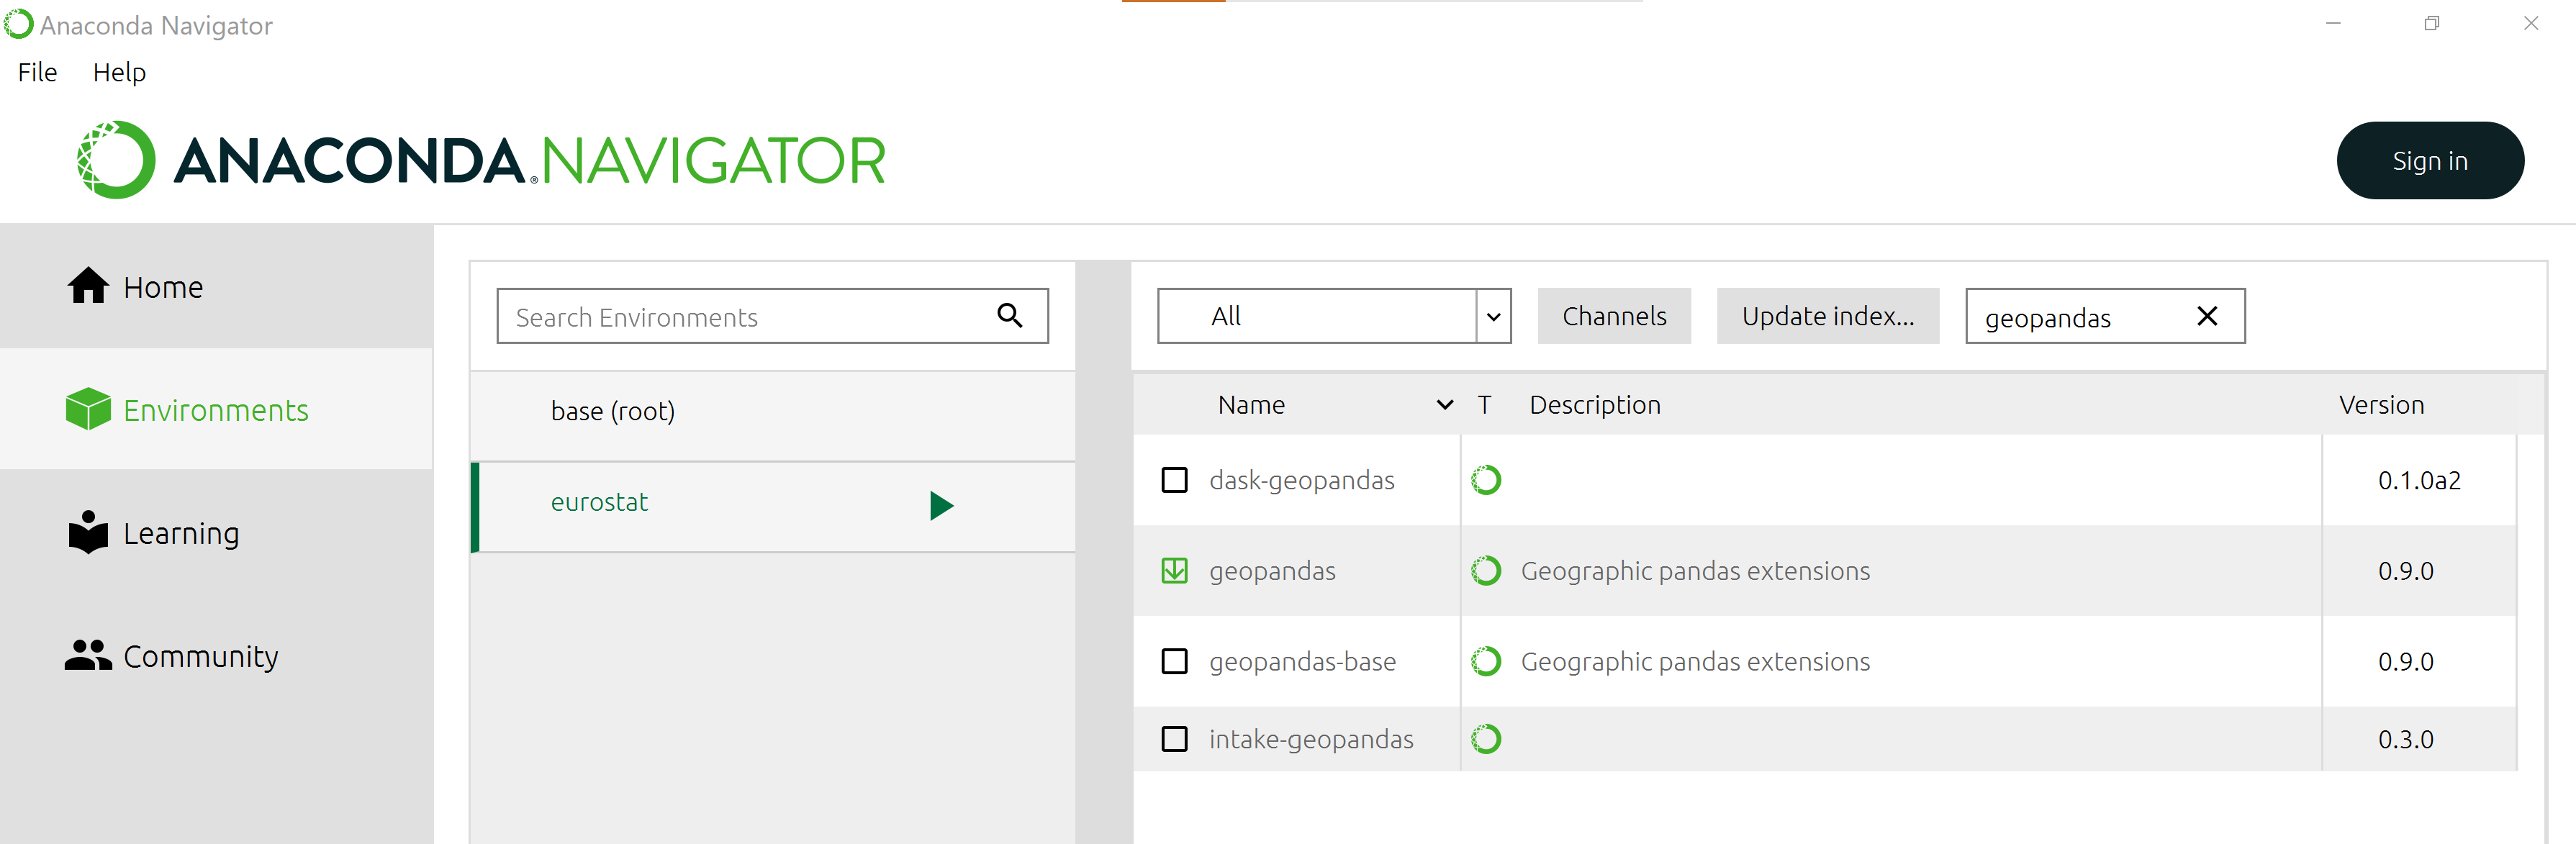

In [ ]:
from IPython import display
from base64 import b64decode

base64_data = "iVBORw0KGgoAAAANSUhEUgAADfsAAASVCAYAAAChV+WYAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAALEoAACxKAXd6dE0AAP+lSURBVHhe7N0HfBTVFsfxk0IJPQGkSEkIRaRIVbGgEkJTRJpdREWwC3Z9KnZREbBrABWUIr2DQlCRJi3SFUih94TeQpK3d3JTluxuZpPNluT35e1n77mbzM7szGwS3/z3+KVZCAAAAAAAAAAAgElrn7tSjwDnVX8xWo8AAACKpmrVqukRAAAAAAAAAFjz1/cAAAAAAAAAAAAAAAAAAAAAAAAAAMBDCPsBAAAAAAAAAAAAAAAAAAAAAAAAAOBhfmkWegwAAAAAAAAAAAAAAAAAAAAAAAAAADyAzn4AAAAAAAAAAAAAAAAAAAAAAAAAAHgYYT8AAAAAAAAAAAAAAAAAAAAAAAAAADyMsB8AAAAAAAAAAAAAAAAAAAAAAAAAAB5G2A8AAAAAAAAAAAAAAAAAAAAAAAAAAA8j7AcAAAAAAAAAAAAAAAAAAAAAAAAAgIcR9gMAAAAAAAAAAAAAAAAAAAAAAAAAwMMI+wEAAAAAAAAAAAAAAAAAAAAAAAAA4GGE/QAAAAAAAAAAAAAAAAAAAAAAAAAA8DC/NAs9LhC3zmkp51PO6SpLz/A+8njjl3UFAAAAAAAAAAAAAAAAAAAAAAAAAEDR5bKw35B1r8grLYYY414LbpQpnf4yxsqM+PHy5Yb3dZVTzTJh8kPEHF0BAAAAAAAAAAAAAAAAAAAAAAAAAFC05Dvsd9evt8jRc4ckrFx9GXnLdGOu/cxGxv2sW1dJqcDSxnjf6d3SZ1EnY+zIom6b9QgAAAAAAAAAAAAAAAAAAAAAAAAAgKLBX9/nyTebPjKCfkpG0K/jrKbGvXL73KtlTsIkY1y9dE15/9pvjLEjKij43LK+ugIAAAAAAAAAAAAAAAAAAAAAAAAAoPDLd2e/S2V09VNKBZaRWbf+bYw3HFntdIiPLn8AAAAAAAAAAAAAAAAAAAAAAAAAgKIgT539VKBPdfCbET9ez2RRAb2nm75ujDOCfgkntuepW1/24CAAAAAAAAAAAAAAAAAAAAAAAAAAAIVVnjr7XRrCy60DX35De3T4AwAAAAAAAAAAAAAAAAAAAAAAAAAUZqbDfiqwN79rjBTzL2437Jcxbyact2x/tAxe9YyuckfgDwAAAAAAAAAAAAAAAAAAAAAAAABQWPnre4c6zb7KuD+TfMq4z65b2D3G/cTto2Vqp79Mh/KurxZhfO3Cbpv0jGP57Q4IAAAAAAAAAAAAAAAAAAAAAAAAAIC3yrWz37rDK+Sl5f0k0D9QpnVeLqUCS+tHXOurjR/K9LifdWVbi8pt5OPrRukKyIskiZkyWVYnqnGItO7dS5oHGw/A7ZIkPjpaFsYmSkh4a4mIaC7sCgAAAAAAAAAAAAAAAAAAAAAAABRVuYb93Onw2YNyz2/tdGWb2c6BpiXFyJTJq8XIfhH+KgK8M+wXHx0lC2N1YREe2V8iwnRhVny0RGUsJDxS+ju9ADfLvr4WedpmAAAAAAAAAAAAAAAAAAAAAADglaKiovQob/r3769HKEyOHk2Uv/9eKe3bt5fixYvrWedcuHBBFi1aJNdcc61UrBiiZwsHf33v0MEz+2TAHz2k/cxGRn3PbxHGePKOH43aVSoHVZGJHRfryraMdXCVpIRYHfRTEiU2IUmPAc+JXRgt8XoMAAAAAAAAAAAAAAAAAAAAAAAAFAYq6Ldv/36ZM3euEdpzlvoe9b1qGWpZhY3DsJ8K1qnbfQsjJfb4f3pW5K56j8hlQdWkd92+esZ1KpWsIj3D++iqoMXLuvQWb5kSV68jZAUvECsLowv5kRjWQiLD09PTIeGtpQVd/QAAAAAAAAAAAAAAAAAAAAAAKHRUhz5nbijcVEe/kJAQSUxMdDrwlxH0U9+rlqGWVdg4DPuVLx6sR9buCLtXxndYpCvXe7zxy3pkW7/F3fQon+LjJFYP1Q5OFytxpP3gDWIXSuHO+wVLWEQv4wdxr4jmlso3JcXHSEz0FIkq7OFMAAAAAAAAAAAAAAAAAAAAAACAfCpevLjcduutTgf+Lg36qWWoZRU2fmkWemzlYmqyBPoXMzr7ZTe/a4wU83fPC3Hpc2e3qNtmPcq7+OgoWWik/UKkdWS4xC5cLUafv/BI6R9Bm7HCKUlipkyW9IaOlv3eu5c094KUWfZjMTxcJDZWd5wMaS29e5kMwsVHS1T6QjiG3SUpRqZM5n0DAAAAAAAAAAAAAAAAAAAAAICoqCg9ypuMrn4Zy6HLX+HmTHivqAT9FLud/TrNbmbc+/llfUn9Co3cFvQrePESl9nWL1xCw0IlPLO5X5zlUcAzQlpESOuMYzFxtUTHJOkCAAAAAAAAAAAAAAAAAAAAAAAA8H1mO/wVpaCfYjPs9+2mj437Y+cTZeHtG42x6qT39U2TZPy2/KVsnfHONV/qUU6jtgzXo7xJilkrGVm/8Jaqc1qwhGal/WQtASt4TLA0j2gtWXm/aOFwBAAAAAAAAAAAAAAAAAAAAAAAvkB15HPmhqIrt8BfUQv6KTbDflNixxj3vRbcaNyroJ/SfmYjueXyLsbYHa6reose5TRx+yg9yoskSYhN1ONwqROWPgoODc8KWMUmWL4K8JDg5tIyXI8lUVZHx3A8AgAAAAAAAAAAAAAAAAAAAAAAoFCxF/grikE/xS/NQo8zqVCf8kbrYXJT9Y7GOGMuI/jnLhnPa0ue1yUpRqZMXi1G3C88UvpH6LSfJEnMlMmy2nggRFr37iXNg40H7Mu+rJDW0ruX6hJomU6Kl3XRayXWckBlCAkJl/CWLaR5WG4LTZcUHyMJcbESm5RoOTD1pEXGckItyzG3JCXJsrwEWbc2VpIsC8u2VpblBZtbXlKSxCesk7WxScaJkiVrGbluWwG+Xop6zdQ2Zl+OZUESHt5SWjQPszyXc/vYtfvAvvjoKFlotJrMvk7xEh21MKsDZWR/yTxUbYmPlqj0hVxyXNuWl21Lipkik9NfPMvu6y29cj1BLOyuV/btC5fI/hHieI29ZP9m3x6Hcnl+V5xPVtub7TW0nE/R0ZbXNmOxlnOtv+VcAwAAAAAAAAAAAAAAAAAAAACgoERFRRn3/Z3s1nfp9+V1OfBtl4b7lKIW9FPshv0mdfxDQkpWloeib5MfIuZkzheGsF/2wNKlASqnw0w2wmvHoqfIwsyUjQ3hkdLb8qR2lxwfLVMWxmYL5NmRLSznSJJledEmlmc/TJZkWaVox9uUISRcWkdEOAg4FcDrpVwabrLFsm6RES0sz2ciDObifZAb22E/C6tgWS6BuOxf6yjsl59ty77/TAX0HIXvnAj7md2/vSz710zYLz+vgdU+ccTe87vwfLIV9rO1bZbtIOwHAAAAAAAAAAAAAAAAAAAAID8yAliuQpCr8CHsh/zKHvhTilrQT/HX91Z+av+rEfTrNPsq2X0qPjNw99VNvxj3vi1JEjJDNuFS55J0UXBouKRnP0USYxMsX+2cYzEZwbUQCW/dWiIjIyWytWWZGQtVYhdKdIz9JcfHZQ/qqK5lraW1Wk6k5T4824ISV8vk6Hhd2BYfPUUmWwV/0pdnrJdeXvZVyyleoqdMtgomGV3PWqvvV9vW2rK87OsUK6snTxEHm2fFFa+XsY6TrYNgIeHh+jWLtGyj3qeWdVsYvS73gJeFK/dBvoRFSGS4Hota//w/V762LThUsr4kVuJyW52khGzd5cIl1G5ozQEjYGhy/05xw/6t0MJ43sxjVU+rQF3mvHFraWN7C/Z8Ml4rMyFGAAAAAAAAAAAAAAAAAAAAAAAAeB0/W539FBX0u5h6UVfp3N3VT3F5Z79cu59l75SlvsRetzvNqtNZuhDLciNsdKLL3jXQUSczo8tbUri0btlCmofZSEdZdRaz373M+vlCLNsSYdkWW2mrJImPWSfHKkRYnk9PGaxfCxXWioywrLOtRVz6tfa2z+Wv16XraK/TntrGaFmYtYIW9l87V+0Ds+x29jNk74Dn4JjM9dhOl99ts9ovjjoIWjjulJl9u1ywf3N0y3PD/s1+POfyWuTcFhecT1ZfFy7h4bESa1lt63NKHfsJEtaczn4AAAAAAAAAAAAAAAAAAAAAgIJDZz/kR/aufqqjn5IxLkrd/Wx29jtz8VSOoF9hoTp6ZQi/tK2fIViat8xspSaxubYuu0RIa5vBNSW4eYS0zmza5aArmhFoUsE7mymgS7q9JUpsgo22X0kxEp2VKjLCSraDfkqwhFnWzTroZxG/zjpsZFknu4tQr1uv3lbbt9ZMO7L8vl7Z19FuEExR29gr2+uWC1fsA5cJkxZZL4TEro2RfD1bPrctuHlLy9GgxcaJ/TPEuotmS5tpuVw4s38jvHz/Fvj5pIN+KlRpdU6pY5+gHwAAAAAAAAAAAAAAAAAAAAAA8E6XBv1UuE/d1FjNqcfU1xQFNsN+pQLL5Oiap+o5CZN05aviJSvrFy42s35KWB2TYaZLhUjrCHthJCVYQsOzQltJx2yHd1Qwx/4y0oXVcZxqSkqITe82ZhHSOiIPXeeSJGZttmBkpK2uYpcKluYRrS2vQrrE2IRcQmn5fb0uWceWJl63Flnr54gr9oErWQUfE1dLtJkgpR3537YwyXrYQWg1KUGysn51TBw/lypM+9cd55NFSGuJyEuoEgAAAAAAAAAAAAAAAAAAAAAAwANsBf1UFz91K4qBP5thv/YzG8n6I6uNgF/D4KukXY1bjfkR69+WpfsXGWNP87P8c1p8nGRl/RyFj0yGmS4VEi6hueRsgitkfUFi4jE9yp+cy3FBRzU5ZlmuHoa0lhZmk1rBoZKZz0uMFYcN0fL9euVhHbOvnwu5al/ad0nwa3W05CPv5xRb25Y9CGev+2X2wKntLpq5KUz71w3nk4WZQCQAAAAAAAAAAAAAAAAAAAAAAN4oKirKuKHosBf0y1AUA382w36danWX55f1la5zW8sXbcfLay0/lg6zmhqPvbXqWePeHTYdXadHOT1wxRN6ZF58Vlu/XMNHVmGmtTG5d9QqMEmSFB8v8fExEhMdLdFTpsiUKZY3r4VZ25JD9o5qloO5gh46JelY1jYHV3AiQBQsWfm8RCnQDFye19FZedgHBSG4uURktfeT1dGuOC7zuG25dr/MFjh1JtyWXWHav245n0IkJE8nOwAAAAAAAAAAAAAAAAAAAAAAgHvlFvTLUNQCfzbDfi80f8+4P3vxjEyNHStpaany2+0bjJs7DVz6gB7l1KeBk2G/pBhZmy27E7swPe1r95Y96GOio5ZrJUl8TLRMMdZlskxeuFAWLlwtq2NjJdZyUFr+Z15eQ1LHLM+jhyFOJogqWE4et8jHOubOhfvAhYKbt8wK2SWulnVmu05accW2hUmLzOChje6X2QKnIeGhbj8Gc+fm/euW8yl7MBAAAAAAAAAAAAAAAAAAAAAAAN/Sv39/qxsKL7NBvwxFKfBnM+yXXc/wPhI5q4m0n9lI1h9ZLYu6bdaP+JakhNjMsI3zEiXWXWm/pHiJjposC1dbr686GENCwiU8vLW0joyUyMygFVzOq/dBmEREZus6uTDaRlc9B1y4bcGh4ZIZ97sk7Re/brVefoiEh3pZAo1zDAAAAAAAAAAAAAAAAAAAAAAAwCOcDfplKCqBP7thv9LFysoVwU10le7F5Y8YoT93cPQ89Ss4uw5JkpDRZswiJFwFeszcssI+ibEJlqUUtCSJiV4oGT0FQ8JbS2Tv9DRyr169LLcIiYhoLs3DwiTMjS28EhOP6ZE5xzLbooWIyxuy2eHsOtrnnfvASliEZOX9YmVhtNm4n4u3LThUMk+R2LhsocN4ict4kvCW0twFL1Nh2r++cD4BAAAAAAAAAAAAAAAAAAAAAJBXUVFRTt1QtCxatMgI6zkT9MtwaeBPLauwsRv2m9llpXzZdqK8suJRPWOtIEN/M+Mn6JFtX980SY9MSkqQzKxfSGuJiFCBHjO3lpKZqUqMlQJv7he/TlZnrGd4pPSKaC5heckbBVeQzG+zCmE5oUJIZtc2STrmRNAxSY5lfnGwFGgeLk/reMxyMuuhLa7aBwUsLCIy69iMXSsxZjbe5dsWLKFZaT/JbO4XH5cZpguvE6ZHeVCY9q8vnE8AAAAAAAAAAAAAAAAAAAAAAAAF7JprrpXq1ao5HfTLkBH4U8tQyyps7Ib9Mqw5tFyPcnr2r/v0yHXOp5yTLza8p6uc/Cz/nBW/brVk5HtCwkOzgnC5CpMWrTMiOomyel2eYnOmJWWleiQklxZe2b82pwqW79fD7CEsZ2Tv2pa4WkxvulWwMsSyJgUoe6jRbBgzWxDNFtftg4IWJhGZ7f0sx2Z0jCRlD5TZUBDbFhwanvmcsfpAi89o6xfSWlrkI+tXqPavL5xPAAAAAAAAAAAAAAAAAAAAAADkQ//+/fN1Q9FQsWKIdOnSJU9Bvwzqe9Uy1LIKm1zDfu9c86UE+gfqytrmxH/k0d+76yr/VNDv1jktdWXbwm6b9MiseMnIHomESHioc62xsoeZ8twlz+XiZV1mezJbgqV5y8y+bxK7MDoP6529a5tlGWtjTHQjS5KY6KxgZXjL5llhrQIRJnWyWi+aCGNa1m+toyiYM3LbB24Q1kKysqirJXqdq9bHiW0Lbi6Zh5pxfmSdb84Fa23xsf3rsGOfL5xPAAAAAAAAAAAAAAAAAAAAAAAA8KRcw34xh1fKtM7LZFG3zZk3JWM88pbpRp1fC3ZNzzXod02Vm/TICdk7fYWEi5NZP5X2y+rIldcueSYFV8haucTV6yTeVhooKV6ipyx02L3MkD0IZvnqhVOibS/PkCTxMdESc8m2BTePsAqTTc5tGdGTJTMfld+ubiaFtWidLYy5UKZEx9sOUVlet5gp2dbPDpfugwIXLM0jsrY/MTY2MxhmS0FtW1hmIs9yfsRknG/OB2tt8fr9a9V9MFGO6aEtvnA+AQAAAAAAAAAAAAAAAAAAAAAAwHMC3rLQY5uurnKjdJ7dXMb+93Xmrc8VT8q9v7WXP/f9KuO3R8nXG4cY8/fUf1QC/AL0d5rXfmYjWX5gsa7sG9N+nh6ZF79ukcTpQE1I4+ulZbWg9MK0ICl5Pl627DtrVEl+IdKyTrYQ07kDsmXLPjEeDbpcGl1ZzfIdDhyLl7WZKxRuvaxgPzm2Nk6HmZIkbku8xB87L0F+5+TYsQRZt26ZLFq6WZLOhkjr1tVl3z47yzEESbUrQyxPZ1meWrmzanlrZW38MTl2/rj4ncu2zEVrJc6yrKDwlmK9GL2MjHXSy4i3LGP/eT/LMizLyr4MvTpqfSJ7XSfVdGnFla+XElRNqvln7Z+zSXGyZW28Zb3Oi98lr5v6kpDWkdL4XJwxVtt3eaMrxeqQcOk+MO9YfMbrZ2OdHLlk+zPZWp+C2rZsy03K+J7wG+S2K3N7PY5JfOb6hEh4yzo5O9f5wP49Hr9FP59lefGWdTsfZJwbCevWyYHgOtmevwDOJzknB7ZkPL+d1xAAAAAAAAAAAAAAAAAAAAAAAAA+IdfOfkpGN7/sDp3dL1sS/5H9p/foGTFCgenBvd/1jH3q+9TXqpsZttYhd/ESl9meK++dxoJDw7N1F1srMRkhHJcLk4je2TqZSaIkxq6WhQsXWm6rJTZWtfmybEdkL2leIf0rHLMsr1dvaZ3VmtCyyFiJXX3pMh2xLKO/9TISjWWo78+5jJDwSOndK8LyXe4T3LyX9M5qY2iRaFmnnNsY0rq39Mr1hXP1Pih4Vh3jHCqobQuTzOZ+Wngd1x0B3r1/rbsrqu5+GefG6lhbbxTefz4BAAAAAAAAAAAAAAAAAAAAAADAM0yF/ZSx7RfoUe7e/PupzCCfvdsDizrqr85d3oJ+IkkxayUr6xcuecz6qbSfZGVzEiU2ocDSfirZJL3695ZIyxOGZM83iaVWwZ/evSTCqeSPCiP1kv69I42AkfUyLUu1TIS3Vsvt72C56cvobWcZaiK8dWuJtCyjl2UhnugspgJhmduo59Kp102vW3OTa+byfVDQLPun5SVpO3sKaNvCWmQP0IWLC7N+Bq/ev2p5lnULv+TECAkJFtt5Qe8/nwAAAAAAAAAAAAAAAAAAAAAAAOB+fmkWepyrnSdj5ZHFtxvhOxXYc4e8Bv0AFEXxEh21UId8wyWyP13xAAAAAAAAAAAAAAAAAAAAAAAA4BtMd/ZTapcNlwVd/9FVwSPoB8ApSccks+9mSIidznoAAAAAAAAAAAAAAAAAAAAAAACA93Eq7KcE+hcz7h9v/LJxXxCaV76WoB8ApyUlxEqiHoeEh0qwHgMAAAAAAAAAAAAAAAAAAAAAAADezi/NQo/z5I5518qp5JO6yj9CfgDyJClGpkxercN+IdK6dy9pTtoPAAAAAAAAAAAAAAAAAAAAAAAAPiLfYb8Mg5b2kY1H1+rKObXK1pHv283WFQBoSTESHZ0odSJaSFiw/eReUny0RC/M6uon4ZHSPyJMFwAAAAAAAAAAAAAAAAAAAAAAAID3c1nYL7tx276VH7Z+oSvbeoU/KI81fklXAGCDVbc+kZCQcAkODpE6dSrIsWNxkpiYJEmxiVkhPyWktfTu1Vxo6gcAAAAAAAAAAAAAAAAAAAAAAABfUiBhPwBwiUvCfrkJCY+UiIgwgn4AAAAAAAAAAAAAAAAAAAAAAADwOYT9AHi5JEmKT5B1cbGSlJQoidZt/CQkJFiCw+tIi+aE/AAAAAAAAAAAAAAAAAAAAAAAAOC7CPsBAAAAAAAAAAAAAAAAAAAAAAAAAOBh/voeAAAAAAAAAAAAAAAAAAAAAAAAAAB4CGE/AAAAAAAAAAAAAAAAAAAAAAAAAAA8jLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAeRtgPAAAAAAAAAAAAAAAAAAAAAAAAAAAPI+wHAAAAAAAAAAAAAAAAAAAAAAAAAICHEfYDAAAAAAAAAAAAAAAAAAAAAAAAAMDDCPsBAAAAAAAAAAAAAAAAAAAAAAAAAOBhhP0AAAAAAAAAAAAAAAAAAAAAAAAAAPAwwn4AAAAAAAAAAAAAAAAAAAAAAAAAAHgYYT8AAAAAAAAAAAAAAAAAAAAAAAAAADyMsB8AAAAAAAAAAAAAAAAAAAAAAAAAAB5G2A8AAAAAAAAAAAAAAAAAAAAAAAAAAA8j7AcAAAAAAAAAAAAAAAAAAAAAAAAAgIcR9gMAAAAAAAAAAAAAAAAAAAAAAAAAwMMI+wEAAAAAAAAAAAAAAAAAAAAAAAAA4GGE/QAAAAAAAAAAAAAAAAAAAAAAAAAA8DDCfgAAAAAAAAAAAAAAAAAAAAAAAAAAeBhhPwAAAAAAAAAAAAAAAAAAAAAAAAAAPIywHwAAAAAAAAAAAAAAAAAAAAAAAAAAHkbYDwAAAAAAAAAAAAAAAAAAAAAAAAAADyPsBwAAAAAAAAAAAAAAAAAAAAAAAACAhxH2AwAAAAAAAAAAAAAAAAAAAAAAAADAwwj7AQAAAAAAAAAAAAAAAAAAAAAAAADgYYT9AAAAAAAAAAAAAAAAAAAAAAAAAADwMMJ+AAAAAAAAAAAAAAAAAAAAAAAAAAB4GGE/AAAAAAAAAAAAAAAAAAAAAAAAAAA8jLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAeRtgPAAAAAAAAAAAAAAAAAAAAAAAAAAAPK7xhvx0j5Do/P/Hzu05G7NBzKHzYzwAAAAAAAAAAAAAAAAAAAAAAAAAKATr7AQAAAAAAAAAAAAAAAAAAAAAAAADgYT4b9ps/QHVzs9wGzNczAAAAAAAAAAAAAAAAAAAAAAAAAAD4JveG/eYPSA/oOX0bIFaRvh0j5N0oPY56V0bs0GPk0w4ZcZ1+zfMUoszv9wMAAAAAAAAAAAAAAAAAAAAAAABA0eSznf0AAAAAAAAAAAAAAAAAAAAAAAAAACgsPBT2ayPDt6dJWprZ23fSWX+noe5AeaO/Hvd/QwbW1WMAAAAAAAAAAAAAAAAAAAAAAAAAAHyQz3b26/ydDgJ+ZxUDBAAAAAAAAAAAAAAAAAAAAAAAAADA5/hs2A8AAAAAAAAAAAAAAAAAAAAAAAAAgMKCsB8AAAAAAAAAAAAAAAAAAAAAAAAAAB7ms2G/+QP8xM/PchswX8+4wg4ZcZ1ertVtgLjyWWAtc19a3a6TETv0F7jKjhFyXY7nyX5jPwMAAAAAAAAAAAAAAAAAAAAAAADwDDr7aemBs3oyaIWesBIlXVQYzKXBQuwYcZ0RsusSpSesrJBB9Syv+XUjJP+Zv/kyQO2/eoMsS3VE72dCfwAAAAAAAAAAAAAAAAAAAAAAAADcjLCf7uaXGTjrP0/S0tKsbvP668eiuhD4cxEVrqyXkaxsM1y2X/Kabx/eJv2xFYOknksCf+n6z7N+nuy3zOfUoT92NQAAAAAAAAAAAAAAAAAAAAAAAAB3KfJhvx0j+mR28zOCYN91Ti+y6fxdtiBYVBdCYPk1f0BmuLLN8O2Stnyg1E0vM9UduFzSMlKWKwZJnxGuivvZZzxn2nbJ2tXXiRueFgAAAAAAAAAAAAAAAAAAAAAAAACKeNhvxwjpo5N+KnRmI+eXqe7AsVkhsHdd12mu6JkvAzKSfv3nyfKBl8b8sun8XWZXxRWDPrF8pzvUlYHL50n6066QQZ+Q7AQAAAAAAAAAAAAAAAAAAAAAAABQ8DwU9lshg+r5iZ+fiVsBttHbMWeSZU0s2gyXsY5CZ4a6MvCNjOTZJJlT2NN+UV1s7w+Ht3qZXRLtmj9D0qN+/WWeo3Sl1vnF4ZKesYySGW7L3XWW7zJShlHv0t0PAAAAAAAAAAAAAAAAAAAAAAAAQIErwp39dsicSbqr3523SW5RP0O9hjp4tkK2bjcGcNL8GRld/e6Q3KN+FnUbSBM93PifG1N3ne/I7O43qdAnOwEAAAAAAAAAAAAAAAAAAAAAAAB4mofCfm1k+PY0SUszcTPR/S1vtstW3YWuSQNTUT/PBc88of882/vD4W27DE9PQ9qxQ/7bmD5q07Be+iBX9aShXuYKtyYsPfW8AAAAAAAAAAAAAAAAAAAAAAAAAIqiotvZb8d/onNnEtXFT/z8zNy6iO5LhzzJCliuGFTPxutr61ZPBunvca+60iAr2Sn09gMAAAAAAAAAAAAAAAAAAAAAAABQkIpu2A8AAAAAAAAAAAAAAAAAAAAAAAAAAC9B2M+i/7w0SUtz7rZ8YF393ciLNsO323xdHd6+66y/GwAAAAAAAAAAAAAAAAAAAAAAAAAKl6Ib9qvbQJroIdylnjRso4e+pEkDIdoJAAAAAAAAAAAAAAAAAAAAAAAAoCAV4c5+WcGzqBnz0wcoYHWlgU5Yrpg0R3akD73UfJkRlT5q07Be+gAAAAAAAAAAAAAAAAAAAAAAAAAACkgRDvtlBc8kaoYQ93OPehkJyxWTZI43p/3mz5D0rF8bufM2+voBAAAAAAAAAAAAAAAAAAAAAAAAKFhFOOwn0vnF4ZIePYuSd0d4d5+5wqLuwDekvzFaIYM+8daI5Q4Z8W5GW787hawfAAAAAAAAAAAAAAAAAAAAAAAAgIJWBMJ+K2Trdj28VN2B8kZ68kxWDKonA2jv5wad5cXhurtfVBe5zmUhSwf7OZuoGbnv5B0j+sigFenj/m8MFLJ+AAAAAAAAAAAAAAAAAAAAAAAAAApa4Q371b1N7szMlF0n9jJlnb/bLlnZMz/xu26E2Iuf7RhxncPHYU7dgctlXraQpZ/fALEbwZs/wPHjJvdzpqguluX52QkZzpcBlsfq6aRfm+Hb5bvOxhAAAAAAAAAAAAAAAAAAAAAAAAAAClQh7uxXVwZmtO2TFTKonr0gn+Xrlqdlhs9kxSCp52f5Whs3IwS2YquYaCCHXHT+Lk22Z6QsJUq62Hi9jVuXKMvjG+U/uyE+s/vZWnrI8JLn8utiWZN0/eelyfKB9PQDAAAAAAAAAAAAAAAAAAAAAAAA4B6FOOxn0fk7SUubJxlRMGnSQOzFt1T4LC0tW+jPBtXpLS3tO6HZm2uoDn/qNc8K/dnQf57la5aLw9ydE/tZhfgcPWf6Pk6jox8AAAAAAAAAAAAAAAAAAAAAAAAAt/JLU8kmoFCbLwN01z4V9iPIBwAAAAAAAAAAAAAAAAAAAAAAAMDbFO7OfgAAAAAAAAAAAAAAAAAAAAAAAAAA+ADCfgAAAAAAAAAAAAAAAAAAAAAAAAAAeBhhPwAAAAAAAAAAAAAAAAAAAAAAAAAAPIywHwAAAAAAAAAAAAAAAAAAAAAAAAAAHkbYDwAAAAAAAAAAAAAAAAAAAAAAAAAADyPsBwAAAAAAAAAAAAAAAAAAAAAAAACAh/mlWegxAAAAAAAAAAAAAAAAAAAAAAAAAADwADr7AQAAAAAAAAAAAAAAAAAAAAAAAADgYYT9AAAAAAAAAAAAAAAAAAAAAAAAAADwMMJ+AAAAAAAAAAAAAAAAAAAAAAAAAAB4GGE/AAAAAAAAAAAAAAAAAAAAAAAAAAA8jLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAeRtgPAAAAAAAAAAAAAAAAAAAAAAAAAAAPI+wHAAAAAAAAAAAAAAAAAAAAAAAAAICHEfYDAAAAAAAAAAAAAAAAAAAAAAAAAMDDCPsBAAAAAAAAAAAAAAAAAAAAAAAAAOBhhP0AAAAAAAAAAAAAAAAAAAAAAAAAAPAwwn4AAAAAAAAAAAAAAAAAAAAAAAAAAHgYYT8AAAAAAAAAAAAAAAAAAAAAAAAAADyMsB8AAAAAAAAAAAAAAAAAAAAAAAAAAB5G2A8AAAAAAAAAAAAAAAAAAAAAAAAAAA8j7AcAAAAAAAAAAAAAAAAAAAAAAAAAgIcR9gMAAAAAAAAAAAAAAAAAAAAAAAAAwMMI+wEAAAAAAAAAAAAAAAAAAAAAAAAA4GGE/QAAAAAAAAAAAAAAAAAAAAAAAAAA8DDCfgAAAAAAAAAAAAAAAAAAAAAAAAAAeBhhPwAAAAAAAAAAAAAAAAAAAAAAAAAAPIywHwAAAAAAAAAAAAAAAAAAAAAAAAAAHkbYDwAAAAAAAAAAAAAAAAAAAAAAAAAADyPsBwAAAAAAAAAAAAAAAAAAAAAAAACAhxH2AwAAAAAAAAAAAAAAAAAAAAAAAADAwwj7AQAAAAAAAAAAAAAAAAAAAAAAAADgYYT9AAAAAAAAAAAAAAAAAAAAAAAAAADwMMJ+AAAAAAAAAAAAAAAAAAAAAAAAAAB4GGE/AAAAAAAAAAAAAAAAAAAAAAAAAAA8jLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAeRtgPAAAAAAAAAAAAAAAAAAAAAAAAAAAPI+wHAAAAAAAAAAAAAAAAAAAAAAAAAICHEfYDAAAAAAAAAAAAAAAAAAAAAAAAAMDDCPsBAAAAAAAAAAAAAAAAAAAAAAAAAOBhhP0AAAAAAAAAAAAAAAAAAAAAAAAAAPAwwn4AAAAAAAAAAAAAAAAAAAAAAAAAAHgYYT8AAAAAAAAAAAAAAAAAAAAAAAAAADyMsB8AAAAAAAAAAAAAAAAAAAAAAAAAAB5G2A8AAAAAAAAAAAAAAAAAAAAAAAAAAA8j7AcAAAAAAAAAAAAAAAAAAAAAAAAAgIcR9gMAAAAAAAAAAAAAAAAAAAAAAAAAwMMI+wEAAAAAAAAAAAAAAAAAAAAAAAAA4GGE/QAAAAAAAAAAAAAAAAAAAAAAAAAA8DDCfgAAAAAAAAAAAAAAAAAAAAAAAAAAeBhhPwAAAAAAAAAAAAAAAAAAAAAAAAAAPIywHwAAAAAAAAAAAAAAAAAAAAAAAAAAHkbYDwAAAAAAAAAAAAAAAAAAAAAAAAAAD/NLs9BjwC3OpZyTsxdPyxl1S06/9/Pzk6DA0lIq261EQAn9HQAAAAAAAAAAAAAAAAAAAAAAAABQuBH2g9ukpKXIVxs/kSmxP+sZx4r5F5PqpWtKrTJhUqtsqOVmubeM65a/giAgAAAAAAAAAAAAAAAAAAAAAAAAgEKFsB/cbsm+RTJk3RtyKvmknnGOCgFeGXKVtKh8tbSsfI1cGXyVBPoH6kcBAAAAAAAAAAAAAAAAAAAAAADyJjU1VXbu2SPb4+Jlh+W2PT5e4nftlhMnT8qp06cttzNy+sxpOW25v5CcrL8LKBjFixWT0qVLSelSpaWM5b5M6dJSrmxZCatVU+qFhUm9OnWkbp1QqV2jhvj7++vvgi8j7Ic8O59y3nI7K+WKV9Az5h04s1feWvWibEnaoGfyrmRAkFxd5TrpUPN2aVO1rREGBAAAAAAAAAAAAAAAAAAAAAAAyM3Zc+dk5dp18teKlbJk5d+yftNmOX/hgn4U8A0liheXqxo3krbXXiM3trlWrm3ZQoJKltSPwpcQ9oPT9p7eLTPif5Gl+xbL6HaTpVRgaf1Iuug982XVwWXy7FWv5ngsu4upF2X4+vdkdsIUPZN/5YqXl3aXd5KOtW6XRiFX6VkAAAAAAAAAAAAAAAAAAAAAAIB0+w8ekkkzZ8n86MWydv0Gwn0odFT4r+VVTaVzRDu5s9vtUq3KZfoReDvCfjAlNS1VVh78S6bHTTCCfGmWf49e+aw80OBR/RXpklOT5f6Ft8n+M3uleuka8karj3IN3f3030gZteVzY5muVK9CQ+nToL+0rd5e/Cz/AAAAAAAAAAAAAAAAAAAAAABA0XTmzFmZueBXmTh9htHBLyUlRT8CFG4BAQFGx7+7u98h3Tp1lFKlgvQj8EaE/ZAr1alv5JbPZN/pPXpGddCrIJM6/pqjc9+kHWPly40f60rE389fHmjQX/pe8bgE+AXo2ZwW7p4jQ9a9YYQFXS20bLgRSoyo0cVYHwAAAAAAAAAAAAAAAAAAAAAAUDTs2bdPhn87UsZNm2YE/oCiTAX97uvRQwY99qjUqF5dz8KbEPaDXduPbZXPNgyRDUfX6pks/a58xuial92p5JNy92+d5MSF43omS/NKreWtq4dKcImKeianmCOr5bWVT8vp5FN6xrUuL11Lnmryolxf7RY9AwAAAAAAAAAAAAAAAAAAAAAACqO4nTtl6Fffyi8zZkryxYt6FoBSvFgxubPb7fLCk49Jndq19Sy8AWE/5HDsfJLRyW/uzmmSmpaqZ7MU8y8mUzstlgolgvVMOvU9P/03Ulc5VSp5mbxzzTBpHNJMz+S0/fi/8sKy/pJ0PlHPuN71VW+WZ696VaqWulzPAAAAAAAAAAAAAAAAAAAAAACAwmDvgQMy+KOhMnXOXElJSdGzAGwJCAiQnrfdKm+//IJcXrWqnoUnEfaDleMXkmTYP+/JmkMr5GTyCT1rrX3NW+XNVh/pKp3qxtdrQXs5fdFxV75A/0B5qslL0qPOvXomp12nEuThxT3lQsp5PeN6JQNKygMNBsjd9foa4UUAAAAAAAAAAAAAAAAAAAAAAOC7LqakyJejvpePvvhKTp85o2cBmFG6VCl55Zmn5MlHHpLAgAA9C08g7Ae79p7eJVsTN0rMkdVG+G//mb3G/Fdtf5ImFZsb4wzjto2W7zYP15VjXWp3l1davKsra2mWf0Nj3pbZCVP0TMGqW76BvHP1MKlRhpajAAAAAAAAAAAAAAAAAAAAAAD4omWrVstzb7wlW7dv1zMA8qJhvXoy7N235PqrW+sZuBthP5i27/Qe2Zz4j0TWvE3PpEtOvSC9f+0gieeO6Bn7rq96s7x/7efi7+evZ7K4O+iXoVRgaXmp+dvSrkYnPQMAAAAAAAAAAAAAAAAAAAAAALzdheRkee29D2Tkz+OFeAzgGn5+fvLo/ffKB6+/JsWLFdOzcBfCfsg3Fc77JOYtXdmnugEOu36UlAgooWesfb7hQ5kSO05X7tct7E55pukrUsy/uJ4BAAAAAAAAAAAAAAAAAAAAAADeKGHXbnngqWdk/abNegaAKzVr3FjGfvmZhNaqqWfgDoT9irjUtFSbXfaccebiaVmwa6ZMi5sgu07G61lrYeXqypdtx0rZYuX0jLXRW7+UMf9+qyvPaRjcRD6+7mspXzxYzwAAAAAAAAAAAAAAAAAAAAAAAG8yY/4CeeqV/8mJkyf1DICCUK5sWfnqow+kW6eOegYFjbBfETd35zSJ2vyZ1C3fwOpWu2x4nkKAaw6tkKlx42XFgT+NIKESUrKSfHfTBKlSqppRX+qXHWPkq42f6MrzapYJlU+vj5KqparrGQAAAAAAAAAAAAAAAAAAAAAA4A3e/OgT+SxqlBCHAdzDz89Pnu3fT955+UU9g4JE2K+Im7zjJ/li40e6yqI68F1VqZW0qHyN5Xa10ZnPz/LPrANn9sqMuF9k4Z658v41n8kVwY31I9ZU2PCjdW/qyntUKnmZfHr9d5btrqdnAAAAAAAAAAAAAAAAAAAAAACAp6j4y2MvviwTps3QMwDc6d6e3eWbj4cY4T8UHMJ+Rci5lHNSMqCkrtKN/e87GbXlC13Zp7rdjYucoyvX+H3vr/L26hczOwB6GxV4/Pi6b6RRyFV6BgAAAAAAAAAAAAAAAAAAAAAAuJuKvrz87vvy7Y9j9QwAT3j8oQdlyOuvEfgrQP76HoXczpNxMmrL57rKcib5tB45dmVIEz3Kkpx6QdIs//Jix/H/5L01r3ht0E85mXxCXlz+mMSf2K5nAAAAAAAAAAAAAAAAAAAAAACAO6mg3xMvv0bQD/AC3/wwxjgf6T1XcOjsVwQcPXdYHv/zPmlSsYW80WqInk03fP17Mj1uoq7se//az+TGahG6Sjc1dpzleyfIHXXukc61u0npwDL6kdwt2jNPEs8dkZKBQVIyIMg4yc+nnJWz6nbxjBw8s1/2nN4le07tNNbfkyoHXSZftx0nVUpV0zMAAAAAAAAAAAAAAAAAAAAAAKCgqazBky+/Jj9PmapnAHiD+3v3lK+GfECHvwJA2K+QU8G5p/56ULYf2yrtanSSt1oP1Y+kG7LuDZm3c7qubFNhvNm3LpUSASX0TDrV9e7vg0uNcVBgKelQ8zbpUedeCStX15hzFdVh758jq2Xd4VWW298Sf2KHfsR9apUNk6/b/iTlilfQMwAAAAAAAAAAAAAAAAAAAAAAoKCouMsr774v39DRD/BKj/ftI0Pe+B+BPxfz1/cohFLSUuTNVc8ZQT/lYupF4z67AL8APbKv5WXX5gj6nUs5JzFHVusqPVQ4M36SfBwzWHadjNezrlG2WDmjq+CzTV+VMREzZHzkXOl7xeNSvXQN/RUFT23TyyuelOTUC3oGAAAAAAAAAAAAAAAAAAAAAAAUlMdefJmgH+DF1Pn5+Euv6AquQtivEBsa83Zm5z1Fhf8uFegfqEf2Na/UWo+yqA57F1LOG2O1jPY1ush3N0+Qb24aZ3TBK0g1ytSWhxs+KRM7LJARN4yWlpWv1Y8UrM2J6+WrjdadEQEAAAAAAAAAAAAAAAAAAAAAgGu9+dEnMmHaDF0B8Fbjp043zle4DmG/QmrBrlkyd+c0XaVLsdHZL9C/mB7ZZyvst/LAEvGz/GtXo5P83H6OvNn6Y2kY3EQ/6j4tKl8jw28YZYQMr6lyg54tONPixsuf+xbqCgAAAAAAAAAAAAAAAAAAAAAAuNKM+Qvks6hRugLg7dT5OnPBr7pCfvmlWegxCokj5w5Jn0Xd5FTyST2TrtVlbWTY9SN1le6bTZ/KhO0/6CqnssXKyexbl4q/n3Uu9IO1/5Pude72SMDPkWX7f5fPNnwoB87s0zOuV7pYGfm+3VSpVupyPVO0XEhOlgOHD0tw+fJStnRpPet5ew8clIspKVKyRHGpUqmSnkV+qX2tVK1c2bgvrI4eOyaHjybKqTNn5NTpM6J+NJYKCpLSpYIkxHKsV7ussvj5+emv9m1q2zK209/fT8pYzuPSlm31ZkknTsiJk6eMcfUql0mxwNy70gJFzbht38r0uHGSnJps1C80e1durB5pjL1VmuXfkbOHJCUt/QMp1AdJVA6qYvm9M8CovcHiPfPk200fyYXU89Kichv5X6uhEuBF61cYJZ0/KudTzulKJCggSMqXCNGV90g8d1g2J/4ju0/FW24Jsv/MbuPvr7MXT1tulp+xlr+fSgaUkpKBQVKheLBUL13LcqspYeXqSaOQFlKmWFm9JN9z2rKdb6x6WmKP/2v8vfhi8/flKhsfEOMKZy6ekhMXjuvKu5QKLC3lilfQVcE5cGavbE1aL3tO7bTcEiz1Hss+OGV5bSzHWsoZKeZf3FgXdQspWUlqlgmTGqVDpU75BlK/QiOve89KSUuxvPcfNH4GFAT1s6SC5T2jREBJPQMAAAAAAAAAAAAAAHxN/K5dcmPX7nLipHUeAoB3K1e2rCydPUNCa9XUM8grwn6F0MsrnpAVB5boKovq0PfZjdbBvjWHVsjmxPVSMqCklAgMSr+33NRFtapWF6aGlaurv9o3nEs5Jz9u/Vom7vhRUtNS9axrXRHcWL5u+7ME+hetwMnBI0fkmu53yf5DhyWoZAmZNfIbaXt1K/2oZ6SmpkrHB/vJklVrjDogwF8mfPapdIuMMGpvcf7CBSOQ6Ogtt0Tx4lKjWlVded6A1wbLj1OnG+PH7r1LPhv8P2Ps69Rx/MfK1ZZjZrVs2rZdtsUlSOJxxxeRq31T+/Lq0rBuuFzXoplc36qltGh0pXG8eauUlFRZt3mLLF29RrbsiJVt8QmyPX6nsa2XHodqOyqHVJT6YaHSoE6oNG5QX26ynNtqez1t9KSp8vRb7xrbo6hzW53j3vba79l/wDjP7VFhUXV+Fy+We0fd7FQw89CRow7fO/JCrUfp0qWM0HZhD0/+b+gIyzm/SiqULyefvfma1K1dSz9SeBw6u1/u/a29rtKVtPwu92XbCRJarp6e8S4XUy/K88v6Wn4PjdEz6S4vXVs+v/Fnrwh3qSDNPb9FGMGmDG+2Hi5tq3fQlWvEHv9P3lk9UI6eSw/YZ7imSlt5vdVQy/uHbzVjVwHJrzd9KOcuntUzIsUCikuv8D5yX/3H9Ixtw/4ZLPN2TtFVlt51+8qARi/qyjPSLH9XbDi6Vv7a95usO7JSdp2M0484T4WRVBBL7eN2l3fx2vPUnu+3fibjt0XpSoxA2Vc3/WJslytF75kjH617zfI3XYqe8T4PXvGUPNDgcV25hnp/XHt4uSzbHy0xlmNt/+k9+hHnqQBg00qtpPVlN8pN1TsaIThPUiHZp5bcY/zcKmilAstIxZKVpUqp6tLqsuulTdWbjZ8xAAAAAAAAAAAAAADAu6nGNBE975T1mzbrGQC+pFnjxrJo6i9OXzMNa4T9CpkFu2YaXfeyCy5RUZpVaiU3X95Bbrm8o54t/FSQ8d01L0vS+UQ941pPNH5B7q7XV1dFgwpMDB35va5EWjZuJMunTtCVZ/wbGydXdblDV+nUD4YZ330pEde30TOepcJl1/W61wgD5aZnpw4y/rOhuvIc9bo2u7V7ZsBIBZXWzJoijev71sXoGVRAdfysOTJh1lzZ+N82PZs/lUOCpXvHSLnrti5yQ6sWetazVNhs7u9/ysTZ8+SPlX/Lcd0NL69Ul8zIG9rIvbffJre0uUb8/d0fOLnxzvtk1fqNukr3QPfbZeSH73pNt8Un33xHRv2SM5xyqfDatWTJLz9LpWBzXYDWb/1XOvbpZ3Q2LEgVypWVeqG1pUGdMGl6RQNpe3VruaphA4/sb1eLXrZCujw8QFdibNvCn0brqvBYd3iFvLS8n66yqC5iX900yei85W3+TdooTy25W1fWBl41WG4LvVNXnjM1dqx8s+kjXaW7MqSZfH7jOF25hnoO9Vy2vH/t13JNlZt05f1URz4VPD1+IUnPZFHdx+Z3tQ53Zqe+p+f8G3RlTYXI5nZdK8X9S+gZ9zl89qDMip9gBM8KKqCkwn7dw+6TyFq3e2QbnXEu5azc82s7OZls/bNp2A1jpGlF134IyMClD8imo+t05Z3UB+XMvW2trvJHdYmcaTnWft87X44XwN+wqmtq68tukM61e8j1Vdt5JEj8479fyM//fasr91NdDzvW6i531LnXCMUDAAAAAAAAAAAAAADv88LgtyXqJ9deowXAvfo/cJ8MfXuwrpAXvn8VNzIdPntIPt8wRIJLhBihvkFXvS4/tZ8lM7v8KW9f/WmRCvoprS5rI9+3mypNK7bUM671w79fG695UXHy9GkZOXGSrtKt3bRZfl/xt648IyU1Z/dG9YkOvZ8cKCtj1usZz4pevtJU0E+ZuuA3l3fwyovho8dYrYcafzrSujOoL1gR8490f+xpqXNTpLz2yXCXBf2Uw4lJEjVhkkTc11euvuNO+WXO/Mzuc+62e99+Gfjuh1Lr+lvknmeel5kLo/Md9FNUUPXnGbONsFT4zR3k7c++kqPHjulH3ePixZzdfH6aPkue/+BjXXneD1Om6ZFjsTt3yW9/LdVV7sbPmlvgQT/l2ImTsnrDJmNfvzRkqFzb4y65/Nqb5MEXXpFflyz12HHtCkNHWb9vqY6eazZu0lXht+/0bvlgzYte2RXrYmqyHuWkAmOelmJ5zabF/aSrLFsS/zFurnRFcBM9ymmKnRCgt1KBOFtBP6X1ZdfrkW0XUux3R02z/EtJde9xfODMHhm+/i15YFEHmbB9ZIF2Iks4sd14rvt+i5RJO36Q5FT7r4Wn/bprRo6gnzJlxxg9cp2U1It65L2SHbyXmRV/Ypu8t+YFeTi6q8yIG1cgQT9F/Sz4++Cf8taqZ6Xf73fI4j1zjfc6d1LdMT1JBSpHbRkmDyzsKDPix3v1uQYAAAAAAAAAAAAAQFG0bNVqGfnzeF0B8FXqPF6+eo2ukBeE/QqRYxcS5au2P8nMLkuMcF/3OndL7bJ19KNFU8WSlWX4DSPlpuqResZ1zl48I19t8p6wSUH7ftJUm+Ghj6O8s0PS6bNnpVv/J2TDv//pGc+xFVZyxNPdyg4cTu+Cd6lJc+fLrn37dOXdlq+Lkfb3PyQ3391H5v3+p6TaCIW6kurA1uf5l6VF1x5uDcCqkN9j/3tLGkbeKt/8PMEIbRWUfQcPyQdffyf1bu4oL3/0qdtDf5f6auw4I3zoDZwJwznzfnDxoudCDonHjxsdIm9/9AkJbRvhkaBnfv2z5V9ZvHylrrIMG/WjHhUNqw8tlR+2fqErmLV030I5eMb2zzx7Xfjy6sZqHaRyUBVdWYs5vFJij3v+dxkz0tJSZUqs/cBX77oP6ZF3U2HT0VtGSN/oW2VuwmS56MbAWdL5oxK1eag8vLirLNsfrWe9hwqLTbWzj1cc+F32nt6pK5hx4sIxGfbPYHn09+7yx975RqjVXXaejJUP1r4kT/zZ2+UBZl+gzrUvN7xvvPbqtQAAAAAAAAAAAAAAAJ53MSVFnnvjLa9omgIgf9R5rM5ndV4jbwj7FSL1yl8hYeXq6goZivkXN8KPt4fdqWdcZ/GeBbLusGc727lD8sWL8vmYn3VlTQUp1m3eoivvooJPqiPZjp279AzM+GLMOKM74qXUD9tho13ftcWVVLe9R199Q9rd21f+Wu3+ziH/xsZJp76Pyr3PvlCgHdnUOfnxd6OkaZduRlc5VbuLCtKO+H6MNOl4u4yeNNWjf1Sp8KFaFxSsQ0eOGq91/Vs6yaufDHNJ10h3+HTU93pkbcbCRRK/e4+uigbVlezPfb/qCrlRgZvJsfZDoUv2L5QDZ/bqKv8C/QPljrD7dJWTvXCVt1l9aJnsOhmnK2sNKjSWxhVb6Mp7rTm0XB5ZfLtxzrgz5Hep/af3yOBVz8hH614zPmDEWyw/8LvRMdQWdd5Mi83ZDTM/igWU0CPvVcy/mB6Zp16rhbtnGYHSeTun6FnPUGHiZ/66zwgdnrl4Ws8WHXtOJchTS+6WpfsX6RkAAAAAAAAAAAAAAOApX476XrZu364rAL5uy7Zt8tXoH3QFZxH2K0LUxXs7L7kAd/vxf2XIujdk8Krn5aXlj8tTSx6Ufr/fKfcvvE1+31t4Lgr39/OXF5q9aXQ7dLXPNwwxLtgszFRHtz37D+gqp6FRtgMV3uDw0UQjfOVo/ZHl5OnTMnLiJF3lNGbqdDmS5J3dveYs/kOu6txNxk6b6fFP9Zi64De5tvtdErN5q55xnY3/bZPW3XrLG8M+lzNnz+lZ91Nd3p54420jWOnJjo+qy+D3k6fpCgXp1JkzRle8Jp1ut9n905vs3LvPOA9tUZ0YR/zg2s5svuDjda9J/IltuoIjm4/GyL9JG3WVk+pgNz3O9ocg5FWX0N5SMiBIV9YW750riecO68p7Oep42LtuX/Gz/PNWKWkp8sPWz+WVFY86FeQsEVBSWl12ndxdr5+83OID+ezGn2VUu5kyvsMi+TnyN/nu5qnywbXfSv9GL0i7GrdK2WLl9Heas3D3THnizzu9prvj5B2OO6Mu2DVdTl44rqv8u7vuI3bPC29xV92H9ciccylnLe/H/5OP1r1qdPZzhjre6pZvaBxLd1qe96GGT8vjjV+Wflc+J/fVHyC3hd4pzSpdLSElKunvME+FDh//o7fPdBJ1JRWofWvVs/LLdu/sWA8AAAAAAAAAAAAAQFGwZ/9++eiLr3QFoLAY8vmXsvcAOY688Eujz2mhdfDMftmYGCMbj8bIJsst9sQ2o/vfyFuygjz/Jm2W/n/cpass99XvJwMaDdRV4ZGalipvr37R5UHGD679XG6o1k5XhU/Lrj1l0zb7n5Tg7+8vmxbMkvDatfSM+2zevkNa3NZDV/bVDwuVxeN+lMoVQ/SM+6jwmeo2Z9b5/zbokfupLmkqPOXIa08MkMHPPqkrz1Nd7V79eJh8Yaf7pCeVKF5chr/xqjxyZ089kz+qk95z7w2Rc+fP6xnvEFyunIz66D25rd3NesZ12vS4O9fuoeo96KdhH0mvzh31jHuVaNBUj3I38sN3pU+Pbrpy7Pn3P5Ivx47Tlffp2PYG+f7jD6RScAU94z0GWc6Tr38ar6ucSgWVlB1//CYVK3jfuufFusMr5KXl/XRlX7XSNeTrtpOkbPHyesZzNh1dJwOXPqArayq80jO8j67cT3VUW7Y/Wle2BQWWkokdFkvpYmX1TP59ueF9mRFv+7i9r/5jRrDHW6kg6aO/d9eVtSqlqsvY9gskwC9Az9h2+OxBuec3+79Pz751tfG6u9rJ5BPy9qpn5Z8jq/SMYyp8dvPlnSSiZldpHNLc6CJuluoWuP7oKlm6b5HRSSzp/FH9iGPqOR5v/JJ0DbvbY6HJrUkb5Okl9+jKvkeuHCj31HtUV/mXnHohXx3nFu2eLd9s+khX1iJrdpPHGr+oK+cV9y/h1DGpOja+/vcTsvNkrJ7JneqKeUP19tKs0jVSv0KjXM+jDIfO7jeO6dUHlxrvZxdSzf3uqI6155q9Zbw2BeG5ZX1lw5HVurJWOaiK3Fitg67yTgUqj547bLwGCSe2O/XBPK+2/EgiatymKwAAAAAAAAAAAAAA4C79Br0gk2bO0hWAwuTObrfLqOFDdQWzCPsVIirItikxRn7f+5ss3b/YCPtdqlRgaVnQ9W9diZy+eEo6z75WV+k61eomr7V8X1eFT3JqsrywfIDEHDZ3Qa8ZVwQ3lqibJ+qqcPntr2XStd/jurKv31295Kt33tSV+5gN+ylXNbxCfhs7WiqUc92F+Wb4SthPheYaRHSWvQcO6hnbQsqXlx1//ialgzzfaUV1Iuz95ED5fUXW+5o3erDnHfLZm/+ToJIl9IxzUlNTZdC7H8q343/RM95JhUBVGNSVzIT9lGKBgTL1m8+NAJq7FdWwn1K9ymXy8/BP5PqWzfWM56muk3Vv7pBr58s3n3lC/vfkY7rybWbDforqQqY6jfmbDIwUFG8N++09vVP6LrrVVDhkQKMXjY51rrL39C7Lc3ex+dzlileQCR2ijc5e3mhozOtGVzdbzO5PT4T9VMfEl1f0N9X1Ur32qoOf2hb1N1V+paalyF/7F8mPW7+Q3afi9axj6rnV6+kJ7655Xv7cu0BX9oWUrCzjIxdKoH8xPeNZqmPdsH8G68qa6oQ38Crbj7lanOUYe2X5o5J4/oiesU8F+m61rNvtoXdJaLl6ejbvTieflN/3zpeJ20eZ7lzZv9HzRvdAV3MU9mte+Vr55DrXdtdTr/fy/YtlTsIk2XE8947b6rhV69CkYks9AwAAAAAAAAAAAAAAClpsQoK0iuwsKSkpegZAYRIYECBrFi2QOrVr6xmY4a/v4aNUwG/9kTUyYv0H0nNBhDy15EGZGjvOZtBPUV0R1KfcZygdWEaCS1TUlboAvI283OIdXRVOxfyLyVuth0rFkpX1TP79m7RJ1hxaoavCZejIH/TIsZ+mz5KDR3K/eNWT1m/9V+7o/2SuAZCi6pc583MN+imJx4/L6F+m6MpzDh9NlA4PPOL1QT9lzNQZcvczz+nKOReSk+X+QS95fdBPefuzr2Tgux8a4UR3U2HVu54eJEvXrNMzcId9Bw9Jxz6PyMTZ8/SM5307bqKp9/lvfp4gZ895V5dMd1hzaLl8v/UzXeFSU2N/MhX0U6bF/SQpaa77D0yXl64lbareoitrJy4cMzqUeSPVnW7Rnjm6slbK8rdG59rmPpTB3VTXr2eX3m8q6Ne+Zlf5MWKePNDgcZcE/RQVuL2pekcZ1W6mvNj8faMDYm5mxo+XkxeO68p9VEBsyb7fdOWYClCqYBmybE1aL4OW9jEV9GtbvYN8HzFHnmn6ukuCforqQKqCjT9YlvtY45ekbLFy+hH7ojZ/KqO2DDf9fuitQkpUMrb9m5smyf9afSKXBVXTj9h2MTXZ6O6q3nMBAAAAAAAAAAAAAIB7fPr1dwT9gELsouX8Vuc5nEPYz8fNiJ8oT//VV6bFjbcK8Tmy61SCHqWrW76Bca8u+lMd/VQngcIuuESIvNnqI/H3c90pMPa/wvcGpLpp/fm3uQ6I5y9ckM9//FlX3mtFzD/S+6mBRoAK1oaP/lGPcjfih7FGuMpTkk6ckA4PPmKq45u3WGk59pylfrm56+nnZOoCcxfYewMVoHrs9bd05V4quNV9wFMSszn3zi1wHfVe0PfFV+Uzy/uCp6ljQB2DZhxOTJKfps/UVdEycfto+YMwTg4q3PGrne50thw+e0CW7PtVV67Rq+6DepTTlNgxkpbm/jB1bmbFTzACMrbcFtrbCPx5GxWYe2VFf9l/eo+esS2sXH35ou0EeaXFEKkcVEXPupb626tjrTvkx4i58lDDZ8TPwd8n6kNaSgS6v7vj9LifnTr2psT+6PMhMVfZdTJOXlv5uNFdz5FGIc3k8xvHyZuthxvB34JQzL+49Ap/UMZG/mp07cut+6LqBDh5h/m/D7yZOq9uubyLfHvzFKODoCPqZ8G4bfzHRQAAAAAAAAAAAAAA3GHPvn3yy4yieR0fUJSo81yd7zCPsJ+Pa3d5Zwn0D9SVObtOxutRuobBTYz7Z696TSqVvMwYFwXNK18t99d/VFf598+RNRJ3YruuCodPTXb1yxA1YZIcP3lKV95r0dLl0uf5lyUlxfsumPeUX5cslU3bzB+/qgPghFlzdeVeKszTY8DTsmV7rJ5xDT8/P6lcMUTqhdaWJg3qS5VKlcTf33U/Jl8e4Pz7zVNvvivzfv9TV75DdTJ8/VPPdA47ceqU3PbIAPk3Nk7PwB3S0tLkpSFD5aux4/SMZ4yZNsMI8Zmlgsue6ETpDT6JeV1ij/+nKyizE36R8ynOdf9VQRhXhpqaVGwp9Ss00pW13afiZfWhZbryDur1mmV53WxRIbbude7Xlfe4kHpeXv/7SSOE5Uiry66Xz278yfK3UlM9U7BUEOu++gPk0+t/kBAbHcjV3MfXjZbi/iX0jHucSj4p83Y619FZvbf8c8TcB4YUZkfPHTJCpbl1Y7yv/mMy4oaf5MqQZnqmYKkP+enf6HkjXFgxl7//ozYP9dquonlRrngFGdImSiJq3KZnbFNdNPee3qUrAAAAAAAAAAAAAABQUIZ/O9KjzUcAuIdq1DTiu5G6ghmE/XxchRLBcn3VW3Rlzr9Jm/Qo3ZUhTaVt9fbSoabjC94KowevGODSzgm/7pqlR74vYc9emf7bQl2Zo0I2URNsX/Dtbab/ukgee32wEVCByKejnO/a8emoHzzy+j300quyfF2MrvJHhfreevYpWTFtohyNWSl7lv8hm36dLWtmTZFdyxbLqU3rZOfSaJkz+lt5ss99UqdWTf2dznnl8UfluX59dWXOh19HyQ9Tpukq/8qUKiVtmjeTvj27y0sD+sm7zz0jbw98Wp7v95Dc3bWLNG/UUIoFOhced+STqNFGANgTjiQdk84P9Zede4vOJ0AEBgTIkJeeM3V77YkB8sidPaXLLTdJy8aNpFSQ67pEPf/BxzJx9jxduZcK7TnbXTB25y6ZtWixrooWFdIavOoZo4MRRJJTL8jMuPG6Mm/bsc2y+ahrfiYpfpZ/PcP76Con1d3Pm0TvmSPHzyfqytpNl3eSykFVdeU9vtn4kWxOdLzPutTuJe9d87VHuhI2rdhKom6eJi0rX6dn0oN+KgRYs0yYnnGfeTsny9mLZ3Rl3pQd3nWsultKWoq8s/o5OXR2v57JSQU8X2v5sTzU8GmHHR0LigoWf33TL3KF/vAfez79502JPf6vrnyfCiK/0PxdI1xtz8XUi/LD1s91BQAAAAAAAAAAAAAACsKZM2dl3DTXXScLwLuNmzrdOO9hDmG/QqBraC89MmfjJRe3Ng5pJi80G6yrokVdYDnoqv/pKv8W7p4rqWmFo0PQ8O/H5Knz3Rdjxsn5Cxd05d3GTptpBFOKurWbNsuffzvffUV1Tpuz+A9duYfqGqaCmvlROihIXn2if2aoT41bNLrSmL9UQIC/VK1cWSJvuE6G/e9l2bpwrsTMmS73detqPGbGoEf6GqE6Z/y1eq28++XXusq7yypVNEJdM6O+kn1/L5E/Jo6V7z542wj6qcCfCiF+8OIgGTN0iKyc9ovsWfGn/Dj0Q+nesb0RDsyvFyzn14Z/PdM5bN/BQ9Kp76Ny8MgRPVO4BQQEGMeamdvgZ5+Ur98dLNO//UKWT50g+//+yzhG+t9zp1Svkr8OvyoA/Oirb8jqDdYfLOAO039bJHG7duvKPBVcLswaVGisRzkdOLNH3l/zohFKKeqi98yVxPO23y+urxZhBEPscXUA76bqHaVSySq6srbu8AqJO7FNV56lOhpOjbUfsO1d17mQuzv8tW+h0cHRkYcbPiuDmr3ldPd0V6pQIkQ+bPOtPNb4JQktW9djQT8VeJoe97OurKlgquoMd3np2nrG2t8H/zS6URZVY/790mGoNKREJRl2wxhpV+NWPeMZqrPfp9f/6LDTnQpDv7vm+TyFPr2V+u8Ab7UeYXQ5tGfZ/uhCtc0AAAAAAAAAAAAAAHibmQt+JfgDFCGnz5yRWb/+qivkhrCfj0pOTdYjkVaXtZGqparrKne7TybIiQvHdSVSrnh5o0NgUXV1leulbfUIXeXPkXOHZN3hv3Xlu44eOyZjp83QlXNUsEaF6HyFCo+983n+Q1W+bFgeuvplUN3b3CVm81Z55eNhusqbe7reaoT8VDe/eqG2L07PzZX1wuX7j9+XDfNnGaE/Pz8//UhOTzxwr9FJzRmJx4/Lgy+8kqewbYbal1c3Anw7/4o2Ql2dbrpRShQvrh+1r0K5ssZrNPHzYUbw7/0XBkr5snnvaqSCv/cNfFFOn/XMH2Mq+NW5b3/jNYV9JUuUMI6RL956XWL/+E1++OQD4xjKK9Vq+76BL8ixEyf1jHt8OjJvob1V6zfK0jXrdFX4dKrdQ7qG3qWrnNYeXi6jt4zQVdGkQmuOAnt31n1YImt2kyp2ft9WgZC9p3fpKv8C/YvJHXXu1VVO0xwE7Nxp7aHlsvNkrK6sXVWptdQrf6WuvEPiucPy6T9v6Mq2O8LulXvr9zeCbJ7m7xcgvcIflFHtZnok6Kf8uW+BHD57UFfWrq16k1wZ0kx6hD+gZ3Lytk6U7rLh6BqZsG2krnIqV7yCfHbjOGkY3FTPeFaJgJLySsshcmtobz2T055TCfL1piG6KhzKlwiR+xs8rqucVMhx1aG/dAUAAAAAAAAAAAAAAFxt4vS8XasOwHdNmO47ORNPI+zng9RFZ6O3fKErdSGov3SufYeucqcuaN6cuF5XUB664kk9yr8Fu3z/DeibnyfImbPndOU81RUwNdV3Ohy+/9W38vmPP+mqaInfvUem/7ZQV877+58NRhe6gqaCb4+9PtgIEeWF6la2ePwYo2tdfjuXZahbu5YR+ps18mupHJIzMN3vrl5GN0BnvfrRMNl7wPaF9bkJLldOPn7lBdm4YJbc3bWL+Pvn/cd8UMkS8sKjD8u/0fPl2Yf6SPFixfQjztkWnyBvf/aVrtxv8/Yd0u3RJ+TUGTqzmKGOmXtvv80IxX5qOX7VMZUXO/fukyfeeFtXBU91J1VdSvNq2OjC3d3vySavSqOQ5rrKadKO72Xxnnm6KnpUaC3hxHZdWVNhnCtDrpIAvwDpUcd2qEn9bj091rW/R9xau7cRwLFl0Z45drsQutOUWPsfFtAr3Pu6+kVt+VROJdsPITcKaWZ00kM6dVxP3pH7Pu5Y6w673dEW7polx88n6qpoUN0QP1v/jvH62aLeSwa3HiHVStfQM95BBVyfbvK6NK3UWs/kNH/nVNmS+I+uCoduYffY7aSqLNufv47iAAAAAAAAAAAAAADAtv0HD8mSlb7fYAeAc5asWGmc/8gdYT8ftP7IWpkUO9aqg8jtoeqC4BK6yt2O4//pEZTw8vWlTdW2usqfZQf+kNQ03wm6XersufNG2C8/Ynfukmm/5j1A5gkvDRkqP06drquiY8QPY/PVQU5xR3e/b8dNkH+2/Ksr56hOfH/98rNc39J+0CU/Otx4vayZNUVuvvZqPSNy/x1d5cu333DY9c8WFZ4ck8eumk2vaCCrZ042gnlmuviZFVK+vBEgVGHJqpUr61nnqA6am7bZDtK4g+rc1vPxZ4xOgzBHhTuf6nOfLJsyXhrUyVtHqakLfpMFf7qnI87QPHb1yzDv9yXyb2ycrgof1Slu8NUjHAYaVMez2ON5e5/1dY4DTQ9mdnnrXLuHlAosbYwvNX/XNDmZfEJX+Ve2eHnpVKu7rqxdTE2WWfH5+10tv1Q4cs2h5bqyprrQXVvFNb9Xu8qmo+tk0e7ZusoppEQlebP1cONcQbr1R1Zb/mbcqitr4eWvkKaVWhnjkgFBcmvoncb4UhdSz8vshEm6KhpmxI+z2/FSUeFr1fnSGwX6B8pgy3lQtZT9IOLnG96z/K2boivfp875ttU76Cqnfw6v0iMAAAAAAAAAAAAAAOBKk2bOkpSUwnMNAgBz1Hk/eZb9a/mQhbCfD1pxcInRMeCbTcP0jEjFkpWle517dGVf6WJl5Jmmr8p99R/RM8jwQIP+epQ/p5NPybZjti+M9QUqaHQk6Ziu8m7oyO/1yDekpaXJ46+/bYRTigq1n8fmMViW3a9LlsrG/7bpyvUSjx+Xtz/PW2e4G1q1MEJqNapV1TMFQ4Xg5n0fJd+895Zxi/rgXaeDfsrAdz4wjkVndYuMkD8mjpWa1avpGddr3bSxrJg6QVo2bqRnzLto+cVMbZsn/bFyldz77AvGusC88Nq15K9J46T9DdfpGec8a9nvKkRekFSQ9Le/lukqb9R5N+L7sboqnFSYSQX+7IWZzqeck8GrnpETF/L/O4AviTuxTdYeth1auyyomtxQPVJXIqUCy0jn2j11ZU29fnMTJuvKNXqEP5AZNLzU7PhfjOf0lKlx9jsZ9gzvY/kZ6D1/ZqoOa6qrnyNvtB5m+XvKNZ1/CwuzIVjljjr3Gh3rbFHhNxX6KwrOXDwlP/33ja5yujW0t3QNu1tX3ql88WB575ovJSiwlJ6xpgKg0Xvm6qpwuDHb+/ylks4fNf7bCwAAAAAAAAAAAAAAcK350Yv1CEBRw/lvDmE/H/T3gfQuOUv2LZINR9cZY+X++v3sdhtRF2N2rnWHjI+cJ73C7xN/L7oA11s0DmlmdPhzhZgjvtkBIDU1VT77wTVhh5jNWyV62Qpd+Qa1/X1feDXfoRFfobrlnTnrmqBAQYY7vxo7Xo6fPKUr864IryOzRn0jweXK6ZmCFRDgLw/37mHc1NhZ8/9YIus2b9GVeQPuuVN++WKYlA4K0jMFp3qVyyR63I9GN0Nn/bV6rSxZtUZXnjFn8R/S7+XX8xSoLMrKly0js6K+ltva3axnzEvYs1e+Gz9RVwVj2Cj7gRRnjJ81Rw4eOaKrwqlhcFMZeNVgXeV04MxeeXfN85JSiLo25WaKg0BT9zr35wgwqTl7QbbpcT8bXfdc5fLStaVNVdvn3fELSRK9Z46u3EuFX+x1yVNBociat+vKO2w8ska2JP6jq5xuuryTNKnYUldQdp2Mk78P/qkrayElK8stl3fWVTrVNfTmS+YyHDufKIsLWTjMnlnxv8jp5JO6sqbCw6qrn70ArzcJLVdPHrlykK5ymrh9lOV3Kd/tZH8ptb32qLBw0vnC/bsBAAAAAAAAAAAAAADudvbcOVm7foOuABQ1a/5ZL+fOF40PkM8PEl8+5uCZ/bLrVIKuRL7a+IlxAZpSrngFubNuH2OcXWjZcPn6pp/l1ZbvSXCJED0LWzq66OLkmMO+Gfab/tsiidu1W1f594mPdfdTLiQny11PD5Jla2P0TOGkOm198/MEXeXf5HkLZOfefbpynZOnT8tXY8fpyrxSQSVlwmefuiUA5yqfRI3WI/PaXXetDH/jtTx1EcyroJIlZNyIT6Rh3XA9Y95H343SI8+ZMHuuPPv2+7qCWSrA+sMnH0iDOmF6xrzh34+V8xcu6Mq19uw/IJPmztdV/qh1/HLseF0VXp1qdZduYfa7QcccXimjtmR1jy7Mjp47JIv32g4hqa5WXWx08ata6nK5sVp7XVlTy/tj7wJduUbP8Af1KKcpsWMy/w5wp9nxEyU51fY5fXvY3VIioKSuvMP47SP1KCcV3HywwZO6QoapcfY//OOOsHttdghVHR3tmbLDM8eqO6nuhVMt56Q9DzV8Ror7l9CV97ut9p1G4NiWnSdjZcXBP3Tl+8oUK+vwfeuI5b0dAAAAAAAAAAAAAAC4zsq16wrsmkIA3k+d/+p9AI4R9vMxW5KsU+xbkzZK9J6si9zvqveglCte3hir7n331HtIRrebLI1CrjLmMizdv1jOp5CGvVRkzVtd0vVw/dG1PtkVx1XdkTL8vuJvWbtps658h+p2d0f/J43uhIXVmGkz5EjSMV3lX0pKqgwb7drjR/l5+ixJOnFCV+Z98dYbcmU958NonqLOE2cDpnVq1TRCd3npIphf5cqUkenffiEVK1TQM+YsWrpcNm/foSvP+W7CJHn90890BbPUfp/y9WfGvTMOHD4sY6bO0JVrffbjT5J88aKu8i9qwi9y6swZXRVejzd+xWEns8k7fiwSnbhmxI2Xi6m2j5/OtXpK6WJldWXNnQG8ppVaSd3yDXVlTXVfW3PIvd2IVaBpZoLtbp3F/ItLt7B7deUdDpzZ4/A1al+jq9QqW0dXUI6fT5SFu2bpypoKRN0WeqeurNWv0EiaVmylK2sJJ3fI2kO+1fHbWcv2RxtdL20JL9/AcqzdpivfEOgfKP0cdPebHf+LHvk+1W2xVGBpXeV0gf9uAgAAAAAAAAAAAACAS/21YqUewZNavvqbnIjbJicWvyT2ryb0fX1GWrZRbefIHnoG3oD3gdwR9vMxKtx3qajNn2V21ygdWEburf+I1ChTW75sO1Yeb/y8ceFthqPnDsv/Vj4rP/77rZQI8J3OAu5SsWRlaVqxha7y7uzFMxJ3fJuufMOSVatlzcZNunKdvHQr8wYnTp2Srv0ek//i4vVM4aGCeZ/9YL9jS16NmTpdDicm6co1fp4xW4/Mi7zhOrn/jq668g0/Tbd9Ub09KuA36cvhElI+PdztCWE1a8jYT4foyryfZzi3rQVFvTcN9cHuo55WPyxUPnrlBV2Z9/3kqXrkOsdOnJTvJ7l2uWqZP0yepqvCS4U43mw9XCoHVdEzOQ2NeUN2HC+8ofdzKWdlToLtsIrq9ta9zv26yunKkKukYXBTXVlTr9mGI2t0lX8qhNLLUbhwh/1OYgUhevccIwxmS2TN26WCl3URX7xnnh7l5O8XIA80eFxXyKDCnCrUaUuHmt2MbvL29KrrKAjr+g+F8CaLLOeGPf2ufM54X/E1N1Rvb3mvs/7QoAxrDi+3G270NalpKXLsgv2/YcqXCNYjAAAAAAAAAAAAAADgCktW/q1HyJ8eMlmF2OzcYl5tpL/Olh7yyqOh6cPQfvJKz/RhodPkJRkUoccRj8kHTfQYHrdkBe8DuSHs52P+TcoZxjpwZq9MiR2nK5Fede6TH9pNk8YhzfSMGB1GZidMkfsXdZW/9kfLVZUKc/46f1pUvkaP8mfnKd8KiX3q4q5+GWYuXCzbE3bqyreo4Frnh/rLrn379EzhMGPhIonbtVtXrnP23Hn56qes96L8UsdNXgKobzz9hB75hospKTJ5blaHVjMe7HGHNGlQX1ee0/6G66TzzW11Zc7E2fMkNTVVV571v6EjZOTEybqCWX16dJPw2rV0ZY7qlOrqro7fjS+YLnyqW6A6Lwu74BIV5a2rP7f6UIjsVNhn8Kpn5LiDAIQvW7BrupxMtt059vqq7aRa6Rq6ykkF8HqG99FVTpNjf9Aj17j58k4SUrKyrqytPbxcEk5s11XBUn9PTI21/2EBjkKJnhK9x34A67qqt0j10jV1BeV8yjmZGT9BVzn1CH9Aj2y7tspNcnlp2z8fVIdFdx2r7qYCsKsPLdWVtUYhzaXVZdfryreo9zp73f3S0lILTQdYFfRT22NPheLeFWIGAAAAAAAAAAAAAMCXqetH12/arCvkTUbIb4h01DO2hD86XQf/fiPkBq/zz6ZNXnM9ubci7Odjdhz/T4+sjf3vOzlx4ZgxLh5Qwqpr397Tu2Xg0kfkk5i35HTyKWOuWaVWxj1yalH5aj3Kn90nE/TI+6kAxq9LbF+geqnAgAAZ/OyTusqdehMeNsq1F727094DB6VT3/5y8MgRPeP7Ph1pfn88+1AfqRxivpvFtz9PdFn4ZsZvi/TIPNXV75pmtrsteaslf6+WI0np799mlCxRwqsCjR+8MMjoNGjWvoOHZEXMel153jNvvy+/zHEubFnUqZ8Drz/1mK7MmzDLdaGA8xcuyFc/jddV7t57/lk9yt3ufftlyrxfdVW4NajQWAY1e0tXOR08s0/eW/28pKQVrvCj6uI0NdZ+R7zedfvqkX03Vu8glwVV05W1lQf+lN0u/NCHQP9i0r3OfbrKaYqDAJ4rrT20QhJO2g7tXlOlrdQqW0dX3kF9IMrOk7G6yql9Td/qAuwOKhxpr3PjNVVukpplwnRlm+qW2N1BINBdx6q7rTr0l/G+YkuX2r2M0Jyvalqpld0A58oDf+iRb9uWZP//QChdrKyUK+65TtoAAAAAAAAAAAAAABQ2O/fsMa7/Q16poF+2kF/0K1KuTn0bt+7yZUaUIWGRTN2ox5mmyZCR+gsSRsmQqenDQmfjxzI8Wo+jv5XXcrwO8BT1PrBrz15dwRbCfj5EdR85lXxSV9YC/ALlwBnr7mPqwuwJ23+QvtF3SMzhVXo2/RP6r6pIZz97GgY3lZIBJXWVdztPxemR9xs++kdJS0vTlWM9O3eQVx57VMJq2u94c6lxM+fIgcOHdeVZQ156zghLOSN25y7p8tAASTphuwOQL1myarWsNfmJGKWDguTVJ/rLgHvv1jO5U6/R6F+m6Cp/FuehPe+rTwzQI9/x+8qs92czHr//Hqle5TJded6V9cLlgTu66cqcPwqoBfsD3W+Xq69y7uNHVCD54Zdek3m//6lnYMbdt3WRuk5294tetkKP8u/nGbNNh7BvaNVCXuz/iFzXormeyd0wy8/FoqJDzW5yh4MgWcyRvyVq81BdFQ7LD/wu+0/v0ZW1K4KbyJXZumPbE+AX4PB1mxb7kx65xm2175QSdn4/XbRntiSdP6qrgjMl1v550ctEQNLd1h9ZrUc5qdfy6io36gqK6mw2eYeDfeygm2V2HWveIWWKldWVNXcdq+5m71hTx9mN1dvryjep/3YQafk5YcvmxH8kOdX3/+P7sgMZ/0U3p6YVWxohVgAAAAAAAAAAAAAA4Bo74nynmY436jMyI+iXIF92qy/lHp1mVDltltfapQf/bnl2rqzVs9mt/bBDejCw3cc2Hy8sxj6qA5B2Xyt4yo541zVVKIwI+/mQfXYuSg4tGy5RN0+U+hWu1DPpUlIvyoYja+V8ynk9ky60XLiUK15BV7hUMf9ixmuUX77S2U912Zo4e56ucqc6vfn7+8uzfe137biUSl5/9qNrL3rPq7bXtJaxnw5xqhOZsmnbdrm93+Mu61rnKUOd6Or3QI9uElyunDx2390SVNJ8QHLED2PlQnKyrvJGHTMr1sXoypzLKlWU61rkHtDwNiqA6YxH7+qlR96j/7136pE5f6x0bpvNKl2qlMyI+koa1HHceehSF1NS5J5nX3B6XxRl6udA946RujLnn63/yrETtj+0wBkqoKlC6mapn1vKoEceNO7NWG9Z18XLV+qq8Hus0UvStFJrXeU0NXasLNw9S1e+b/IO+z8Le4b3McItZqiOXUGBpXRl7bfdM+X4hSRd5V/Z4uWlQ607dGXtYmqyzI6fqKuCoTr6rTm0TFfWwstfIc0quaYztiutP2I/TH9l8FVS3N+5D38o7FR3OnsdKeuUqy/NKl+jK8fUOXFrqO3fC9SxOit+gq4Kj3/sHGvqvCgVWEZXvqtN1Vv0yNqF1POyNWmDrnzT+ZRzRgDcnmaVzB33AAAAAAAAAAAAAADAnO1xvtNMx/v0kK4R6aPYkYNMd6lbu9FckxjA3bbHEfZzhLCfD7HVgaRN1bbyzc3jpHrpnF3WigeUkNdbDZHLS1t33qlVxrkQRFFU0wWv0e5TO/XIu30+5mdJvnhRV45d37K5tGzcyBg/2LO7hJQvb4zNGDVxihw/eUpXntUtMkI+H/y6rsxbtX6j9HriWZ9tH715+w75dclSXTmmgjxPP3i/Ma4cEiz333G7MTZDBUgnzJqrq7xZv/U/OXvOOqicm443Xi9+fuYCGt5CnXvO/BJ9RXgdCXeym5o7qPeFy6tW0VXuVq3fICkpqbpyrYoVKsi8779zan2Uc+fPS4/HnpE1GzfpGeSm881t9cgcFdJbGfOPrvJudvTvsj3B3M/YOrVqym3tbjbG6r5eaG1jbMbQUebD0b4u0D9Q3mw1TCoHVdUzOQ3/5y3ZfnyLrnzX1qT1RjcqW9T231itg65yp7qXdarVQ1fWVIBkTsIvunKNnnXsf9DCzISJxnMWFEedCnuH9zUdkHSn/47Zfz9vQpfzHBx19esZ/qBT+/iOsPuM7pe2zIov2GPV3Y6fT5QDZ/bqylrzytfqkW+rU66e3Q8L+jfJ5H819lIz4sYZ+9AWPz9/ub6a/i/kAAAAAAAAAAAAAADAJbbTySvvmtSVusYgQebPIcAH30fYzzHCfj7kyLnDepSuV/h98uG1X0rpbN0CJmz/QaL3zNeVSOliZeT9az+TkgEl9YxIpaDL9Aj21CoTqkd5dy7lrCSn5q+7WUFT4bvRv0zRVe4yuiMppYJKOtXN68SpU/Ld+ILtOuOMfnf1ksHPPqkr835f8bfcN/BFoxOYrxnmRHCly81tpW62UJna984E6T61PFdaWpqunLct3vnOmB3b3qBHviN+9x7TYVslI7TkjbpG2O76YosK1u3ca/vCeFeoUa2qzBn1rdGZ0hknT5+Wro88Llu2x+oZOHJts6ucfo237sj/a6veX8x6us99RnhZUffPONGVNnrZCqPDX1FRoUSIvH3153a7nakOToP/fsZuKMJXTNkxRo9y6l7nfiP46IwedR6wG4KaETfe8rug6z4goIbl99Nrq96kK2tqv0TvmaMr1zpmWba9zo6VSlaRmy/vrCvvkZqWIntP79JVTqobIbLsOL7Vbne64BIVpV2NLroyp3JQFbnp8k66sqY6Xi7aPVtXvm/Pafvh86YVW+mRb1Oht8YhLXRlbc8p3+hmb4t63xy/faSucrq+ajupWupyXQEAAAAAAAAAAAAAAFeI37Vbj+BpLV/9TU7EbZMTi18S0x+d3vPb9O+xdxtp+8Pzc2jyksTY+v7M27eSlVrInz4j9TJzXbceMjnHemS//SYfNNFfCpeI3837gSOE/XzIyeTjeiRyW2hPeabpq+Lvl74L0yz/vtj4kXyz6VMZGvO27Mp20Z36JP7nmw3Wlboot7IewZ4aZcx3/nHk7MUzeuSdRv0y2QjhmaG6I10a5nni/nukRPHiusrdF2PHGSEfb/HaEwPkccs2OEt1lXr0lTfyFWZzt70HDsovc7KCwLnJHuxUVDesW2+xHTCw5b+4eJm1aLGunLctD5/ccfM1V+uR79ge71wH0Fvbmd8H7tatfTs9MicvgU5nXFkvXKZHfSlBJW0Hl+xJPH5cOj/U3whiwrGAAH9pe01rXZmT3/2+dM06+fufDbpyrEK5svJgr+66SvdA925SKdh2dyJbho+2HwwrjOpXaCSDmr2lq5wOnd0v76x5Ti6mmg8pe5MDZ/bIkv0LdWWtZECQdKndS1fmVStdw27np6TzR2Xxnnm6co1e4X31KKepsWONvwlcbXbCL3ZDi93r3Od0QNId1LF60cGHbqjgJLI46urXLexeKeZv/vf9DL3CH9SjnKbEjrH8Hl0wHX7dbbeDsJsrusV7i9By6Z8LdylHYUdvpn6OqZ9np5NP6pmceoSb/4AAAAAAAAAAAAAAAABgzomT9v+/epgVKp1va6THbpIR8vskl2uFI4YYXxfzqp31y1jOzH4Srqdsaydfqq9zJoiYV5nBwyHSUU/ZFipPzVRf57ogYlHH+4FjhP18yCl9IdqN1SLkhWzhPXXx7durX5TJO34y6tMXT8n/Vj4jZy6eNmqlY62u0i0svQtbRcJ+uSpTrKwe5U/2feBtLiQnyxdjftZV7p564N7M7kgZqlSqJPd0vVVXuTt05KiMnTZTV95h2P9ell6dHf9otmX8rDky8N0PdeX9Prfsa7Md5Jo3aihtr87ZiWTQI/YDBrYMHfm9HjnP2aBV8WLFpHLFEF35jjgnP5Hgqobe24momeW4ccaOnfY7LrlKm+bNZPyIoRIYEKBnzDlw+LB06vuo7D9k3VEXOakuis6I3ZW/EOWw0ea7+j18Z08pHRSkq3Qq/Dng3rt1lbvJ8xbI7n37dVU0RNa8XXqG2/9TdP2R1RK1eaiufMu02J/tBow61+6Z59//cg01uTCAd1Wl1hJevoGurO08GStrDy3XlWuojo4z48frylpQYCm5NdR8l2d32n/GcfdYunVlOXz2oPyx1/YHQqhOn13zuI9VeLhJRdv/qW33qXhZdWiprnybChHborpeqnOksLAXXDxw2vc+HEH9HPhi43vGzzN7bqweWWg6MwIAAAAAAAAAAAAA4E1Onfbea+u93sa5Ml9/LnX4o0+7LXBmdADMDPklyJfd6ku5OrZur8iv+qtyt1iesrkMdesuX2Z8/nZoP/ndbLfAfHO0bfXlqWj9ZSqI6I4QYhFw6hTvB44Q9vMhJy+ckKYVW8rg1h9ndvQ7nXxKXlg2QBbvWWDUGXaejJMP1v7P6uJi1QmwYXATqVTyMj0De0oFltaj/PHmzn4TZs01HWQpX7ZMju5IGQY+3Ef8/Px0lbvh34+RlBTv6eShAow/fPKB3NLmGj1j3rfjJsqbwz/Xlfc6fvKUjP5liq5y90xf210sbmjVQq6+ynz/4VXrN8qSVfYvonVErbMzfDHopyQdP6FHuatauXKO4JI3CSlfXiqHBOsqd8dOmN/2/Ohyy03yzXv2O5XZk7Bnr9Hh7+ixY3oGtlSpWFGPzDlxKu+fwvFvbJzM+32JrhxTAc+nHrhPV9ZUR9eSJcx1fLyYkmKEpYua/o1ekGaV7HdLnRb3kyzc7V3h/dyoD82Yv2uqrqz5Wf71qJP3Dk6NKjY3gk22xJ/YJusOr9BV/ql1dRwutN+hLS8W75krx84n6spa51p5D0gWtLMOPnBDdSIsEVBSV5gRP05S0lJ0Za19za5SvkTef8dyeKw66CboS+z9vVfYPmCnUlAVPbLm6FzzRurDeN5aPVDmJkzWMzmVCiwjTzV5TVcAAAAAAAAAAAAAAMCVTp323mvrvd9mee2rxXqc3vluck9dFpQmL8moR0PTx9GvSLk6HeS1jellwbFsZ7v6cstInfiLeEw+MH/5eoEZ+2h9Kfeifv1D+8krBf3aFwGnzvB+4AhhPx9Sp1w9GdLmSykekH6Bugr6DVz6sMTY+UT6JfsWybhto3QlUsy/mLx7zXCpFETYLzeu6sJwNsU734DS0tKM0J1ZD9/ZS8qUsv2aNKwbLh3b3qCr3MXt2i3Tfv1NV95BdYWb/NUIadHoSj1j3kffjpJho7z7YuVRv0yWkyY/CaPaZZWld5dOuspp4MP2L9q25ZOovHX3O+3kD++qlSrpkW8xu18UZ4J0nlIx2Pw6njpzVo8KXp8e3eT9FwbqyrytO2Kl6yOPy4lTzoVPi5LLKjkXAjmZj0/hGDb6R+Pnlxk9OkXK5VVtBxPUuXT/HV11lbvvJ02VYyeKVqvwAL8AeaPVp1KlVHU9k9Owf96Sbcc268r7zU2YZDeUc321CKlWuoaunJcewLPf/XbKDvO/c5lxy+VdJKSE7Z97aw4tl4QT23WVP+pDQ6bEjtWVNT8/f+kRfr+uvM+5i/Z/xgQFFJ5ua/mlgk9zLOeGPY66fJrRpurNds+tmCN/S+zxf3Xlu+y9r5QqVkaPCgd7H4bjrX/vXkq9n605tEye/PMuWbY/82PWbBp41ZtSkQ9IAgAAAAAAAAAAAACgQJw+41sfLOx1pj6WFTiz6PjJNjlRYKG/RvLBZ/0kXA0TRsktj04zZt1l7Yff6k6BofLUM+7q7peLqV9kdh3s+CTd/fKL9wPHCPv5kLvr9c3snqEuKnxh+QD579gWo7Zn1JYvZNXBZboSuSyoqoSWNd5y4UBGoDK/UlJtd8nwtPl/LDFCLGakd0e6V1e2PfeIcwGwoSPzFgArSGVLl5ZZI7+W8Nq19Ix5r34yTEY50TnPnS4kJ8sXTnSleuL+e6RYYKCucrojsr2E1TQfiPjtr2Wy4d//dGXembPn9Mic4Arl9ci3ONOOXB2j3q5safMBCmcDnfn1wqMP2+1a6cjaTZulx2NPy9lz5/UMsqsc4lzY78w5587tDKoTrepIa9azDzkOqKjgstmutOqTQ0ZOtB+GKaxUN6+3r/7cbge05NQLMnjV03a7vnmTi6nJMj1unK5yctR9zKy21TtIZTudr1YfWioJJ3foKv8C/YtJtzr2fzebGveTHuWP6khoLzjYtlqkVC2V94BkQTuX4r5AuS9bsGuanE62HWZufdkNUjuffzf6+wVIzzr234/thUl9ib1jrbCFSu1tz8XUi8bNW6lA65/7fpWXlveTV1b0l92n4vUjtvW54klpV+NWXQEAAAAAAAAAAAAAAFc7TWe//FOBvzqv6CBcuozQ34nFLgyg9XxantJN/X796mNZmz50o2kyO+MzncPrekmwbrNMXajTfqF1pFH6CHnE+4FjhP180LmUc/LSiidkc+J6PWNfalqqvLPmJdl/Zq+egRn2OjQ4y1UdAl1NdUcyq3vHSKlRraqubLvpmquleaOGusrdP1v+lUVLl+vKe1SuGCLzvv9OqlaurGfMe/qt92TS3AW68h4qHKNCMmaUCiop/e7urSvbAgL85ZkHnevkk5dwZ/HixfTInKRjx/XItwQ6CFZe6mKK915IneH4SfMd8AICAvTIfT5+5QW59/bbdGXeX6vXyt3PPCfJF71/H7ibM90plaCStoNjufl8zE9GeNmM61o0l1ZNGuvKtnqhteXWW27SVe6+HDve9PMXJnXLN5Tnm72jq5wOnz0o76we5NVBD+WPvQvkyLmDurLWoEJjaVSxua7yLtA/UO4Iu09XOU2LdU0AL8NtoXfaDWIu2j3bJSHMqQ6CWL3q2u9k6A1UINIeX+lEVtBS0lIcHpe96uY/BKt0rNVdSusPrLnU73vnytFzh3Tlm1T3fFtUILowsbc9qrNpgL9rfqfbd3qX/LD183zfvtn0kby/5kUZuPQB6TH/enl39XMSc3ilfhb7utTuJQ80eFxXAAAAAAAAAAAAAAAA3mya9K5TP0foT0L7ye8q9Bf3rThumZC7Pp3apQ8SRsmQqelDd9sc533BurXb4vSojlzRRA+BAkDYz8dcSDkvr618WtYfWaNncnfiwnF5a9ULuoIZhTnst2r9RiO4YtbAh839qB/4kHMXBH8c5X3d/ZTQGpfL7FFfS/myZfSMOampqfLwS68ZXRO9RVpamgz/foyucvfAHbdLSPncO+Q92Ku7BJcrp6vcTZn/qyTscS5wXLqUc+fO/sPmAo3epowTnfBOnPL+VsV7DhzQo9yVcXIfu4Lq5Bb14TvS4cbr9Yx5C/78yzjH1bmOLIeOHNUjc5zp/pjhxKlTMmqi+e6pzz5kroOj6u5n1gHLe8z4WXN0VbSoDke9HQS7NhxdI99u/lhX3ifN8m9yrP0POegZ/qARVnGFLqG97QbwFu6eJUnnnTtfHClfPFgia96uK2sqlDMrYaKu8mbnyVhZdfAvXVlrFNJcGgY31ZV3ctRVTYVTz6fkrctoYbJ0/yI5YOcDYULL1ZMWldvoKn/U30O31rb9YRJqX8yIG68r32TvWDtz0fwHIPgC1SHPFrV/XfUeevDMPhm37bt831RQ+fe982TT0XWWY8xcUF+F/AY1e8tl2wIAAAAAAAAAAAAAAGwrnYdrCOFIRuivvtwyUgfjDO3kSxX6G9lD185qJFeE62HsDg909UvnlcE6yzrFGoNQqVffGCCPeD9wjLCfj/lq0yey5tAKXZnXovLVegQz7F3M6KxSXhj2Gzb6Bz3KnZnuSBl6dekoNatX01Xu/vx7lazesElX3qXpFQ1kytefS8kSJfSMOarr1z3PPi9LVpkP4xYkFTzcuiP914ncqBDU033NBWRKBwXJo/fcqavcpaSkyrBR5o87pWzp0npkjgoc+WIIq1xp86HSvQdsd6XyFkePHZMzZ82HJzwR9lOKBQbKxC+GSeum5t7bslPdO58a/K6uoBw4ckSPzClXxrkgtaKCfirwZ0ZYzRpye3v9aTK5uLF1S6eOg+Gjxxgh6qKo35XPSfPK1+oqpxlx4+TXXTN05V3+ObJKYo//qytrlYOqSNvqHXSVf2WLlZPOtWz/xxEVwJsdn78A3qV6htv/QIaZ8RPkQup5XTnPUVc/R+FPb5HbB26oUJG7Ld4zTx6Kvk3uWxiZ59uDizrL/J35/5gsFYKdssN+CLaX5dhyZeipe537xN/Pdve3OQm/yLmUs7ryPSXtHGvqA3cKk+MXkvTImr3t9xUlA4LkpRYfyINXPEXQDwAAAAAAAAAAAAAANyhdyrnrg2He2g87GKG/ct1G6TCaRcQQObH4JWmpS/MaSL3Q9FFs3H/pA8DFeD9wjLCfj3mk4VPSovI1ujKnbvkG8rDl+zKcSj6pR7Dn2PlEPcofb+vsF7tzl8xcuFhXuXvGZPhLCQwIkKf73Kcrc4aO9M7ufkrbq1vJ2E+HSECAc2+TZ8+dlx6PPS1rN23WM57zqRMBu843t7X8UlZbV7l7qs+9UrxYMV3lbsy0mXL4qPnzqnqVy/TInIspKXLgsHOhI29QpXIlPcrdydOnZf8h7+1guGe/+a5+SpXKFfXI/VRgdebIr6VBnTA9Y97oSVPllY+H6QoHDzvXqUx1T3XGheRk+WLsz7rK3VOWn0P+/ubft53p7vdvbJxXdW91pwC/AHmj1adStZT9/Tdi/dvy3zHvC/E7CjR1r3O/BPoH6so1uoc/YDcwMjNhoks7ytUsEybXVGmrK2vHLb/LLt4zV1fOUd+7aPdsXVmrXrqmXFf1Fl15r5CSlfXItr2nd+mR+3y+4R3ZfSreCBrm9abW+6uNH0paWv4+4GBL4j+yNWmDrqxVKBFidPR0pcpBVeXmyzvqytrJ5BPym5eGhc2oaOdY239mt6SkpejK9+05lf2T37JULOH4XPNmrS67Tka3myUdanbTMwAAAAAAAAAAAAAAoKCVoZNXwdv4sTSvU1+eitZ1aD8Z9WojXQDew1ONY3wFYT8fU654Bfn0+ijpFX6/nnGsmH9xeaPVEMt9eijnxIVj8tmGD4wx7Ntt52JGZ/j7+UuJgJK68g4jfhhruvuZCmR0izTXHSnDw3f2lPJlzXdtmrVosWyLz/9rXVC6RUbIF2+9oSvzVCir6yOPm+6qVxBWrd8oS9es01XuBj5kPtipVKlUSe653fyF4OfOn3cqsNMgTH8chBMWr/hbj3xH3dq19Mgcb+kaacvS1c416a4f5nzQzpUqVqggc0d/63SwVBk++kcZ8s1IXRVtf/+zXo/Mqe/kuT1h1lzZd/CQrhxTP3/69uquK3O6d4h0KoA4zLLviyr1O+jbV39h93cb1blu8N/PSNJ55wKgBWnXyTj5+6DtgKbq5tSldm9duc7lpWtJGzthOBWii94zR1eu0SvcfmB1yo4xRgc3Z81OmGS3K2BPy/PZ69DmTdR+cNSlK+6E7W6PBclVH7iiuuCl5mG/ZjfZQQj29rB7pLi/c92tzVDHjj2qk2R+A4yeUqOM7Z9rF1MvyoEze3Xl+9T7qS01y3r297m8qFu+oQxuPUI+bBMlVUpV17MAAAAAAAAAAAAAAMAdypSmk5e7jH20u3ypL9MPj7w1D939gIJVpgzvB44Q9vMhqfoCSNVd5Zmmr8hrLT+Q4gGOL8Tsf+UzElaunq5Evtz4saw8sFRXsGfnyXg9yrsqQdUcXmTsbqqr2thpM3WVO2e7IyllLb+APXJXL13lTgUPh43y7uDEI3f2lMHPPqkr844eOyadH+ovCXs8c5GvM139rmp4hdx0zdW6Mm/Qww+Kn5/5Y/y78b8YQUgz8tJxbd7vf+qR76gfZr6boqICst5qhhNdQxVnQ18FoWb1ajJ39HcSXK6cnjFv8Igv5NtxE3VVNMXt2i07djrXHcuZczstLU2Gfz9GV7l7qHdPpz/lQ3VvfeZBcx+goPy1eq0Rpi6qwss3kBeav6urnI6cOyjvrB4kF1OT9YxnTYm1f/x0qt1DyhQrqyvX6hXeR49yUuvkylBTs8rXSJ1y9XVlLeHkDll7aIWuzFGhzZnx43VlrWyxctKx1h268m4qlOooxLPxqHMB9cJEdQdctj/jY7usqQ+KuT30bl25VoMKjaVxxRa6sqbWacXBP3TlW2qUtv/7zL92uif6InudIFWHUV/y1tWfyTc3T5Ybq0d61d/qAAAAAAAAAAAAAAAUFeXKFsw1W7Bls0xdqNN+oe2lZ5P0oTn/yXbv7eeDQoL3A8cI+/mQ3/f+KvN3zdCVSKdat8uXN46VaqVsd6SpX+FK6V0362LjtYdXyoJds+T4hSTZd3qPnoUtu07lP+xXy8u6HHz98wSju5oZ5co43x0pw9N97pdigYG6yt24mbNl/6HDuvJOrz0xQB6//x5dmae2q1PfR92+fSp840wo7Jm+znX1y9Cwbrh0uPF6XeXu2ImTMmriZF051rRhA6eChMqiZcvlYkqKrnxD1cqVpXJIsK5y9+uSpXIh2TtCNNkdSTomy9aaD044u90F6cp64TLtuy8kqKTzXYwGvvuh8R5WVC348y89Mu/aZlfpUe7m/b7EdIdUFdp76oF7deWcvr17OBX4HDbafJi6MLrl8i5yZ92HdZWTClF9s+kjXXmO6jC4cPcsXVlTAY8edfL2s8+MJpVaSb3yV+rKmuqOtfrQMl3ln9oWxx3TzAdmlcV75tntztg17G6jI6KvsBeCVDYdjTGCjUXRNNVFz05nwPY1u0qFEiG6cr3cOlH6oiqlqkmpQNufMBVj+fu7MDh67pDstvP3saPzzFmtL7tB7qs/IF+3yJq366XZtufUTuN9EwAAAAAAAAAAAAAAeEZYrZp6BHdYuy1Oj5y1Wf7Vl2/SFRAFJawm7weOEPbzIVVLVZcP174uH617Qy6kpIe2rghuJN9HTJWIGp2NOoO/n7883+wN415RXz805h1jrGxNKrpdaXJzMvmEcRFgftUs4/muVRlOnz3rVAeqh3r3MLr05UX1KpdJ7y6ddJU7FVz67MefdOW9hv3vZenVuaOuzIvfvUfeHP65rtxjxPdjjK6JZqjQ1Z23mt9fl1Ld/Zyh9rWZsFrFChWkSQPnLh4+fvKU/LbE9zqX3tDa/K/AqjNi9DLnujS5w8yF0ZKSYr5T1c3XttYj73Bdi+YyfsRQCQwI0DPmqM5zD7/0P10VPXP/WKJH5qiufpdVqqir3DkTquveIdLo1JgXpYOCpN/dvXWVu5kLF0uskx0NC5t+Vw6UlpWv01VOM+MnyIL/s3cf8HHW9R/Avy17yxRZDR1sFKooRYFKZYNA2UWwUigIiIDgqPYPWEUEZQkIhUJFBEWogEBlF1QqggVBZgdh771H239+l+eSa3uXXJJL7pK+374e+/v97u65Zyc5ns99n5qQ9arj2oZlKBXm2uwzW8UqS3TeH4mNAbyWq/tV0lar7RDLLlL83LrnpX/kKvyVIwXASi3bgr0Xil3XbF+gtlo+t0LpqsUfzHy/oqHLciy+4JJZq3re/ujNhnPzL1lvXrt3Ygg22Wzlrzb8Tbta1pvTA6/eG4+/8VDW6z5691ogNlz+C1lvTukYq2Qlz2q596W7stac0rXusyXWvT3Stflb6x7ZoenYjX8Wq7Xwd/gfp16QOw8AAAAAAAAAgOoYsGZtFdOhtIdmtLcqIJRnQF/Xg5YI+3UjdUv1y/17/ZN/iW/fsV88++7Tuf4SCy4Zx29yavxg4Jimahs71+0R6y7bfFX93WPnNTy/+cb0h19/IGsxt/tfuSdmVeCmzFqq7Pe7K/8Sr71Z3k2NqTrSdw7YL+u1z9Ej2hYAS9XeUtW3Wta7d++4+NSTYqvNNs1GatPLr74Wv/9L8UpGxXx7v31i4YUWynpt99VBX4qN1lsn67UuVTkstxLa4E1L36Rfypjf/DZrdR9bfrFtwbdfnndh1qoNKbx56thxWa88W36p7fu2s+3w1S3j3DHHZz1ac//Dj7Y5ePrVNpzTd9//QPzj3ilZr3VHtTF4PLcjDhhW9rUwhanPvPiSrDd/SuGWn3zhV/GZJYqHdpIz/vvTeKRKv29+OPODuPaJ0l9y0FJ1sUoZvOp2sfyiK2W9OU15eXJMf/OxrNdxC/VeOHZpIYg3YXp5X6qQqpA98dbjWW9OQ1bbMZZbdMWs1z1stMKXslZxtz5zXdbqGj/8/Mmx/nIbx1qfWr+saeHeba8425rrnrwid34U84WVNou6pQdkvc6Rrh279ysdKLxy+vis1b1sVCJYmiri3f/qPVmv+7qlRJXUfsusE0stvEzWqw0LNBxjB6x9eNab1zsfvx2XT62t36UBAAAAAAAAYH4yoG/frEVXOGC7rRob9bfEVW2sFfWfX5wXN+ZadXHEkUNzLagkYb+WCft1I0sstGSsuFjjTcNT33w0Drp9z7j1mYm5frJjn93iwq3+HJustFmMXP+obDTiibemxuVT56yO879X789azO2+l/+dtTpmjRqp7JeqbZ3RhlBC/z594vZ//TsumXBNu6cUAlntMytnc2xdqlZ2/mV/ynq1KwVBrjj79Bi4/nrZSO0559LL4oMPGyt/lmPRRRYuug/bMqVqXW1x2oXjy6o8uNNWW2at8k156OG4+qZbsl73sM3mX85a5Zl83/1x7S23Zb3qS+duqmBZrl69esU2XyldEayavrn7rvHzY5t/flLaT39zTq6yYVvs3obqqL++sPyqfqla4CPTphe9PpU73fT3u2KdfuV/iHDJX66Jl197PevNn1LA46df/E0sssCi2cicPpn1cZzw7+/Gax++ko10nZufvjbe/Kj4/llpsc/kwiCPvP7fTp2mvvlwfH7FQdm7zuuqClf327lur5LhsNz2+PC1rFfaVdNL/77YFQHJSuu79IBYbpEVst68/vn8LfHie89lvc6Xqtqdufmlce6WV5Q1rb5UZf+WSOfkX2b8IevN67PLb1L0WK70tMZSfXPnYDGTnr0xXn7/hazXfaSgZCk3PXVN1uqe0jly/yvF/z5uab2r6aurbhd1S/XPevP6y4xLu+VxBgAAAAAAAAA9Qf++tXF/fbe04dA4oC0V9nY/L84e0ticfvP18Z/GZhtMiJMvyKr7DTk57vvR+o1tqJD+Kn22qNfstt6pTVV9758j456X7sp6jb666rbxvY1Gx9ILfyobaTa74X+H3fGNeOi1/2YjjXo1/O/ybSbGKi1UZJlffeOWneOpt5/Ieu2Ttu+1O94Zyyy8bDZSPVdc/7fY/5jvZ73ateLyy8W022+MRRdpWxWTh6ZOi4E7lf9tAXdddXl8foOO/bKRqudtue8BMf3J5mqZlfThY+2rhPTu++9H/y23KbuKYzX96Tenxa7bfC3rFZd+PPX/6rbxzPNtuxl33f794j/XXpWrUtldbL7XfvHv/5b/lRkplDTlrxOqvo5vvv1OrPu1HeLVN97IRlq3xRc3iZt/X34lwEFD98mFOMtx6H77xJn/Nyrrtd9xvzg1zhpfXiWstrrgF2PigKG7ZL2Wfe/nv4yzLykdzCi0yMILx1sP3pv1Otd//vdQbLb7vlmvPH1WXSUeu3ViLuzZmqn1T8Znt9+lrFBwNf3kiG/H6O98O+tVV6oU9/27Dsp6c/ru5/4vdq7bO+tV3h3P/i3G3Pu9rDevVMns11++OBbsPWflxP+9OiWO+kfxCl/f3uAHsXu/A7Je28yePSu+ddvO8cw72YcMNWrB3gvGZVvfUtFqeaf/94S4vv7PWW9O31zniNh/7dLH61Nvz4gDG7ZbMSnQc/KgC7Je53n5/Rdj35uyb5Iq4q873hOLLbh41ivPef87Ja5sIVi5Q5894piNTsx6teWQSUNLVoC88esPlAzMlXLT09fEKVM6/jOys+3V/8AYuX7pa0pb3fDklXHa/cUr9+5Ut1cc9bnKVPU9+PbdilbGTPvpoiHXxapLrJGNdC+/vv//YuKTV2W9OV3w1b/EmkuvlfXKc8w/h8cDrxSvdljJn1d/f+7mOPGe0l/gsN0aQ+PYjcdkPQAAAAAAAACgq6T7Aj+93mfjw48+ykYo1wEXPN4U3ov6C+OrW51SIsA3NP484+RoKs9Q4rmf/9FNcfvBda3Ma/046ba/xBH5jGbR5871nAbTL9gtNv7FQ1mvwO7nxVunpnvEbosj+h4arZYzanp+fZy9yzYxqo3VCZOm7XbrD2Ppgyc0Dhba8Ptx3zUHRb9y36Pp+RE3HrdW7Fn81hpake57fvHhB6J3b/XrSrFlupkNltsoazW7/dkb44Bbd427XrgjG2mWbpp9/5P3sl6zFAL8WzevMtAZHnvj4Q4H/ZI1l+5fE0G/5LRx5VdHqqYUoBt/1dVZr7alYOINF50fK69YuRv0K2H8nyd0i6Bf8qsLLspapaVQ0L4775j1ypcqfP3412dkve5hv12/nrXK8+j0GfHL8zs/eNGao8f8ok1Bv+QbuxYPk9SSU354bLuOvflB+gP7O8f/LOuVb//ddikr6JecPq686p/Vdt4fLo/3Pyi/kmpPteWq28U+A4oHDZOHXrsvzvnfyVmv8/3rxTtrPuiXfDLrk7jmicuzXmXs3rd0QPKaJy6Lj2aVPl4nzCgdcN6j37eyVvez9eoth6tvfOov8cJ75Ven7a7S335/njY+69W265/8c7z3ybtZr/v42mo7Za05zZw9My5+5Kys173UvzU1/tZwjhTTd+m12hz060pf+cyQ6LfMOllvXjc+fXU8+fb0rAcAAAAAAAAAdJUU7PlcB4u2zJ/SNiu4L67uoLh9xuPxVtGpIOiXAm4lg3zleChGbbVbnJ1/66LvO2fQD8qx0QYbCPq1wtbpZjZa4QtZa06vffBK/HDy4TH+0d9mI41WWmzluHjIhPjpF0+LvksPyEYb/e2pa3M3ftLsxoZtUgkDV/xi1qqu2yffHfc99EjWq30p4DFzZu0HPJK61VaN68b9NpZZaslspLrSdjuzkyqRdYZ7Hvhf3HH3v7NeaQfvs2csuEDbKtck6Vi66m83Zb3at89OO8RSSyyR9crz07POjWtuvjXrdb3TLhwff7jmr1mvPMsuvXTsvv02Wa92pVDaBSePia2/slk2Qt6RJ/w8V9mvLRZfbNH49jfKqwT40iuvxqVXt+24qpZXXn8jfjehe4TUO9uB6x4Zm6z0law3r78+8cdcda2u8Ofp3SPQlFxb/8f4YOb7Wa/j1liqb3zx05tnvTm98eFrcdszN2S9Ob350etxU4kvAUlhns+vNCjrdT/9llk71vpU6Q8HUxDr0sfOz3o9V6r+WazqXC169+O3G/5OLfINWjXua6vvnKvYWcykZyfGY2/8L+t1Hxc8fFquWmox2/Upv7J6NfTq1TuGr/OdrDevtF7jHu5eXw4CAAAAAAAAAD3FFpt+KWtRvofikoO3iaX7rtUwFYTvSkgV53LPLVbJrs1S4K+l900V8cpbLsjbYpDrQGuE/bqZ9Zb7XCzUe6GsN68VFl0pa0V8POvj3L+9Gv43eNVt5gn9vfDes3Hfy62HbeYX6WbfW0vcBN1WG9dI2O9XF3aPqn559c88G1dOvDHr1b4N114rrvrtb2LRRRbJRqonbbcnn30u63UPp4xtvbpfn1VXiX123iHrtc3IH/1fPDR1WtarbZ9aeqk4aJ89s155Zs+eHd86blQ8+FjX37z/tzv+3q7qiYcfsF8sufjiWa+2LbTggvGns0+PTT67QTbCBX/8c4y/qniFn5aM2GuPWGHZT2W9lp39+z90q/L8Z158SbeoQtjZevdaIEZ94dRYZYnVs5F5nfXAz+KR1/+b9TrH4288FA+8ck/Wq31vf/Rm3FzhStu79ytd3e+q6ZcU/aKP6+r/VLLq3x79vpn7W6I723fAwVmruJueviamvdl9vhyjPbpLVb+8CdN/H7Ma/jbrTpZv+Dv8a6uVrtR8wUO/7lZftHPfK3fH3S/emfXmtPTCn4od+uyR9WrXpitvGessu2HWm9ddL9wWD712f9YDAAAAAAAAALrK5oM2zVq0Tz58V3ra86rsqS34zy+y8GDZlf9Kve82MerB9PjaMaC1Cn9XHZq95tC4JBtqUdPz8+/RdpccnC1nqeDjg6fExm15j6bnl7edKc51oHXCft3MIgssEusv97msN6cVF1sptl2j8QbDT2Z9Et+4eaf47f9+He9+/E5urFjo728VvsG4O7v56evj9Q9fy3rt17tX79hohU2yXvU88Ohjccs/7sp63cevu1lAcfNNPh+X/PrkWGCB6l5OTxvXvbZbko7P+x9+NOuV9v1DDmpXmd533nsvttn/wLhryn3ZSOdK1RXP+8Mf40ennhYvvvJKNlq+ow88IBZZeOGsV553338/vn7wYV1awfO62ybFfkcd1+aAUwr5HX7AsKzXPSyx2GJx9dhzY6011RdPIb+jx/wi65UvVaw89uBvZb2WpXN27GVXZL3uYcZTT8fVVaywWUuWWmjpht8vfxOLLrBYNjKnT2Z9HMf/+7vx2gcvZyOVd2U3quqXd2UK4JWonNUeA1ccFHVzVfPOS5Xd7nv5X1mv0cezPoprZlye9ea03CIrxFartS9wX0u+8pkhsfqSa2a9eaVQ2Yn3HBVvf/xWNtKz1L81Ne596Z9Zr3tIX0rzz+dvy3rdx94DDiwZjr3/lX/HLU9Xpop8Z3vvk3fiNw/8LOvNa/d++5e81teStC9aqu6XXPBw9wphAgAAAAAAAEBPsOnnB7b5flm6l2mPP5S1YF7p/E/XAVrWa3YqDUS3cuX0S+OsB07Oes0O3/C42Lv/N3PtG5/6a/z8Pz/KtZdZeNk4cN3D4utr7hUL9FogN5akm9oefHVKfHb5z2cj86+0LQ64ZZd48u0Z2Uj7rbPsBjF28B+zXvUMP/ZHcflfr8963ctfL/xtbLP5l7Ney1LltoE7Dc16rbvrqsvj8xusn/UqZ9wVV8Vho0/Meh3z4WMPZK3y3HbXv2L7b43Met3LnjtsF5eefkrWK+27J/48zrvsT1mvbdIvBGNP+mm7KwSWI1WlTFX28sHCtfuuGbf8/qJYaYXlc/1yjT7trDjl/AuzXvkWW3SRuOAXY3LbszOlZTv+jLPbVcnsZ9/7bhw3ckTWK9+gofvElIceznotO3S/feLM/xuV9Srn6eeejy322T+ee/GlbKT90n46YOguWa9l3/v5L+PsS/6Q9VqWjvO3Hrw361VO+jXxx786o91B7FN+eGx891ulK40VOmv87+O4X5ya9bqPVP3xH3++LOtVx5SXJ8f37zoo683pu5/7v9i5bu+s1/n+/tzNueBUKesvt1H8+svj49HXH4yj/rF/Njqnb2/wgxYr1BXz0vvPxzdu3rZkNbBjNjoxllxo6azX9S5+5Kx4+p0nst6cxnzpnBi08uCs13F/e+ov8av7fpL15vTFT28eJ216XtZrrGp3ypTi180D1/1uDFur636/ePn9F2Pfm7bKevP66473xGILtq867J3P3RQ/veforFdc2gcpsNqrV218H84hk4bG9Dcfy3pzuvHrD8zxd11L0rGQjolidqzbMz6/4mZZr+ul9fvD483HY6F0rThz8/J+BrbkhievjNPuPz7rzWmnur3iqM8Vf6y9ftlwPt3ccF4Vs1DvheO0r/wu1l32s9lI7UnX0NF3fyfufvGObGROn1pkufjdkBtiiYWWykba5ph/Di9ZgbUzfl6lv/OP+vv+8dBrpb/842dfOjdXBRAAAAAAAAAA6Drb7T0s7rqn8vc8UkW7nxdvnZru/7otjii3ch/zpS9/cZOY+MeO3xvW06ns1w1tuco281QMWHrhZeLrdXtmvYgrpjdfHt/86PU4/b8/j2/eskv87alrY2Z2E3Sah6Bfo78/d2tFgn7JNqvvlLWqJwVT/nzD37Je93Pq2IuyVvcxYq/d44TvHpH1utavx3W/SkZ5E268KZ54+pmsV9pPj/lum4NzeR9+9FF889gfxrEnnRJvvt1Y6bSS/nDNX2OTXfaco4LgYzOeiO2GHxyvvP5GNlKeH317ZKyxyipZr3zvf/BhfOPo7+dCWaldaWk9DvjeD3JhxPYE/dbp1zeOOrAxjN4drb7KZ+K6cefFsktXLyhUDc++8GLscdh32x3023DtteLwA/bLei37ZObMOHP877Ne93LPA/+Lv99TXhH7+cHmq2zdYkDsodfuj7MfPCnrVc5fZlxaMuj3hZW+HDv02SO2aPgdulpTqvhVyp8rXJEwVeNLgZxi/v3i3+Op7HfeFIK5clrx915kgUW7NCTa2dJx+YWVWg61TX5hUvxpWvf7HbQlr334StzyzHVZb05pH49Y96iix2tXTfuv/e1YcbGVsyWaU7pWPPL6f7Ne9zFy/e/F4gsumfXmlCppHv/vI+OVD17MRmrPhQ+fUTLolxy6/vfbHfSrhvSZx7fWPTLrFXfhw6eV/PkBAAAAAAAAAHSO7YeU/lJwuqOh8edc0K/BrTcJ+tEi5395hP26oRUXWynWX+5zWa/Rrmvu01Tp4r6X/x1T33gk1y701Dv1cdJ/RsU+N20XV07/Q3ww84PskfnbJ7M+iXGPnJ31OiZV2BiyWudVDytXCkyk4ER3dee/74l///fBrNd9/OiwkfHtb+yb9brGA48+Frf8466s1/3MnDkrTisjrLjMUkvGGaMbq5W2129+d2mst/UOuQqB6X076m93/D222PsbceD3fxxvvTNviDBVndzhWyPj9bfeykZat/hii3ZoPX91wUWx/rY7xe+uurpdoby5peDgL8+7MNb92g7xp+smZqNt07t37/jNCT+JhRZcMBvpntYf0D8mnP+bXBXFni4dzynYmY6l626blI22TdpOv/v1ybHgAuVVnvrTdTfEM8+/kPW6n3KuY/OT4esckasgV8p19VfEtfWXZ72Oe++Td+L6+iuz3rzaWiWwMwxZbadYdpHiofVU5erxNx7Keh23cO9FYpc1h2W9eV01o/GjlPtf+XfMeOvxXHtu262xWyy18DJZr/tLgZ/vfPYnsWDvhbKR4sY9cmbcWiIc1x1dM+Oyhr91Ps56c9p69a/H0gt/KutVx4K9F4yhfYtX+EyunPa7rNV9pPP8wBbCZa998HL8393fiQ9r8G/xG5+6Oq5oIfD62RU2iSE18MU2bbXRCl/MTaXUvz2tZCgWAAAAAAAAAOgce+3y9VigzPsLqZ7P/+imeGvGedHSHXgHXPB4w3NOjm1zvdviiIMn5FpQTDrv9/z6zlmPlgj7dVNbF9xk17tX79i5bo+sF3HFtJaz0C++93yc9cAvYs+/bR2PvfFwNjr/+vP038cTb03Leh3zxU9/OZYtUUmlq7zx1ttx8Z+7/w/JU8eOy1rdy2k//kHssX3jrytd4bQLu3/A5JIJ18RLr7ya9Urbfbtt4qC9m6917ZEq1H33xJ/HRjvuGif/9oJcBb62ePGVV3JBukFD94ldRh4ed9//QPZIcf995NHY6cBDi4YBS9lxqy3jkH33ynptl6qxjRz1f/GFr+8RFzVcC8rZtnOb/uRTuWNrvW12jP87/aw2Lf/cvn/IiNjii1/Iet3bZgM3jj+c/quGXzR73q9PKRw6+b774ye/PjPW23rHOOX8CztUJfK0n/woF5AsV3e/lk2cdGc8Mm161qN3rwVi1OdPjVWX6JONzOu2Z27IWh13w5NX5QJ/xay+5JrxhRVbrujWFRbqvXDs2reFAF5BVe5KSFX50nsWc/NT18abH75WMkiVgnFDayAgWWnpeDx0/eOyXnGzZ8+KX/znB/HHqeNylQ+7sw9mvh/X1v8x682rpZBdV9qhz+6x+IJLZL053fn8zfHCe89mve7j62vuEwNXHJT15pXCvT/512Hx9kdvZiPV97enJsTp/z0+680rVfP7/sY/y10fuqPWqvtd/MhZ8dGsylfHBgAAAAAAAACK+8ynV4otNv1S1qNWrd+3ruH/t4qzZ6RAX/Hp7CGNz80F/foeqqofLdpi0Ka585/W9ZrdIGvTjbz3ybsxdOJWuX+/9OmvxKmbnZcbf+adJ2O/m3cq++bU8wZfFust+9m47Zm/xQqLrRSfXX5g9sj84eX3X8xtr3QzbCWcsMmvYqvVtst61ZGqcKVwTrkGb/rFXIiqK/zit2PjuRdfynot69WrV/z3hqtj7b5rZiPFpeppA3camvVad9dVl8fnN1g/63WOjz7+OBcEu+2uf2UjbfPhYy0HyPKefu75WOdrO5RdxTFVjTv5B8d2yS26t0++OybceHPWa933DzkoxhzT8k24yQcffhib7/WNXEXDSknHWArYrde/f/SvWyM+tdRSDdtqsXjl9dfjxZdfiecbphlPPR03/+Ou3Pu258fmoI03iusuOi+WXLyxAmtrKrme6Vza5LMbxE5bfTU2XHtAfGallRqmFWKl5ZfPVd1Lx2s6Lx9/oj7++Z8pcc3Nt1UstLT5Jp+PG383rkPhuBSsnPJQecH0Q/fbJ878v1FZr/OMv+ovccio0jfEt+SCX4yJA4bukvVa9r2f/zLOvuQPWa9liyy8cDxy8/VZr2Xvvv9+PP/SSw3TK/HCyy/Hww37+4ZJd8bLr76WPaNjUij3nJ/+X9Zr3U1//2fsfNC3s17r+qy6Suw85KtZr3P95aZbcgHacnxz911j7Ek/zXpda8rLk+P7dx2U9eb03c/9Xy74VQ1Pvj09jrhzn3j/k/eykfJ8e4MflF2Nb+bsmbH/zdvGS+8/n43M6ajPHR871bU/QF1Jb330Rux705CiFb1SdehLt745Vlzs09lIx512//Fxw5PFKx5utvJX464Xbs96c/rKZ74WJ3zxzKzXddLv5fveVLo8/193vKepknl7pb+RTvz3UfGP52/JRkrbZc194/ANf5QLr1bDIZOGxvQ3i/8ecOPXH8gdMy356xN/jDMfGJP15rTJSl+JXww6P+tV32//98uSgdd0LUjXhPZK50A6F4pJ14Z0jegMr3/4aoy8fbfcv6WsusQa8bNNz82FkqslXUPHPvSrVgPH6ZqQrg0ddcw/h+eqmRbT2T+vfjh5ZNz70j+z3rwO3eD7sUe/b2Y9AAAAAAAAAKCzXT7h6jjk2O9nPWpVqu53+8Ep9FdC/YXx1a1Oif9kXWjJ2F+fEvvstmvWoyXCft3Y6f/9efxlxuXxsy+dGVus0hiJPv+hM+IPj1+Ya5fjmh3uzFWiG/fI2THxyavjoq2ujKUX/lT2aM+Wbvb9/l3fjrtf/Ec20jFpu03Y7tZYeIFFspGu9+FHH8WAr26Xqz5Wrrv/ckVstN46Wa9znXnxJfH9k3+V9VpXTnCiFsN+yTvvvRdbf+PAskNKhcoN+x170inxm99dmvVad9j+w+L0n/ww63WuFCBaa6vtc8dkOZZZasmYNummWHrJJbOR0lLwZst9D8iFHbuTrTbbNCZePDbrte7JZ5+LLfbeP7ctO0MK4KXqLOWGRduqX5814o7LL4kVl+9YtdNaDPslqfpoqoLXVp0V9qsVKYT3p9+c3qaA5zYHHBR33P3vrNe6tmzDjjr/8iviyBN+lvVatvBCC8Xjt/0tPrPSitlI16nVsF+SQlUn/Pu7Wa88bQn73f7sDfHze4tXa1tqoaXjj9veHosssGg2Un1nPfCzuPaJy7PenPYeMCIOXu+YrNdx9W9Pi4Nua/u5cubml8b6y22c9bpOV4T9krc/fiuOvHNYPP1O69V9B608OI7+3Amx3KJdf153JOyXKhQOv3WnePbdJ7OROZ08aGx8YaUvZ73qe/G952L/W7aLWbPn/Z0kVf27fJtbc5Xl2qNaYb8khdq+P/ng+GTWx9nIvNJ6jf7Cr6uyP9K58PN7vxf3vnRXNlLcXv2/FSPXPzbrdUw1w36Pvv5gLoBeylILLxOXfu3Gdh9rAAAAAAAAAEDbvPfe+9H3i5vm/gV6viUWXzym/3tyLL74YtkILWl/qR2qbve+w2L5RVeML39mcK4/a/asuOnpv+ba5Vh0gcVyQb/klfdfjJfefyHG3PvDXAhufnDZ4xdVLOiX7NFvv6oG/ZJLr/5rm4J+Q748qMuCfsmIvfeIZZdeOuu17vJrry+7EmCtSRXcrr3wt9G/zxrZSGW9/tZbcfGfJ2S91i24wAJx9IHlBScqYeUVV4z9dtkp67XuzbffiQv/WLz60NxWXfnTccNF58cKy3avYHIKM6WKauVK1cuuG/fbXBCyM8ycOavTgn5p/6d91NGgXy07buSI+M43v5H1SFKg9fenndKmoN9//vdQm4J+q3x6pdj36ztmvc73zaG7lH0cpyqZHQlnpte35Wd4d5EqQX1j7UOzXmWl31n/PG181pvXjnV71VTQL0khxhS0Lua6+ivaXAWxJXVL9W9zgGjdZT8b6y23UdbrmVII9JebXRArLNp6FcXJL0yKb966Q/xp6rj4eFZ5X2DQUSkYdtsz1+f+NmuvyS9OKhn0W2OpvvH5lTbLerXh04uvElusUrzSeKpkf8OTV2W97uWzK2wSPxp4cslzPnn347fjR/86NC58+LRcuyuka2c6tg+/Y69Wg35fW33nioaQq2mdZTfMBXhLefujN+NP0y7KegAAAAAAAABAZ0uBn/2Gll/wBeje9tt9N0G/NhD268bWWGrNGPX5nzdVdZjy8t25ihjlWnnxVbJWxEvZ61L47fePlV95qrt66LX/xoUPn5X1Oi5VnNi9335ZrzpSkc4zLvpd1ivPcQcfmLW6RgrAHbJf+dUaUvDhjIsvyXrdz4rLLRvXX3R+LvhUaWMvuyJXPbBce+ywbayxSvM53xWOOehb0bt3+T9mzhz/+7IrAa61Zl387XcXVqWCVnvtucN2scRibfsFZcO114prL/htm0Ky1ZbCWH8bPzbqVls1G+m5Tv3RcbHPzjtkvflbOr6vGXtOLLZo20Lvv77g4qxVnu8O3z8WWnDBrNf5Fl1kkThi//J/vl/wxyvi7XffzXrl+ce9U2KLvb8Rq266ZWw6dJ9Y48tbxTE//2WbwsG17ptrHx6brrxl1qucB1/9Tzz+xkNZb069G34/3mXNYVmvdqy6xBqx2WeKV69LQZ8bn/pL1quMPfoNz1rl2aP/8BaDST3FSot9Jk7ebGwss/Cy2UhpKYB5wcOn5aokpoBUZ30xymsfvByXPHpODLvpa3HSf76fCx61V0sh2KF996/Jfbxnw7FXyoQZv4+ZRar+dQdbrrpdHPHZH2e94lIlxj9OHZerbnjV9Es6NVj6yOv/jWP+8c0Yfffh8dy7T2ejxX3p01vGsRv9LHr16jkfGw1f5ztZq7i0/V/9oHt+2QwAAAAAAAAAdEdHH3pwl94TCFTHwgstFEcdcnDWoxzCft3cJgVVGW58+tqsVZ4VF2uuZvHKBy9nrYiLHjkn/vPyv7Jez/P8e8/GT+4+qqI3jO665t65KiHV9Ndbb4/Hn6jPeq0buP568dVBX8p6XSeFJlJ4olzj/nRlropdd5UCT5WuzpYCcWf/vm3Vo7530LeyVtcZUNcnvv614oGGYl54+eX4wzXXZb3WpSDcnX/6fazdd81spHbtsvWQOO9nJ2a9ttl048/FLX+4uFsEG1MI884//j7W7d8vG+nZevXqFRee/LPY+iu1VSGpK6VtcMxBw+OSX5+c+0W8LWY89XRcffMtWa91n1p6qVyF2K6WQuoprF6OVKX0oivKr0B13h/+GN889ofx/UMOiufuvjOeuPOWuPeaP8cnH38cX/j6HvHyq69lz+zeUlDkRwN/GastWZeNVMaVLQSatlxl2zl+160le7YQwLtqxiUxq4K/o35+pUG5Cn/lWHnxVXOVGOcXabucufmlufUux7PvPpULSB1y+9D4y4xL482PXs8eaZ+0n6e++XBcOf138eN/HRb73jQkLnns3Hjtw45V+Hzsjf/lgrDFLLXwMrH16l/PerVl7U9tEBsu//msN6eX338h/v7cTVmv+9llzX3j2I1/lgsht+Stj96I3/7vl/GtW3eKmxv+tv9o1ofZIx03/c1H44R/fze+c+ewksdHoSGr7RQnfvHMWLB3z/owvd8y68Tmq2yd9eb14cwP4veP/TbrAQAAAAAAAACdbbVVVom9d90l6wE9VTrP0/lO+YT9eogPZr4fdzxb/g3zSapGl1dYOWLW7Fm5MNz/Xrs/G+k53vjw9fjeP0fGqwXhxo5aeIFFYu8B38x61XPahaVveC/m2JFdW9Uvb8Xll4tvDi3/l7JUve68S/+Y9bqnFEq76re/aVPIsSWXXv3XeOmVV7Ne61IQ6bPrrJ31utaxbaweedqFF8esWbOyXutStcI7/vT72HnIV7OR2vPdbx0Qfzzr122ueFZog7UG5IKNKaRbq4Z8eVDcfvklsfoqn8lG5g/pG2X+dPbpsclnN8hG5h/LLbNMXHXuWfGL445pUxXPvDMvviRmziz/fB+5796x1BLNv7t0lVRZsy0hw7N+d2l8MrP1sNZDU6fFSeeOjb//6dJciHvPw4+KXQ85In76m3Nj9JGHx/67fT2+Pbp9IeFatMRCS8VPv/ibOX7/7Ihn3qnPVVkrZfd+B2St2rP+8hvHust+NuvN6fl3n4m7Xrg963VcquBW7rbYre83miqGzy9SAPWszf8Q/ZdZNxtp3Yy3Ho9zHvxF7DFx8zjizn3i4kd+E/94/pZ46u0ZRSuypVDfOx+/HdPefCTufO6muHzqBbnQ4G4TvxzfnrRnnPe/U+LuF+9o0xeRtFSXr6Wqfjv12SsWWWDRrFd7Wqrul9ars6oqdoXt1tgtTvziWWVt/xfeezZ+OeVHsefftozT/3tC/PvFv+cqTLZFqhY4/c3H4k9Tx8XBt+8Wh0zaPXecliPthx8O/EUs2LttIf7u4pvrHNFidcsbnrwqnn7niawHAAAAAAAAAHS2Yw8/NBZYYP66bwnmJws2nN/fO+yQrEe5hP16iHtfmpwL/LVF4c3Wc988+O7H78Qx/zi4R1X4S+v0/cmHxjPvPJmNVMbQvvvGsossn/WqY/J99+emcvXrs0bstk31KrccPWJ4wy9l5V9+zvn9H+L9DypX2aIaNt/k87nKV21Z72Jmz54dZ1z0u6xXnuOqFOxMUgBqiy9ukvVaN7X+ybj65luzXnlSEOfKc8+MX436fpsri3WmFZb9VPz5nDPilB8e264g1NzywcbD9h+WjdSGdEz/9Ogj4/px5+XWeX60xGKLxdVjz81VNpxfpKqd91zz59hxqy2zkbZ55fU34ncTrs56rVtk4YXjOwfsl/W63neH758LdpbjmedfiCuun5j1Sjvr4t/HqMNGxiqfXikeePSxWKDhOjFks03jjrvviRPO+E384JCDc4HAaU8+lb2i+1tjqb7xw8//Mut1zFXTLykZ/FlvuY1inWU3zHq1J4VM9mgl1FRJQ1bfKZZZZLmsV1wKY27fZ/esN39ZbtEVcxX+dqrbKxspTzr+Hn39wfjD4+flKqYdeNvOsf1fN85Nu0/8Sm7a8brPxzbXfjZ2vWHTOHTSHvHTe46OcQ+fkQuqvvvx29mc2iZVvytVIe7F957LBQqLSUHOr6+5b9arTYM+PThWXaJP1ptTqlj40Kv3Zb3uadDKg+PcLa8ou9pmOkaur/9zjPrXobljKFXl+9V9o3MBvtueuT53HN3/yr/jnpf+EXc8d2P8tf5PucqAP/7Xt2OPv20Rh0waGhc8fFo88dbj2Rxblj4fGP2FX8ch6x+Xq8jaU6Xt/9XVts9680oB3YsfOSvrAQAAAAAAAACdrW+fPrH7TjtmPaCnGdpwfqfznLYR9ushvvKZreLaHf4eP/vSmbFX/wNinWXXj96t3KC32IKLZ62I92fOWykghQe/f9dh8c8WqqZ0F6mS3xF/PyAeff2hbKQyVlh0pfjWOodlver59QUXZ63yHPWtAyoSPmqvNVdfLXbbZuus17qXX3s9fnfVX7Je97XL1kPiNyeMznrt89dbb4/Hn6jPeq37woYbxJZf+mLWq45jD/5W1irPr8ZelLXa5jvf/Ebce+2V8dVBX8pGqidVGvzPX6/KBaIqKYUZT//JD3PBuv591shGqycdX3f+6dL4waEHRa9eLdUZ6vlS0PH6i87LBbd6snTcXX3+2bkg62qfWTkbbbtzf39Zm0LcqcrdSitUL1i/6sqfjn2/Xv6HCeVU253y0MMN1+fmMPTKK64Q6/Xvl6temKrapiDtV74wMP7zYGV/d6m2zVb+ahywdsd+d3rzo9fjxqdKh0V377t/1qpdX/nM12LlxVfNenN66LX74pHXH8h6Hbdw70Vil7p9sl5xO/bZs2JVF7ujVG3tqM8dnws6Lb1wx4LrqbpfOkbT9OHMD7LRjksh0R3r9owTNjkjG5nXhBm/zwWVitly1W1jxcU+nfVqUwqY7dFCJcorp7ftCy9qUZ+l+sU5W/4pty/bIlV+fOT1/8bfnpqQC/Cd9J/v5ypEHvvPb8WPJh8SY+45Js78709zQei7X7wzd/y1RQpI/3bwlQ3HyXbZSM+2f8PPoZYCjSk0m8K8AAAAAAAAAEDXOOH734slFm/ONgA9QzqvT/zBsVmPthD260E+tciyscUqQ+KIDb8fYwf/KSbu9K847csXxOEbHBu7rrl3bLLSZrHqEqvnqjok+Rt6P5j5QcyaPSvXnlu6WfUn//pu3PpM6xVqalWq5HfYHd+I6W+WV9GgLQ7b8Ng5QpPVkIJf191WfiAzhSUOGLpL1queYw9uW7W508aNj09mFr95uTsZsdfuccJ3j8h6bVdOgKTQ99oYtOsM227xldhw7bWyXuv+87+H4vbJd2e9tlm775rxt/EXxGVn/irX7mppPW/83YW5SoMrr7hiNlp5X/vKZnHf9X+JMcccGcsstWQ22nXSup3z0/+Lv19xaS7wR6NUffG6cefFp5ZeKhvpOdbp1zfG/+oX8cDEa2P7wVtko+3z3vsfxHl/+GPWa10Kp6eKsNX2vYO+VXao9cHHHo9b/nFX1ivuk5mf5CoW5t3573vjiBN+Fq+/9VbTz4n0+PsfVi4sVCv2X/vbudBfe/31iT/FR7OKh0VXXGzl+Moq5X+hQLWk38eH9isdSkyBnUraec19YqHezcdbobQsu/X9Rtabv6Wg0/gh1+eq/KVwXS1I+y0Fwy4a8tc4+nMnlKzSmKrATXzyqqw3r6F9S4foask2a+xaMnD5z+dvjefefTrrdV8pXJr25Zmb/yH6LbNONlodSy28TByz0Ynxm80vi1WXqP4XSXSV1ZdcM7ZebeesV9yFD59WsoIsAAAAAAAAAFBZq33mM/GD7xye9YCe4odHHhGrrtz+4iLzM2G/HiyF0L6w0qDYe8DwOGaj0fHrL4+Ny7eZGLfucl/8adsbY8e63XLPSzf4/mDgmDjqc6Pi0A2OieHrfDv2W+ughmlEbtqn4fUpKPfS+y/knt+dTH7hzjj0jv3i+feezUYqZ+MVvxhfW22HrFc95156ecyeXf5NiEfsv18susgiWa96Nl5/3Rjy5UFZr3VPPvtcTPjbzVmv/Wqh+tiPDhsZ3/7GvlmvfKkK1OT77s96rUsVuHbdekjWq662hjt/fWHbqlXObfftton7r/9L/Ok3p8Umn+38MFqqvpUqnf376iti8KZdU0kxVfn7/iEHxdTbb4qfHn1krrJcZ6tbbdX4zQk/icdvmxgH7b1Hl1QI7W4VA9cf0D8mnHd2LLZo9a+zHbXk4ovnKuqlAO19102IfXfeMVdtrqMuvfraePWNN7Je63bZequaqGSZAo87fnXLrNe60y9uOay1yWc3jH/+576sF3HgnkPjrON/HG+9/XasuHxjmOeuhsc/t051gyCdIVVT+uHnT86FLdoqfRHF1U/8IevNa7e++zV9sUWt226NobHEQsXDwamq1IvvPZf1Om7ZRZaPIavtlPXmNHjV7Wu+4ltXSkGzVOXv3MFX5CowVktajhSMvXybW3PBsNbOlxuevCre++TdrDen9ZfbKFe5rTtIQbidS1SiTMGrCRUOwlZT2i/nbnlFHLvxmC4P2qUv/tlnwEHxuyE3xA599mixyl1Plar7tfTz4v5X/h3/eWly1gMAAAAAAAAAOtsRBx0Y6w4YkPWA7m69tdaKw0dUv3BRdyXs14O8+sHLceBtu8fx//5eXD714rjvlXuK3vDZu1fv+MziqzbdULhQ74Vixz67xdC+w2LYgAPjwHUPj0PWP6phOrppGrn+d2OlxbpPonbm7Jlx3v9Oix9OPjze+qj8QEG50jY7+nM/znrV9dbb72St1q3bv19891ulq8h0tbNP+EksvWT5VcmefWHewOkaq3wmlltmmazXsiUWWyz6rLpK1quu0378g9hzh+2yXnnasq9TQOrsE0d3SRirHHvvtH3s0IaQzLMvvpi12i+t+67bfC3+8efLcsG/Hxx6UC6sVilpXqnSVwr43fqH8fH1r21Vle2dKvuldZt+x83xhzNOzW3nBReoXNBl8cUWzYW8UsW6h2+6Pkbuu9cc1cg6WwoGlytd42rBlz+/cVx6+qkdDsZ19fqkgGKq1JiO67S/n5l8R1x48s/iq4O+VNFje2r9k1mrdem6/fPvHZX1qu+UHx4bSy3RWBm5NQ89PjVrFZfOpZ+fc1689c47scFaA2KDtdeKrQZtGttusXk8NuOJGHfFVbHQQgvGhuu0Xhm1dwthhd41+uv+4gsuGT/90m9y/7bF1Dcejjc+fC3rzSmFhLbvs0fWq30pbLNz3V5Zb06zGn6Xvfelf2a9ytijX/HKbnv2r37lzGThBUr/bElV9hbo3bUhzgHLrBcnfPHMuHCra2K7NXbrkmreC/deJDZfZesY/YVf50J+31zniPhUiUp+c/vXi6UrfQ8tse9r1S59940FG/7eKuZfL96RtcqT/vYtpRYCbilsloK/Fw25LkZ9/tRcALAzfXrxVeJb634n/rDNLXHQekeXrKLYWXq3UDGzq4Pan1litdiuz9CsV9z9r/wrawEAAAAAAAAAnS3d+3ramBNy90AD3Vs6j9P5XMl72uc3vWa3pSQYNe/aJ66IX93/06zXeHPj6kvWRd+lB+TCfasuuXqsssTqsVpDe/lFV2zx5sfuauqbj8av7jsxHnn9wWyk8o787I9ij377Zb3qeu7Fl+Lk346N1958KxuZV/qdZ5VPfzoO33/fWGOV2gi75f3rvv/GJROujrfffTdKXY3S8vfrs0b84JCDi1bLevyJ+rj6plti5sxZ2ci8UlBl2y2+EhutVzsVkj76+OPYZeThcdtdzTeRrvLpleKJO2/JevM6a/zv454HHiy5rZIUztrla0Nix63KD9d1hTfeejtOG3dx1D/zbMyaVXoFUrjniG/uFxuu3XrApT1mPPV0TLr7nvj7v++Nh6dNi2n1T8U7772XPVpcOu7qVlstNlp3nRj0+Y1zYa4UzqlVr735Zm790nr+894p8ej0GfHhRx9lj7YsVXPbYO0BsfkmX4gtv7RJbNawrmmfVMsHH34Yv5twTbz2esvB7T6rrZILJdbSH3kXXzkhDv3xCVmv0Q0XnV92VdP0K9ofr7sh6p+ufHXaFNhcYonFY6mGacXllou11qzLhae7YvulSq1HHD8mXnj5lWykuOU+tUwueLjN5l/ORmrDLf+4K355/oW5a1opaTum6pcp0NeSX553YUy48aa4+JRfxHoDGsOds2bNyl3r02M3X3pRWdea9z95Lw6+fdd4Ya5Kxin8dv7gq2K1ht8Fa9W/XrgjRt99eK5iV94Rn/1x7LrmsKw3p7Su3/37fjHjrcezkWb7rXVoLsTSnbz6wUtxyKTd5wkwpop/v9n8slhjqb7ZSGX8cPLBce9Ld2W9iI1W+GL86ssdq6ZbSafe9+O48amrs16z3fp+Iw7f8EdZrzo+nPlB3PXCbXH7MxNzFb/e+6T8L2FoSV3D32lpP6Rp4IqDciHQ9rh6xh/inAd/Mce5lPRbZp1c9bjuUvEyb+xDv44rpl2U9Zrt2ne/OGLDUVmvdS+9/3yMvH23eOfjOa/ZKSR98qDzc9u81jz37tNx6zPXxV3P3xbT3nxknn3aVist9pn4wkpfjq1X/3pssNzGDT+jqvcZwF/r/xRn/rf584q8dM1LP69WXrxyX8xRjpfffzEOv2OveO3DeX8nSQHfdH1c+1OdXyUcAAAAAAAAAGh27PEnxtjf/yHrAd3RyP33i1+deHzWoz2E/Xqgn9z93bjzuVuzXmnfXOfQGLHuEbn2xKeujrtf/EcstsBiseiCi8fCvReOj2Z9FB/P/Kjh3w/jg5kf5G5Cfj2bPmro79J3n9h/rYNj6YXLq6rW2VIVwwsf/k1MmHFZzJpdOvTVUVusMiR+9qUzsx50TAqZjTrltHjvgw9y4ZuD9t6zTZXMqIwXXn45Xn3jzXj7nXfj3YZ9kn40Lr74YrH4oovFp1dYPlZecYWaCpG1VQoPPfXc87mKaq++/kbuuEvrmUKwSyzeGPhaafkU+FozPrPSitmrqIQL/vjnuPv+/+aOn00+u2Gr4S/mP3+99fY45me/zFWCXKXh/Hto6rQYuMH6ce5P/y/WXH217FmtS8Gj/7163xy/A6WQz4qLfTrr1a5LHzsvxj/6m1x7xcVWjjO+8vtc9alSZjes44vvP5+r5JyXKqJ1h3UtJoXIXvngpazXaLlFVuiUSnIPv3Z//GDywbnQZArXnLLZhTUXZEnhm/T3R96iCywayy+6UtarDenYSyGsB165N558e3o88259PPNOfbz50Ru547NQClYtseASuSqWKciUApy5acl+0b/hHC23cl853vzo9TlCbakiYgp6Ldh7wWyke3n5/Rdyf5Pmtfc8T3/HPvbGnF+WsfpSdbHqEn2yXu16++O3Go6ze+KR1x/IHWPPvPtkPP/u07nrxtxSoDOdK6svuWbjF/4ss3ZstMKXchXs0rFQK9K588r7c17z1l52g1h2keWzXtdK15t03ZlbWp72hm8BAAAAAAAAgPZLxVSG7L5X/Pd/D2UjQHey0QYbxC1X/SkWXmihbIT2EPbrgd766M341m1Di96wVmjvAcPj8A2OzbXHP/rbuOiRc3LttlhyoaViv7VGxB799o9FFpi34lpXSCG/v8y4PP407XfxxoevZ6OdI92ge9FWV+bWGwCgUp55/oV49sWXYv21+ucqbM5P8uG9FEZJQZXuGkzqLj6Y+X4u/JRCZosuUL3KrT1RqsCWQljp75NZs2fGEgsuFYsuuFhNBa3oGVLgNIV207Rw74VisYWWiIV6L+xYAwAAAAAAAAB6hPqnno6v7LxrvPV28xdfA7Vv6aWWin/89eqoW2P1bIT2EvbroR589b446h8j4uOCSghz23XNveOYjUbn2ldOvzTOeuDkXLs9VlxspRjad1hss/rOXVZV5eX3X4rrnrwyrpr+h1zAsbOlG8/P2eL3se6yG2YjAAAAAAAAAAAAAABAJV098W/xzSO+G+Iu0D306tUrLjnnrNhlu22zETqid/YvPcyGy28cPxj406xX3AczP8haEUsstGTWap8UvDv/oTNizxu3jqP/cVD87alrc1VDKi1Vybj56evimH8e3PBeX4uLHzm3S4J+qULCjwb+TNAPAAAAAAAAAAAAAAA60a7bbxffHXlQ1gNqXTpfBf0qR2W/Hm7cI2fH7x49L+vN6aurbhsnfvHXufadz90aP7n7u7l2pSy6wKK5cNx6y3224d/PNvy7Yayw6ErZo+V59YOX44m3psV9r/w7prz873j09f/FzNkzs0e7zuEbHhd79/9m1gMAAAAAAAAAAAAAADrTIcd+Py6fcHXWA2rRsN13i/NO/WXWoxKE/Xq42Q3/+8V/fpyrtDe3TVfeIk4ZdG6uPeXlu+Oof4zItTtTCvutsNiKsdRCy8RSCy8dSzf8u/TCyzQ80itXte/9T97L/fv8e8/G02/Xx7ufvNP4wiraZ8DwOGyDY7MeAAAAAAAAAAAAAADQ2VLc5Qdjfh7njb8kGwFqybe/9c04+SejolevXtkIlSDsNx+YNXtW/Pr+n8Zf66/MRhqlqnvnD7481378jYfjoNv3yrVptu0aO8eoz58UvRr+BwAAAAAAAAAAAAAAdJ0UeTnsB6PiD1delY0AteAbe+4e55x8kqBfJ+id/UsP1rtX7zhu4xNij37fyEYavfHha1krYvlFV8xa5O265t7xo4E/F/QDAAAAAAAAAAAAAIAqSEGic395Ui5YBNQGQb/OJew3Hznysz+M/dc+OOtFvF4Q9lt2keVjwd4LZj2+tc5hccxGo3NBSQAAAAAAAAAAAAAAoDpSoCgFi749/IBsBKiWb3/rm3HOL38h6NeJJJnmMwev993clHww8/34cOaHuXYKta2w6Kdz7flZ2g4p5PetdQ/LRgAAAAAAAAAAAAAAgGpKwaKTR/84hu2+WzYCdLX99hgaJ/9kVIj5dS5hv/lQqu6XqvwlbxRU91tpsZWz1vxpiYWWjJ996YzYdc29sxEAAAAAAAAAAAAAAKAWpMDfeaf+Mo465GBVxaALpfPt6ENHxm9POdm51wWE/eZTe/T7Rhy78fHx0azGyn7JSovPv2G/dZZdPy7a6qr4yme2ykYAAAAAAAAAAAAAAIBa89MfHBeXnHNWLL3UUtkI0FnSeZbOtxO/f2w2QmcT9puPfb1uz1h9ybqsF/Hp+bSy39C+w+KcLS6Nzyy+ajYCAAAAAAAAAAAAAADUql222zb+8der43MbrJ+NAJW20QYb5M6zdL7RdYT9aLL5KkNixcVWyno93/KLrhg/+9IZcdTnRsVCvRfKRgEAAAAAAAAAAAAAgFpXt8bqcetVV8TI/feLXr16ZaNAR6XzKZ1Xt1z1p9x5RtfqNbtB1oZ495N34vz/nR7XPHFFzG74X0/Uu1fvXDW/EesdEUssuGQ2CgAAAAAAAAAAAAAAdEf//Pc9cczoE+KRqVOzEaA91ltrrThtzAmx2SZfyEboasJ+FPXAq/+Jsx74ZTz+xsPZSM+wwXIbxTEbjY7+y6ydjQAAAAAAAAAAAAAAAN3dJzNnxjnjLo6Tzzo73n3vvWwUKMcSiy8eP/rud+KwA4fHggsskI1SDcJ+lJQq+93+zI1xwcNnxbPvPpWNdk8p3Lf/2iNj8KrbRK+G/wEAAAAAAAAAAAAAAD3Psy+8EMf/8lcx4brrcwFAoLQU7Bu6045x4g+OjVVXXjkbpZqE/WjVzNkzY+KTV8cV0y6J+renZ6Pdw/rLfS4X8tts5S2zEQAAAAAAAAAAAAAAoKeb8eST8etzz48/XX1NfPTxx9kokCy80EKx9667xPcOOyT69umTjVILhP1ok3teuiv+PO33cfeL/8hV/qtFC/VeOL78mcGx65p7x8AVv5SNAgAAAAAAAAAAAAAA85tnnnsuzjj/gvjDVX+Jd997LxuF+dMSiy8e++2+Wxx1yMGx2iqrZKPUEmE/2uXl91+M256ZGLc8c0M89sbD2Wh1bbj8xrHtGl+PrVbdLpZcaKlsFAAAAAAAAAAAAAAAmN+99977ce2NN8blf7km7pz8r5g5c2b2CPRsCyywQGwxaNPYd7dd4uvbbhuLL75Y9gi1SNiPDnvmnSdj8gt3xr0vT477Xr4nPpj5fvZI51p64U/FRit8ITZeYZMYtPKWscoSq2WPAAAAAAAAAAAAAAAAFPf8iy/Fn6/9a0y89ba49/7/xocffZQ9Aj3DIgsvHF/Y6HOx/ZCtYs+v7xyf+fRK2SPUOmE/KuqTWZ/Ew6//Nx59/aGY9uZjMb1hqn97enw86+PsGe2zxIJLxupL9YnVl1wz1l12g9h4hS9G32UGRK+G/wEAAAAAAAAAAAAAALTH+x98EHdPuS/+Pvlfcefku+P+//1P+I9uJ4X7Ntpgg9hi0Jdi80GbxpcGbhyLLbpo9ijdibAfnW7m7JnxyvsvxUvvvxAvv/9ivPzBi/HOx2/HBzM/iI8apg8++SB69+oViy64eCy2wOIN/y4Wize0F19wiVh1idVjjaXWjGUXWT6bGwAAAAAAAAAAAAAAQOeYNWtWPPXMszF1xhMx7Ykncv8+8fTT8dbbb8c777wb77z3Xrz73rvx7rvvCQXS6VKIb4klFo8lFl8illx88VhyySVi6aWWijVXXz0G9F0zN/Vfc81YY7VVo3fv3tmr6M6E/QAAAAAAAAAAAAAAAACgykQ2AQAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMp61dfXz87aAAAAAAAAAAAAAAAAAEAVqOwHAAAAAAAAAAAAAAAAAFUm7AcAAAAAAAAAAAAAAAAAVdarvr5+dtYGAKDC+vTpk7UAAAAAAAAAAAAAAKA0lf0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgyoT9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgynrV19fPztoAAFRYnz59slb3NGPGjKwFAAAAAAAAAAAAANAz9O3bN2vVFpX9AAAAAAAAAAAAAAAAAKDKhP0AAAAAAAAAAAAAAAAAoMp61dfXz87aAABUWJ8+fbJW9zRjxoysVbulqgEAALpa4d9KlM/flQAAAAAAAABUU3e4N1plPwAAAAAAAAAAAAAAAACoMmE/AAAAAAAAAAAAAAAAAKgyYT8AAAAAAAAAAAAAAAAAqDJhPwAAAAAAAAAAAAAAAACoMmE/AAAAAAAAAAAAAAAAAKgyYb/5wKxZs+JnP/tZbkptAAAAAAAAAAAAAAAAAGqLsF8P9/HHH8fRRx8dF154YW5K7TQGAAAAAAAAAAAAAAAAQO0Q9uvB3n333TjwwAPjmmuuyUYi105j6TEAAAAAAAAAAAAAAAAAaoOwXw/1yiuvxD777BN///vfs5FmaSw9lp4DAAAAAAAAAAAAAAAAQPUJ+/VATz75ZOy+++7x4IMPZiPzSo+l56TnAgAAAAAAAAAAAAAAAFBdwn49zP/+978YOnRoWSG+9Jz03PQaAAAAAAAAAAAAAAAAAKpH2K8H+cc//hF77713vPrqq9lI69Jz02vSawEAAAAAAAAAAAAAAACoDmG/HuLaa6+N4cOHx7vvvpuNlC+9Jr02zQMAAAAAAAAAAAAAAACArifs1wOMGzcujjzyyPjkk0+ykbZLr03zSPMCAAAAAAAAAAAAAAAAoGsJ+3Vjs2bNil/84hcxZsyYbKTj0rzSPNO8AQAAAAAAAAAAAAAAAOgawn7dVKrEd+yxx8b555+fjVROmmead0cqBQIAAAAAAAAAAAAAAABQPmG/bujdd9+NAw88MCZMmJCNVF6ad3qP9F4AAAAAAAAAAAAAAAAAdC5hv27mtddei2HDhsWdd96ZjXSe9B7pvdJ7AgAAAAAAAAAAAAAAANB5hP26kaeffjp23333+O9//5uNdL70Xuk903sDAAAAAAAAAAAAAAAA0DmE/bqJhx9+OIYOHRpPPPFENtJ10num907LAAAAAAAAAAAAAAAAAEDlCft1A3fddVfsueee8fLLL2cjXS+9d1qGtCw1oX5cDK2ri7o0jZqUDbbPpFHZfBqmDs4KAAAAAAAAAAAAAAAAoF2E/WrcddddF9/85jfj3XffzUaqJy1DWpa0TAAAAAAAAAAAAAAAAABUjrBfDRs/fnx85zvfiY8//jgbqb60LGmZ0rIBAAAAAAAAAAAAAAAAUBnCfjVo9uzZccopp8QJJ5yQa9eatExp2dIy1uLyAQAAAAAAAAAAAAAAAHQ3wn415pNPPonjjjsuzj333GykdqVlTMualhkAAAAAAAAAAAAAAACA9hP2qyHvvfdeHHzwwXHllVdmI7UvLWta5rTsAAAAAAAAAAAAAAAAALSPsF+NeO2112LYsGFx++23ZyPdR1rmtOxpHeY/k2JUXV3UFZlGTcqe0i6l59s0lXyD+hg3tMjzc9Oohjl3TP24oUXm2zB1bIUBAAAAAAAAAAAAAABgvibsVwOeffbZ2GOPPeL+++/PRrqftOxpHdK6zB/yYbzhcVk2MrfLhjeG4IaOq89GWlMY0is93yaXDZ9z/pNGZa8dHGOmNA7N67IYnp4zdFzDu7VNPuQ3uNTM514eAAAAAAAAAAAAAAAAoGzCflX26KOPxm677RYzZszIRrqvtA5pXdI69Wi5UF0ZYbzMlDGDO7XqXW7+KcA3vNwlajBlTAxuQ+Bv0qgWQn5z6ez1BQAAAAAAAAAAAAAAgJ5I2K+K7r777thzzz3jpZdeyka6v7QuaZ3SuvVI9eNi6FyhuoGjJ0V9ff1c0/gYlj2ek6retTEAN2z83PMsmMbPMfe5DIzRk4q8Zu5lmjImxpaxSCnoN8cqDxwdk+aZ96QYPTB7PGlYXxX+AAAAAAAAAAAAAAAAoHzCflUyceLE2H///ePtt9/ORnqOtE5p3dI69iz1Me6YMdFU3y4LvU0YUZcNFBocJzU8NqkwAXfZ8Cg/7zcsthmcNYsZfNK84b2G3vhc8G5CFF2kbJkKc4KXndVKdb9JowqCflmIcMKImHf2dTFiwpzrO2XM2FDfDwAAAAAAAAAAAAAAAMoj7FcFl156aRx22GHx0UcfZSM9T1q3tI5pXXuK+nHHxJimpN+wGF809DanuhET5gjAtRqua5PBcVJhcm/YNg0jrRs8cnQ0LdGU6S0sT32MOyuf9EtBv1IhwmZpfZsX6bI4S3U/AAAAAAAAAAAAAAAAKIuwXxV84xvfiCeeeCLqc1XYik+LL7549uzalZax2LLnp7SOaV17hvq49fqmpF8MG39SWcG6pG7EadGU95syJsZWstzd4G2aq/s92lJwr0DdkNixKe33aEwv9aL6W6NplYcd2WrQL68wTDil5MwBAAAAAAAAAAAAAACAQsJ+dH+XDY+6urp2T8PzxetaUhh8Gzg6Rpab9MupixFHNlfgu+ymSqb96qJfc7KuzKqBDa9ZJ2vGlJJhv/pbr294NBkYo9uywnX9omn2l90UlVxbAAAAAAAAAAAAAAAA6KmE/aAc9dOz4FvEwB2HRJlF7prV9Wuqdld2Bb6yFAb3WqjSN5e6poRgWpxiLyqsZLhO9GvTChcEEAEAAAAAAAAAAAAAAICy9Kqvr5+dtakh6623Xrz33ntZrzYtvvji8fDDD2e9LlY/LoYOHtMUwKuUYePr46QiRezqxw2NwWMa363Uc1pWH+OGDo7GWQyL8fUnxbyzKOc585o0Kl+dcGCMnjQhRpQRzCtcn4GjJ8WEeV5UuCwdUf4yAfRUffr0yVrd04wZM7JWRN++fbNWbTjxxBOzFgAA0NMdf/zxWas2FP6tRPn8XQkAtEet/S745JNPZi2gEmrtv6U5x4GepNausT6LAaBQrf29D8D8o5bvjc5T2Y/ub9j4qK+vb/c0flg2nxbUT8+n3ga2scpdMeVX4GubKW2o7NdUDrCE+mhaZQAAAAAAAAAAAAAAAKDTCfsBAAAAAAAAAAAAAAAAQJX1qq+vn521qSHrrbdevPfee1mvfIsttljce++9Wa88X/jCF+L999/PeuVbfPHF4+GHH856Xax+XAwdPCZyxedSZb+TBueG22PSqLoYfllje9j4+ig2q+bnDIzRkybEiDZX96uPcUMHx5jcApeaR+FzhsX4+pOinLUqZ/nnMWlU1GUvGjh6UkyYZ2Emxai64dG4yqNj0oQR0eGChgDzqT59+mSt7qmWS1WfeOKJWSvi+OOPz1oAAEBPUcu/8xf+rUT5/F0JAF3niiuuyFoRe+21V9bqPmr55/STTz6ZtYBKqLX/luYcB3qSWrvG+iwGAD8LAKgFtXxvdJ7Kfj1Mr169YokllmjTlF5Dy+r6DcxaU2J6fdZst3WiX3dKzk2ZHh1eZQAAAAAAAAAAAAAAAKBFwn5Qhrp+62StiEfblfarj+m5in0NBvbrBlXy6qIp3xiPViDgCAAAAAAAAAAAAAAAALRE2A/KUdcvmmr7XX9r2yvdTbopLsuasU43Cfs15RunxPW3SvsBAAAAAAAAAAAAAABAZxL2g3LUDYkdm9J+Y2LspKxdlvoYd1ZT1C+GbTM4a9W2wdsMy1rtDDgCAAAAAAAAAAAAAAAAZRP2g7LUxZCmtF/EZcNHRbl5v/pxx8SYKVln4OgY2T2yfintF01xvylj4phx4n4AAAAAAAAAAAAAAADQWYT9oEx1I06L0U15v8ti+NBxrVa7qx83NAY3Jf0ihh05Iuqydu0bHCObVzimjBkcQwX+AAAAAAAAAAAAAAAAoFMI+0HZ6mLEaaOjKf42ZUwMrqsrEYCbFKMaHisM+sWw8XFSd6nql5kz4NgY+KtrWK9RLZQ1TAHHurqhIRcIAAAAAAAAAAAAAAAA5RP2g7aoGxETxg/LOo3yAbg5p+FxWfZ4zrDxUd/dkn45dTFiwqQ5An/JZcPnXt/mqTHgOCWmC/sBAAAAAAAAAAAAAABA2YT9oK0GnxT19eNjzshfaQNHT+qmQb+8FPirj0lzJ/5a8ai0HwAAAAAAAAAAAAAAAJRN2A/aZXCcVF/fYuhv2Pj0eH1MGFGXjXRvdSMm5NanftLoaCn2lws39qD1BgAAAAAAAAAAAAAAgK4g7Ef3VDciJuTCdg1TB6vmDT4pm0/D1PZZ5UN/805tn1djBb3G15/UMOfytGv5c9UJG1/T5lBe4bYvMgn5AQAAAAAAAAAAAAAAQNsJ+wEAAAAAAAAAAAAAAABAlQn7AQAAAAAAAAAAAAAAAECVCfsBAAAAAAAAAAAAAAAAQJUJ+wEAAAAAAAAAAAAAAABAlQn7AQAAAAAAAAAAAAAAAECVCfsBAAAAAAAAAAAAAAAAQJUJ+9Woe+65Jx566KE2T+l1bdWV7wUAAAAAtN1jjz0Wp5xySmy99dax9tprx1JLLRVLLrlkrLXWWjFkyJA46aST4n//+1/Mnj07ewUAAAAAAAAAAN2NsF+NWmKJJdo9tVWxeZQ7AQAAAACd5957742tttoq1llnnfjBD34Qt9xySzz++OPxzjvvxLvvvhtTp06N2267LX784x/HhhtuGJtvvnlMnjw5ezUAAAAAAAAAAN2JsB8AAAAAQI35+OOP44gjjohNNtkkbr/99my0df/85z9js802i5EjR8ZHH32UjQIAAAAAAAAA0B0I+wEAAAAA1JDXX389tt122zjnnHOykba74IILYuutt47XXnstGwGoddPijM16Ra9evWKzM6ZlY/OaeEjjc3odMjEbAQA6xaRRUVdX1zCNiknZENUyKUbl9kVdjLIz6LHqY9zQxuN86Lj6bIzaZ78BAABAZxD2AwAAAACoEami39ChQ4tW89t0003j9NNPjwcffDDefPPNeOutt+Lhhx+Os88+O7bYYovsWc3uvPPO3LzSPAEAAAAAAKiuWbNmxciRI+PPf/5zNlI5aZ5p3uk9AIDuTdgPAACouoceeihOOOGE3AQAMD87+uijY9KkOUs1rLbaanHdddfFXXfdFUcddVRssMEGsfTSS8dSSy0V6667bhx++OFxxx13xC233BL9+vXLXtUojad5AgAAANCN1I+LobmqnkND0TwA6BlSCO+ggw6KCy64IPbdd9+KBv7SvNI807zTewj8AUD3JuwHAAAAAFAD7rnnnjjnnHOyXqONN944N77jjjtGr169stHihgwZEnfffXd8+ctfzkYapXn+5z//yXoAnWfiIb1y16pem50R07IxAKCaJsWoXFCk+DRUegS6hUmjsvN26Lho+1nbfB1wzuc1b5NRc37fUk2ZNHZMTMm1psSYsTW8oADdUNNnWIdMzEagaxx66KFx8cUX59ozZ86sWOAvH/RL80zSe6T3AgC6L2E/AACAHixfMTFVTwQAatsPfvCDrNUoVfS74YYbYuWVV85GWrf88svHtddeGwMGDMhGGv3oRz/KWgCdZNoZMWZs1p58dJzqXikAqJ5Jo7JA3/C4LBsqZsqYwdnzajvwAgAA0BNsvfXWscACC2S9ygT+5g76Jek90nsBAN2XsB8AALRTqpCSD1LNPVXim7foXGkfFdt3rU1zV9upZZMmNd+hU9iGdDx0t+MZoKd77LHH4vbbb896jc4777w2Bf3ylltuubjooouyXqObb745ZsyYkfUAKm/iqUfH5KydjL1a2g8Aul59jBtaF3XDmyN+w8bXR3198Wn8sOxJMSy2GZw1AagJg0eOjoG51sAYPdJFGgB6gj333DMuv/zyigX+SgX90nuk9wIAui9hPwAAaKN8yO/ll1/ORuaVqqjlw2EqqgEA0JprrrkmazXadNNNY4cddsh6bfeVr3wltt1226zX6LrrrstaAJU2Ma7OqvqNHDmysTF2TJwxrbEJAHSFFPQbHGOmNPbyIb+TWsiHDD6p8TmTJo0MMRKAGlM3IibkwtkTYkRdNgYAdHuVCvwJ+gFAzybsBwAAbZCCfvmQ34orrtgU6Jt7Wn/99XPPSQrb1J6W9mOx6fDDD89eWfsGD26+RaewDQDUnlR5r9Dee+8dvXr1ynrtk+ZR6JZbbslaAJU17Ywxkcv6DTo9jjv/uDh9UOpMjqNPVd0PALrKpFH5oN/AGD2p5ZDf3OrqpEgAAAC6SkcDf4J+ANDzCfsBAECZJk2a1BT0Sx+OtRT6So+nYNhhhx2WjUB15EOKQqcAUNueeuqprNXoa1/7WtZqv7nnMfd7AFTGxDj16Mm51sjRR0X/hv/ttFcu7Rcx9uqGRwGATjdpVAy/rLE5bLwKUAAAALWuvYE/QT8AmD8I+wEAQJkeeuih3L8pNFVucGqllVbKWgAAUNpzzz2XtRqtscYaWav9Vl111ejdu/kj4LnfA6AiJl7dWNUvRsau2+ca0f+o0Q29ZGyMOWNargUAdJb6GHdWU9KvTRX92mLSqLpcBcB5p1ExKXtOWSaNKjKPbBo6rmFtylc/bmjx+eSnUW1asgaTYlSx+TRNQ2NcWxawQPHt1/75ldbSOrRxXzH/aen8TFMbz9E5lTo2234elL4e1cXQNs7ssuHF55Om1ufVcP0dWuy1FTrX6sfF0Nz8Wt9Glb8e5lVuvzUrMc/Wjq+m7VHGc5PC57d7/QGgc7U18CfoBwDzD2E/AAAoU76q33rrrZf7FwAAKmX27NlZq1GvXr2yVvvNPY9PPvkkawFUyrQ4Y0xj1G/Q6cdFlvVrsH3s2pj2i8lXXNfwLAC6o/Q76ty/p5arI6+ljSaNjTFTUmNgjB7ZGUm/y2J4XV1T5cB5NT5eXghoUowqPaOIKWNicMO8WgvY5IM+gxtXvLTLhuee12pgpykQMrxhbVoyJcYMTs8rP8iTD+AUX+1sfh0KUDVr3C4trUPDvqrQe9HD5M+Bls7PJDtH23bM5gNxpY7N/Hk1OLuWtaKgkmkxU8YMbphXZwRp59R4vpVa5uy62AUBs4pfD5tUeL/ltDLP1n4G1I2ICeOHNbYbnntMi+vS8F7HjGlYygbDxkd9ZyXhAaACyg38CfoBwPylV319vU/YAQA6SZ8+fbJW9zRjxoysFdG3b9+sVRtOPPHErBVx/PHHZ63OdcIJJ+T+TR+SlVvZr1wvvfRSnHvuuVmvWXqfcj+UKzWPvPzyl6O1eQ0ePDg3lTJp0qTcVEyx16aqifkPKdNypna+kuLc2rIeLcm/x4orrhiHH354NtpxLa170to+LXx9uetauL8OO+ywOSpKlnvcFu6DYlp7fal9NvfylKO19W7rPFs6npJi69bSfmzPMVhqfq1t17mdc845TcHjYsqdX0vrV6jUura0HO3Z5wBErLXWWjF16tSsF/Hwww/Huuuum/Xa5/nnn49VVlkl60Wss8468cgjj2S92leN3/nLVfi3EuXzd2UPNO2M2GzA0TE5BsXpU++Ko/pn40nTYxEjb5gd5zcnAUuYFmdsNiCObnjBoNOnxl1zzKzZxEN6xQ4pXzjyhpjd+kwB5ltXXHFF1orYa6+9slb5UlDvRz/6Ubz55pu5zwEKK0a3ZtasWbnP25ZZZpn4xS9+0a4vsqjln9NPPvlk1qoNKeiRC74MHB2TJoyIusbhjksVvpoSNcNifP1JMe8nwim4URD0aDVQ0fD8UbfGkJOKLWeq9NQcABk2vr5klcKmdW7p/VJ4aXAW9GjQ0vyanzswRk+aECNKbMSm903K2N6tPT8FAZsCOi3Or3nblFqPOeZVYrvknjP9yFb2Udertf+WVmvneNKx87z5+Bk4elJMKHaAt+ccaOW5jeY8r4u//5zPSUouZ9KwrKNuHRInFXu8rOtW0vo5VVrr1705tlNHgmZl7Jem96rU9TCnE/Zbq/Occ7u2NK/m613p7dL8nJaOg/lDrV1jfRZDrfD5ErUo3ddQKsyX9JSgn58FANSCWr43Ok9lPwAAaKN043UlpTBNqWBdCiilx1sKKuW1FNRK0nxae07+/VoK+iUpIFdMCg+l17cUIkqPtbQ+ra1vejzdYFRr0rZtbd2T/DYu9bzCypEpxFeO/DGZ9ktbQ1b5fdbasdHaPi+1z9KxlB5vbV3S4+l5aWpNfp6tye+Tlo6nJP+8wnZL+7G1xwu1tr8L37sl6Tlpainol+TnV+6x01b5/d3ScrR2/QCguNVXXz1rNbrtttuyVvvdeuutWatRd/8yEqD2TDy1McwXg/aKnebO5vXfKfYa1Ngce/XExgYA3UI+6PfLX/4yzjvvvFxwLwX4ypEP+qXXpden+ajw15nqY/qjWXOdfm0MAJWrpaBEXYyYUB+TRg9s7F42PFouZNXw/KJBv2RwnFQ/KZpmdVYHK9ClClCVnF+DwSfVR31BVamxLa1rQfWxFFqpLxLQqhsxYY75tVylqiWTYmyWkMm9V4kUT+792hs6gga5c6B+fMNVIUmV3VqqcpnCW/lwV7qO1JcIb6Vzv2G+k0ZHdrq2rOHcLhr0SwafVDCfy+KsTijvVz/umKZAWgrNFTun0nYq/7rYBdp0Peyc/TZpVH6eKaBXbJ6NP0+aL4nHlKzOWDfitGxdGo7BY4qsS/24OCbbScPGz99BP1ow8ZDcF1KUnA5p6+cYE+OQYvPZ7IyYlj2jTdIXKBWbX5uXK32xUpH5FExtn2WJZctNhzRsiTZobT+0d/u1sN5tXd9pZ2xWdD65qU0zK3GM5KY2bjd6rBTaK1XhT0U/AJj/CPsBAECZ8tWyUninEkGafLgpL30Ilw/05Ke8FOBpLbCUQl5zvz4/5YNaaR7lhpRSda5i80pTscphab6F8y72ujSlZWmt8lix16Upvx4paJS2SS1K61Zs2dOUtmle2lbF9mlhWK/cYGk+eFVORbeWFFvm/FQsRJj2QX6fp30z92sK1zcFwFo7hvPKPfbKDX22tE8Kq0ymfn4Z0/jcz01TXqn9Vyg9p/A4nXtehR+8F867JcWuE/mpcF3KDdwV22+FU6HC60ep16Xly5+nALTNkCFDslajSvyuM/c85n4PgI6ZGFenb0BvMHL0UTFvHb7+cdTokY3NsWPijPbdnQVAFaRqfldeeWXWi7IDf4VBv7w0nzQ/Okt9TM9CJwP7lQi/dIG6EUdm4Z+Iy27qSKqlLkYcmU96XB+3djinUzi/VsJ55Ro8sozAzKQYlU/6DRtfsjpVzuCTCsItY1sITrWgfno0Zj4Hxo5DqnccML8YHCeVE6ibNLYgFFdG4KpuSOxYTmqsNXUjovkycmsLobZ2KAiRpWBtS9nZ5kBaa+G6rlLm9bAz9ltB+HnY+JarQQ4+qSBMWnIhG9bltOwYnCcoXR/jjsmqGDZcf+WbmUc+XJYr6daCsTvknrdZqx9m5ENlO0TROU4+OgaUNZ+8LBA2IPtypblly1VOyCxVruvVa0AcXXRGzcbukJ5XbgiuYX0PKLFsOWNjhzKWrylA19p+yLZfW0J1ra13fn1be+ucaWfEAS1twGx/tLZ4jctU4hjJadhu7Q420tOk/95eLPAn6AcA8x9hPwAAKNOWW26ZtRqDNPnQS3vNHQIqFtRK4/ngTGs3fLf0QV66ySY//3KXuy0V4gpDQPmQVClpWVrS2mvzgab0nq2FrWpNPpCZ36el9kV+X5W7fvnndSRk1dbXpmXPv2869ort17nXNx3DHQ3KpvfKH+sp5NjRYyAdT4XnTj4YWBicK1R4fLZ0LqX1zD+en+fc0nhhILKjoY60zHMHSiupcH1KncctPQZAy77+9a9nrUZ33HFHh6r73XPPPXHttddmvUbbb7991gLouGlnjMluUhoZu5a6vGy/a8OjyeS44jq3LAF0F5/61Kfi9ttvj379+mUjrQf+igX90uvTfNL86HzrVDHsl8I/22QZknh0esdCLXX9shDRlJheiXTM4G2agoiPVmSGdTEkn2yZUmJdJ93UXBWrjKTJ4JHNwakOZSUrtc2gNXUj4rQsyVYqpDrppizdNXB0jOziwFVdv1bO0Xaqv/X6xhBZwzqd1lJiLafS4eUKKON62Bn7rWmeZYXvBsfIppTkTaUD0HMcg81VAJsrL5Z3/WX+kguYNSW8BsXpU2fnKlDPO92QfZbRmhTMaw6VDTp96lzzmRqnD2p8bPLRA1oP/OUq5jUHwkbeUDivxumG/IKlkFm54bCRN8wzn6Zp6ukNW6JRLgTXaqiuf6y94ci4odi8CtY3LV9ZAcdBp8fUovNKU8F+KGt+jcHLpl1cdL0LlrEc/deODUttvzm23WYlv+QqHXctL9PsmJoWasO1i3yRFvOrdP/C3IG/PEE/AJh/CPsBAECZUnBp7iBNCvC0J1CTXpOvxlY4z2IKP6TrSHinMKxY6ZBcPqSUgj6lQlKVUjj/civf1Zr8OpQKq6233nq5f/PHSEsKX5+2f1fJH4tpXVp738LwVwoudFR6v9YCk21ROL9yFO6/UuHF/DmR5tvSB+3pupKfX9qXHQ1Dpvnl90cltk2h/PGYPz4BqKx0/f7yl7+c9RqNHDkyXn311axXvrfffjtGjBiR9Rqlqn4bbLBB1gPoqGlx3RWNd7MNOv24KB0l3j52ze7MmnzFdb6hHKAbWX311csO/LUU9EvzYf5QsXBNXb9YJ2tWKpzXvGiVSdvU9WtawqLhuuZgyzatV8VKOrrOBa+vjQpizA/qhuzYQkh1UjRlxnYc0nAWdq3WztH2qY9br8+q+pW7TpUOL3dYa9fDzthvzfMctk1ZV8Sy919z9cQpMeaYhmtfQeXFsqoSMn8prNCWC1zdFUd1MFk18ZB8MK8xOHjXPDPsH0fd1RzQm3z0ASUDYbngYL6aXxaAO7/Ihy3bnz87ZjfPMAa0oeJdUf2PirvyYbOkjFDd9uefX+JzoLnX99SGteqI7eP8hmUrd34TD8kHL7MgZ7ENmC1j+YHOhmUoOp8GuW2Xn8/kOPrUYks3MU7NjrtcGLTEvPofdVfJxwAAmH8J+wEAQBvMXaksSYGaNFasclcp+YBWCvmkebakMLzTkZBe4fuUEyIrV+EyFQYKO1N+e3Q0GJWkbZHff61NlQpP5Zc/KbYvCh9vbZ/nX1/4ms5WuB3yQbXW5ANvlQi0Jfn1rdSx3JZjqjDsVuz90zzy4+V8o17hNqxEgLVw+SqxredWqW0OwJx69eoVp556atZrNH369Nhll13itddey0Zal4J+e+yxRzz44IPZSKOf/OQnWQugAiae2nQD1V47tXx33PbHZd90PvnoKHrfEwA1q5zAn6AfeZ0TrqmEumhetApV+WoxwFMf0x9tbA0su9piRwOJBZWwpoyJwXV1Maqy3wMG82oppFo/veFK0Ki6VUcrqeHcbsyRlb9OHQ3yVlwr18PO2G9N8xwY5V8Syw1J1sWI07LKqOnaN3hMY+XFsioIMn+ZFmccUBCkq0SoauIhTdXaRt7QcnBw+/NbC4SlLOKYLDg4Mm6466iWK7xtf35BOG9MCwHC8qWwWaVCek2fAzWs0dUV+ByocH5jSpfPizHZ/hh0+iVlBDmbv5yqY7aP45r2xdXzbrdpj0Xjp/Stf34GhdIXC++7774xc+bMbKRZGkuP5b98GADouYT9AACgHdINLCn8NXc1sHworKWATWEQqNwKWfn36WjIplLzKZQPJ6V5txZcrJTOWI+u1to65MNnrYW/8mHArqy2ln/PtgQMC59bif2W335JJQNt5Sxba8d5e86JSh7ThdumkudIfr6VrhgIQLNBgwbFwQcfnPUa/fOf/4xNN900929r7r333lx1wJtuuikbaXTEEUeUHdAHKMfEq/N3UO0Vrd6r1H+n2KvpvidpP4DupqXAX7rJUNCvdtRGkKRMk0ZFXV1diWl4ZEWguqnmQNCUMYOLrF+xaXBkxajarW7EhKgfPyzrRVw2PJu31B+dpoWQav30xtBVWwJebTRpVOE5NNc0vBOuIgVBuKbzq9Wpm13POmO/Nc1zSowZXGwbFZnyob1y1I2I0/Jh55xhMV7Sj7k1fWFRxMjRrQTpytT0ucjIG4pW4JtTK4GwOaq/Hdfw7Nb1P+qSaJxl6QBhWzWHElsI1ZWj/9qxYdZ88LFKJBGbP1ea/MjUxsZcpl13RWOYs2ENRne0ZGMb9V+7aW2j9OpOjhKLDvMoFvRbYIEFclOewB8AzB+E/QAAoAPyob+5q3ede+65cc4552S9ORWGb9oaBEo6o1JXR+SXp6uCfkklt0eaVz6k2dpUyZvk89ur1PLnw3stVfZLr80fT20J3nVU/j0L90M58s+vRPW6wveudECuLcdUsffOj7XlnGjteGiLwvetxLbJKzz+0/kg9AfQOc4+++zYYostsl6jqVOnxle+8pXYbrvt4uKLL46nn346V0Fl9uzZ8fzzz8ell16aqwC4ySabzFPRL/0H4OOOOy7rAVTCxGi6p62sm+T6x05Nab/KfOM8AF2rVOBvww03FPSruo5WhOti+ZBfZwRxiBh8UtTX10dB5i+lkrIAzajwaV73VZc/0TuoJ1TZy4f8XEbIa64sC8U1f2HR6XFcBYr6zfG5yK7lzbDFQNjEq7Oqfm2p/lbwWcuDj0VlPmpprnY3+YrrOjDPAbFuK+G8tukfzZuv2LpOi+uuyKc5dy0rLFlRA9bNKg8WCfQVBB/HjjmjQvuJnqxU0O/yyy/PTQJ/ADB/EfYDAIAKSEGrfCAsL4VsCvt5heGb/Gtam8r9gC4FhYq9Pj9VMviTl59nW4NftKwwvFcq8JcPzXVl0K8wjNbWfd6VgdBqym+jtN+KnYfFppZCnbUiHWeHHXZY1mus8JeWvVSwGYD2WXjhheMvf/lLbLnlltlIsxtvvDEOPPDAWGONNWKhhRaKBRdcMFZZZZXYf//949prr82e1Sz9h9/0H3z79u0biy66aO66DdBR084Yk92EFjF2h17Rq1fr04D8V+jH5LjiOrc2AXRHxQJ/jzzySNYS9KueumjKODw6PWo67peCfk3pnIExelJ9Lpg2zzRpdMOjPcPA0ZOKr2NLUwUqUg0+KZvXnKm/GF5XF0PHdaMKkDCXFPRrvoyMjklznz/ZNGmOSm+VN2x88fdtaZowovsHLTumhet+C1Prl8RJMWqO5GfDtU5FU+YwLR7LfzfahmtXpKpfTHssGmc5KNYdkGu0roVA2LTmBYy127CATQHCyVdEpT5qGdCc0otaKkTX8nJNjUeyj50Glb1DukpBVcfJR8eAXr3ikMoUYqQHainol758PE0CfwAwfxH2AwCACks3URdWwOqKD9byIb9UUZCeIx/iK1UJLx8Qy1cB7C4qUb2O6kiBzbmvcflgc5rsW4DKWG655eLmm2/OVZEuJVX2S1MpRxxxRMyYMaMp8Pfhhx/GiSeemLteA7Rfwbelt1PHvh0egGoqFvhLBP2qa/A2WaBryvVxa83muArCGLmAzoQomXup6xfdu0ZTc7XFqssq/RUGKKeMGRxyMN3YlHaEeuunx6NZs7MMnLtiYMN53HjMTYmKFR2dNKop6JcL0k4Y0XC2Fdcpld66/bWpDJ2x35rm2RnqY9zQ4ZE7LNLPlnzA+bLhgs0U6IQg2NRHonGWk+PoAcW/9GieacDR2WvmNbV5AaNNS9gUIKycFisQFpp2RmxWbD1z04Bo+s6nrtAUvkx5zorEOecx7YzNiqxnNrWwb5P+R90Vs2/ISiY2aPriLKk/CrQW9MsT+AOA+YuwHwAAdIIUhMkHtVqq2JUPyLRlmrs6WgrXFIb80gd8xV6XJrqXfIiv2DGU9nu+qmJXVvarhPmlwl/aL8XOw5amlkIdtSRd49LyFlb6S9K1yH9IAKiMVLnv7LPPjnvvvTe23nrrbLR1Q4YMyd1o/Zvf/CZXATBV/ysk8Ad0yLTrIp/1G3nD7Jg9uw1T/samCn7jPABdb+7An6BfDRi8TTTGG6bEmLE1muIqCBsNO7J0QKdnaK62OOX6W2uj2mLdiJhQPynyxc4uO2tcbVeBZB7N4bXL4qY2nub1t17fcHVIBsbcmbwOqb81rm+ccaxTJOyXX+JHK5Qaq5/edBWJI6tSJa85yHtZW3dCd9EJ+615nlPi+gon0uvHHRNjcsfgsBifwp+DT2qq6jhlzDEh78f8Y95qgZ0mH/JrJeDWU+RDfgM6ml7c/vzcZ2MFmb+U+ssCg4eE2N/8rdygX57AHwDMP4T9AACgkxRWWysMa6244opZqzIKP7BLN263FPyq9HsnnTFPGhXuy7kDf/lqf10d9CsM6uXDhuWaX6q+zS9hxiRf6a8wNJKO1UmTfD04QKV8/vOfj5tuuimmTZsWZ555Zuy8887xuc99Lvc72LLLLhvrrLNObLvttnHKKafEgw8+GLfccsscFVh/+MMfZq1mAn9Ae0277orsZq6Rsev2uUb5tt+14VXJ5Dj6VLcxAXRn+cBf+j1U0K8WDI6RzSmuGg83VDhsVKPq8omgmqq2WBdDdswvVzuqw1FdTaHetgbN6uPWfCJv4I4xpILnX3OIcFhs0/wxRGZwNBcdrXDodWC/igaGyw+1NQd5G3ZC9MxPwDtjvzWHJCt6LNSPi2Mak34xbPxJDUveqG7EaVmweUqMGTyqh+4nasegOH1qkS87amU6v62fp7RqUFSqaGGLUtCvIORX+kugbsg+/+neUtCvOeQ3Mm4ouq4N0xwJvpZtf36x14yNHXr1is3O8M1Y86O2Bv3yBP4AYP4g7AcAAJ2kVAiucLylqn/lygeuCm/q7kr5YFMl1oV55cN8+XBfXj5MteWWW+b+7Ur5Y7itYb/883t6QDS/fvPbOVEYNhb2A6i8VDHlyCOPjGuvvTbuv//+XIj+tddei0ceeST+9re/xXHHHRcbbLBB9uxm6fp8/PHHZ71mAn9A202MU/M3OY3cNdp+b9r2sWv+XqaxV/vWcoBuLgX80u+hgn61ofuEG6ZEpYpF1bK6EUfWfrVFupnmEFabQr2TxmaVz1LWb0gFQ3KTYmx+xsO2aQpaFRo8cnQ0XpbGxDGVTCFXJKxaEEBrw0WpaZ3isjirh5aNq/x+q4sRR+YThGOiMpfESTFq8Jhc2HTg6Elx0hwHYMP7nda8n4aPcg1mQKw7KGtWyoB1o5KzHJBfwMmPRJsK9E19pBOr620Ya/fPmjnT4owD8kG/xuBb6dBiJ2zzlvRfu2FpGz34WIUCc9POiAOaPgO7IWbPPr/052DtOR6ySn+zp57e9NrJRw+IQ3xYNl9pb9AvT+APAHo+YT8AAOhihVW/5g5wdUS1AlT5CoYpyDW/VG7rSvkwXwqO5bdvPkSW9nk1qsjlA11tCbMVPrew6mVPVHgu1nrgr62BzdYU7lvXA4DaIfAHVMTEq2NsrjEoTj+ufV9Dv31z2i+ubuEGpsmPlHF724OPhe88B4C8uhgxYXwWMLsshtcNra0Kf3X9orkg1vwQvCistjg8hlZwZ5RfhWxuhRXeKlsZja4x+KT8OV5mqLd+XAwdfllje+DoOG1EOXt9SlxfRjnKSaOGN1xpkoExemSJL6KsGxHNGa/B0dHMVV1zWb3o+GWknVX6KrxONakz1nHwyCyQni6JHf/51HT8lTquG9ZhwvhsJRquwcXXoT7GDa2Luro0lTqfJsWo3OMN09BxxUOm6TzLP0ewsEb1j7WzJNjkK66rzOcITeGyyXHFdR2fY//8AsaD0Zas2rTHHsxacwfz2m/i1Y2f/MSgdWPOYoFT45Es+zbo9OPa8QVQnak5XFjW50nlaApStv8zsLL0Pyrumj01Ts+Wf+yYM3zWNZ/oaNAvT+APAHo2YT8AAOgkhUG+fDgqL1+FrzDA1VGVDu2Uq3Dd7rjjjqxFpaQwXz48lj+m8v9Wq5pj4fuWW8Et/2FyOl6qEVDsSmkd8/usVivcFQYShfIA5g8Cf0BHNd/wtVfs1N6byLY/roUbmPrHTnvlH9whNjuj+O1NTYHByUfHAF95DgAFBsdJ9YVhoBQ+aCVUMWlUFnTo7HDgnOG30sGKnqNuxITIZ01SYKbFdc7th5a2SXNVt6LhmyxsUjJUmHt8cFOFt2FHjhD265YazvH8QZUL9ZYKF2UhpqzyWS6Qd1r5+7zxeK0rHpDKjrV8hnDY+AnRUoZw8EmTCkJe6VrT0nFeH9OzY7SoOQJjpda9fIVV+oYXC3Kl87LI+DzrVCoE1qB+3NAWH69VFd1vOYWB9OznUwv7b9KoFh5vOAbPakz6tXxcDz6p6Rp82fAiy19Q9TIdA8UqNdaPO6sxVJiUqEo4aWz+PGvQlqqbdKnmynlXRAWyeQ0KwmWVCBBuv2s0ftLRlvDgtLjuinzluV0rFL6bGM0f/ewUpT762bBSycKKKfw86eqGtaikygUpSytY/rZWd6RbqlTQL0/gDwB6LmE/AAAoU1sqdKXwTD7kM3fQLykMS5177rlZq33yoZ1qVhArDC/WaripO8tv37Rt07GV39fFjq2uUrhMrR1755xzTtZqrlTY0+W3Twrh1uKH6IVhv0pWGC2cV08PdQJ0RwJ/QPuVd8NX6wpvYJr3Jrv+R43ObnBrePjoAdGr12YxT+avIDCYQoG9evUKmT8AyEuBv/qYlE9pNIX+Skz5xE56XrEUQwWl8FvzcmVBpaJTvmJY9zf4pMJ90cI65/bDo9FS0b7mYFIKrqTXNYdX6m+9Phc2yYe05pmaQl+pENakOKn5P0/Q3Qw+KeonNR8LDQdDkX3eHOyMGBbj61sO5JXSeJzNNRUGCCfVl3EspZBXmedBq+d+mldzCK34umdT07WtBXUj4rT8zKaMicHF5jHl+pi30GHjOjXlLou9NpsGpx0xZXq3C/tVdr/lpZ9P5e2/xktise1WH+OOyY7BYUe2elw3V8MsHuZj/tH8WcPkOPrUSnyA0D+OGt38RUQdn+X2cVz2Qcfko08tK6w27YwD4uhc1q9yleemnTEmGj/6GRR7tfAtTw+2pfxgF2nex2Njh4p+SNS2aotQjptvvrliQb+8UoG/9F4AQPcl7AcAAGVIgaYU2Ek3Qbd2I3QKNhUG+Ep9KHfYYYdlrcYbr1sKyaV5lnq8MFSU5lONKl1pGfLBs7ScLS1HWpdqBhO7o8JQX/7Yyu/3ainc5+ncKAz05aVjIB0L+aqT6VyYXwJgadvk91E63ls6J/LbqSvP3bQfCs/ZYufk3OdqWsaWgovp8fzzq318AlBaul4L/AFtVe4NX+Xov9NeDXNJit1kt32cP3t23JBP/BX9BvX+cdRds2NqU+JvUKw7IGsCADkpWFdfXz9nKKiYgaNjUnpemrogAda4XAVhj1Ky5ZrQnoRSjcnvi+bQTBHDxjc8p5VAVt2ImFC47Qb2a6po1fge+VBLcSnkl5ajJ2zT+V7uWGjt/E4hv3RunxRtO7MbQ3zpWGkKs81l2Pj0eNsChGWdB0nuXGjpOG0MobV6bWvQeMy3vJwtnju561Dp16cwb0vbKWlchrbug9pRuf2Wl+2/Vn4O5I6xCfNW7asfd0wWZG04vsv6mdVcVXbKmGPmrLpXUCkyze/IIsteN+LI5mOj4XgYWeQtC4PY5QQQqZbmMF360qDN5vlWoXYo+CKisTsU+aKiNpojrLbZGS1XC5x4SAxoTPpFw0EeR7X2MU051e6mnREHtDjPClczrLgK7+MB6zZ9dlV+tcX2KqjSOGjdhi1NT3feeefFt771rVy7EkG/vLkDf+k90nsBAN1Xr4Y/tmdnbQAAKqxPnz5Zq3uaMWNG1oro27dv1qoN6WbkvGI3K1daCsO0FMYrJlXOOvzww7NeaeXeVJ2COaU+5EsBm7ZUDys1r8L5tOdm73K309zv39b3LXx+Ck22J0CWXp8PJrVVse2Xn19L+6lQ/vnlHidzb9ty1zu/PdMypWWbW36+5S7H3OZerlJaW94UdMsHGctZt8Lnl1q3tuyTth5T+e2aQm0tBdsK59uaUuuRtLYf51bu8rV2vuW3XVvWo5ztDUD1pZ8Bhb9T56XfrVv7+dBVuvp3/rYo/FuJ8s3vf1cCQFe64oorslbEXnvtlbW6j1r+Of3kk09mLaASau2/pc2X53j9uBiaq9qXwn7tqwQI1KZau8ZW73e8aXHGZgOyangNBuW0uDkAAP/0SURBVJ0eU+86KubMtM31nAaDTp8ad5VM002MQ3rtkH05UoORN8Ts84tX2Zt4SK/YIUo/njPtjNhswNGRf/uRN8yOuZ+em0/+DYuuQ7M5npuUeH7Z85x4SPRqfmKcPvWuEkHDgu1YYptMO2OzxsBiK+uQ1/T8GBk3zD4/Sm3FOde5Y8tY9nYp2G/z7LPssYYFKX4clbHP6ZlmzZoVhx56aGy99dYV/+/q6b/pp4p+KejXu3dt1gPyuTwAtaCW743OU9kPAADKkMIy6abnNLUWtMk/t9zgVH6+LUnho5Y+5EvLVM6yJel5nRXEya97S+Gi9N6CQG1XuE3Tfm5PwLEz5Pd5qWMvHbvp8VpZ3q6WPzdbOuZT0LKlbdiZWjpfC8/V/HqkZS2lnHUFoHaka3ax/4i6zDLLZC0AAAAAgJ6gfxx119Smanwx+egY0KtX9JpjmjPo17rt4/zZBfMcu8Nc82uecqGxBx+LFmvE9T8q7pp9Q1bhL82uxHySFFArIyQ3h6Lr3IZ5bn9+zL4hv3ST4+gB886rcWrrdqyc7c+fXbFlTPNqnlXxbZebCsJ6c5t23RW5xyYfPaDV16ZgqaDf/COF8MaOHdsp/109zTPNu1aDfgBA+VT2AwDoRCr7dR7f9AQAAB2XQn/5361PO+20OProo3PtWlDLv/Or7Nc+/q4EgK6jsl/nUdkPKktlvxqgsh/0WCr7FTNvBb9G+UpwzY+3XNmvUKl5Nmpzxba5Kr41aaF64NyaKtPlX1NqnmVW1ys0T9XAebRcga+zKvvNYY5KhEWUvd5zVXAspsX90vLryz/GoOfwuTwAtUBlPwAAAAAAala+wl+tBf0AAAAAACovVfmbHbNnzz2loF96fGo8UiK0V1qpeTZOba7YlqvyV2RebZ5RgVLzbGuFwAa5CnrF5tU0tRzI63/UXY3PK/O9m55fbtAvSZUI51imuaay1ztVcCzy+sKpxf3S8usF/QAAKEXYDwAAAABgPpYCf4J+AAAAAADNNlxbEAsAAKgOYT8AAAAAAAAAAAAA5m8Tr46xucbI2LUDhfQAAAA6QtgPAAAAAAAAAAAAgPnYxDhkh8aoX4zcNWT9AACAahH2AwAAAAAAAAAAmB/VjYgJ9fVRXz8hRtRlYwA9yLQzNotevQ6JiVm/mImH9Gp4zg5NVf1uOF/UDwAAqB5hPwAAAAAAAAAAAAB6nKmPTG74/7GxQ68U6Cs+5Qv65YJ+s89X1Q8AAKgqYT8AAAAAAAAAAAAAepztz58dU08flPVKGHR6TJ09O2YL+gEAADVA2A8AAAAAAAAAAACAHqn/UXfF7FyYr8R011HRP3tuT5ACjrn1Ol90EQAAuiNhPwAAAAAAAAAAAAAAAACoMmE/AAAAAAAAAAAAAAAAAKgyYT8AAAAAAAAAAAAAAAAAqDJhPwAAAAAAAAAAAAAAAACoMmE/AAAAAAAAAAAAAAAAAKgyYT8AAAAAAAAAAAAAAAAAqDJhPwAAAAAAAAAAAAAAAACoMmE/AAAAAAAAAAAAAAAAAKgyYT8AAAAAAAAAAAAAAAAAqDJhPwAAAAAAAAAAAAAAAACoMmE/AAAAAAAAAAAAAAAAAKgyYT8AAAAAAAAAAAAAAAAAqLJe9fX1s7M2AAAV1qdPn6zVPc2YMSNrRfTt2zdr1YYTTzwxawEAAD3d8ccfn7VqQ+HfSpTP35UAQHvU2u+CTz75ZNYCKqHW/luacxzoSWrtGuuzGAAK1drf+wDMP2r53ug8lf0AAAAAAAAAAAAAAAAAoMqE/QAAAAAAAAAAAAAAAACgynrV19fPztoAAFRYnz59slb31B1KVQMAAHS1wr+VKJ+/KwEAAAAAAACopu5wb7TKfgAAAAAAAAAAAAAAAABQZcJ+AAAAAAAAAAAAAAAAAFBlwn4AAAAAAAAAAAAAAAAAUGXCfgAAAAAAAAAAAAAAAABQZcJ+AAAAAAAAAAAAAAAAAFBlvd59993ZWRsAgAp4+eWXs1ZEnz59slb3NGPGjKwV0bdv36wFAAAwfyv8W4ny+bsSAAAAAAAAgGrqDvdGq+wHAAAAAAAAAAAAAAAAAFUm7AcAAAAAAAAAAAAAAAAAVSbsBwAAAAAAAAAAAAAAAABVJuwHAAAAAAAAAAAAAADw/+z9DZyVdZ0//r8H78VM6AYUbXDwJs3MVFCsTFqCSDOslnatn5q4IpuUbmt8k8zSqGVbg8JdwsLSVve/VsrmDYEWVLuioGZqljeMY4kOkljpeJfK/1znXGfmzHDOmTMzZ2bOzDyfPq6Hn+vmfK7PdV2Hc+A653XeANDPhP0AAAAAAAAAAAAAAAAAoJ8J+wEAAAAAAAAAAAAAAABAPxP2AwAAAAAAAAAAAAAAAIB+JuwHAAAAAAAAAAAAAAAAAP1M2A8AAAAAAAAAAAAAAAAA+pmwHwAAAAAAAAAAAAAAAAD0M2E/AAAAAAAAAAAAAAAAAOhnwn4AAAAAAAAAAAAAAAAA0M+E/QAAAAAAAAAAAAAAAACgnwn7AQAAAAAAAAAAAAAAAEA/E/YDAAAAAAAAAAAAAAAAgH4m7AcAAAAAAAAAAAAAAAAA/UzYDwAAAAAAAAAAAAAAAAD6mbAfAAAAAAAAAAAAAAAAAPQzYT8AAAAAAAAAAAAAAAAA6GfCfgAAAAAAAAAAAAAAAADQz4T9AAAAAAAAAAAAAAAAAKCfCfsBAAAAAAAAAAAAAAAAQD8T9gMAAAAAAAAAAAAAAACAfibsBwAAAAAAAAAAAAAAAAD9TNgPAAAAAAAAAAAAAAAAAPqZsB8AAAAAAAAAAAAAAAAA9DNhPwAAAAAAAAAAAAAAAADoZ8J+AAAAAAAAAAAAAAAAANDPhP0AAAAAAAAAAAAAAAAAoJ/VtbS0bE3bAABUwebNm9NWRH19fdoamBobG9MWAAAAAAAAAAAAAMDg0NDQkLZqi8p+AAAAAAAAAAAAAAAAANDPhP0AAAAAAAAAAAAAAAAAoJ/VtbS0bE3bAABUwebNm9NWRH19fdoamBobG9NWxOjRo9MWAADA0Nbc3Jy2AAAAAAAAAICBqKGhIW3VFpX9AAAAAAAAAAAAAAAAAKCfCfsBAAAAAAAAAAAAAAAAQD+ra2lp2Zq2AQCogs2bN6etiPr6+rQ1MDU2NqatiNGjR6ctAACAoa25uTlt0V0jRoxIWwAAAAAAAAAMJsOG1VZtuqeeeipttdfQ0JC2aovKfgAAAAAAAAAAAAAAAADQz4T9AAAAAAAAAAAAAAAAAKCfCfsBAAAAAAAAAAAAAAAAQD8T9gMAAAAAAAAAAAAAAACAfibsBwAAAAAAAAAAAAAAAAD9TNgPAAAAAAAAAAAAAAAAAPqZsB8AAAAAAAAAAAAAAAAA9DNhPwAAAAAAAAAAAAAAAADoZ8J+AAAAAAAAAAAAAAAAANDPhP0AAAAAAAAAAAAAAAAAoJ8J+wEAAAAAAAAAAAAAAABAPxP2AwAAAAAAAAAAAAAAAIB+JuwHAAAAAAAAAAAAAAAAAP1M2A8AAAAAAAAAAAAAAAAA+pmwHwAAAAAAAAAAAAAAAAD0M2E/AAAAAAAAAAAAAAAAAOhnwn4AAAAAAAAAAAAAAAAA0M+E/Qa5v776Uqx+4sb4zO2nZqeknSwDAAAAAAAAAAAAAAAAoHbUtbS0bE3bDCJ/fGFT3PSHH8aqx/8n/vLS0+nSnN13HBFTx0yPaXt/JF6/8xvTpQBAtWzevDltRdTX16etgamxsTFtRYwePTptAQAADG3Nzc1pi+4aMWJE2gIAAAAAAABgMBk2rLZq0z311FNpq72Ghoa0VVuE/QaZe5++M274/X/H7Zt/Ea9ufSVdWtywuu3iqDccGx9409/FISMOT5cCAD0l7AcAADC4Cfv1nLAfAAAAAAAAwOAk7Nczwn6DwAuvPB+rn7gpbvzDD+L3z25Il3bNm3YbF8fv87cxac/3x87b7ZIuBQC6Q9gPAABgcBP26zlhPwAAAAAAAIDBSdivZ4T9BrDHn/tDrHjsh3Hzxh/Hcy8/my7tmeHb7xaTx5wY0/b+SOy16z7pUgCgK4T9AAAABjdhv54T9gMAAAAAAAAYnIT9ekbYb4DZmvnvzj/eGjf8/r/jV0/dlp3vDXWZ/w5//cQ4fp8ZccTrj8nOAwCVEfYDAAAY3IT9ek7YDwAAAAAAAGBwEvbrGWG/AaLl5Wfj5o3/k63k98Rzj6VL+0ZS4S+p9JdU/Esq/wEA5Qn7AQAADG7Cfj0n7AcAAAAAAAAwOAn79YywX4179NmH44Y/XBM/f+In8cIrz6dL+8fO2+0S797zffGBfT4ab9ptXLoUAOhI2A8AAGBwE/brOWE/AAAAAAAAgMFJ2K9nhP1q0CtbX4nbnlwTNz72g7hvy53p0tpyyMgj4vi9/zaOfuNxsV3ddulSACAh7AcAADC4Cfv1nLAfAAAAAAAAwOAk7Nczwn415C8vPR0/2Xhd/OSxH8UfX3gyXVrbXr/zG+N9e3843jfmpNh9R1/OAICEsB8AAMDgJuzXc8J+AAAAAAAAAIOTsF/PCPvVgAf//Ju44Q//Hf+36afx11dfSpcOLDsM2zHeOWpynPCmj8b+ux+cLgWAoUnYDwAAYHAT9us5YT8AAAAAAACAwUnYr2dq6+wNIUmob/UTN8Znbj81/nndabHmiRUDNuiXyB3PTdnjSaakPZCPBwAAAAAAAACovsYlU2PkyJExcuqSaPvJwRrVuCSmJmMdOTWW1PxgAQAAgEHDPQkY0oT9+tgfX3gyvv/wf8QnfnlCLLzvi/HQX+5P1wweyTEtvO/COD1zjMmxJscMAAAAAAAMBY2xZGry4XNmOveWdFkXtX6APTK62wUABW45N/e63OPp3Bj8L8u3xLlFj73DNBBCajXrllg8b32uuX5eLO6zJ1Xbte3K3y9uWTwvcqNdH/P6brAAAAAw+BXcs+rpZwGtPyw0iIJx7knA0Cbs14de2fpK/OyJ6+OWx6+Pv7z0dLp08Ppz5hiTY/3ZEzdkjx0AAAAAABhCrpgRU/3cLAADRhJYnxFXpHNlrZ8XR6ZfRut2uB0AAABgKJt8fJyaNq+4sSf3Vxpj5fL0h4VOPS9mN+SaAAOZsF8f2q5uu5ix78xY9s7r45/f+uU4aI9D0zWDz0F7vC17jMmxztj39OyxAwAAAAAAQ8v6eUeqzgfQ3yYvjC1btpSersl/rerUuKbY+tZpYUxOtxz0Tr2myPEXTK3nLOOKGVX5BfqhY3LMmT8+1xw/P+bU+JNq8pz5kRvt+Jhf64MFAACAAWVyHN+W9otu31ppXBmtWb/jB8+/3d2TgKFN2K8PNT+3MX7y2LXxytaX49jRU2PB+GWx6Oj/jMl7nRg7bbdzutXAlRxDcizJMS0Y/53sMSbHmhxzcuwAAAAAAMDQc8WMqaHAHwCDSmuA8pq2X6CfocpfpRpmr8ydv5Wzo+Z/bL9hdqzMXuuVKgMAAABAlU1uS/tFd4v7Na5cHrms36kxiLJ+7knAECfs14eeffkv8R+//Wp84hfvj+8++I148vknouE1B8an3nJBXP6uG+K0/efEqF32SrceOJIxf+KAT8V333Vj9liSY0qOLTnG5FiTY06OHQAAAAAAGEJOnR+5wj3rY97sJSHvB8DgMzkWbtkSd+Qr1V0xI6ZKuAMAAABUZvKc9HOEiCu+1p3PERpjZVtZv1D/DhgshP36wbMvPxPXPfqfceb/nRRf/fVn476n74rX7PDa+NDYU+Kyd1wX8w67JN42ckK6dW2qy/x32MijsmNNxnxS/f8Xu+2we9z79J3xlV+flz225BiTY6W3/SIW3jw+TkymtVeGGooAAAAAANSG/WP2yrTi0fp5caRqR0CN2rp1ayxYsCDuuOOOdEn3JX0kfSV9MnQklerygb/182araAsAAABQkYaYOj1N+61fHiu7ek+lcWW0Zf1E/YDBQ9ivH7269ZVY++TqOP+OWfGptX8fqzYuj5defSmOesOxcfER/x5L3vHDOGGfGbHLdrumj+h/yViSMf3HO34QFx1xaXasyZiTsSfHMO+Os+K2J9dkj61XtVwZn84H3Lo5fbrx0bSzge32ez4Tq9N2PLs4rtmUtqG3FP75u+cX6UIABoYNcemk4TF8+PCYdOmGdBnVtGrO8JizKp2hiNxz0DkCAIChZHIsvCYb9+uFakeNsWTqyBg5svjUtWzhLXFukT7apnMzW3RUZv/dCjaW6q/YvoFqSUJ5F110UTag9+EPf7hHgb/ksUkfSV9JnwJ/Q0vD7CXdqmjbuGRqkdf+ar6PdeF9pHFJTC3aR2aaWu6Yyr8nd3xs6zGX7TOj3HiyU/feI6+YUayv3LTN31VaxzC18hDnLedu02/RvitQ6vnROvkxBQAAAAa4hqnTI/0JpVjexbRf48rlmUclTo3Osn7VuQfTtXsgebecW2TbdCq5f/ckYEgT9qsRTc8+HJfePz9O/+UJccVDi+OPL2yKMbvWx5lvPi++9+4V2f8n8/2l2FiSMSZjTcacjD05BgAAGKo2XDopTro84vKTJoUsZXGr5hwac9cl52hOyPsBAMAQMnlhr1Q7alwyO+alv9hbTO6L/J2FAPLhiBlxRbqkuCtiRuuH1/nHHFl6/1fMyKyv/AP43Af9pfor3DdQbUko7xvf+Ea2/cwzz3Q78JcP+iV9JJI+k74ZShpi9nlpwL2SX6JPv3x1ZIk3k8rex/LvIeXexzLvI5WG6o6cl35BroiiVXoreE9MHLx/5ux0RdpvufFkpe+RtRKMz5/HGcWvxvp5R2aveSVfsMt/CbDU86NV9u8c3fvSHgAAANSEhqnRVtxvZfl7GO3cEovTfzePnz8nSmb9qnIPppv3QNJ9l7hVkHXFjC6E+UpxTwIGHWG/GvPMX/8cP2q6Mv7hfz8YC+75f/Gbp39VtJpeXV3vX7pkH8WqDN739F3xL/fMjTMyY0zGmoyZ/nPUoZfEpLQdu82JGaPSNgAAfWfDpXFGkmLLOP261XH2uGyTDqYsvicWTEhal8dJyvsBAMCQ0jB7ZeQK/K2PeUdW5wv5DfsfHKdesyW2bNl2yocLsyGAzgIOqVJ9bdlyR1qpKSP74XU+UDE+5t9RZPt8JcOKjjX3K8Ctn7+fes02/bV2l+xb4A+qbvfdd09bOd0J/HUM+uV17JshYPLxkXvZLv9L9NlfRm978Y9rOrz2t72XJGG20u8lST/l3kOSKfueWC5sl3wZrCBUV+699dQyP5E/fv4dRR+XnRZ28tP6ZZR+f+7wfj+y8l/iL9fnytldiyW2Sr6813oei/0doe3vE9kv2FU+2A79FEx3zE8rH+T69NcEAAAABqaGmNqW9uv8B5Tybrmx9V799KnF/z1frXswhSq+B5Lccym372TK/tv+4Ni/m7cjstyTgEFJ2K9GvbL1lfi/TT+Nz91xZpxz28fjlsevj5df/WscNvKomHfYJXHZO66Lk+r/v9hth+p/QJT0+aGxp2T3kezrbSMnxF9ffSk7hmQs598xK27d9LN4NTPGmjDqkvjxe9d3efpGQ/9VSqyuY+Pc/HFNPCXGpEsBAOg7qxbNjWzU7/TrYvGU7KIhYlXMGT48hmemyrJ74+Ls7yyIXN7vqyogAgDAEDN54TVpAOKKmFGNT34nL4xS2YEkXNj6If36ebG4R7triNkrC0J3GbmQwMoomgfIjKvwCwJfK/OrtoXVCbN9FjmgyQsLwgxXzPChOVTZueeeGxdccEE6l9OVwF+poF/SZ9I3Q83kOD7/9vNgidf/xiUxu+3FP/N+snDbX55P3ktavzRV6n2z8Nfr7ygZqMu+J5YM290S5+a/DDZ+ftyxZUvZ99aS3WQc3KNvpXVP9tgKvrBWlV/C747CL+9lr2mxvyPk/j5R+J7e41++b5gdKwuP/2uV/cABAAAA1JqG2edV9ANKhW65Mf23+PjpUTTrV7V7MO1Veg/klsWF91yK7DuR/bd9iXWVcE8CBi1hvwGg8ZkH4pu/uSg+8csT4vsP/0c89eKTMWqXveITB3wqvvuuG+NTb7kg9n3NAenW3dfwmgOzfSV9nrb/nOw+kn0l+0z2nYwhGQsAAFBg1Zw46fKkcXpcN7SSft0z7uz4Tra837qYe8alIe8HAABDyeRYmA/B9UVobfKctg+ab+z5zibPaful2k4V7Hv98pXFP+Qu+KJBEtIoF6BomL3Eh+bQi7ob+BP0o5iGA9IX7PsfKvJ63RhLZhd80av8i38saXvx3zbE1vhQ3J9tlP71+s7ccm6+Wu2pcc3K2aWr/9W05Atr+R8UWB/zepbw75Z2X94rd00z2qodJ79HsLiiigHlZY7/vNYOe/gDBwAAANBfCn5AqdQ99XZuibas39Qi9zSqeA+mWxrjodyNmxLjqw73JGDwEvYbQP7y0tPxg0e+G2f88sT42r3z4rd/uid22m7nmLzXifGNo6+KBeO/E8eOnhrbD9s+fUTnkm2TxySPXXT0f2b7Svr87Z9+Hf967/nZfSX7TPYNAAB0tCEu/Wo26RcTFpwTon6VGXf25+L0pLFubiyqqCIgAAAwaExe2Prrsb1ffach9j84bRYNXHRRw9SY3prf6Ky3hpia33j9g0X33bhyeeuH8EuKlggsVPih+fKo8IeNgS7oauBP0I9OFXv9b1wZy3Mv/jF/Sefhusp+1X59lCoiWF7Bl+Lmz+n+L8jXhMIfFKjWl/Iq1Lgkvpb/Af3zKgtMFlY7LlcBuGKTj0/7q+TvKAAAAFCbJrem/SoIjt1yY+sPGJ1X7P56r9yD6Z713btx0zn3JGBQE/YbgF7Z+kr8snlVzF0/M/7p9lNi9RM3xsuv/jUO2uNt8c9v/XIse+f18fcN/xAjdnp9+ohtJeuSbZJtk8ckj036SPpK+py7/oz43+abs/sa0jZ9MU68eXz56Z5fpBsPIJ0e1xfj9nTT8n4RC4s+fnws3JRu0h0tV8ani/TZblp7ZWxMN++yCq5ryfGXG1sVngu331Ok38z06cZH0y26qvQ1apsqvd69oOy1+Hj8sCXdDgBq1YYV8aN1SeP0+NzZ47KLqMSUOCdb3S/i8q+q7gcAAENNW5W69TEv0+7Nj39bqyuVCNx1VyUfzje0Jg2LaYyVuW8aVP6rvg0HpJUFuxvqADpTaeBP0I/uagt6T4/KivE1RNtbWYcX/4b9I/9O062qr61fiut+ZcCa0vrlsup/Ka+c1mua2fvxFScmC6oVVOVNvczzBAAAAAaKguDYFTeWT/vdkv8Fo1OPL/oDRlW9B9MtBT9G2Es/TOSeBAxuwn4D3MN/+W0svO+LcfovT4irNnwrnn7xj7kg37gzs0G+zxySBPkOTbeObLs1EJjZJtk2eUzy2KSPpK+kzyGtMMx1z43pwjI2fSa7bfkw1qPxw7X5AFM3glUFgahtQ2gFYa5yAbguHdfD8YeyIav8Pj8Tq9MlHa1OQ2uVh9QKjuPWxfFIurSkZxfH7OyxVBiw6+J1zY2/LWzWGsIrN7aKngvF5fufXyJk+MiGj2TXVxaiLHy+lb5GbW6M+cm23QlQpsdceioR2Ms/p8teiwfiyluTbQZgoBaAIWPVormRy/p9QFW/Lmqr7vejWCHtBwAAQ0xDzF4yPxdcWz8v0x4oHwB3t1Lg/bHtD9o2xoO5T+Hj4P0rDFgUhDr8Qi70ns4Cf4J+9ERj24t/5l2lEuXeeybHnLRabvJ+euTIkXFuZ796X6DxofvT1sFR6VtRbeufL5e1XtPxB1R4TXNaf5DgihujC5ethCpXMwYAAIB+UXCvo+y/l2+Jtqxf8ZRbde/BdM/kOennILE+5h05MkZ25cZNBdyTgMFN2G+Q+NNLW+K/G5fFzP/9QFxy3+fjgT/fF9sP2z7evefUWDB+WSw6+j+zU9I+dvTU7LoH/nxvdtvkMcljkz7oviSMVTrkVR8TRx2Ytm+MW7tY9W5jy8Np68DYZ7e02av2i32Gp82OsiGtSgJkOdmQWm+GtZKwWa/1n4bNbi4dwium/HOho1wwr9L+kxBid8KEFUkClD2pmFip5DlUSZA2NWnUsWkLAGrNqrj+8uT/E2LBOaJ+XTclPpBL+8WPpP0AAGDoaZgdS9IP7dfPy7S7/QlwYyyZOjJGjiw+HTkv/bC71jQ+FPmIxRUzio9922lGWoEJ6G3lAn+CflRsmy9aNUZrvu6KGUVe54tPM8q8+DfMXhlbrsn/5n3Be0oFXx7r7hfCald/fLms4JpW/OXBnPIVgAEAAGBoapg6PQ3IXRGlivs1Lvlaeq+8VEW76t+D6ZaG2bFyyzWt1QrbxnJuFUJ27knAYCfsN8i8/OrL8fMnVsZ56z4R/7zutPh580+yyxpec2B2evnVv8aaJ1Zk15237vTstsl6Sjk+5r13ffy41HTo8el2OY9smFe8ilnGmOH7pa2IppauhLUejbWbHsg1d5sSE0uF8LrkwDjlmCLHk5+O+UTsnW7ZTlIdr0NIa99xPyzSxyUxKV2f1eVAXmfjmxP7pltmZfqvrOJdXvnrOm9Uulkxu82JJUUes+1z4bsVVHBMgn4fiSufTWcToy7Ztu8O5zMJE3bleCcd2rG/wqnDtXp2cfxrb4UJszLH3Fj4HCpzrbPntK8CrgBD14ZLJ8Xw4cO3neasSreo0Ko5xftJpkmXRuVRrg1x6aQifWSnSXFppR1tuDQmFeujq8dVzqrrI5v1i0PigHHZRidWxZxiY8pPnYyt1LXqySFVs8/LT9q2n/w0qcSFm5JL+8W6H63ownMEAAAYLBpmL4lc3m99zMu0u/al/HzI78io1TwfMLCVCvwJ+tGZrv9yfA9NXhhbtmyJgsxflb88Ru8qVgEYAAAAhqiG2XFeeo/jiq8V+9ygMVYuz917GT9/ThSv61dLJsfCLVva/VhTEmSckb1vMzKqXOyvi9yTgFom7DeIPfjn38Ql914QX7jrk+mSyLTPjq/f94XsOiow6j1xVNosatQX48fv/WGc0hpGeiCu3FAi1JbpKx+qemTTz7tQPe3R+EM+DDZ8bIxJmz0y6sz4SLnQ4PD6Ivt5NH54z+J4JJ3Lh96+0VCfLih0bJybWbdkXL6aYUZXAnmdhRqHnxLfyPRfGMpb3diFinSdXNejknBch/Beawhv4inFr0H2uVAYnLsxru4kNLexcV5B0C8NIB5arIpd7nx273iPj2PKhReLXKvKgoqpouHEwuk/2z/XNn237Zizz6EO6wtlz2mZ9QD0yLq5h2ZDWIfOXZcu6eDyk8qGtNpbFXNOysXeilo3Nw6toK9c8OzQKDWkpALc3EPnZPZWThqoO3RuZusi0uOqRuZvVa6sX8TpH4iydf1ag4cnpeHA4iYcWCIxmAYpS12rfMiuS8fUG312R+bvIBOS/6/7USjuBwAAQ1FDzF4yP/crvevnZdqVfqqcBP0KQn6nXpMNORSb2n1+XqNOvab42MtNK2cPjhpMUOuKBf4KCfqxrVvixvRX4McfUOa1usx7V8lp5eyy4cHJC9Ptinx5bGr3S+jS6w6O/b2tAwAAQKvJx6f3NtYvj5Udb2k0roxc1m98TJ9awT+oe+EeTLekP9a0pbDSX8YVM0bGyKld/THEanFPAmqZsN8Q8MIrz6et9m2qpT4+cmhBpblNPysRlDq2LXT1bGM8ljY7lelvddqcNKpYEKxvbBNMKxV6KzCm4T/bhci6FMirwFGHFoTrnl0Va0tUVeyWUV9sF66r7NwfGzMKQ3PPlgv7/SKu2ZBWbMwG/b5YPliacdShBcHSZxfHNV2qZljemIb5BaHVG+PWKvZdaGPLw2krYt9R765OeBWAnjn9umhpaekw3RMLsgmsNBTYaeJrXBx4+oK4Z5t+kum6yNVuy/VVsqtVc9qCZxNK9HVdpqcJB2b2VkI2VNcWqDv9uo59tI0lCbP1LMi2IR68L9cqGdIrYtsxtU2rz962n2wAsjVIeXpct83j2h9TJeHM3ugz0dVjyxo3LT6cS/vFA8J+AAAwNDXMjiW58n6xfl6mXcEn2o1LZrcG/bJBuYWlf7u34YBc3zWnYf84OG0Cta1U4E/Qj6JuuTFyWb9iXzhriP374sU//+WxO9JAfcb6eUdu80vxNfseWQ19VVWx8Jre/1CXvpjX+ND9aQsAAABoZ/KcyH1ssD6Wd0j73bJ4XmZpxqnnRenfxOujezDdklb623JHeowZ6+fFkV0u8eeeBAx2wn4MfJs+EyfePL4L0xcrr1pWqeHvjndVEJQ6alS+WlzlYarbN92Ytjqr0NabHo21m/LBtIhJh3YeTMtrFyKrckCtXYAyHohfbipfSa+r2q5XRFNLZX2PGTWlLfjZ0lQ63FgQ4tx33CcqPJ/18ZGGro+pMvUxcVRBMHNTiQqVAAwe+UDd4mI16cbF2asz65JwXeLykzoJfGW2X3x2iRDelFhcEB68/KuXxrY9bYhLv5qvknddtKwu0deUxaXXJX2cka/mlwuwbXtoHcZyUmdVAsvZEA+k2cRDDigRZNvGhOhCLrBdAHLCgnuipWVxkQqCyTG1RP5SlQ1UJnqjzx4ZFwcckmtdfn2v7QQAAKhxDbOXtH5wPy/T7uxD6cYH06Tf+Pkxp3TOr8Y1RD5jccWNXf0QH+hrHQN/gn4U1xhLvpaW9SvxhbPWgN0VN0avv/o3zI6VBV8cu+Jr7d9jG/LfCCv2K/kDUoVVFaus9Zquf7BrX6xr/fvMAX0UTAQAAICBoiGmTs/9e3v9vMUF91Da/u1/6vHlPxzo03sw3dIQs1duiTvabtxU9GOIhdyTgMFN2A+qon1QqmQIa7eG1iBYZWGqR+MP+Wp1o95TccCu6lp+Hr/MV/XbbU7M6FLosH1ArdohssJAXvlKet1QcL0q7nv42BibNstVcCwMcZ7cUJ+2K1A4pk0/r2qlxIqDij0wZvh+aav64wegayZ8eFqJ0FyBKYsLAl+LehCMGxdnfy7f0Y9ixTZpv7bg3OkfKBY+7NyGS8+IXIZtQiy4p1iALS8zlu8syGyVuDy+WmHVum1seDByhf26GOCrWPsAZMnKeKkpizsLVCZ6o88quu/B3t8HAABQoxpi9pK0+tD6ebF4ZXZh5/qsak9vKPjV3Zr9sgFQKB/4E/SjlFvOPTKtPDs+5pdIo7cG7OKK6Jusd9uX47b54tfk4+PUbGPbX8kfkMpWVWzv/oeqd7wNU6enFRS7ck0LgonTp/piHQAAAHTQMPu89L5F27+3G5d8Lfdv/wp+CLDv78F0T9t9hfXxYFfDfu5JwKAm7AdV0i7EVCoYVlgBcNPPOq8wWBCymzTq2FyjPzzbGI+kzX1HvTvGpO2KFQTUqh4i682+C4N7FfddH/u0Vnl8uC2s2c4v2io7Zsa/d9qsSOGYqq3CoGKPjPpEu0qPs9deKfAHUOOmnNMWjOtR4bVxB6b9rIsHyiS67nuwO3GvDbHiR/lqdd+JTjJsmbGcHW3ZwxXdC5hteCCtInhIVFzYrytWLWoLL55TSQCyIMS4bm4sKnateqPPKhh3YJooBAAAhraG2bEk/QXbK+bNi/R3Zcu7/6Eu/VptrZk8Jw04xhXxta7+ZC/QL5KQn6AfxTQumRoz8l+Umr+kaFW/rMlzSlba63uT4/jct+Y6/Er+QFRQVXH89Cie9Wurqru+q9+eKyfzd5jz0vNY6TW95dwZuS8nxqlxXsknCwAAAAxlbfctcv/eboyVy3OfHFQUUqupezC9xD0JGNSE/Rj4Rl0SP37v+i5MX+y/CnntKgDe2Bb4KmHjplVpyO74OKZL1fSqa2PLw2krYuzwLlShyysMOfZWiGygSgJvN4+PEyuePhOr04cOzHNZHx85dE5bQDN//EJ/ALVr3LT4cJrFurwnab9xB8QhaXPbQN+4yOe9ulVBcMOKyGX9JsSHp1WWvGsNmK17oFthvw0P5ur69ZZV16cV+CZ8OCo8pHbXqlhosjf6rIZxB6TPjG5eCwAAYPBomL2k9cP3chpav6m/PAZ0IaKCD+LXzzsyzh3YKQuAIeqWOHfkyDgyV9Iv4tRrYmXZL0o1xOy2F/84stdf/Nu+CBfjD9jmi3CFwfMZU2vzi29XVPDT9I1LZqdVFTOX4LzZJb7w13tVdVvPYwXXtH0wdE50UogAAAAAhqy2f28vj5VLFqf/9q80pNbX92C6p3Hl8vTHD8fHAd3I3rknAYOXsB9US2GFuTLGjJrSut3qTb9IW8U8Gms3PZBrjnpPPwYUIx57Nh1HHFhQta67SlW766berHRXqOJgXX3sMzxtltLSFE1ps7YUViXsRcNPiW+895KYlM5mtYYePx4/rObzA4AqGBf5LFbc92AvhbHGxdn5UntxeZw0fHhMurQLe+pGlb3WgFncFz3KsE04MDP6atsQrVnCQw7oQv9t12rbioW90ScAAEC1FXz4XkbD7PMit9X6mHfkyJg6gKviTV54R9uvC88YGSPLBC2SD+LLrQegD91ybowcmXndHpn/NfQk57cltiys4GtSkxfGHW0v/pk+pkbJt7LGJTG11PrsujLvg9n1R5YPwTXMjpXXFHzxrUx/2feh/vhiXPYclRpX+7Dl+Pl3RLlL0Gm4Mbmu3XmvLTyPJa9pYyyZ2pVgKAAAAAxxDVNjei7JFvPmpXdgTj2+8pBate7BdEvuPkDp+wwd7xOcF926TeCeBAxawn7Q14afEifnq/Rt+lncnja30fLz+OWzueakUcfmGjBoHBvnJpU2jymo8pf1QFx5a66K4cJOKl8C0HcqroK3ak4MHz68xHRSpHXlipuyOFruWRDpnmLd3ENzj5t0aacBs7Yqe7mg4Lb7LjKdVHY0/WxDPJBLL8aEA7sWJWy9VtvojT4BAAB6weSFkf9curTJsXDLNWngL8kmHJkNARSbWj+8rlkNMXvllrZjToMWJY9l/YMlvhgAQFWlAbOSU/5n0BOnXhNbtmwpGzLrqGH2ytjS9uKfDa8X3c+R8zJr18eDRV7887/8XvJ9MPvYnLIhuMx775Y78iG40v1l34eqXBGvK4qPq33YstMvqjXMjiX5L/kVe89Nrmt3Kwe3O4/ri1zTtuBlcj0qCoYCAADAkNbxBwLHx/w5Xfv3dDXuwXRL48pYnrtxU+Kef9t9ghg/P+7oyX0C9yRgUBL2g35w1Kjj09aNcWuJQNPGTavikWzr+DgmHw5k8Bl1Sfw4Cb11a/piv1Z8rIpslb/kWDpU+stYfc/4OHHtlbExnQeghuVDfj0N0I07O1a3tMQ9CwrCZevmxqHZgN6k6EqxvyGvs2Bmd/RGnwAAAEVMXtgW5CstCfxtKfiQvrRspaUtCyv/td9+MHlhMsaC0F8R2Q/ha/w4AAa2hpi9pC30VlbyJazkfSiZuvsFqeSLWJ29l6X7KbaL7JfVCsLvxeTeOyoLwa1MxlIQ+ttGNtTY9+9DuffxLW2/xN9B/hgrvQxlz1v2fK/s3i/pJ/LnscQ1rfh6AAAAADmTj2/7N/z46TG1O/+k7uE9mG5J7xGU/Qgjf39p5ezo8Z0C9yRg0BH2g/4w6j2twabVm36Rtgo9Gms3PZBrZrbt70DX3rsdmLYeiD+k1Qa7b7/YZ3jaJKKlSZgtK630994fxim7pYsSzy6O2fcU+zMCQM1Ign6tIb8JseCelmhpKTIVVO3rzLizVxd5zLqYe+jwGD5nVTpfzOlxXcf9djqtjrO7VuiuvVoNwE04MHpyWEX1Rp8AAMAglKtUl/3gvNufiqdBvszUaRf5D+nLTOX76MK+MvKhvIo+fG8dW+Whgdb+i0w+hAd6TevrlUBx6xejOpuq8SWsvHLvZZ3up+19rNjU5feOcsdf9I2ya++jebnAXeZxXTiPrY/pMHXv/bHEeSs2ntZz0oUQYIlr2pWxtv6doMIT26W/owAAAMCAUfBv+J7+m7dK92C6cg+k3D3/TvfpngQMacJ+0C+ObavWt+lncXvabLXpu3FlGqqbNOrYXKMfjRm+X9qKaGp5NG11xaNtIcHdGmLvtDlkDR8bY9NmPNsYj6VNEvXxkYnr48fHzIl90yWx6TOxsEQFTAD6xoYH1uUa24S9VsWcfNBvwoK4p1xwbtwBcUjarFha6a+l5bo4PV0Ul58UkzqU+Bt3QJd77rHe3ee4ODBNOa57oGtRwtZrtY3e6LM6Njx4X64hTAgAAAAAAAAAAAAMccJ+0E+OGpcPM90YVze2D9DdvunGXGO3OTEjHwrsT7s1tAavHtn0865Xotv0s1idNpOg25i0OXTVxz6t1etujFsF2bY1/JT4xqHHpzOlKmAC0Dc2RD6LFYcc0D6MteHByK86/XNn92JQa0osbmmJ69LE37q5i6Jdfb9xB6YVAC+P68sV/qum1n3eFw9WvbTfuGjNEt73YBcqB5a5Vr3SZ3X0dpgQAAAAAAAAAAAAYKAQ9oP+Mvzd8a408NU+QPeL1vDXvqPeXRvBuIKxxrOL45ouhdMejR82puHFjFqoVNj/6mPiqAPT9gAPsrU0dT38WalR74lJabNX9wNAeRtWxI/SLNbpH5iSa2xjQhzYByXZpnwgX9+vQ8CuoGrg5X2V9mvd57roYqG8irQe67ofxYpK++/kWvVGn4Xu62nqsZfChAAAAAAAAAAAAAADhbAf9JuCwNezq2JtS665sfGytAre8XFyQ3221f86hNPu+WLcnrY7s7FxXlz5bDpTK5UKa8CYUVNaqyXGps/EwoFU3W/42BibNuPZxngsbVZdS1M0pU0A+suGuPSMuZHNek1YEOeUzHr1TuCtclPinAW5Ontx+Vfj0j4Zy7g4MN1lj0NuxUw5J3KHtC7mLqokwFjBteqNPgvOw7puPQnaKgd2FiYEAAAAAAAAAAAAGOyE/aAfjWk4M61c9kBcuSGp7vZorN30QHZJUtXsqFyrJoxpmB+n5Kv7xY0xf+2VnVZa29j48Zi9IT2ejEkNp9RGpcJaMPyUOLkg+Lj6nvEDKPBXH/sUPBeubnw0bVfXxk2r4pG0nQQMPXcA+t6qOYfG3HxVt8+dvW3VtT6uqLfq+svT1iFxQIfBjDv7c5GrW7cu5h46J3p/NOPigPTguxdy68y4OPtzaSW+y0+KSZ0kGDu9Vlm902f+PGSeBF0/762VA/umOiQAAAAAAAAAAABALRP2g351bMwYl1bM23RZ/LDxu2kVvAPjlHHHZhfXjvr4yKFz2qrRPbs4Zt88Pj5dNOj1i1iYWVcY9ItRl8S5qvq1c9Shl6Rhz5wk8HfizR+PH6ZVHou5PbtN5ZUVe0f7So+PbPhI2edBu3WbvpgZf+YYyoVFW66MT3d4/kwaVWt/HgAGvrIBtVVzYvjw4XFSmq2bsOCeWFy06FphRb2TMo/pbshuVczJ7G/4nFKPzq1vG885mT13NCUW37MgcqO5PE7KbF86zLYhLp1Ubn1lpnwgH5zrRsitElMWxz3p+V0399AS57fjuSl1rVK90OeUcwrO+6RLM2e3g+T5VGx5IvN+n8v6fTimCfsBAAAAAAAAAAAAQ5ywHwPfps/kwkPdme5Jqun1rzGjpqQBuqS6343ZVuw2JSYOzzVryvBT4huHHp/O5CRBr23P7Wdidbo+a9Ql8eNDhbW2dWyc+972gb/s8+DWjuezbZqfrf73cPyhTCCwL7RVpcwp9zx4ZNPPW4N9G1sezjXSsOi2j8lMty5uq+iXEBQF6B3ZcN7w4lM+5RUTYsE9LbH67NIprHFnr24Nj+VDdkX7HH5SZm0Jq67PrSs5poLHnn5d6fGMOztWt1yXVvjLh9mK9ZerWNfjinxTPpDu6/LorcKGyfltuS5/RMXOb9u5Of268tcqr+p9Zs77d/LPgXVz49CO/SXPp3U/ihVFTne+WuOED08rUTkQAAAAABh6JsfCLVtiS2ZaODldBAAAAAAwRAj79aFhdUPzdI/Y6fXxmh12T+fYxvBT4uQOQaZJDafEmLRdc0Z9MX68TUCttH3H/VDQr6wk8Lc+5nUpzPZA/CFbAbI/ZcZ9TEGlx3KebYzH0uZjzxZUe6yA5w9AtY2Ls1e3REtBIK64XMivpWV1VJAdy4XHWu6J1sxfKRMWxD0tRcJjUxZ3/vjTr8tskxlT2bJ1iSmxONmu7DGmx9dpX52ZEm3F/Xop7ZfInp+WglBle0kgL1nfpcOpcp+550CJc5697kWeSxsuja9ms34T4sPK+gEAAAAAAAAAAAAI+/WlhtccGP9y5LfjyNe/M10yuI3aZa+YfdD/i++8838y7ZqNrtWEo8YVhKZ2mxMzar6KWS6gVi70N+nQZP36+EZDfbqEco5Kz9ePO1RO7Ch/Xmui0l1S6TEzliXjDkwXdHR8zMs+T74YR6VLcsf5wzhlt3RBCdmQn+cPQC/KB+JKTZWF/NrLBwnLTKvPLlO9rZPHdzmYV+4Yu3N8xU05Z0Fk43KXXx8l437ZioM9328uUNfxWLoY8uugun2WOOclrvuGFT+KdUljwodD1g8AAAAAAAAAAAAgoq6lpWVr2qYPPfrsw/GDR74X/7vplnh16yvp0t6x3+4HxdePujLb/qfbT4mH//LbbLu3jNm1PmY0fCKOHf2+2K5uu3QpAAwdmzdvTlsR9fUDO7Ta2NiYtiJGjx6dtoA2G+LSSYfG3HVJAbt7tq1aSAmrYs7wkyIp7JdUEexJYBEAoD80NzenLbprxIgRaQsAAAAAAACAwWTYsNqqTffUU0+lrfYaGhrSVm1R2a+f1O+2X/zzW78cS9/xo5i2z0dix2E7pWsGrn1fc0DMPfRf4j+OuSYm7Xm8oB8AAEPAuDj7c6dnW+vmLipd3Y92Nlz61WzQLyYsiHME/QAAAAAAAAAAAACyhP362ahdxsTsN8+NZe+6Pj4y9rTYdfvd0jUDx0F7HBpfePui+MbRV8U7Rv1N1NV5WgEAMIRMWRzXZfN+l8dJc8T9OrXh0jgjKYUYE2LBd84OtRABAAAAAAAAAAAAcqSyasRrdxwRp+z/yfjusTfEqfvPiRE7vi5dU7veNnJCfOXIpbFg/LI48vXvSJcCAMDQM+WcBTEhaVx+Usj7lbMhLj1jbiRRvzj9c3G2pB8AAAAAAAAAAABAK2G/GrPLdsPjw2NPie+868fxjwd9Lvbcde90TW2oy/x31BveHf824Xtx8RH/HoeMODxdAwAAQ9i4s+M7C7Jxv7j8pElx6YZskw5WzTk0skX94vS4bvGU7DIAAAAAAAAAAAAAcoT9atQOw3aM9+39oVhyzA/jn9/65dj3NQeka/rHsLrt4t17To1vTrw65h32b3HAa9+SrgEAABLjzl4d150ecfp1q1WsK2HK4nsiyUSeft3iEPUDAAAAAAAAAAAAaK+upaVla9qmxt311Nr4YdMVcd+WO9Mlldlv94Pi60ddmW3/0+2nxMN/+W22XYnth20fk/Y8Pj489tTYa9d90qUAQDmbN29OWxH19fVpa2BqbGxMWxGjR49OWwAAAENbc3Nz2qK7RowYkbYAAAAAAAAAGEyGDaut2nRPPfVU2mqvoaEhbdUWlf0GkMNfNzG+csS34l/HL4uj3nBs1GX+6y07bbdznPCmj8Zl71gecw7+vKAfAAAAAAAAAAAAAAAAQC8S9huA3rzHoTHvsEvi0mP+O1t1b7u67dI1PbfLdrvGh8eeEt9554/jzAP/OV6/86h0DQAAAAAAAAAAAAAAAAC9RdhvANtn+L5x7iFfjMveuTxbhS+pxtddu+2we5w8blYsO/aGOHX/OfHaHUekawAAAAAAAAAAAAAAAADobcJ+g8Abdh6drcK37F3Xx0cbZsZu278mXdO5ETu+Lj5xwKdj2Tuvj79rOKNLjwUAAAAAAAAAAAAAAACgOoT9BpHdd9gjPjburFj2rhvi9APOidft9MZ0zbbeuMuecdabPxvfftf/xEn1H49dtt81XQMAAAAAAAAAAAAAAABAXxP2G4SS4N70+o/Ft9+5POYc/PnYa9c3pWsixuxaH59+y4Wx9B3Xxfv3+dvYcdhO6RoAAAAAAAAAAAAAAAAA+ktdS0vL1rQNAEAVbN68OW1F1NfXp62BqbGxMW1FjB49Om0BAAAMbc3NzWmL7hoxYkTaAgAAAAAAAGAwGTastmrTPfXUU2mrvYaGhrRVW1T2AwAAAAAAAAAAAAAAAIB+JuwHAAAAAAAAAAAAAAAAAP1M2A8AAAAAAAAAAAAAAAAA+pmwHwAAAAAAAAAAAAAAAAD0M2E/AAAAAAAAAAAAAAAAAOhndS0tLVvTNgAAVbB58+a0FVFfX5+2BqbGxsa0FTF69Oi0BQAAMLQ1NzenLbqroaEhbQHA0FZ4D9b7IwAAAAC1wD0roKtq/XWjcHyFavU1TmU/AAAAAAAAAAAAAAAAAOhnwn4AAAAAAAAAAAAAAAAA0M+E/QAAAAAAAAAAAAAAAACgnwn7AQAAAAAAAAAAAAAAAEA/E/YDAAAAAAAAAAAAAAAAgH4m7AcAAAAAAAAAAAAAAAAA/UzYDwAAAAAAAAAAAAAAAAD6mbAfAAAAAAAAAAAAAAAAAPQzYT8AAAAAAAAAAAAAAAAA6GfCfgAAAAAAAAAAAAAAAADQz4T9AAAAAAAAAAAAAAAAAKCfCfsBAAAAAAAAAAAAAAAAQD8T9gMAAAAAAAAAAAAAAACAfibsBwAAAAAAAAAAAAAAAAD9TNgPAAAAAAAAAAAAAAAAAPqZsB8AAAAAAAAAAAAAAAAA9DNhPwAAAAAAAAAAAAAAAADoZ8J+AAAAAAAAAAAAAAAAANDPhP0AAAAAAAAAAAAAAAAAoJ8J+wEAAAAAAAAAAAAAAABAPxP2AwAAAAAAAAAAAAAAAIB+JuwHAAAAAAAAAAAAAAAAAP1M2A8AAAAAAAAAAAAAAAAA+pmwHwAAAAAAAAAAAAAAAAD0M2E/AAAAAAAAAAAAAAAAAOhnwn4AAAAAAAAAAAAAAAAA0M+E/QAAAAAAAAAAAAAAAACgnwn7AQAAAAAAAAAAAAAAAEA/E/YDAAAAAAAAAAAAAAAAgH4m7AcAAAAAAAAAAAAAAAAA/UzYDwAAAAAAAAAAAAAAAAD6mbAfAAAAAAAAAAAAAAAAAPQzYT8AAAAAAAAAAAAAAAAA6GfCfgAAAAAAAAAAAAAAAADQz4T9AAAAAAAAAAAAAAAAAKCf1bW0tGxN2wAAVMHmzZvTVkR9fX3aGpgaGxvTVsTTTz+dtgAAAIa2ESNGpC26q6GhIW0BwNBWeA/W+yMAAAAAtcA9K6Crav11o3B8hWr1NU5lPwAAAAAAAAAAAAAAAADoZ8J+AAAAAAAAAAAAAAAAANDP6lpaWrambQAAqmDz5s1pK6K+vj5tDUyFZavHLT4jbVWmZf4NaQsAAGBwaW5uTlt0V0NDQ9oCgKGt8B6s90cAAAAAaoF7VkBX1frrRuH4CtXqa5zKfgAAAAAAAAAAAAAAAADQz4T9AAAAAAAAAAAAAAAAAKCfCfsBAAAAAAAAwBD24isvxEXrz433XX9YZnpbnLTimPjET0+IC27/ZFzxu0vjwT/9Jt0SAAAAAADoTcJ+AAAAAAAAADAEPN7yh/jO/V+PP7+4JTu/vPGqePrFp2Kn7XaOeUf+W3xg7Efj5Vdfjmde+nP84dlHYm3zmvj+A0viH38+I05eNTkuvfcr8fCff5t9LAAAAAAAUH3CfgAAAAAAAAAwiD35/BPxlTvPi1NvmRbNzz0er91pZDz2bFP8x30LYtbqD8WvNt8W29VtF5986+fis4d/JbYftkP6yDZJH0k4cPaav435d5wXT7Q8lq4BAAAAAACqRdgPAAAAAACgwJNPPhkf+9jHYvjw4VFXV9enU7LPj3/849kxAEA1vPTqi3HToz+MJ1o2xnbDto+TDzgzu/w/H/xWvLr1ldjy4h/js2v/IW7f9PPs8in7fDCm1X842y5ma+a/1Rtvik/87Pj493u/mu0fAAAAAACoDmE/AAAAAACAVBKyO+yww+Lqq6+O5557Ll3ad5J9XnXVVdkxCPwBUA07DtspTnvznFh87NVx/fHromH3A+IvL/0p/vfxW9ItIo4a9a4Y/8Z3Zts/+f11ccMj/51tl/Pyqy/HdY3/Gef+8pR46gXvWQAAAAAAUA3CfgAAAAAAAKl/+qd/iieeeCKd6z/JGJKxAEBP/Otd58fXfjUvrn/k/xcP/fn+GFa3XXb57jvuEVdNuTnOOPjcOGrUsfH5Iy/JrvvF46vi63dfmK3eV6kH/nRf/OPPPxoP/uk36RIAAAAAAKC76pqamiq/Sw8AQJfU19enrYGpsbExbUWMW3xG2qpMy/wb0hYAAMDg0tzcnLboroaGhrRVe4YPH94vFf2K2XXXXaOlpSWdGziaV1wUFy7fGDFmenzpC9NidLq85ty9LGYtWZdpTIjZS2fGYbml0KfuXjYrck/D2bF0pmfhUFR4D7Za74/Nzz0Wf3z+yTjkdYfHJ3/+0WwYL++/pvwsXr/LG+N3T98bB404NF2a88cXNsUlv/pCPP/Kc9lKfU89vzleevXFdG3ndtpu51j4zivjgD3eki4BAAAAYCDqjXtWwOBW668bheMrVKuvcSr7AQAAAAAApDoG/Z5++ul4/vnn+2RK9lWoVkKHAAwcz7z05/jc2rOyYb3EK1tfyf4/MXb3/eMNu4yKh/50f8z5xd/HF24/O1585YV0bcTrdx4VX524NBa98/vx/ckr46YP3BVLj/tRnPLmT2Yf25mkry/cPie2vPjHdAkAAAAAANBVwn4AAAAAAAAl7Lzzzn06AUBP/Mtd/y/+8Owj8fLWl7PzhWG/o0Ydm/3/o888HOe87cL4wviF2Wp85Yx77ZvjlAP/Mb4zaXlcMP7rMWb4m9I1xSXVAS+8/VPx11dfSpcAAAAAAABdIewHAAAAAAAAAAPcTY/+MB74031x7F5TYuxrcpX4vjhhUVz13ptj+ftvizMOOie77L37fDBOGDsjth+2Q3a+Uu/ea2ose8/18eFxp6RLivvt07+Oy3/7jXQOAAAAAEismFUXdXUdpmMWxcPp+l63Ylaf7PPhRcdse5x1s2JFur5/rIhZ24wpN83q34FBUcJ+AAAAAAAAADDAjX/jO+OH7/tltmLfuNcemF02Znh97LHTyHjl1b9GXV3Pvx6w/bDtY/Yhc+Of3/7lsmHB6xqviubnNqZzAAAAADCEpSG791+Wzhdae27sn1l3zKJejvwlYyg6gCp6eFEckzmW/c9dmy4odFm8PwnX9XmyLh/ye39mBMVd9v5k/THR25cAukLYDwAAAAAAAAAGuN133CPWP/m/seS+BfHVO+dml11y9xfi+BuOiKsf+nZ2vlre96aT4ty3fTGd29bLr/41vvvbb6ZzAAAAADBEtQvZnRk3bd0aWwumm87MrVl77v69FvjLVtrri6Df/udGLuY3MRY+1P44H1o4MbsmLnt/nwX+chUG20J+Z97UfkztxpUZ+bn793f1QWgj7AcAAAAAAAAAA9iX1p8T02+aGJ9bOyt+tOHK+OXjN8erW1+JfXffPw593ZFx5lv+Od2yeqa+aXp8eNwp6dy2fvbYjbHhz79L5wAAAABgqFkRs/Ihu4kL46GtS2Nabq7VtKVtgbMk8FfdHNzDseiYUpX2qimzn1PyQb8k0HhrnLNfdqbVfufcGlvzycbL3t/7lQwz9jthRiRnduLCh7LBvqUdT35GdlwPLcxul60+2OeVB6E4YT8AAAAAAAAAGMCSqn5/ffWldC7ipVdfjN8/+0i8/fVHxQXjvx7b1W2XrqmuJEQ4Znh9Otfe1sx/K35/bToHAAAAAEPLw4suTqvKTYyFV54THfJvrfY758poLXx38aLoeQwuF/Krq9s/8jm/pKpdPmtXdSu+VrCfbQONraYtLahk+LXer6K33zlx69atcWvH5GFHme2ubL0Ay1X3oyYI+wEAAAAAAADAAJQE/H71x9vjfW/6ULqkTeOfH4h9dz8gRuz0unRJ9SUhwtMP+lQ6t61bn/hZ2gIAAACAoeThuOGafALugm0q3bW3X5xzQT4Fd03c0KO034qYVRDyy1UULF7VrlpWLG+rXnheJ/uZdl5bFb3lNZSq2+/At6ate+OB3i86CJ2qa2pq2pq2AQCosvr64r9oPFA0NjamrYhxi89IW5VpmX9D2gIAABhcmpub0xbd1dDQkLZqT11dXdrKef7552PnnXdO53rXCy+8ELvssks6l7N1a+19jHP3slmxZF06U2DM9C/FF6aNjuYVF8WFyzcmC+JLX5gWo9P127h7Wcwq1lGis8e20xwrLrowkl1ua0xM/9IXIjOsbbXuf0LMXjozDsst3VbhOCfMjqUzS27ZNeWOP9HVfTWviIsuXB5FT0N3x11ijPlrXbly1yhnwuyl0aUhljvezq5pR51diy49HwuVPu788bb+eerkGrX+uSqmS9f37lg2a0kUP9ounjeqovAebHfeH+/54/r45j1fjssmXRvn33ZW3PHkrdnlk/f5QMw+ZG68dscR2fnelFTw+4fVJ0XTXx5Kl7S39LgfxbjXvjmdAwAAAKDW9fSeFRkPL4pj9j83ksxdUlWv87BdEtJ7f7YS4MSFD3Veja6MFbPq4v33LoyHbm1fTTC7PLeDbdZ1X1fHnVQdTMOIZ94UW0uemILtiqjsnHZB6/WaGAsfurWTcCbF1PrrRuH4CtXqa5zKfgAAAAAAAHQqCRvNmlU86JfYuPzC7PqSgaR27o5l5cJVG5fHhZm+LlpRPlybG1O5ENnGWH7hsszeuqkgBJYE3KoS9Ev6zBxb2XBZYt2S7HadnYNceCvTX8ngW0ba17JKT0QSpCszxvy17nxsyeFm+il7jXLWLUm2q3SMzbHisjLHG+tiSTL+TjrLP6c7vRbp87Gz/gp1dtz54+1s11mZ63FZuRNY4fXNjalU0C+ROW8XrcicXQaSe7fcGU3PPByr/vA/ceZbzosxw98UC475dpz7ti/GY882pVv1rrrMf+/ea2o6t61bm1enLQAAAAAYGh6+4Zps0C/izJheUShtWkzPF/f7bfEf1arUtKVbY2vVwnydWLE8G/SLmBgzTqhkj/vFCTNytf3i3geiVBG9hxedUjLol7js/XVRVzcrqlYc8KHfptcLaoPKfgAAvUhlPwAAgMFHZb+eU9mvuFqu7Neuml+JKmfttkmUrYbWHCuW/SrePrPY+vaVx0pWfCusxlZqX8k2P96r9Lrs40tUMyuoHNf1SnbFta/OVqbqYME5KLvvDtXttj1XufRXReczr/C8Fh1jh2p1nVSVa31elNuuY5W+CirV3b1sWcTMYlXo2o+v3PlrvR5ln6vtn4+dPxcqOT8dtkmUPebMGLKHW2R9u3NX+jnV7rlXYl/ZbR4/sdNzT3X19NeO5932j3H7pp/H63ceFd9/709iu7rt4t6n7oqv3/2FOPmAWTH1TdPTLXvXhj8/ELPWfCida++Y0e+Ji45anM4BAAAAUOtU9uu57lTRe3jRMbF/knCrauW9Nr1R2a91zHFm3LR1aVSUa1wxK+qyAynzmMw2s2Jp0ep9bfvMqNKxdOs4aEdlv+pS2Q8AAAAAAICSkgBQPvuVBMWWlghFHTYzs27pl2L6mHRBWaNjWtGgX+KwmFnQz7ofF6s01hwrftw6qJJjygyq9LpyeiHol/TZWp0tGfPSUkG/SmXOQWt1uySwWCzElyzocD6XlKl0mBx328UuMcbMtfvC0vhSW4cVVfgra/S0+EJm/F3p87CiQb9EbnyzJ+TmNi6/sfTxViQ5f5X3d/eyfIgvCd5l/kwUDc7lxrh06ezMlatEZgylAnjZc5fvZ2Msv7HY6O6OG9PnXvJ8LhXmGz3tC4J+A9Dm55/I/v/Eff8udhi2Y7y89eX42q/mxcaW38dbRvbd9Rz32gNjl+13Tefae6ylbyoMAgAAAEDNeeuBFQfR9jvwrbnG2t9Gz2r79YOJB8X+abNT+x8Uudp+98YDpUr7TSse9Evsd86tsfWmfBnEc+NrPS7vtyK+loYHJy48T9CPmiDsBwAAAAAAQAltIaEk/NV5Dmh0vH18RWm/ToyOaSfm01Xr41fb5L6a4/H8sI6ocpilN4J+hcG8pIpcFQJVzSsuKwiVlQq+5WXO55nTM1sm1sWPSwTp7r6x8jEmwbDqBepyqtnnYce3He+dVRhcYX+lzl/y3MlnUMdMP7OCMOdhcURlab9OHBbHtwYl79z2vDU/kYZCx8T4t1fj+Uwt+dOLW2LOoZ+Pv9//jFj06y/F756+N74wfmE2+Ddq173SrfrG63Z+Y9pqLxkjAAAAAAwdD8cD96bNbikTgqsxD/02rbDXLWvjt91NNU47LxbmEoNx2fKepf0eXnRxJHUGk6p+F5xT7XqK0D3CfgAAAAAAABR3952Ryy6NienHVzlU15nRe6Xhqo3xeJkibxufKF8Brkt6JeiXcfeNaTAvYsKJ3ag0uI3m+NX6NL5VUagsY/S0aMtP/irTQwcFQbVKx3jYzHxFuTIBuC6qWp+j90yfP1V6jox+e+RzrBtLPCGbf7U+DdVNiBOr9dyp0Og9W482Sh9u+T9LDEyzDjkvPjB2RvzLXZ+LG5quiYvX/1OM3Pn18f+O+Jds4K8vvb5E2O+5l1vSFgAAAAAMLRMPqrje3cDWhQqG1bFf5Ashxr0PRLezkStmxf5pVb8zb1qqqh81Q9gPAAAAAACAou6+M1+mbHz0eUGwsmGt0bFXPnhVpapySRXDZWnQL6liWLWgX0bbeZweVclMNv8qclm/rlVqG9160h7fJuxXGFSrvFhiW2W6UgG4rivos1gosWIFz5GqjG10tOXpnigyrrYAZkw4opNKi72gXDi24M/Suh+v6ME5pRa9e6/3xcV3fCZ++tgN2fmnX3wqvrTu3HjH6Pdk5/tSXV3xrx/UZf4DAAAAAKim/Q9KS/ut/W10q0DgillR9/5cTb8486ZYKulHDRH2AwAAAAAAoIjmeCLNLsWYPatQja6aRse0fJm6WBdLZs2Ki3pUWe7uWDZrSa6K4YTZsXRmNaNavXAemx9Pg3ljYs8udFiu+lvz4+kgx+zVpTG2BgjX3Vml0GVBn0VCif2p/Liao+0U1tafliRAefz0/NiXx4WZPy/LqnWx6Hcb/vK7+NXm29K5nOdefjZe2fpK/PXVl9IlfeOPz29KW+3tuv3wtAUAAAAAUAM6BP22SvpRY4T9AAAAAAAAKKIPwkt3L4tZs2aVmNLwXSmHzYylX5reVv1v+YW5x13U1cplSViwi0G/5hVx0TbjLZyWFQTfqn8em1vTg7mgY/ExFJmWlDqj3Q8ktgUIq6dcKLGdstfhwlieP6a+0PxEGsBMTmHv/HlpXnFRkeNMp3xVyhJGT/tCLJ2dD8hmnjlL0sdJ/Q14r91xj/jWcT+KA/c4JDufVNf7zGEXxXWN/xkP/un+7LK+8tQLm9NWe3vsNDJtAQAAAMDQsva33ao5N/Dc+0A8nDar5+FYdExd1NUVn/Y/d226XRcJ+jEACPsBAAAAAADQt/Ihv5LhswqNnhZfWLo0vpSvWpZIK5fNmnVRVFbsb0JMzz9+3ZJuhAXJ6SSYV035kF8nAbfBIh/yu7Cn6cUkIJv581KQ+cs957N/XgoDqgwkl/3mkvj5xp/Eond9P05q+Hh8cN+/jxE7vT6+/8CS+N3T96Rb9b5Hn9mQrShYzN67jU1bAAAAADAU7BcHvjVtdstb48D90maN2/+giWmrOybGQfunzXbyIb/9o7t5vlIeXnSMoB8DgrAfAAAAAAAAfScJ+rWG/MbE9C8tzQaQtpkKqvZ1Jlu1bJvHbIzlF1ZWuWzPwqpn2bBgJ8GnNGS4zZhbp5lRQX3AKpgQs4vuv7PpCzGt6sXnxkQvFbRrLwn6FYT8JswudnzJNDtzdga+JOjXFvIrc73bJfjKO2xmscfkqkReVFlClhoy7rUHxrfv/3p8/rZPxt8f8A/xybd+Ln7c9F/x4isvxG2bfp5u1ftubf5Z2trWAXscnLYAAAAAYIjpQsW7hx+4N9eYeFAUzcDVsrW/jYprGD7028hl+IqFGpOgX0HILwnkbd1adLrpzHSbCiVBv3w1wIkLHxL0o6YJ+wEAAAAAAFDE6NgrTc5tfLxaAaC7Y1k+6DdmenypXOhs9J4Vh/1atYbwCoJe65ZUFmBKqp61hgWT4FO1Kp21ncdqGb1nlTvMjLG1y41PdKmyYfMTvVlbr2OAsDlWXJYP+uWCbzNLpiqrf97LKni+bqxWicPmFXFZPug3YXbmeV0mRDp6r67/eUkr/RWGZDcuvzAqyMdSQw7c49Ds/+/cfGv85NFro7llY5z25jkx/+gl8cLLz8cfX9iUXd/bfrFxVdra1sTR70lbAAAAADA0tFa860II7qHfpgm3tx4YA6SwX+zXWsLw3nigwlRjuVDjw4tOaQ36nXnT1rKBvK5UFewY9Lv1nIFyhhmqhP0AAAAAAAAoovsBsJKan2iryHbitMweesthMXPp0mgr1ndjZcG9JCxYGPi7aEUVjrvtPG5c/6vqnMfWYNe6uLNKwazRbcnOroX9Hk+v6Ji9qnY9774zHwjt2GdztO5u+vF9VD2xUr0Qjm1+PP3zMiamH9+LR5sNyX4ppqfjX/fjajzv6SuHvv6I2G2H18T2w3aI99d/JL5xz5fi5JvfG41/eSAWHPPt2H3HPdIte8/a5jXx0J/vT+faG73r3tGw+wHpHAAAAAAMDfudMCNyUbTLYvmKbKMTK2L5ZbnWxIMGUF2/adMjV2BvbVxzQyVpv4fjhmtKhxpbA48TF8Z51Sq89/CiOKUtQSjox4Ag7AcAAAAAAEBRhx2RT8utj19VNf0zJvbqvaRfq9bxx8aouNhaYeBv4/K4sAplztqCdFU6jwVV5NZVKe03+u3juxEgvDtac3nj316lsF9lfY5pX/KvBoyOt4/Pp+XurFJVyLyOFQ57Q8H4uxj4pH/tOGynOHavqXHcmPfFC688H3c+uTb+/OKWWHb/ovjYqsnx0isvxZPPP5FuXX1bt76a2dfCdG5b79hTVT8AAAAAhqD9TogZaeG5yypJ+61YHrms38SYccJACqNNi+m5tF+sveaG6DTu9/ANkc/6nTm9TJqvatUNH45Fp5wb2V1OXBgPlakUCLVE2A8AAAAAAIDiDjs+rfa1MZZfVs1qXxujWsXPekUS+MuXBVy3JC5a0bPBjp52YuR6y5zHG6sRAzssjm8rwxY9HF5O5phPzB9yhZXd7l62JHK5vAlx4rTqpNGaV/w47XNMjH976T43Vpze7Dtt13ldLKlCSLRNF8KqDElT3zQ9PrjvyXHToz+MrZn/8p75619ih2E7xAW3fzJeevXFdGl1XfHAv0fTM8W/wlNXNyze96aT0jkAAAAAGEr2ixNa034Xx6KyKbiHY9HF+bJ+M2JAZf0yprWm/c6Nr3WSa1zxtTR4F2dGuaxf3PtA58HBCjy86JTIFfWbGAuvPKdKAULofcJ+AAAAAAAAlDA6puUTYNWoctcLFenKuTtfIq47ldEOmxlfSgN1G5dfGD079MJwXs/Dg4l2AcILl1Wlktxhx1de0bB5xUWxJF+Bb/rxmSPsRCXV7ppXxGXLN+baE06MbfODo6OtSOKvarD6XJWv8+i90j8vG2N9dUtrFtEcv1qfnvsxe5WsqEhtesvIt8cBe7wlfvL769IlOcN3eE08//JzseHPD8Q3fn1RuyBgNfzi8VVx1QNL07ltTd77A7Hv7gekcwAAAAAwtOx3zgWRi8GtjXNPWVQyvNYWSIs484JSgbSHY9ExdVFXl0yzooJagVWxYlZ+n8eUDixOOy8W5nON7y8zthWz4v35TOPC86JY1m//g9KO1l4TN/Q47fdw3NBaRvCCOEfSjwFE2A8AAAAAAIDSCkJvSYBp1qxZZYNvzY+ngaGi2oehZs3qbkjt7liWGceskgPJre9SGK2I0dO+EG0F/noWqBs97cy0SmIuPDjromLV85pjxUWZ45qVr5hXzmEx80tpOC+pJJc53vLhslzfZbfpUNFw1qyLilQNzPVzYWsob3Z8oaKqfrkxFj/upEpgZt2FyyPb65jp8aWZxa5Yh/Bp0fH1r8LnTPY6lx1jczxR7o9LQbXF0s+ZCjSviIvKPT+y6y+MtpzlNGG/AeilV16Mv9t/Zhy715QYveuYbFW9PXYcEX9+6ens+pW/Xx7/9qvPx6tbX8nO99T/PnFLLLjrcyUDhDsM2zE+cdCcdA4AAAAAhqJpsfShhZGNr609N/YvEtJLwnT7p0m/iQsfiqWlqt2t+FprIDDisri4fKnA6nh4UeQLDmYDiyXL9u0X59x6UxpsvCzeXyQY+PCiY6Iun/Q786a4tUTyrl1Acv+6OKYnx/nwDdGa9StbRhBqT11TU1N1f74PAIBW9fX1aWtgamxsTFsR4xafkbYq0zL/hrQFAAAwuDQ311iyZABqaGhIW7Un+XXSQs8//3zsvPPO6VzveuGFF2KXXXZJ53K2bq2hj3GSQFA+jFWJJLD1heKhoaQqXGtYrAJjpn+pfaDs7mUxK5/k68yE2bG0WHCstY8JMXvpzDJhwCQ4mIbvSvVVsSQo1xaqqsQ2x76NgvFVopJjqPBadz62XIiv0kuVVcn4unL9EyX6bH0elnmuFmp73nb2nMmo0hgTXT2HE2YvjcKuuvLnrZJrSnUV3oPt6fvjXZvXxh9feDLGvma/GDP8TfHcy8/Fa3faI37/TGO8+MqLmfeUV6P+NePiNTu+Nn1E1yV9fP/Bb8X3f/cfZSsFfnT/mfEPB/9TOgcAAADAQFLNe1ZkrJjVFnQrIQn6lQrAZXXoo9Pti0iChdkuJi6Mh24tVUGwwMOL4pj9z43WjOGZN8XWkmnEjI7bF9NZH1krYlbd+6P8GSt0Zty0dem2lQIrOO/FTYyFD92qEmAX1frrRuH4CtXqa5zKfgAAAAAAAHQuqfq2dGksba0mV0oShMpsVyY8lVQ/W7r0S62V7kpKQliZvrYJHx02s/PHJ+GpZBydBcc6dVjMLKh2V756XmdGx7QvZMZUcuxjYvqXyq0vJjO+5DiXzs6c+XLSvis5H/lrnT/uDpJAWHJuuxQKy1+PUs+f9FpXNL7s9V/aWkGvtPS52OPnQDekYyx1DltVcNyHzcys7/T6ZqTnuGNXuT9v5R/frWtKzdl/j7fElb/79/jHn8+I6SuOia/9al52+Y82XBkrf39d/M8j/xX/ctf/i8+tnRVrm9dk13XFnZtvjbN+/rfZfZQL+r1l5NvjE29W1Q8AAAAAsqYtzf644025knXtJcG7zLpOg3vTzouF2RKBiTPjgr5Iou13TlzQOuaJsfC8TkJ6me1vzRzLQ20DLZAE8rZWEPRLTIulybZFT1h7Z96U2a5Y0A8GOJX9AAB6kcp+AAAAg4/Kfj03kCr7Pf30031a2W/EiBHpXE5NVfajD7VV6xvoldZaq9KVqVwHQ1m1f+34oT/fH5/+xcfjpVdfjJE7vyGumbom3nf92+LlV19Ot2iz32sPivfuc2K8Y8/3xOhd906Xttf83GPxf0/8LH7x+Kr4zZZfpUtLe8Muo2PJu38Qe+w0Ml0CAAAAwECjsh/QVSr7VZfKfgAAAAAAAKldd901beUk4btddtmlT6aOQb+OY2FoGrOnSmtA5fZ/7cEx9/CvxHZ128UzL/05u+y1OxYP3j3859/GkvsWxMdvnhof/sm74tO//Hh8/vZ/zE5nrflI/O1Pjs2uS7apJOi383a7xMVHXSroBwAAAAAAPSDsBwAAAAC083dXzY/H//JUOgcwtEyfPj1t9b9aGgt97O47s1X9IibEEYrhAV307jHviy9O+GbUZf574ZXnY8ROr0vXlPbnF7dkA323Nf88OyVBwKdfrPzfBElFv0Xv+n62WiAAAAAAANB9wn4AAAAAQDvX3782Dl90Vnz79pvi1a1b06UAQ8PChQtjzz33TOf6TzKGZCwMRXfHsiW5qF9MOCJk/YDumDj6uJg/cUm89MqLvV5p76ARb4t/f/d/C/oBAAAAAEAVCPsBAAAAANt45sXn45wf/0dM+fbc+N2Tf0iXAgx+b3zjG+Puu++Ok08+OXbdddd0ad9J9vmxj30sfv3rX2fHwuDRvOKimDVrWdydzhdz97JZmW2WtFb1mz1T1A/ovre//qjYfcc9YtKY98cu21f/PW37YTvER8adGl9/5/di5E6vT5cCAAAAAAA9UdfU1OSnuQEAekl9fX3aGpgaGxvTVsS4xWekrcq0zL8hbcFQc1vMmffluDzTOv1jN8Tig3NL+85jcek3z4q5myImvPdbsfq4vdPlAFC54fNOSFs5O2y3fZz37hnxz+/+29hp+x3SpTB0NTc3py26q6GhIW3B0JEE+fIF+zo3IWYvnTkoqvq1HveE2bFUeBG2UXgPtjffH5964cn49v1fj5/+4YbYmvmvJ+oy/71n7+PjEwd9KkbvOiZdCgAAAMBg0Vf3rIDBo9ZfNwrHV6hWX+NU9gMAAAAAyvrrKy/HV352dRy9eE7c2vSbdCkA0BWHzVwaX5reSShmzPT40tKlsXSQBP2A2vG6nd8Y/+/wf4krJ/8k/n7/f4gRO70uXVO5UbvuFSc1fDy+ddwP43NHLBD0AwAAAACAXqCyHwBAL1LZD4Yilf0AGPg6VvbraOaEafHl930idt9p13QJDC0q+/WcX4EFgJz++rXjV7a+Eg/96f64b8tdcd9Td8UTzz0Wf3npT9kpWbfr9sPjtTuOiH12Gxv7vfagmLjnpNj/tX1+owsAAACAfqCyH9BVKvtVl8p+AAAAAECXLFu3It6+8Kz4n9/cmi4BAAAGku3qtos3j3hrfGTcqfHFCd+Ipcf9KP5ryk/jxhPujJ984O64dtr/xXf/5oa46KhL45Q3f1LQDwAAAAAA+oiwHwAAAADQZc3PbImTr/5K/N1V8+PxvzyVLgUAAAAAAAAAALpL2A8AAAAA6Lbr718bhy86K759+03x6tat6VIAAAAAAAAAAKCr6pqamnwDBwCgl9TX16etgamxsTFtRYxbfEbaqkzL/BvSFrVs1TUnxEm/Tmda7RsLzlkcZ78hnS1hw5o5cejNj2Rak+K6+Z+JKbnFpd1/SQy/anWm0fn2xceV19njb4s5874cl6dzrUadGvd86m9jXDpbibZj3NaE934rVh+3dzpXqMT+Oyj1+HL7jLd9PlpmHJ3OlPJYXPrNs2LupnS2lIr6AmCoGj7vhLTVNRPrD45Lp8+JN79xn3QJDE7Nzc1pi+5qaGhIWwAwtBXeg/X+CAAAAEAtcM8K6Kpaf90oHF+hWn2NU9kPAACGoCRQlnyJv3ig7pGYu+iEGP7NH8SGdEnfSEJqmf2WHFdq1JtKBPbyjy8RtNt0RRya6bui49r8g5iU2bZk6C5j3c1nxZz705lqyez3jDL7jF9/OXt+qr5fAKiStY/eH0dfOifm//TqePHlv6ZLAQAAAAAAAACASqjsBwDQi1T2oxa1q5pXpNpdu8pyZarhVb+yX0FFui5XnWtfTa9Y1bz2FfPKjbmwr1JVDpNtrooDS67LPf70j90Qiw/OLa1M5rHXRCwuduxJAHHRFbEuO1Ou+mLbeSxdfRAAyutuZb9CB7x+7/j3k+bEMWPfki6BwUNlv57zK7AAkONX0gEAAACoNe5ZAV2lsl91qewHAABDyf2XtAb9kiBYS5Eg37jjFkfLxyblZjZdEWeseSzX7kMT3tiVgFoSbsuH85IQ3w1FA27Z4zrn1JiQnVsdJ5Wo8LdhzVUFfZUK1B0di0uu64lMv6VCjm/421g9//NxenbmkZi7+rZsCwBq1YN/fCze++258an/+ff4y4vPpUsBAAAAAAAAAIBShP0AAGDIuC3mZCvrZbzt8+Urvh38mbjubbnmupv/O1blmrXp/v/OVQPMVrvrpMJgEpgrCDIuuj/XLLThybT639ve0Xm1wj53dJzz3n1zzV//X21fFwBILVu3It6+8Kz4n9/cmi4BAAAAAAAAAACKEfYDAICh4v7/a6tYV6p6XIEpk9qq4F1fJBRXGx6LS2/JBxg/VlmlvYIg4+W3FK/ul9X8h9Lr+tG4N45NW03x4Oa0CQA1rvmZLXHy1V+Jv7tqfjz+l6fSpQAAAAAAAAAAQCFhPwAAGCJW3ZcPxVVYse4N+8QhafO+Jx9LWzVm89r4UbaqX8Tph3QeYMybcki+ut/vtwn0jXtjWjmvROW/fveGN6UhzEfiAWE/AAaY6+9fG4cvOiu+fftN8erWrelSAAAAAAAAAAAgIewHAABDwmPxYHOuNeGNe+cando7DhyVa62r2bDf72NdtrFvHFhJVb+81sDctlULxx33sTg9bV9+1Qkx/Jtlqv8BAF32zIvPxzk//o+Y8u258bsn/5AuBQAAAAAAAAAAhP0AAGBIeCweSCvgrbv5rBg+74QKprNibvqYWrXhyaa0NTYO6FLYr61q4baOjsXzvxUL0qBjUuHv0Oz5mBOX9lElvQ1r5nS4FgXToivSgCMADGxrH70/jr50Tsz/6dXx4st/TZcCAAAAAAAAAMDQJewHAAAMafcVrVq4d5z9qRui5ZxT0wqAiUdi7qJc4G7Smt6pdJgP+R168yPpEgAY3P76ysvxlZ9dHUcvnhO3Nv0mXQoAAAAAAAAAAEOTsB8AAAwxE977rWiZf0PXphlHp48efA55495pq4g3/G2szp6Dgkp/GbnqiJfEqnS+GpKgX1vIb1Jc1/Ea5KePTUq3AYDB48E/Phbv/fbc+NT//Hv85cXn0qUAAAAAAAAAADC0CPsBAMCQsHccWBBWGyzGvXFs2mqKBzenzUps/kPclzYrk1b6m39DXPe2dFGsjpO++YPYkM71yOYfxBn5oN/bPp/Zz2diSm5uW294U0G1QQAYXJatWxFvX3hW/M9vbk2XAAAAAAAAAADA0CHsBwAAQ8LeccDoXGvdPWurElDrdtCumlqDb4/EA10K+/0+1mUb+8aBb8g2KjZlRkF1vU1XxKL7c80eKRjPgkmDt4oiAFSqrq4ubQEAAAAAAAAAwNAh7AcAAEPEuDfum2ts+kWsqEY4r7tBu2p6w8T4cFqx8PL7bss1KrDqvtW5xqhjY1oXw35ZB78jTk+b9z35WNraVrl1xY2NA7oznhLWdXn/ANC/zpgwLX517rfixIMnpksAAAAAAAAAAGDoEPYDAIAhYtxxH0sDao/E3NWVB+NKesM+cUja7ErQrrr2jrMnp1X2fn1VXFpJ6PD+S+KkX+eap0/+2xiXa1bR3nFgGkDsetiuGlUS26o4RvMfqlLFEQB62wGv3ztu/ocF8Y0PfjJ232nXdCkAAAAAAAAAAAwtwn4AADBkHB3nvDet7vfrL8ekNT2t+ta+vzn355p97uCPxoJsuO6RmLvokliVXVjC5h/EpKvyVf1OjXMOzjW77P7/i8vT5iFv3Dtt5RWE7X79f+XHk1dQJfFHv+l5Nb6qV3EEgF6yw3bbx7y/OTlum7M4jhn7lnQpAAAAAAAAAAAMTcJ+AAAwhIw7bnFc97Zce93NZ8XweWXCcfdfUn59Rlu1wIjLrzqhCgHC7tg7zv7U59NxrI6T5hUfx4Y1c2L4oitiXXZuUlz3qeJV/VZdc0LZ486u7yQwOGXSqWl4LzOeb/5g2+p6ybktXP6Gv43PFV6XYo/pgnZVHIsFIJPQYyfXFgB628T6g+P2OYvj/PecHDttv0O6FAAAAAAAAAAAhq66pqamrWkbAIAqq6+vT1sDU2NjY9qKGLf4jLRVmZb5N6QtalESfDv05kfSuXL2jQXnLI6z35DOFnVbzJn35dZKd52bFNfN/0xMSefaPBaXfvOsmLspYsJ7vxWrj+tYMa8zbY8va9SpcU+JoF/XjqXUceR0fo63PbdJkPCkX6czFTj9YzfE4lLVCZNAYT6UWELZxwMwpA2fd0Laqr7X7LRLfPl9p8fp498Xw+rq0qUwsDQ3N6ctuquhoSFtAcDQVngP1vsjAAAAALXAPSugq2r9daNwfIVq9TVO2G+Q2rp1a9x1111x7bXXxp133hmPP/54dvlee+0VRxxxRHzoQx+Kww8/POp8oQoAepWwH7WubCDtbZ+PlhlHpzMV6CxcVjZkl+hp2C+vRGCv0/23KR/UKx/ya687Y6kgcFjxtSkVgOzKMQAwFPVW2O/EgyfGJR84K/ba/XXpEhiYhP16zgfDAJDji1MAAAAA1Br3rICuEvarLmG/QWjjxo3xuc99Ln7xi1+kS4o79thj46tf/WqMGTMmXQIAVJuwHwAAA1G1w36jXzMyFp44Oxv2g8FA2K/nfDAMADm+OAUAAABArXHPCugqYb/qGpb+n0Hi17/+dZxwwgmdBv0SyTbJtsljAAAAAKA3nDFhWvzq3G8J+gEAAAAAAAAAQCeE/QaRxx57LE499dR4+umn0yWdS7ZNHpM8FgAAAACq5YDX7x03/8OC+MYHPxm777RruhQAAAAAAAAAAChF2G+Q2Lp1a3z2s5+NP/3pT+mSyiWPSR6b9AEAAAAAPbHDdtvHvL85OW6bsziOGfuWdCkAAAAAAAAAANAZYb9BYu3atXHrrbemc12XPDbpAwAAAAC6a2L9wXH7nMVx/ntOjp223yFdCgAAAAAAAAAAVELYb5C49tpr01b3VaMPAAAAAIae1+y0S3zjg5+MVf+wIA58wz7pUgAAAAAAAAAAoCuE/QaJ9evXp63uq0YfAAAAAAwtJx48Me4651txxoRpMayuLl0KAAAAAAAAAAB0lbDfILFx48a01X3V6AMAAACAoWH0a0bGf31sXnbaa/fXpUsBAAAAAAAAAIDuEvYbJLZu3Zq2uq8afQAAAAAw+CVV/H517reyVf0AAAAAAAAAAIDqEPYbJEaPHp22uq8afQAAAAAweB3w+r3j5n9YEN/44Cdj9512TZcCAAAAAAAAAADVIOw3SBx++OFpq/uOOOKItAUAAAAAbXbYbvuY9zcnx21zFscxY9+SLgUAAAAAAAAAAKpJ2G+QmD59etrqvg9+8INpCwAAAAByJtYfHLfPWRznv+fk2Gn7HdKlAAAAAAAAAABAtQn7DRKTJk2Kt73tbelc1yWPTfoAAAAAgMRrdtolvvHBT8aqf1gQB75hn3QpAAAAAAAAAADQW4T9Bolhw4bFv/7rv8Yuu+ySLqlc8pjksUkfAAAAAHDiwRPjrnO+FWdMmBbD6urSpQAAAAAAAAAAQG+S7hpEDjzwwLjsssu6FPhLtk0ekzwWAAAAABL/9bF5sdfur0vnAAAAAAAAAACAviDsN8i8613viuuuuy4OPvjgdElpyTbJtsljAAAAAAAAAAAAAAAAAOg/wn6D0Jvf/Oa4/vrrY8mSJfHe9743Ro4cma6JbDtZlqxLtkm2hV6x5vwYO3ZsdvrQsqZ0IQAAAAAAAAAAAAAAAFBMXVNT09a0TT9429veFrvuumsMHz48O+25557ZcFR9fX00NDTEIYcckl3eUy+99FL2/zvuuGP2/z3R0tIS9913XzQ2Nsajjz4amedQPPHEE9nlyfTcc8/Fr3/963TrXtK0LD503MVxV9I++XvR9JXjsoupFWvi/LGnxdXpXOYixfeavhKuEjAUJe/pA1nyfp83bvEZaasyLfNvSFsAAACDS3Nzc9qiu5L73wBA+3uw3h8BAAAAqAXuWQFdVeuvG4XjK1Srr3HCfv0sCfaVs91222UDfxMmTIh3vetdccwxx8T222+fru0bL7/8ctx6663xy1/+MtatW5cN+r3yyivp2uKSAGCvEvarccJ+AHnCfgAAAIOPsF/P+WAYAHJ8cQoAAACAWuOeFdBVwn7VNSz9PzUqCdUlVfK+/e1vxymnnBLjx4+P888/P26//fbYurX3cppJ38k+kn0l+0z2nYwhGUtnQT+IOC6+8r2T03bE4RecKegHAAAAAAAAAAAAAAAAZajs1886q+xXzgEHHBBnnHFGTJ8+PXbcccd0ac+89NJLsXz58vjOd74TDz74YLq061T2A4Aclf0AAAAGH5X9em7kyJFpCwCGti1btqQt748AAAAA1Ab3rICu6vi6sccee6RztUFlP/pMEsb77Gc/G8ccc0xcfvnl8fLLL6drui55bNJH0lfSZ0+CfgAAAAAAAAAAAAAAAAB0jbDfIPDHP/4xLrroopgyZUr87Gc/i61bKy/WmGybPCZ5bNJH0hcAAAAAAAAAAAAAAAAAfUvYbxBJykqefvrpceaZZ7YrgVlKsk2ybfKYUiUph7ymZfGhsWNj7DbT+bEm3aRL1pxfpK+26UPLmtINu6jkOPPTh6Jc103LPlTkMe2nbo+tC/puHGvi/CJ9t5vO79YVBgAAAAAAAAAAAAAAgG4R9huEbr755mylvjVrSoeVVq9end0m2ZYi8uG54y6Ou9JF7V0dpyXrP7QsKo2eZYNsp12dzhV318XHZYNmleXMCgJrJceZd1ds6DjQguDhcReXf3Sia2PLKOi/bECvt8dRqDUUeVrmCnbi6tNaxyX3BwAAAAAAAAAAAAAAQG8T9huk/vjHP8Zpp50W//Iv/xKvvvpqujSy7WTZJz7xiew2FJGEzzoNz6XuujiO626VvzKuPq3aAbPDY9zYtNlD1R9b93R1HNmwZaXXFQAAAAAAAAAAAAAAAPqYsN8g961vfStmz54dzz//fDz33HNx1llnZZdRQhL0a1d97/C4YE1TNDW1n9ZccHi6PnF1nFZBhb+x496c6e6CWNOhr9bpeyenW+ZcfVrXQoQnf69In/lpzdfjb8qF/cqNKzO1P96uj61ivTWOzHXtWDXw8AvWFN1HbvpetL8aAAAAAAAAAAAAAAAA0LuE/YaAlStXxkc/+tHstGrVqnQp21oT5xcE/XJhsGtjZpGQ3NiZ10bTmguiNXp218VxWWeps+O+Ek3XzoySmbtkfbuQ2dXxzWWdRQhTh18QZx6XtosZO7b0fjMOP/5vyq7PHm93x9YFvTKOpmXxocIAZxoovLbYhW11XEyR9gMAAAAAAAAAAAAAAKAPCfsNEffcc0/ce++96RzFNC37ZuQjYUnQr3wYLGPszLi2oBrf1d/svLpf546LrxT0edeG6gfquq/D2G78aRWOtzu6No41l10crTX9kqBfucAlAAAAAAAAAAAAAAAA9BNhP8hqip/emI+EnRyf6izol3fcmXFBvrzfXRuqE347bkpb5brfVanPaikc2103xk/7a3AVj2NNrGot6nd4XPB1QT8AAAAAAAAAAAAAAABqk7AfJJp+Gvms3+EXnBnH5ZoVGBvj3pw24+pYtSZt9kimz2oHCKvmuJjSlrKL/is8WOE41qxqrdYYJ38qKs1wAgAAAAAAAAAAAAAAQF8T9oOMpp/eGPm6fm8e17VE2NjWZN7QUHi8v+u/tF9F41jTVtYvTp5SeYQTAAAAAAAAAAAAAAAA+pqwH3Rw9WljY+zYyqfjLs7HBCsNv62J84v00zp96LLYkG5JTzTFht+lzTg8upjhBAAAAAAAAAAAAAAAgD4l7AcZTRvaAnu9Zs35aaDvtGirN1fEXVfH1X0wnO4aO+7Naat/dW0cbxb2AwAAAAAAAAAAAAAAoKYJ+0EfaFr2oRh7WtmIHwAAAAAAAAAAAAAAADCECftBO4fHBWuaoqmpe9O1M4uUj2taFv90cftSfSd/r/jjs9P3Tk63onp+Fxua0iYAAAAAAAAAAAAAAADUIGE/aOeuqofC1lx2cabX1OEXxJqmpvjKcel8McedGRccnrbpgbEx7s1pEwAAAAAAAAAAAAAAAGqcsB9kjB3Xlq77XVXTfk2x4XdpM6ka+PWZUaT2H72k7breFTf+VGk/AAAAAAAAAAAAAAAAapewH2SMLSgBd9eNP43qxcKaYkO+rN/hx8ffSPr1qXbX9eLLYk3aBgAAAAAAAAAAAAAAgFoj7AeJ46bEyWkz7roxFIEbJI47My5oLdp4dXxzmQsLAAAAAAAAAAAAAABAbRL2g6zjYkpb2i8u/qdlVaruNzbG5cNmQoT9YGz8zfGtab+46+Lj4kMVBf7WxKqr0yYAAAAAAAAAAAAAAAD0AWE/SB135gXRGgu76+I47kPVCPyNjXFvTptJiPCyNWmbvjJ25tcLqvvlAn9jx34oimf+1sT5Y8dm1p8Wsn4AAAAAAAAAAAAAAAD0JWE/yBs7M77ePhUWxyXBr/PLBPSalsWHMtuUqxbXLkR49Wllgmb0jrEx89rvRWvhxqy74uLjklBfx0nIDwAAAAAAAAAAAAAAgP4h7MfAlw3QFQtulZ+KZfjGzrw21hQG/hLl+j/u4rgrs8ldG8qk9zqGCEsGzfLTcXFx0ilVdFx8pakpvtc+8VfG4XHyyR2eBwAAAAAAAAAAAAAAANCLhP2ggyTw17SmoBpfJX63IcoV6ysaIqTPHfeVpmhqaipzLU6O72XWNzVdG2eOSxcBAAAAAAAAAAAAAABAHxD2g2LGzoxrs6GvNVE2o3f4BbEm2e7amTE2XVRKNkRYNmhW4OTvZbdtavpKHJcuonry12Lbqe18N21QXhEAAAAAAAAAAAAAAIC+U9fU1LQ1bdMPxo7tLCI2MCXBKRjI1pw/Nk67OmkdHhesuTZmDs4/qkAfqK+vT1sDU2NjY9qKGLf4jLRVmZb5N6QtAACAwaW5uTlt0V0jR45MWwAwtG3ZsiVteX8EAAAAoDa4ZwV0VcfXjT322COdqw2F34cu1NDQkLZqi8p+ANtYE6uyQb/Em2OcoB8AAAAAAAAAAAAAAAC9TNgPoKM1q6I163f4uJD1AwAAAAAAAAAAAAAAoLcJ+/Wz7bffPm0NHoPxmBhCmpbFh05rjfrF4cf/jbAfAAAAAAAAAAAAAAAAva6uqalpa9qmn/z1r3+NZ599NlpaWuKJJ56IzDWJRx55JBobG+POO++MzZs3p1vWhje84Q1xxBFHRENDQ+y7774xduzY2HPPPWP48OGx2267xQ477JBuCTUgCe8dd3HcFSfH95q+Eseli7e1Js4fe1pbRb/E4RfEmmtnCvsBPVJfX5+2Bqbk7yN54xafkbYq0zL/hrQFAAAwuDQ3N6ctumvkyJFpCwCGti1btqQt748AAAAA1Ab3rICu6vi6sccee6RztaHw+9CFklxULRL2q3Fbt27NBv9uu+22+PnPfx6rV6+Ol156KV3bN3bccceYNGlSvPvd746jjz46G/Crq6tL10KNW3N+jC2o1Fe5w+OCNdfGTEk/oIeE/QAAAAYfYb+e88EwAOT44hQAAAAAtcY9K6CrhP2qa1j6f2pUEqpLnjwnn3xyLF26NFvp75JLLol3vetd6Ra9J9lHsq9kn8m+kzEkYxH0YyBp2vC7tNUFSUW/JkE/AAAAAAAAAAAAAAAA+o6w3wDzmte8Jj784Q/H97///bjllltixowZsf3226drey7pK+kz6TvZR7KvZJ8wUI2deW00NTXFmgsOT5eUdvgFa7LbNl07M+T8AAAAAAAAAAAAAAAA6Et1TU1NW9M2A1Rzc3NceumlcfXVV8err76aLu2aYcOGZSv3zZkzJ0aNGpUuBQB6qr6+Pm0NTIVlq8ctPiNtVaZl/g1pCwAAYHBJ7snSMyNHjkxbADC0bdmyJW15fwQAAACgNrhnBXRVx9eNPfbYI52rDYXfhy7U0NCQtmqLyn6DwOjRo+PLX/5y3HTTTXHMMcekSyuXPCZ5bNKHoB8AAAAAAAAAAAAAAABA31PZb5DZunVrXH/99TFv3rx45pln0qXF7b777tmA3wc+8IGoq6tLlwIA1TSUKvvtOXxEHDFqXGZqyP5/r938og8AADA4jRgxIm3RXX4FFgBy/Eo6AAAAALXGPSugq1T2qy6V/QaZJLR34oknxsqVK+Poo49Ol24rWZdsk2wr6AcAdEcS7juh4ci4cOKM+PH0z8X1J50fXzzmo/GBceMF/QAAAAAAAAAAAAAAukjYb5Daa6+94qqrropPf/rT6ZI255xzTlx99dWx5557pksAADon3AcAAAAAAAAAAAAA0HvqmpqatqZtBqnrrrsuzjvvvGwFv3/913+Nk046KV0DAPS2+vr6tDUwFZatHjFiRNoCAAAY2p5++um0RXeNHOlHYwAgsWXLlrTl/REAAACA2uCeFdBVHV839thjj3SuNhR+H7pQQ0ND2qotKvsNAUm4L6nkl1T6E/QDAAAAAAAAAAAAAAAAqD3CfkPEhAkTshMAAAAAAAAAAAAAAAAAtUfYDwAAAAAAAACGsJdefTEuuf/z8Xe/PC4zvTtOu3VafHr9yfEv9302/rvpO7Hhmd+lWwIAAAAAAL1J2A8AAAAAAAAAhoDm5zfGVY8sib+89HR2fsXGH8afXtoSOw7bKc456EsxZc/p8fKrL8ezf/1LbHzu0bjjqf+LHzz63Zh718w467YPxbKHF8Yjzz6YfSwAAAAAAFB9wn4AAAAAAAAAMIj98cVNsei3F8acdR+NJ19ojt13HBGPP/f7+O6Gb8Y/33Fq3Pv0HbFd3XZx+n7nxNlv/nxsP2yH9JFtkj6ScOBn7zw9Ft5/YWx6/vF0DQAAAAAAUC11TU1NW9M2AABVVl9fn7YGpsbGxrQVMWLEiLQFAAAwtD39dK4SDt03cuTItFWbnnrxyfjuhm/EXU+tjZdefTFd2jeSykqHv25ifGLcp+N1O70xXQrAYLVly5a01Xvvj8l72bW/vzJ+vWV9PNLyYCw4fFnUDx8X3/zdRfGLTSuz29TVDYvPHbIgDh95THb+sof+LVY9fl22Xcr2w7aPKXueFB9vmJ19/wIAAABgcOiLe1bA4NLxdWOPPfZI52pD4fehCzU0NKSt2qKyHwAAAAAAQCoJ+n3mjlPits1r+jzol0j2mew7GUMyFgDoqSSI93dj/yG+evhl8f13rMoG/Z7565/j9s0/T7eIOHzk0XHYiKOy7Z813xg3P7482y7n5Vdfjps2/iC+cPcn4+mX/pguBQAAAAAAekLYDwAAAAAAIJVU9Hv25WfSuf6TjCEZCwD0xKW/+3L8+wPzs1X6Gp99IIbVbZdd/podXhtLjv5Rtirf4SMnxj8dfHF23drNq+NbDy6IrZn/KvXwM7+Nz945MzY887t0CQAAAAAA0F3CfgAAAAAAAKm7nlqbtvpfLY0FOvrNf82NuXMz03/9Jl0C1IonX3g8fvfne7Ltx55ritXNN8VlD/1bfPbO0+NPL23JBvke/MtvYvcd9ojp+3w8zn/rv8VOw3aOLS9tjp8+cX0csPtbYtQue8UOdTtm+6hEUtnvgrv/UeCPgec3/5V7P5v7X+Edbeh48mcLc9d94c9CLW0AAAAAak1dU1NT5T/JBwBAl9TX16etgamxsTFtRYwYMSJtAQAADG1PP/102qK7Ro4cmbZqz0d+/o60lfPDd/9f2qpM4eP33nVsLBp/VTpXmZ7uH/pKEva78u5M47BTYsHfvyW3EOiyLVu2pK3qvD8++9e/xLy7z4qP1s+MY974N3HenZ+IR559MLtun+ENsfDI72cDeXPvmhnjX/fOOPfgi2LHYTtl1xfT9OxDse6pX2Yr/v2hpe1+cSkjd3xD/OuRl8ceO9Tuez20k4T9cm9occqCvw/vaENDEva7ZGVzxOip8Zlz3xNvTJcDAAD/f/b+BU6uur4f/9/hfoeghIWoxISLGpRIDBb8WmMoiQG1SL+lBm1Mm0qM/erXSGnaVOAL2NT8MIZq2wg2LcUv5FtU5E+BNInEWFtQIhCQyC3E1QpZAiQqyCVA8p8zc+ayu3PdndmZTZ7Pfcwj55yZOedzLnPO2c3nNW/IafbfrIBdX9/zxmGHHZaOdYbS/tClxo4dmw51FpX9AAAAAAAAWiCpnAQAQ+nLD10Wjz//s3g185N4dWfu38TE15yW/fcXz/80zj/uwrjgLZ+vGvRLjDnouDj3mD/OhgQ/+5bL46j9X5c+U15SHXDRj/8iXt6xPZ0Cu5stsWZJrvrtkjVqxgF5G2J5toro/FAYGwAAAKhF2A8AAAAAAKAFduzckQ4BQOt9Z/PN8dhzD8WpR7w3Xn9A7tuILxz/17H0nd+Kf3nXyvjImDnZae85cnpMPfrs2GuPvbPj9TrtiCmx5B3Xxftf9wfplPIefXZDLO++Oh3rXEmF0iR0UekhjMGAbLg9koJxiZ6Vt4fDiN1RUjkxey5dsiZEXnO2rFkVSQ3RxPpVtgsAAOyuVs8bGSNH9nlMXRrl6401waalMbXv8pLHvNXpC1pj09Kp/Zc5cl60dqmwaxH2AwAAAAAAaIGdIewHwNB5++G/FctOvSVbsW/MQcdmpx21/+vj0H1Gxqs7Xo4RIwbfPWCvPfaKWeM+HZ88YUHVsOBtj38ztry4OR3rJMXKStfmUxcVrL82H/xbLrAFAAAAwMCtnpcNvJ17TTpeat2CmJh5burSZkb+Vse8JGA3cUGsS6f0cs252fY0d5kZabhw4oJyS70mzk3a1OKgIewqhP0AAAAAAABaYMfOnekQALTewXsfGuu3/TCueezL8bcPXpqdtvSRL8R5358SN/7317PjzTKl66yYc9yfp2P9vbLj5Vj+086q7perNHVtobJSTJgZixYtKv+4YFp0pS+LriPjiHQQahp/ekxLD56uaafH+NwgsJsbNWVqTEiHJ0ydEqPSYQAAYDeQBP0KKb9ZccO2bbGt5HHDrNwz6xZMbFL4Lgn6nRuFJd7Qe3nbtt0dCyflnmveMjOSoF8hXDgpFt7de7l35xeaBA0F/qAmYT8AAAAAAIAWUNkPgKHyxZ/8VXzsv94Xn7//s3HLL/41fvDU2tix89V4w4Fj4y2HTog/HPun6Sub571dZ8b7X/cH6Vh//7lldXQ/92g61l5J0G/xyp7cSD7kN6NKDGvUlJiXDf5dEBd8RCiDRoyKKfNyodF5Uxw5QN74mJEGyqtdfgAAgF3N6piXD/pNWhh3b1sSZ+TGCs5YUgzCJeG7webgVs/LB/1ywcIlfRcYY2PuqtJlfiIGn/fbFEs/kQ/6JctdFXPHZkcKxs5dFdvyycZrzm1+VUHYxQj7AQAAAAAAtEASsgCAoZBU9Xt5x/Z0LOLlndvj8Rd+Hm89bGJ89i2Xx54j9kyfaa4kRHjU/q9Px3rbmfm5veeWdKyNNiwvBP26pl1QPeTXz6gYJa8FAAAAwABsWnpFGrybFAu/Ojf65N8Kxs79aqHa3jVXLI0Bx+A2LY0r0mzhrBv6BwtLFZe5LhZ8ZbAJw6/EglzSr/pyz1hSUsnwK6G+H1Qm7AcAAAAAANACO3buTIcAoDWSgN+Pf3l3vPfIs9IpRT97bmO84cBxcdg+h6dTmi8JEc4Y8/F0rL91T38/HWqXDbH82vW5wQkzVVoDAAAAYIhsipXfzifgLuxX6a63sTH3wnwK7tuxcoBpv00rv12orndmtaRf1tiY9qF8wvC2QQXvVt9WrF74qRrLPeNTCyO31GviNmk/qGhEd3e3/2kGAGiRY445Jh0anjZtKv7WOHLkyHQIAABg97Zt27Z0iIE6/PDWhQ4G639+713pUM433/Nf6VB9St9/2N6Hxz+e9m/pWH0Gu/whsWF5zM8HJ8qZMLPBqkkbYvn8a6PfHLumxQXzpkTDsYwta2LJ4pWRq+FUouF2bYk1SxZHWgyqrAkzF0Vjs6zQtqwJMXPRjKh7drX2Q7r9Eo1HWyqve36dNyyfH9nF19iuW9YsKVTU6qehfVLhOMlqcNtBB9m6dWs6NLDr409+eW987dHFsfgd/xILH/izWL/1ruz03z5yWswa9+k4ZO/DsuOtlFTw++yPZsZ//6Z8L6QvTrwmxhx0XDo2tIrnoKE4T3Tq9axE1etQRt1trXGNLDufaufxrph2wbyoO4tZ5zWwrtkV5pU7RjKNzF3f+qn3GCpum6SSZH0B01Zd4zr8XqbW8TiIdS/cp/SR3yeFc0ONY6V59zHV9kWDx39VlZZTa1uWHoP1bPeS15fZhlW3W0Edy6nwWa//s5VT6XjIa3R+1dav8ryK26zuz10TrwM190mj86x2Hh7MdQoAgI4x2L9ZkbFpaUyduCAbvpt1w7ZYUjN8tzrmjTw3Wwlw0sK7Y1X1dGBZq+eNjHNzM4i7V1WuJFjQcBvLabTdm2Lp1Im5SoCzbohtA1soHajveeOww1r/t+lGlPaHLjV2bOOftaEg7AcA0ELCfgAAALseYb/B213CfofuMzKWnXpLOlafjg771epY30ftTrO1O6An6u98W62jfIk6Op/W6hDcV30ddutb31rtq6/zdB8NdLhtdN2rzrtmJ/6cWtuvrjY1EuyADjLYjlPf+vk1sfynX4tPnvCXMe7gN8cXNyyIPznugnjzoSfFT597JE445K3pK1vrGz/75/jX7n9Mx3r7gzF/Er9/zB+lY0OpeF1oNMjRmM69nhXUeT4uqDjvgbetKefyRtejnmtDg/c3tedZPB5q7/M6t+cArnGdfC/T/G1e1PB9UrV5N+k+pmnBtxrq2uf13rfV2IeFZVXYfoNe57q2fa2QZJ3Ha4man4NBHRPFz3vtz1vzrgONnguadd5q7XUXAIChIOw3eJuWTo2JuURb3LBtSdQTaSuE9QYYgmv8/YMPGGYWGiNzCcNYePeqGhUMcwrbpt5QIsOCsF9zCfsBALSQsB8AAMCuR9hv8IZj2O+VHS9n/91rj72z/1ZS+v6kmtI/nXZrOlZe3/l2ativd4fdah1ri50/q3fw7N1JtP9re3fOrdlZtE/H23IdaHt1dK3Rabzw2no7RCfq6my7PGJGuU7N9a9vYV9UXYf+nXBrd7jt0yG67PqU6TRddb0z7ciucpnne22/ysdUr2OvwrKyr3lyas3tD51osB2nFv74wrhn6x1x+D5HxN+/84bYc8Se8eCv7o+vPvKFOOcNH4v3dp2ZvrK1up/bGH9298fSsd4mvebdMf/EL6RjQ6gQKGpm1ay+Ovt6ltUnWFU5ZFLS1orn9nqv8/1tWbM8HjhxRtn90Gudql1XCtun+j7tHW6psf97bZ9K4aN6rpF5xddW30a1jp1Upn1Lnjy9oW2d6OR7meI2rxZwa2Sb59Tz2eh9bGTUup8a5H1McV0zKi0rec2qI2t/liuqva3q/oyVtLfiuaLwmjru3+o5R/VVus3KLaPebV/vZ7HW8gpKP7OVXpe8ZlUcWfG53Purhv2afB0YyLmgrutERvnX5V7z5NQq6wgAwLAg7Dd4DVfZyxhsCK7xsF+xyt5Aw34DCTUWA4INvIeOJ+zXXHuk/wIAAAAAAFBGEsj70oMXZx/5cF49dmR+qsnPd8mDl2SGX0mndqAta+K6Yo/OWLSoUgfY+m1YXtpRdlGZzrejYsq8RTFzQm6sZ+V1sWZLbri/DbE83zk16ey6qHzH0vEzFsWi4gxj8fINueGBGjUl5mWWdcG0rtz4+mtjSeVGZo0v2zk+0Xd9b8+s1WCMjxmZtiXzq3eeG5bnO+7m9kn5zsC5di5aNDPS2daQaUelXr7Z7ZefT0+svL1c6zbE7emxl3TSrtRBedSUeZU7L8Mu7pmXnsz++77R58Tee+wTr+x8Jf7+4b+OzS/8Ik445MTsc0NhzEHHxn577p+O9fbECz9Ph4bWlifTa1fmvHbkIK9blXT+9Swzz3wipMo8B6KrwY06akr5oF8iWafi9XRVlW1Un+w2Kr3GLF5ex3W1WvAstx9Lr/mDu41IwjD5YydZbrljJzV+RuXnBquj72X6bvPqx0USLssf6kkAaVGF8FPu2Lgg8rOtbrD3MZn9vKrQqIptSvZxxefqsGXNdb3CV+XuiXp/xqocv5m25Pfh+mvLfW6K55SuaR8Z9O8E/fU9Z5X5vaPvtr9uTWZLD0Ky/Wvuy2Q7ryr5zFb6fSi5Bx/M70rt/L2m+LlYv6rCNt1we6/fF8p/PHKf3WZdawAAYJcw/ti6Q3tjj01vptc9Eo/lhhoy7vhJuYENG6N8rKmydY8MZIklJh0f49LBmsYdH7mWboiNjTYUdhPCfgAAAAAAABUkIbwkjHfX0/+RfTQS+Nuxs3LYLx/0S+b5w6e/l1lGMt9ODPxtiTXXlXQ4bUavzQ3LSzpjV+8MO35Ggx1va3WUHj+jqWGCRBI0a1bH9vGnT4tc69bH/YPss5tI5lc6z1WVVnjLmsj3Ra+v4/b4eFu6zoMzPk4v7I/7+2+7LU/mjr3MGpx04oB7TcMu7Vfbt8WfHHdBfOj1H42rH70iNj77YFzwls9ng39H7Jd+vobI4fsekQ719uuXf5kODa2n8mG/riOjfMsGaRhcz4phxDrm2WajpkwtbKP7HmjCBToJ3VxQxzWwAcU2JpetgV+oi+GsJDBTKTw3dDr5Xqb0uKj02Uk6Bua/HCAJ1dW+XR0VJ57UjPNjjfuYeCryp6EJb2vRXi75Uo7kixGqrfuoKR+pHebKKJ6v1se1fUJkhXNK5veCjww80VZR/eeszOe7JOxW8dCoW+m+LH9OLVxTJrytZZ/Z9v5eMyqmTK2+TQsh+q6Twq05AADUsik2Dup3lYGF4IphwW/HyiEK0T32SFLVb6DWxWAzhrCrEvYDAAAAAACo4K6nv5cN4+U1EvjbWSHsVxr0y0uWkSyr4xSqN0RMmNqckMCG+3NdWOvrjF2rE3Vp5bfT6+p4W+zoXK3TeGNKO0UPKkww6si0g3ymdU8OPpQQo07MPvL92XuefCo30MeWB+5LQ3UTYmoLOm5XM+rIwhpH5VXOPFe+6bDb+9ixn4qpR/1ufPmhy2PVEzfFl35yUYzc9zXxqTddlA38DaXD93ltOtTbC68+nw61SdeRTbl+9dXx17NeQe765tleR0T+klDpetWwUVPiI+l2H3yluURJ2L3nyQFWE9sSD9xXuLkaRAWw5urYe5l6tvmG+9OAVFdMO31oj/T67mOatS36K9zD1RW+Kw1z3ReVM7UlQbrSKoCFgHNmO3+kFeHhDVE8rdYRgh1/ejG82IRk6agTT0qP3Rr3nQP+7NfSAb/XjH9beh6occxmtoFbcwAAqN+k4+uudzd4Z5wZs7ID62LBJ5Y2XN1vUBqoYAjUJuwHAAAAAABQwWmjTo9zj/njdCyn3sBfucp+5YJ+iWQZybI6TSHI0DUtmtN3uqQTb50VTqp2oi7p3F1/5beSai5N66xb7Ijec98Dg5hns4MOyTYZVZhn+fUtDR20rlJJRUfkQwFlOlaXBAaqVaCB3dmpr52Sva58f8uq7Pgvt2+NKx74qzjlNe/Ojg+lESPKdz8YkfkZelsKFbVao/OvZ+0Mcg9MrevVwBQDPM2pNHdE8UI9sLDLlgeieNkd8qtuFZ16L1N7mxfvV9tQbazafUzptmhK2LSv4j1c10knZu/6aqra3hLjZxSqPa6/dnmm7RtieVrKtL4q0ANQOA9OiPo+Gk0+Z9QIqhaPw2ZUEiyjI36vqf75LV7HmlMtFQAAaIUzYskNubhfrFsQE0dOjaVlE3+bYunUkTFy5MRYkBbmG9JQIlCTsB8AAAAAAEAV546ZPaDA387MT6lqQb9kGZ2nJCjRrKpIW55MgwddceQR2YHaqnRK3lJsYBzZQAMLHVWrVjVpzKA7/7dQ9bY9VdjPXXXvlKFSUgmrZ2Usnj+/WF0GyOr+zaPx420/SsdyXnj1N7Ej8/Pyju3plKHxzIvlT6j773lAOjSUSkIgA7VlTSzJnHfmlzv3DIPr2VPFk3t02tl9SDW50lzV0GY9nhrAsTNEOvVepvo2b8H9atOUVNKL9XFt5lyypKkBqdJ7uDrXvIHPQ2m1x2vnX5sLotVVQXBgCufBBs5ZzT1mawTdpkwtVL1bf23m2rCkuV9E0Rm/19QIUJZUU+xZuThzfUyCoAAAQMc5Y0lsywf+kgp/E5NQX99HMeQHdCZhPwAAAAAAgBoGEvgrDfsNv6BfogUhsEIH955YuTgXoKj5WLwyfU9/Aw4yFAIXzVN35/+S8Ej/x+JYWWllW6UQWEk2Y4s6b69ZUmZd00eV/ZsYNWVeLMqXlsnIdq5O3if1B1mH7H1oXDHxmjj24Ddnx5Pqep884S/jtse/EZueeyQ7bahs2/5MOtTbIXsflg61SbnAwmB1/PWsUwNQG2J5uW2TPtLCYU3W/EpzgzHQQM9QGJ73Mq3/0oLB3MckFfIWXTCtGLDLBqQy72tGUKzkHq5wf1TzkYb26jI+ZpTcgyXH7LSPTGnZ+aRwHky/4KF8+3s/Fg/pwZbZHosuKITdiu1cEs3IcHbS7zWVjYop8xYVqj7mQ6zJvnBrDgAAla175LF0aAglgb9t2+LuhZPSCX3Nihsyz2+7e2HkXzH+2LHp0ABt2BhliwgCAyLsBwAAAAAAUIdGA387dr6a/Xd4Bv12F/2rK7VMvmN8rU7hu5B85/hBd8ROOsovKu1YnLH+2rSjt4oi7N6+vukf4o4tt8flE/4hzhz9+/G+o8+JQ/c+PG7o/qd49NdD9+n4xfPd2YqC5Rx9wBvSoaHVyRVXm28Ir2cDkg/5NRI0ouPsZvcyTbuPGTUl5mXuYy4opMQymhwUa5khDZINB7mwW2mAMzn/5kPfza3c2Kihuw6Mn5HZBovylR9zfCEHAAD0NTaOHZ8ODsj4GGz2LjF27qps6K//Y0mckbzgsUciV+BvVpyZndC4ccdXChTWY1IcPy4dBHoR9gMAAAAAAKhTI4G/HbFT0K+irph2QdJJtLHHjEH953g5XdGiIjC9JZ3jSzrGT5hZfv36dpodzpIO8sXO8RNiZtn1zTx6Jfiqy3Us7vueXEWR9nauhvYZc9Cx8X9/ujS+8MD8OOeYmfHHx34mVm6+MbbveCnu3npH+qrWW/fM99Oh/sYdfEI6NLTqrlI2KLvZ9WxAkqBfMeTXNe2CsttkUWnFLDrPbnYv04r7mGy14uQ95YJigwxIVd4flR/zptSq0bcl1lxXGuzMtPW6JlQkrKVrWlxQpr3VHzOi6afVatIAZ9/zVq5yY7u+iGKorwNJpcPc9u//hRwdHmIFAICh1kDFu00b098oJh0fQ5GBW33bNbmBZixv3SNRdw3DQsiwOaFG2BUJ+wEAAAAAADSgWuCv1M6dO4Z50O+IKOQkmqXJ1UEGXLXpqSdLOi43W1cc2avvdGlH6Vxn8cohjxZs81pGFfdJT7PSMFvWxHX5DvITZlbvgD2QYyKt9FfaWT7pXK2QCLujcQe9JfvvfdvuijWbb4ktL2yOD4/5eCx46xfjxVdeiK3bh6bMz51bvpsO9feO17w7HRpi49+Who564r4Hmpw66Pjr2aihv55UsGF5PuiXC0ZWDhi1vs1dHZCILIZQO9lwupcpLq+nWWXNWn0fUwiKlQQj11/b+BcXlNzDtcKG5Ysjtxky+zx/z5VUJGzRDVfhPDispJX+egXe1se1SxoPRXbm7zX1yX8hR7F6ZRJiVX0bAAAKFe8aCME99kguAhfjj43WZ+BWRyHr96FpA17e2EIJww2xsc5U41CHGmE4EvYDAAAAAABoUKXAX1/Du6JfsdN9z30PNKeKR6FTcnOCFwOt2rTlyXyX2L6d2Qduw/1pzaKuI6N3lOCpyC+ua9rpQ1t1pC4t6CRf6HTcFdNOb+EaZzvLFyuqrF81BNVmoMO85bCT4sC9Doq99tg7Tu/6QHxt4xXxiR/+XvzsNxvj4pOujIP2OiR9Zev86Jn/ik3PPZyO9TZqv6PjmAPb1WVnfLwtDV/0rLy9uaGDYXA9KwRH1t/fxsDFlsI1MCZMjZqFxFphywNxX/463KyL/mAUwmHr4/4OS8IMz3uZkpBoz5PNuQ8YqvuYzJZMKqPlQ2KNn6eK93Drm30wbVge12YPhySkOyPGJ/dc+Yauv7YlX7BQOA/23BfNzmcPhWzgrbgz4/YGt1En/V4zUNnqlYUv41gfq5T3AwBgNzd22ociF/e7Jm5bnR2ooSR8d3zr/562et65mZYlZsWFcwcRLTzjzMwcEuvi2yvrSfttipXfHspQIwxPwn4AAAAAAAADUC7wV83wCvrlFCtMNKvTbUmwrBkBwgFVbdoSD+R7/U94W5M6rG+IQv/4k06MSv1sOyJk0M+oOPGkdKc0PRAyFJ2OS9rfaCUU2AXss8e+ceoRU+K0zOOlHS/GfVvXxa+3b4vrNn015v7gnHh5x8vx9EtPpq9uvqSK7XWblqZj/Z3y2jZV9UuNP71VoYPOv54VgyOdESprV1W9LQ/clwa3JsTbOiGlNurEKF52O2DHFAzfe5nxhVRvs0NiQxOeKrS/wZBXcg9U/Jg38x5uQyzPJf2ia9pHiiHd8TMKwcT11y6Juk6pjdybFYKwLajGOlQK5/Jk1Rtch475vWaQSs5xTfsiEQAAGK7GTosPpcX9rqkn7bf6tjR8Nyk+NK3FEbjV8+LcfLBw4afijNzgAJ0RZ+bSfrHu2yujZtxv08rIZ/1mnTm4JcOuTNgPAAAAAABggOoN/A3HoF9i1JSphU6nKxstT1HWqJgyNe0CO4CKF/2Nj9PTsm71VkPZsua6WJntE9u8ai1b1qyKtEt0nHRi5V7hDXf6HSLF/bw+rm1qqZZGO60DA/HerjPjfUf/Xnxn882xM/OT99wrz8bee+wdX3jgz2P7jpfSqc31rz9bFv/9/E/Tsd5GjNgjpnSdlY61yagp8ZHCdWJxE6tRDYPr2fjTO6ryaXtCHxvi9txG6pwgTGlIff2q+gJTQ2BY38sUjvXM/ep1zTzWO/8+pvmB5i2xZsm1uWNhwsyY16cc5/gZM4u/G1TZ1gOqUpc5XxdPq02uxjosdMbvNQAAQDONjWmFtN8VsbRqCm5TLL0in777ULQ067d6XozMJ/1m3RCrBlPVL3VGIe23IL5SI9e4+isLIpf1mxWyflCZsB8AAAAAAMAg1Ar8DdegX06x02msvzaWNKMTcWn4oN6qIFX0CqotqdHBe8PyWFzo9D+1WKmkknqqpGxZE9dVnWeTqz+1RJP385BWZimpaNJ1ZGZrw+7nhEPeGuMOflOs6bk1nZJzwF4HxQuvPB/dz22Mrz36xV5BwGa486nvxrd+9i/pWH+/PWpavOHAcelY+4yaMq+kGtX85lzLEh1/PesdSFzc1DB3vVpVeay+68uG5WloqcOCML2+TGHx8taGmnaLe5kmH+tDXGFuQ76kYmapDVcS7BWQG3yguRgemxAzZ5T7zIyPGRekAcPMtr6u0olvgNuwNLxY8zzYiTbcn55zktvSRndm6bmhBb/XDJUtD0Tx1tydOQAAjJ17YeRicOtiwSeWVqx6t2npJ2JBvtrdhXOjfPxuUyydOjJGjkwe86KOWoH9rJ6XeW+xpF/cvaR22i77nuwyp1YOLJ7xqViYzzWeW6VtTa0oCLs2YT8AAAAAAIBBOrdC4G94B/1yRk35SCHMkHQinl+242lSBWR+zJ+f71RfzaiYMq+kKsjizPuq9EzesLz68307HS+eP79sR+fsfK5NW9c1LS4o24G5r/VxbWZ+5dc5nefilZm1yKg4zz4d0OcPPhDSCqVhmOx+rtrOLfFk2om3rD4dzyttv5q2rIklme1fMZiTfX5x2ik96ec8JbO1Yff08o7t8aE3fDROPeK9MWq/o7JV9Q7d+7B49pVfZZ//bs9t8Q8PL4wdO1/Njg/WD5/+XnzlocsrBgj33mOfmPHGj6dj7Td+xqI+57ha15aMp57Mnd8rGgbXs/EzCuudhLnnzy8fLMvOs+R82ky9wjsV1mkg8vux7PzS60d+M02YOa9zgjBZJfs6f69RacNsWD7w62jWbnIvkznWLyj54oKKx0bqqWo3Ms26j8l82pZX27fp88WP8+mZI6Nx42dcUBI8rryvE1vWLKnyfLES5oSZMyq3pVfF1OvKHws1Q4i53x36Tc+8b17xZF3xPJiT237V9nMz5c6TlcO5fc/NA8sXt/L3msHLHj9VPv/Z5/Pnk8zVcWpnnXgBAKBNzogldy+MbA5u3YKYWCakl4TpJqZJv0kL746K+bvVXykEAiOuiSuqlwosSir5ZcN6IwtBu6Si37ZVlUKFJTYtjXzBwWxgsWLZvrExd9UNabDxmji3TDBw09KpTa8oCLuyEd3d3c39+j4AAAqOOeaYdGh42rSp+BtX8sseAAAAEdu2bUuHGKjDDz88Heo8//N770qHcr75nv9Kh+pzQ/eyuOFn/5QdHkjQb7DLb52kQ25jIYCuaRfEvKodPBuYZ9KJdV6tIFfS4beOsOGEmbGoRofYpANtvv9sXeqYZ2amxU659agwz6QTbbaKR13bJKfwnqRKy6IqnbcTTWpnotHtOGHmoiidVbHdtdU+3qAzbd26NR0a/PXx/m3rYuv2p+P1B7wxjtr/dfHCqy/EwXsfEo8//7PYvmN77Ny5I153wJg4KDNtoJJ5fOPn18Q3uv+paqXAs9/w0fjoG+emYx2k0XNcqu/5qbfOvZ7lNe+6Vmxb9W3SRxK+KwRA6lBpOzU6n+iKaRfUCPoVjok6rpGJwusrzbt4PNS+NtW5r+tZjz46+V6m+du8RLOOtYzB3sc0tL0a+DxXUn97y2/3wvvrOk+VnPfqOF9UVOm9DezHyp+zRj6LiWrrVO9nNVHpuG7k/Fnn8uo4bgr7tc5jrPJx0MC1bgDnLAAAOk8z/2ZFRhK4KyTtykuCflUDcH3mUen1SaguHx7sb1bcsG1J/RX1Ni2NqRMXRGFuSUiwWjXAvq8vp9Y8GLb6njcOO+ywdKwzlPaHLjV2bGcGT1X2AwAAAAAAaJJ8hb9doaJfb0n1okWxaFGxckhvSYfOas+XU2ueOUln2EU1OxwnxseMRZnXFirl9JF0cE2er6OTa0H+PZXmmXSCrXee42dk51WosFRR0kG4wXY2U9rORbUaWse6J5W0Fi3KV72qIt3OfWeVVBus9f6k83byXkE/iBh78JuyofP598yOj90xPf7+4b/OTr/lF/8a3+25NVY8/q348kOXxefv/2z86JnGw+T3bbsrLrznj7PLqBb0O+GQt8aHj/mTdKzD5M9x9Zyb8ue5Muen3jr/epY7H1e+BmXbVuX5QUuqdWXmX6i8VlF6P1FzO+XvO2qtU6eHTdJ9Xe14zB6Hg1iP3e1eJj3WKq5vQdrGKsfaYO9jcturxr3xAD7PldT6nCdy901lgmgblqdBwcxn6yP1nKdKqj2uv7ZCdb3c8V3pc5/9jFZa77r2Y24fDs09YPV1yUmPqXoCrDW14PeaQUuvdVVPAPlzs6AfAAD0c8aS7JeJ3pArfdfbpIVxd+a5mpXuzvhULMyWCEzMigvrrow3KRbevS27/G2NBP0SY+fGhYU2Z+bzqRrvzrx+VWY5dxcbWiIJGmbaIOgHdVHZDwCghVT2AwAA2PWo7Dd4u3Jlv8Hq3Mp+9SpWoaivgkZnarQCBsBANftb0jc993D81T2fiJd3bo/D9nlN/OOpN8eHv/+eeGXHK+krit540PHxniPfF6e89t0xar+j06m9bXnxibjr6e/HnU99Nx7+9Y/TqZW9Zt9R8f+d/E9x6D7+njz81FOpq80K1b6SQIkwSTXuZQAAABgMlf2ARqns11zCfgAALSTsBwAAsOsR9hu8Tv6P4fO+PyW273gpHWuvffbYN65/95p0bLgohv2Sah3DtW+5DvLAUGlFx6k7ttwef/vQpbHHiD1j+bu/Gx+/83dj2/an02fLO2SfkXHUfq+Lg/Y+ODu+9aWns+/55fZi+2rZd4/94vNvX5oNETIcFcN+HRvYF/arm3sZAAAABkPYD2iUsF9z7ZH+CwAAAAAAsNs7+TWnpkPt10ltqduG+7NBv4gJ8Tb9ygHa4rRRp8eF4/8mYmfESztejMP2qd0h69fbt2Ur9939zB3Zx0+fe6ShoF9S0U/Qb5jb8kDcl1T1i6446UQpOgAAAACAdhH2AwAAAAAASP3RuP8dB+2Vq2rUTkkb/mjcZ9Kx4WJDLM+WkMmY8LaQ9QNon3e85l2x4G1fjO2vvhSH7jMyndoaxx08PhZNXCboN6xtiTXXJRXzMrpOClk/AAAAAID2EfYDAAAAAABIJZWJFr/j2vitIybHPnvsm04dOskyk2UvfsfXM205Ip3aXlvWLIn585fHhnS8nA3L52dec22hqt/MGaJ+AO321sMmxsF7HxrvOuJ3Yr8990+nNs9ee+wdH3jdh+OyCX8Xh+1du3ogbbBheeb6vCTWbEnHy8hd5xfHyrSq37SPTAlZPwAAAACA9hnR3d29Mx0GAKDJjjnmmHRoeNq0aVM6FDFyZGu//RkAAGC42LZtWzrEQB1+uEDAcJIE+fIF+2qbEDMXzRj2Vf0K6zxhZiwSXARaaOvWrelQa6+P27Y/HV/f9A/x/SdXxc7Mz2CMyPz8j1FnxIw3nh+j9jsqnUonSoJ8i3Mpvjp0xbQL5sWUTk76bVkTSxYnFQiHQVvbzL0MAAAAgzFUf7MCdh19zxuHHXZYOtYZSvtDlxo7dmw61FlU9gMAAAAAAKCi8TMWxQXTutKxCrqmxQWLFsWiXSDoB7ArGrnPa+PTb7o4/u6UG+JDr//DOGyfxjtpHbFfV5w5+vfjion/HP/7zZcI+g0Do6bMi0UzJ6RjlSRB/eQaLjwHAAAAANAJVPYDAGghlf0AAAB2PSr7DZ5vgQWAnHZ9S/qrO1+NTc8+HA/9+v546Ff3x5MvPhHPvvyr7GNH5mf/PQ+Ig/c6NEYf8IZ440HHxzte+z9i7EEnpO8GAAAAYFemsh/QKJX9mkvYDwCghYT9AAAAdj3CfoPnP4YBIEfHKQAAAAA6jb9ZAY0S9muuPdJ/AQAAAAAAAAAAAAAAAIA2EfYDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYT9gMAAAAAAAAAAAAAAACANhP2AwAAAAAAAAAAAAAAAIA2E/YDAAAAAAAAAAAAAAAAgDYb0d3dvTMdBgCgyY455ph0aHjatGlTOhQxcuTIdAgAAGD3tm3btnSIgRo7dmw6BAC7t9K/wbo+AgAAANAJ/M0KaFSnnzdK21eqU89xKvsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7AQAAAAAAAAAAAAAAAECbCfsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7AQAAAAAAAAAAAAAAAECbCfsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7AQAAAAAAAAAAAAAAAECbCfsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7AQAAAAAAAAAAAAAAAECbCfsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7AQAAAAAAAAAAAAAAAECbCfsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7AQAAAAAAAAAAAAAAAECbCfsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7AQAAAAAAAAAAAAAAAECbCfsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7AQAAAAAAAAAAAAAAAECbCfsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7AQAAAAAAAAAAAAAAAECbCfsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7AQAAAAAAAAAAAAAAAECbCfsBAAAAAAAAAAAAAAAAQJsJ+wEAAAAAAAAAAAAAAABAmwn7DSP33XdfXHLJJTF9+vQ46aST4q1vfWtMnTo1/vIv/zLuuuuu2LlzZ/rKxiXv/cEPfhB/8Rd/kZ1nMu9kGcmykmUmywYAAAAAAAAAAAAAAACgNUZ0d3cPPCHGkHjyySfjc5/7XKxevTqdUt673/3u+MIXvhCjR49Op9QncwxkA4N33nlnOqW8M844Iz7/+c/HkUcemU4BAGo55phj0qHhadOmTelQxMiRI9MhAACA3du2bdvSIQZq7Nix6RAA7N5K/wbr+ggAAABAJ/A3K6BRnX7eKG1fqU49x6ns1+EeeuiheP/7318z6Jf4/ve/Hx/4wAdiw4YN6ZTa1q1bl31PraBfImlD0pakTQAAAAAAAAAAAAAAAAA0j7BfB0sq+v3hH/5hPPXUU+mU2rZu3Rof+9jHsu+t5bHHHotZs2bFs88+m06pLWlL0qZ65g8AAAAAAAAAAAAAAABAfYT9OtjnPve5hoJ+eU8//XRcdNFF6Vh5O3bsiM9+9rPxm9/8Jp1Sv6RNSdsAAAAAAAAAAAAAAAAAaA5hvw513333xerVq9Oxxq1atSoefPDBdKy/22+/PbuMgUraNpj3AwAAAAAAAAAAAAAAAFAk7NehbrzxxnRo4L797W+nQ/01Y/7NmAcAAAAAAAAAAAAAAAAAwn4d66677kqHBu5HP/pROtTfunXr0qGBa0YbAQAAAAAAAAAAAAAAABD261hPPPFEOjRwmzdvTod62759ezz99NPp2MA1o42t1L3snBgzZkzFxznLutNXQot0L4tz8sfcgrXpRAAAAAAAAAAAAAAAAOhP2K9D7dixIx0auJ07d6ZDvVWa3qhmtLH51saCNFw1+fJ70mnl3XP55ELwTw6L5uuOZZ+9PApH4fVfjkr50tJgqmMRAAAAAACAofbSqy/GZevmxfv+bULmcVJ8aMVp8Ue3vz8u+uGfxr889HfxyC83pK8EAAAAAABaSdivQx111FHp0MAdeeSR6VBv++67b4wcOTIdG7hmtLGZ1i5IwlKz4vp0vBHXz1oQMlYAAAAAAADAruyJ3/x3/ONPvhS/emlrdvymTdfFtpeeiX333C/+6h1fjA+M+YN4Zccr8ez2X8V/P/fTuLNnbXz94aXxye+dG+et+p34ux8vjI2/ejD7XgAAAAAAoPmE/TrUySefnA4N3Nvf/vZ0qL9mzH/ixInpULt1x7JzxsSsvim/ky+Ktd3d0V3hcc156esS502NyekgNMeYmP2li6LwSTvv0zF7TDoMAAAAAAAAQ2jLC5tj4d0Xxse+Mz16nn8iDt338PjFc93xDw8sijnfPSfufeoHseeIPeNP3/qX8ecnL4y99tg7fWdRMo8kHDh37e/HX//owtj8m1+kzwAAAAAAAM0i7Nehzj777HRo4H73d383Heqv1fMfOknQb3Jcfk86mjjvmlyg78bZUS1bNXlhGvy75rw4b6qoHy0wZnbcmA+YLnSMAQAAAMBwsWXLlvjIRz4SBx54YIwYMWJIH8kyP/rRj2bbAADNsH3HS3Hbz74Zm3/zeOy5x15x3vHnZ6f/30e+Gjt2vhpbX3o6/vzOj8cPn/xedvrU1/9uTD/m97LD5ezM/Hz38dvij9acFX//47/Jzh8AAAAAAGgOYb8O9c53vjNOPfXUdKxx73rXu6pW9ps+fXocf/zx6VjjkrYlbWy37mWf7RX0O++aAYSqJi8MOSwAAAAAABJJyG7ChAlx/fXXx/PPP59OHTrJMq+77rpsGwT+AGiGffbYN2a96VPxld++Pv7trLti7CHHx6+3/zL+84nvpK+IeOeR745Jo/5Hdvjff/7tuOWn/5odruaVHa/Etzf935j3/ZnxzIuuWQAAAAAA0AzCfh0q+fbev/mbv4mDDz44nVK/gw46KD7/+c+nY+XttddeccUVV8Tee++dTqlf0qakbUkb26p7WXy2JOmXBP2E9gAAAAAAGIzPfvazsXnz5nSsfZI2JG0BgMH4/+5ZEFfc+1fxbz/9f/Hor34Se4zYMzv9kH0Oi+umro4/ecu8eOeRvx2fe8fi7HP/8cSq+NL6S7LV++r18C8fiE9+7w/ikV9uSKcAAAAAAAADJezXwcaMGRP/9E//FAceeGA6pbYDDjggvva1r8Ub3/jGdEplJ510UvzDP/xDQ4G/pC1Jm5K2tdvaqy+PfNTv5IvWDlnQr3vZOdn17/c4Z1l0p68ZiIrzLTzOiWWVFrB2QZnX5x7nVHxTDVXmmX8sWJu+tq/uZXFOmddnHxXf1GZ1rG/Hth0AAAAAaJpvf/vb6VD7dVJboK/1y+bEnDmZx7L16ZRhrmdFXJasz5zLYkVPOg2GqZ7nfxEPPJP7n9SfPftYrPz5TfG3918ec9f+fmx98elskO/BbffHofuMjA8f9yfx17+1NPbbc/94+sUnY8XPvhVvOfykOOrA12UrAtYrqew37z9nCvwx/KxflruezVkWu8gVjTr0rLgst98vWxEu+wAAAAB0GmG/Djdp0qS4+eabs8G8Wt785jfHjTfeGKeeemo6pbYzzjgjvvnNb8bxxx+fTqksaUPSlqRNbde9LL58fToc58WnZ7c+fJgP400uqSbYyz2Xx+RsKGxB1B0JKwmYVZxvwT1x+eTS+XfHsnPSENqswsbo557LJ2dfU1dOrTSkV2WeedfPSl5bDCGuXZC+d3IxiNnP9bOyr6krhFgawGskaFfv+xpc34baniidf53tz23TKo+SUGlhe1cLglZQDJc2/l4AAAAA2JU9//zz6VDOtm3b4oUXXhiSR7KsUn3bAgC1PLv9V/GXd34iG75LvLrz1ey/iTGHHBdH7H9kPPrLn8Sn/mNGXPzD/xUvvfpi+mzEa/c7Mv7m1Kviyv/x9fj676yM2z5wT1w1+Vsx801/mn1vLcm8Lv7hp2LrS0+nUwAAAAAAgEYJ+w0D48aNy357b1Kxb/r06fHa1742fSZi5MiR8Tu/8zvxd3/3d3HLLbfEm970pvSZ+iUhvttuuy2+8pWvxOmnn56dZ16yrGSZybKTNiRt6QTdt99aUtXv/GhtUb9cqK52GC/v+pjV0gBVMv8kpDU56m5SRhIia01hunwIcUzUk5fLS0KIA6462Gad0vbJU89Lh+6JW29vpD3dcfut+YPnTTGu/YU6AQAAAKBj7bfffkP6AIDB+MI9fxH//dxP45Wdr2THS8N+7zzyt7P//uzZjfGZky6JiyctiX33rH7tGXfom2LmCZ+Mf3zvTXHRpC/F6APfkD5TXlId8JIffjpe3rE9nQK7m55YcVmu+u1lSsUCBetjWbaK6JzYVQpjAwAAAK0j7DdM7LHHHtkqfEuXLo0f/ehH8cgjj8TDDz8c9957b/zjP/5jvP/9748999wzfXXj9tprr/jABz4Qy5Yty84zmXeyjGRZyTKTZSdt6AylQaWT46zTW5tUWrugb6juvLimuzu6+zzWXnRy+nwiCcA1GPg7+aJYW2a+ucfa6DX7vs67psx7+rYp4vovF6vC1VZ+PfOPa/I5s3IqrUufN91z+dX1V0Fsuerr27/tn21/Rbwx4zKfgJx7Hmss7PdY/pg+b2qLw7IAAAAAAAAMhdt+9s14+JcPxG8fPTXGHJyrxPd/Trkyrjtjddx05g/iT978mey0M17/u/H+MefGXnvsnR2v13uOnhbLpvxb/N64memU8h7cdl/804N/m451rvXLcqGLSg9hDAZk/a1x0+O5wcdvujUcRuyOelZcljuXXrYiRF5zelbcHHelw3fdbLsAAMDuasWcETFiRJ/HaVfGxvT5ptt4ZZzWd3nJY86K9AWtsfHK0/ovc8ScaO1SYdci7DdM7bPPPrHvvvumY82XzDtZRmcqCSqdfFa0NOu3dkGvanXnXZMEvxaWDUeNmX1j5rlrohgJuycu/2z94bqTzzo9Kq/KmJh9Y//w3skXrc0F0RaWj2tl27T2okIgLO65PK6uN11XIwQ2eWH/AFwhdHjj7PLrMnlhn210fXy5U6r71Qq9ZdteGrrM7N+6N2b9csdYlUfpth1zepyVb8/1q+oPTnY/Fg+lgycr6wcAAAAAALBLmDTqf8Q33/f9bMW+cYeekJ02+sBj4rB9D49Xd7wcI0YMvnvAXnvsFXNPnB9/9vbPVw0LfnvTddHzfJp46ijFykpL86mLCu5amg/+LRPYAgAAAGDgVszJBt7OvDodL3XnvDgu89xpVzYz8rci5iQBu+PmxZ3plF6uPjPbnuYuMyMNFx43r9xSr44zkza1OGgIuwphP4afkqBSvGlclYDcYK2NBSVJvyRYVyFTV2JyLCwNszUSrqvDmNlfKgmb1VnVcMzs+HRJJu+hhirA1TB5Ya8Kf+dNrbmBMibH+SWhxcYq0rXbmJj9pZLwZCMBu5YYE6cX036xqs7GdN9+a+Tzsm8S9gMAAAAAANglHLLPYbFuy3/G0gcWxd/cPT87bfH6i+OsWybG9Y9+LTveLO97w4di3kn/Jx3r75UdL8c/P/jldKwz5CpNLS1UVopT5sZVV11V/nHp2TE6fVmMPjq60kGoacJZcXZ68Iw++6yYkBsEdnNd0z8Yp6TDp3xwuusKAADsTpKgXyHld37ctnNn7Cx53HZ+7pk75x3XpPBdEvQ7MwpLvK338nbufDSWnJp7rnnLzEiCfoVw4amx5NHey300v9AkaCjwBzUJ+zH8dD9WCCq11NpVUYj6nXxRfGl2vaGoybGwJAF3/Zfrr+5XW2m4656oNyc3eWqxPc0O15XOu94g4ZjTzyoG5h56rInbZwiUVtNrIGDXKqXb8vo6G9NdKI15XtSVzwQAAAAAAKCjXbruM3H2bafGX945J7712LXx/SdWx46dr8YbDzku3vaad8T54/8sfWXzTHvD2fF742amY/2t+cWt8divCl/j2lZJ0O+Sm9JKg/mQ3+wqMayu6XFxNvh3aVx6vlAGjeiK6RfnQqMXT3fkAHkTYnYaKK92+QEAAHY1K2JOPuh36pJ4dOdVMT03VjD9qmIQLgnfDTYHt2JOPuiXCxZe1XeBcWx85o7SZc6Mwef9NsaVM/NBv2S5d8Rnjs2OFBz7mTtiZz7ZePWZza8qCLsYYT+GtZNbWJVs7apiVb/zPj27sQqCk88vVuC759a4vYlptjHj3pQONVClb8y41oXrSuZdd5Aw857CWtwzzMJ+vQKXTa6UOBCl4cO6Kg2ujcKhfd7UkPUDAAAAAAAY/pKqfi/v2J6ORWzf8VL8/Lmfxttf+864aNKXYs8Re6bPNFcSIhx94DHpWG87Mz8rfn5jOtZG65cVgn6jz760esivn67oktcCAAAAYAA2Xnl5Grw7NZZc+5nok38rOPYz1xaq7V19+ZUx4Bjcxivj8jRbeP5t/YOFpYrLvDPmXTHYhOEVMS+X9Ku+3OlXlVQyvCLU94PKhP2GqVdeeSVefvnldKy5kvn+5je/yS5j99UdjxW+ZHIg1c/GRDGTV38Fvrp0WriudN51Bwkz26eYPmzu9hkCpYHLZldKbFxp+LCOSoPdj2W2eE4rw7IAAAAAAAC0XhLwu/fpH8b73nBOOqVo068ejjcecnyM3Pc16ZTmS0KEf/zmT6dj/d2xeU061C7rY9nSu3KDp8xVaQ0AAACAIbIxbrkhn4C7qF+lu96Ojc9clE/B3RC3DDDtt/GWGwrV9c6ulvTLOjbef24+YXjToIJ3K24qVi+8sMZyp1+4JHJLvTpukvaDikZ0d3fvTIfpME899VT86Ec/iocffjg2bdqUfWzevDmee+65eOmll7Kv2XvvvePggw+OI488MsaOHZt9nHDCCfGOd7wjugbwFYM33nhjXHjhhfHqq69mx/fdd9846KCD4qijjuo1/0mTJsVrX/va7GuG3NoFMWZWrjTZyRetjRtntyKwtDYWjJkV2aWcfFGsvbHByn6Jeto5kHXpXhbnTL487kmGz7smuhfWk0QsWZ84L67pXli+ottg5133tuqOZedMjsuzCzo5Llp7Y5Rd9ZLtU397Mup934DWN6PJ8+9edk5Mzm2MzMu6o95mFDSwHsVlVdnuQFMdc0z5bzQeLpL7j7yRI0emQwAAALu3bdu2pUMMVPK35k41YsSIdCjnhRdeiP322y8da60XX3wx9t9//3QsZ+fODvxvnPXLYk4+OFHOKXMbrJq0PpbNWRr95jj67Lj04unR8P929KyIyy65KXI1nEo03K6eWHHZJZEWgyrrlLlXRWOzrNC2rFNi7lWzo+7Z1doP6fZLNP4/RpXXPb/O65fNiezia2zXnhWXFSpq9dPQPqlwnGQ1uO3KKeyb0XH2pRfH9K7a26A+1Y+jhuZV7fhp4PNSaZ80fDzTFKV/gx3I9fH+p9fFl+//fFz93htjwQ8+ET/ackd2+u+8/gMx98T5ceg+rf+7blLB7+Pf/VB0//rRdEpvV03+Vow7tPhlmkOpeLw34TxRU6dez0pUvQ5l1N3WGtfIsvOpdh7Pn3vT0VrqvAbWNbvCvHLHSKaRuetbP/UeQ8Vtk1SSrC9g2qprXI39lNHWe5lax+Mg1r1wn9JHfp8Uzg01jpXm3cdU2xcNHv9VVVpOrW1ZegzWs91LXl9mG1bdbgV1LKfCZ73+z1ZOpeMhr9H5VVu/yvMqbrO6P3dNvA7U3CeNzrPaeXgw1ykAADrGYP9mRcbGK+O04+Zlw3fn37YzrqoZvlsRc0acma0EeOqSR+OO6unAslbMGRFn5mYQj95RuZJgQcNtLKfRdm+MK087LlcJ8PzbYufAFkoH6vTzRmn7SnXqOU5lvw6yffv2+M53vhN//ud/HpMnT84G6ubOnRtXXnll3HzzzfHAAw/EM888Uwj6JZIqfFu3bo0HH3wwbr311vjKV74S/+t//a/4rd/6rXj3u98dF1xwQaxcubLXe6o555xz4p//+Z/jwAMPzI4n70uWmSw7aUPSlqRNSZjwve99b7atSZuTtrdDy6qqlVQ/izeNazzo10fL2jmgSnotVHfVwNLKh8NQSXXFjjDm9CgW91sV1Yr7dT+WCxVmDuxQ2A8AAAAAaEjSoXPOnOqd6xN3Lc2+7rIVPemESpLOyJn5Verc/vhNcUld88lLOtBm5lep03jarjnL1qcTKks6BM+ZU71zfOKupcnr5kQds8zIrO/V1Tq03xVL62hf0lG3rv2Qbr/kUc8659Va9/w611p8Vs+KuLraRkz3Sa3m5dpUKQSRyGy7y1ZktnAzPB43XVLPNrgs6jk0e1ZcXfU4ys1rWeborSb9rFQLRCT7u/aGzG7vSh2962sLnebHW++O7mc3xqr//v/F+eMvjNEHviEWnfa1mHfS/4lfPNei/6PsY0Tm5z1HT0vH+ruj57vp0FBbH7emx/vos88aUGCoPp17PStIAiPV5pmXtrXyvNO21bpGjj6qX3hq/bJq5/H03FvrXJ5fjzqvgTXn10vuOlx51ul1umnXm0R+ezb/GtfJ9zL561HN43EA2zx/n1RpPz5+0yXZ52sH0TKadB+Ta1O1fZEc/4O//lbf57X2zYSYfenZMTo7nHltjZUqfJ4bCdY2osZnPbcfa92L5c/Nte9b88dFzc9B2q5qx08yr5rzqanZv9fUccyn86x9rUrbVm2jZuZV/zUPAAB2XY1V2UtMj7Pzxf0eLP+lWnV76wm1g36JY0+It6aDP354gOUEV9yUDfpFnBrnvr+epZZUFPzxwzHApcIuT2W/DrBu3br4f//v/8WqVavi2WefTac2VxLemzZtWnz4wx+OU045JZ1a2b333hu///u/H6+88ko6pbqkuuDUqVOz809Cii010GpsjWjGMuqp/jbYyn4DqqTXwsp+1ebdx9oFYyK36sOwsl+976vzdYOu7JdR3zxK9lUj6wsMisp+AAAAux6V/QZPZb/yOrmyX+9KENWqjySdP3Odf6tXyCi+LtH/tUnn3GJn5ZrVNpKOtyWdYctVy0g6uhb6pNbomFx4bbWqFH2WWU8Fi/XLlkXMLlfBpP71LeyLquvQe/smam7DPm0ovz59XpOout6ZdmRXuczzvbZf5WOq17FXYVnZ1zzxwZrbv6q++zOjbNWVOo61XtYvi2Uxu+xreq1blf1ZeuxW2o/Ja24+uo7jJqtMJZ1e1VkGXkmJxg32247/6gefjB8++b147X5HxtfP+PfYc8Se8eNn7okvrb84zjt+Tkx7w9npK1vrsV89HHPWnpOO9XZa15S47J1fSceGUOG4bmbVrL46+3qW1evzXe28VdLWiuf2eq/z/fWsWBb3vn122f3Qa52qXVcK26f6Pu01v1r7v67zXz3XyLzia6tvo1rHTirTvss2n9XQtk4UtkFd2zNVdb1ymnEvU9zm1a43jWzznHo+G72PjYxa91ODvI8prmtGpWUlr7n56Nqf5Ypqb6u6P2Ml7a14rii8po77t3rOUX2VbrNyy6h329f7Way1vILSz2yl1yWvuTmOrvhc7v1V7x+bfB0YyLmgrutERvnX5V7zxAerrCMAAMOCyn6D13CVvYyNV54WxyUl7xp4T6nCMuuumFessjfQaoKFNsf5cdvOq6KuXOOKOTEi19D630PHU9mvuVT2a5PkP+f/4z/+I84999xsqO5b3/pWy4J+id/85jdx4403ZpeXPL7//e9X7SDw9re/PS6++OJ0rLak7ck6JOtSz/wHZcy4KBSFq7uyHezaxpx+VqHa4PWrKtT2K6lYed5UQT8AAAAAoE49JVVNkk6iV1XqAFu/YnWfpKPsVWU633bF9Iuvirnp9xc+ftPVVSp3rI9l+c6pSWfXq8p3LJ0w+6q4qjjD2lXQaumaHhdnlnXp2bkaKPVUsJhQtnN8ou/63ppZq8GYELMzbUvmV+881y/Ld9zN7ZPynYFz7bzqqrmRzraGTDsq9fLNbr/8fB6Pm24t17rSqlyXVuyg3DX94sqdlwcgu6wKx1F+v+e3611La1SVmVA+6JfItrvkmCy7CTKfv5vTztxJh+pKHdWT47tiJ/Z+n+Eyx2GmnVc1UNGHzvHUC5uz/37wjR+OvffYJ17Z+Upcce9fxeO/+XmMP7x5n4taxh16Quy/1wHpWG+/+E17/ke3Z3N63GeO7KMGed2qpPOvZ5l55hMhVeY5EKMb3Khd08sH/RLJOhWvpzfXqNZVW3YblV5j6qqaVi14ltuPpdf8wZ0mkzBM/thJllvlHJ45P1d8brA6+l6m7zavflwk4bL8oZ5cL6+qEH7KHRuXRn621Q32Piazn4sX8YptSvZxxefqUFpFOLvuZdrc+zNW5fjNtKV4j1Puc1M8p4w++/xB/07QX99zVpnfO/pu+6sHWW0z2f4192WynW8u+cxW+n0ouQcfzO9K7fy9pvi5uOvmCtt0/a29fl8o//HIfXabda0BAIBdQr1V9jKOPSGts3fngzGQ2n7HvXngFfMGXU3w1DfHcelgTce9OXIt/XEMtKAg7OqE/dpgy5YtMXPmzOzjrrvSP1INoWSZf/iHfxizZs2Kp59+Op3aX/Ka973vfelY/eqd/8CNiXH5VNM9t8btrfi/oSYHCk8eV0fFPhiMMbPj0+elw9d/OZaVOWi7b781V2UwzgtZPwAAAACgPj2x4uqSDqfN6LW5fllJZ+zqnWEnzG6w422tjtITZjc1TJBIAlvN6tg+4axi2OruQfbZTSTzK53nzZVWuCRQVl/H7QkxMV3nwZkQZxX2x939t13P5tyxl1mDSW8fcK/pBtW3rHqOzbpMOKvYsbrcTu95It0Gp8TEAX38GvgMd02P85v8+aD1fvnS1vjU2z4XM477k7jyvkvjoW0/josnLckG/4484Oj0VUPjNfuNSod6S9rYDj1P5D49MfroAYdoqhoG17NiGLGOebZZ1/QPFrbRunubcQKaELNLQswVr4ENKLaxwjm7TsVwVhKYqRSeGzqdfC9TelxUvt4WvxwgCdXVvl3tirdPSj8/g1LjPiZzDc6fhk4Z2EW8tpJAf/JlBdUv8+fXDnNlFM9X/cP/hXNK5p7i/IEn2iqq/5yV+XyXhN0GcyuWU7ovy59TC9eUUya27DPb3t9rumL6B6tv00KIfvSkGLJbcwAAGLY2xsM/TgcHZGAhuGJY8Ia4ZYhCdI8+mFT1G6g7Y7AZQ9hVCfsNsbVr12YDdEnlu3b73ve+V7UtI0aMiE996lPpWOOS+U+bNi37b3ONidPPKqT94tbWpP1KAoUDC/t1P5avoRbxJmG/gRkzrlCtjtomT82n/cp9Lrrj9ltzUb84eVzmCAcAAAAAqEOhekPEKR9sTkhg/d25Lqz1dcau1Ym6tPLbWXV1vC12dB5kSKtEaafoQYUJuo5KO8hnWrd58KGE6Hp79pHvz/74E+Xn2XPvulwYLLMWH2xBx+1quo4qrHFUXuXHo0LT26jWsVmvrihugs0VO95X3z5V9Nwb67I7d3ScfX7tz3Dzwza02pwTL4wPjDk3vnDPX8Yt3TfE5es+G4fv99r4i4lfyAb+htJrK4T9nn/lN+lQm4w+qinXr746/nrWK8hd3zzbqyuOTjdRpetVw0pCzIOvNJcoCbtXPWdX0xP35k7Myc3VICqANVfH3svUs83X350GpDLXurOG9kiv7z6mWduiv8I9XF3hu9Iw17qofJkvCdKVVgEsBJzru6do3PoonlbrCMHW+sKEBnW9fVJ67Na47xzwZ7+WDvi9ZsLE9DxQ45h9/IkWbQMAANg1nfrmuuvdDd70zO+H2YE7Y97MKxuu7jcoDVQwBGoT9htCScW72bNnx9at7fnmwnKSynt/9Ed/FPfee286pbfx48fHKafk/5TTuGeeeSa7zuvWrUunNMeY088qhMDuufX2QVfe629MjCuU9rs+Vq1NB+tWEqzKtFTWrwmaUGFxlzf5/Lgo/WDcc/nV0euw7b49Clm/s04X9gMAAAAA6lIIMow+O5rTd7qkE2+dFU6qdqIu6dxdf+W3kmouTeusW+yI/vi6ewcxz2YHHZJtUitMVho6aF2lkoq6jq7csbokMFCtAk27FDuFD656UVdxp/dfx5LtM5BO3MUQQL0VWFoQtqGl3nP0++LyH10Qt//iluz4tpeeiUvvmhfv6pqSHR9KI0aU734wIvMz9HoiX4CoNTr/etbOIPfA1Bt+bkyzztV5Vc/Z9SiEsOs/doZGp97L1N7mxfvVNlQbq3YfU7otmhI27at4Dzd60tszS6tD1faWmDC7UO3xrqXLMm1fH8vSUqb1VYEegMJ5sN5qxk0+Z9QIqhaPw2ZUEiyjI36vqf75LV7HmlMtFQAAaIXpcdVtubhf3DkvjhtxWlxZNvG3Ma48bUSMGHFczEsL8w1pKBGoSdhviGzevDnmzp0br776ajqlc7zyyivZtiXBvHI+8pGPpEMDk8z/k5/8ZDz55JPplCYYc3oUi/tdHp9d1vwYWLFKWsT1X17WWNBs7dVxeSHrd1acLlk1MGPGRSFzec+t0ZIijh3moccGs5KlVS/7hFS7H4vcIXlynOWABAAAAADqUhKUaFZVpJ7NafBgdBxddx/Wyp2Se4oNjKMaaGCho2rVqiaNGXTn/xaq3raeeCLdjKPr3ilDpaQS1uM3xSVz5hSry3SCplcvKqNreuSL8CTVdebMuSwa6VvdU9i59X6GWxO2oXUe+/VDce9TP0jHcp5/5bl4deer8fKO7emUofH0C+X/P/iAvQ5Mh4ZSybE8UD0r4rLMeWdOuXPPMLieFT//RzfnGj5cNflcXTW0WY+eJxo/doZIp97LVN/mLbhfbZqSSnpxVyzNnEsua2pAquQert4TRwOfh9Jqj0vnLM0F0eqqIDgwhfNgA+es5h6zNYJuherHyS1Z5tpwWXO/iKIzfq+pcR9YUk3x8ZsuyVwfkyAoAADQcaZfFTvzgb+kwt9xSaiv76MY8gM6k7DfEFm0aFHFMF0n6OnpicWLF6djvU2cODEdGrinnnoqvvCFL6RjzTAmZn+6GMa75/LPRtPzfpOnRmEJDQUK18aCWdenwxHnfXq2KmoDNibG5bNrcU/cuoum/cYUy0jGPYMK+2XmNfvTheO2NKS6dlV6TAqfAgAAAAB1a0EIrNDB/fG46ZJcgKLm45Kb0vf0N+AgQyFw0Tx1d/4vCY/0f1wSN1Va2VYpBFYym7GRnsUN6FlxWZl1TR9V9m+ia/rFcVW+tExGtnN18r4aqb+qy0weTUkN1lu9qCdWXFamDenjkho7fcLsq+LSfM/qks9O7cBASQAiGxTsv+xyj7RwD8PEofscFl+d/K044bATs+NJdb0LJlwW3970f+ORX/4kO22oPPPiU+lQb4fte3g61CatCK52/PWsUwNQ62NZuW2TPlpz/ml+pbnBGGigZygMz3uZ1n9pwWDuY5IKeVddenYxYJcNSGXe14ygWMk9XOH+qOYjDe3VZULMLrkHS47Zs8+f3rLzSeE8mH7BQ/n2937Uuodqrsz2uOrSQtit2M7Gvoihkk76vaayrph+8VWFqo+5IGhuX3TUF3IAAECHufPBR9OhIZQE/nbujEeXnJpO6Ov8uC3z/M5Hl0T+FW894dh0aIB+/HCULSIIDIiw3xBITpTf+c530rHOdfvtt6dDvR111FHZBPdgrV69OrstmmbywrimmMaLyycviNJCZoM3ORYWFxD3XD45FtRcwNpYMGZWFKJ+J18U509OhxmA0kp1yT5oQaizE4wZF4W1vP7Lg1zHyXH+RencCtUQ10Yx63e68CkAAAAAQEH/6kotk+8YX6tT+C4k3zl+0B2xk47yV5V2LM4ohNc6uaJIPuQ3+OBDNvRY2sE8o6mBAYatqzcsju89/u9x5bu/Hh8a+9H43TfOiJH7vja+/vDSeGjb/emrWu9nzz6WrShYzusOas//TnVyxdXmG8Lr2YDkQ36NBI3oOLvZvUzT7mO6psfFmfuYYnA/o8lBsZYZ0iDZcJALu5UGOJPzb/1fxNBKQ3cdSL6I4qqr8pUfc+r9Qg4AANh9HBsnvDUdHJC3xmCzd4ljP3NHNr/R/3FVTE9e8OiDkSvwd36cnZ3QuOPeXClQWI9T483HpYNAL8J+Q+CFF16I554r/x8bneTJJ59Mh3rbc889Y7/99kvHBi7ZBsm2aKbJC68pVt+L62PWmDF1BPL6W7u2wpt6BQozS5g1JsaMKR8q7F52Tua5kqBfnBwXfUlVv8EqrVSXC3Vm9kGNndz92EPp0DAx5vQoZhqTdTynfOBv7YLMMVbhuRLFbZaZ19WZbbV2VXpcnhxnKesHAAAAAHSE0XH2pUkn0cYesyekb2+a0dGiIjC9JZ3jSzrGnzK3/Pr17TQ7nCUd5Iud40+JuWXXN/PoleCrLtexuO97chVF+nauzoXjSpbT99H8g6mPJOhXEvI7ZW75dmQe9W+CtIN55j3lAgNV+1ZXWX7Fx8Wtq95D84w79IT42k++FJ/7wZ/GjOM/Hn/61r+Mm7uXx0uvvhg/ePJ76ata746eNelQf8cf9pZ0aGjVXaVsUHaz69mAJEG/Yshv9NmXlt0mfQPNdJjd7F6mFfcxhXuTckGxQQakKu+Pyo+Lp9c6aWTuZa4uDXZm2nr1EHzBwOiz49Iy7a3+mB2tvrPrJQ1wlv8ihnZ9EcVQXweSSoe57d//Czk6PMQKAABDrYGKdxsf/nFu4NQ3x1Bk4FbcdHVuoBnLu/PBqLuGYSFk2JxQI+yKhP2GQJJ+Hu6aUdkv0fxtMTkWdpcG/vKBvDFxTq1EVDY4lXvtrC8/FpVePXnh2sgXSsvJhQrz780/Jl9+T/p84uS4aO2NMVuuqgky+3jtRcXKd4nrZ/Xb/qWP3vtiOBgTsz9dehSnoca+6zYriezdE7fmyvVVMTmm5md3/ZfjnC8XyvqFrB8AAAAAUL+uyBdFapomVwcZcNWmnidKOi432+g4qldH29KO0rnO4pVDHi3Y5rV0HVXYJ483Kw3TsyKuzneQz4bMqnTAHsgxkVb6K+0sn3SuHvpCIj3xRLqao/v0ru5ZcXUh6JftgF8l2VM4jhtQCAyU9K6+a2nfjtVdUcg6scs64bC3Zf+9+6k74t9/dmP0/ObxmPWmT8Vf/9bSePGVF+LpF8t/4Wuz/cfjq9Kh/k7tmpIODbEJE9PQ0eOx7t4mpw46/nrWOZ//9cvyQb9cMLJywKj1be57rm6HYgi1kw2ne5ni8h5vVlmzVt/HFIJiJcHIu5Y2XhWu5B6uFdYvy39pQWaf5++5ki8YaNEN10Duh9qv+EUMxVuyu2LpAKoud+bvNfXJfyFH8csokhBrJ1ffBgCAoVGoeNdACO7RB3MRuHjrCdH6DNyKKGT9zn3/gJd3bKGE4Y/j4TpTjUMdaoThSNiPXUAS+OsbyIu45/LJ/cNSpY9scCp1z61ROT81Jmbf2B1r+y6govPimm5Bv6YaMztu7Bv429VMXlj3MXbPY7XCfpnZnZ/fXvfEPWn28bxPqzQJAAAAADSi2On+8XX3NtxhtaxCp+TmBC8GWrWpZ3O+S2zfzuwDt/7utGbR6KMzW65USSDs7LOGtupIXVrRST7f6Xh0nH1WC9c421m+WFHlrpuHoNpMqZ7Nhc7Vo/scSD3FnR6t3AS54GM+LPB43HRr727VhY7jd92tw/Uu6m2vnRgH7X1w7LXH3nHmMf8z/vb+S+O81WfEpl8/HItO+1ocss9h6Stb586etfHor36SjvXWdcDrYuwhx6djQ21CTEzDF4/fdGtzPwPD4HrWGZ//nig08ZQPRs1CYq3Qc2+sy5+Sm3XRH4xCOOyuuLvDTszD816mJCT6+Obm3AcM1X1MZksmldHyIbHGz1PFe7i7mn0wrV8WS7OHQxLSnR0TknuufEPvWtqSL1gonAcfXxfNzmcPhWzgrbgzo88tWU2d9HvNQGW/jKLwZRx3xc3K+wEAsJs79v3nRi7ud3XctCI7UENJ+O7NrY/ArZhzZqZlifPjos8MIlo4/ezMHBJ3xg231JP22xi33DCUoUYYnoT92EXkAnnd15RWR2vEm2JcjRTUmNk3Rnd3ldDfyRfF2szz3d0LY3I6iSZKAn/J9q0n9HfeNdl9lX0sHD57I3eM9Q+uFuTXq551ymyvXsUC47yY6sAEAAAAABpUrDDRrE63JcGyZgQIB1S1qSfuzff6P2Vikzqsr49C//hJb+/TQb6oI0IG/XTF2yelO6XpgZCh6HRc0v5GK6EMUs+969IwwCkxsdKBNPqoisdD8xQDTX2DDsWO450XKqE59tlj3/jto6fF5NHvixdffSHu3nJn/OqlrbHsJ1fGR1b9Tmx/dXtseWFz+urm27lzR2ZZS9Kx/t51VJuq+qUmnNWq0EHnX8867fPfrqp6dZ2rh1LX26N42e2kE/PwvZeZUEj1NjskNjThqUL7Gwx5Jeeh4se8mfdw62NZLukXo88+vxjSnTC7EEzsX024gkbuzQpB2BZUYx0qhXN5Zi0arZjdMb/XDFLJOa5pXyQCAADD1bHvj3PT4n5X15P2W3FTGr47Nc59f4sjcCvmxJn5YOGSC2N6bnCApkfm18esO2+4JWrG/TbeEvms3/lnD27JsCsT9mPXMnlhGvKqEpjKK4Tzkkf9Ab186K/f48YBVE0rtLc7bqy3FGA+9NbQMtMwZPZ9Vda1dN51h+SSyop1zLuPyQvz72mwCmJpGys96m37gNY3o973DWj+pfuqz6ORNmYUq/tlnDdVCBUAAAAAaFjX9A8WOp32rRg2MF0x/YNpF9gBVLzob0KclZZ1q7caSs+Kq+OmbJ/Y5lVr6Vlxc6RdomPS2yv3Cm+40+8QKe7nu2JpU0u1NNppfRjpWRFX5w6k6lWOmlVlaKAmnNW+yocMmWlvODt+943nxW0/+2bszPzkPfvyr2PvPfaOi374p7F9x0vp1Ob6l4f/PrqfLd+FZ8SIPeJ9b/hQOtYmXdPj/MJ14pImVqMaBtezDvv8tyf0sT5uTc/VHROEyRw7xZD9zfUFpobAsL6XKRzrmfvVq5t5rHf+fUzzA809seKypblj4ZS5cXGfcpwTZpdUE66yrQdUpS5zvi6eVptcjXVY6IzfawAAgGY6Nt5fSPtdHldWTcFtjCsvz6fvzo2WZv1WzIkR+aTf+bfFHYOp6peaXkj7zYsrauQaV1wxL3JZv/ND1g8qE/ZjF1UlMJV/DCScB8PI2syN4T3ZoZPjovNF/QAAAACAgSh2Oo27lsZlzehEXBo+qLcqSBW9gmqX1ejgvX5ZXFLo9P/BYqWSSuqpklIS+io/zyZXf2qJJu/nIa3MUlLRZPTRma09FNbHsktuyqxd4pT4YJkDqflVMaspVmPqX0mwdyDpkqaGOekU4w9/exx/2Pj4959/O52Sc+DeB8cLrzwfj/3q4fjb+y7rFQRshv94YlVc9/BV6Vh/v/O6D8QbDzk+HWufrukXl1SjmtOca1mi469nnfD5b1XlsfquL+uXpaGlDgvC9PoyhUuWNXG7lLFb3Ms0+Vgf4gpz64sX8cYrCfYKyA0+0FwMj50Sc2eX+8xMiNmXpgHDzLa+utKJb4DbsDS8WPM82InW352ec5JbskZ3ZrI7W/h7zVDpuTeKt+ad0igAAGifYz9zUeRicHfGvJlXVqx6t/HKmTEvX+3uos9E+fjdxrjytBExYkTymBN11ArsZ8WczHuLJf3i0atqp+2y78ku87TKgcXpF8aSfK7xzCpta2pFQdi1CfsB7Iq6l8WXr0+Hz/t0Y9UTAQAAAABKdE0/vxBmSDoRzynb8TSpAjIn5szJd6qvpiumX1xSFeSSzPuq9Exev6z68307HV8yZ07Zjs7Z+SxNWzf67Li0bAfmvu6KpZn5lV/ndJ750FfFefbpgD5n8IGQVigNw2T3c9V29sTmtBNvWX06nlfafjX1rIjLMtu/YjAn+/wlaaf0pJ/z9MzWHqzHo1rxqew+Lxzno+PsS2dnjsD+egc5BhEuWr8ss7zyx3RW9vkaYZYJs+PSkjBn1X2b3aadeYxS3fZXX4oPHzc7fvvoqdF1wOhsVb3D9hkZv9q+Lfv8yp/fFF+893OxY+er2fHB+s/N34lF9/xlxQDh3nvsE3/05k+lY+03YfZVfc5xta4tGT1P5M7vFQ2D61nm859f79znv3ywLHduK55Pm6lXeKfa+axB+f1Ydn7p9SO/mU6Ze3HnBGGySvZ1/l6j0oZJzvODCj3tJvcy/a511Y+1nieqHOzNuo/JfNqWVdu36fPFj3OVSsFVTJh9aUnwuPK+TvSsuKzK88VKmKfMLX9/k9WrYurV5Y+FmiHE3O8O/aZn3ndx8WRd8TyYk9t+1fZzM+XOk5XDuX3PzQPLF7fy95rByx4/VT7/2edrfCEGAADsfqbHVY8uiWwO7s55cVyZkF4SpjsuTfqduuTRqJi/W3FFIRAYcXVcXr1UYFFSyS8b1htRCNolFf123lEpVFhi45WRLziYDSxWLNt3bHzmjtvSYOPVcWaZYODGK09rekVB2JWN6O7ubu7X99HPb37zm5g0aVI61tl+8pOfpEO9TZw4MV544YV0bODWrVsXBx54YDoGtMbaWDBmVuSyfifHRWtvFPaDNjrmmGPSoeFp06ZN6VDEyJEj0yEAAIDd27ZtuU7zDNzYsWPToc6T/GdnqeRv4/vtt1861lovvvhi7L///ulYzs6dnfLfOEmH3MZCAKPPvjQurtrBs4F5Jp1YL64V5Eo6/NYRNjxlblxVo0Ns0oE233+2LnXMMzPTYqfcelSYZ9KJNlvFo65tklN4T5wSc6+q0nk70aR2JhrdjqfMvSpKZ1Vsd221j7cakmBIoXNyHZp5TBb03z+NbMO+26+fBvZtzXnRNKV/gx3s9fGep+6Mp1/cEmMOPjZGH/iGeP6V5+PQfQ+Lnz+7KV569aXMNWVHHHPwuDh4n0PTdzQumcfXH/lqfP2hf6haKfAPjpsdH3/LZ9OxDtLoOS5V/TPRudezvOZd14pta+g80axzbKPzSULQl9YI+hWOiTqukYnC6yvNu3g81L421XudqGM9+ujke5nmb/MSTbyeD/Y+pqHt1cDnuZL621t+uxfeX9d5quS8V8f5oqJK721gP1b+nDXyWUxUW6dG7ukqHdeNnD/rXF4dx01hv9Z5jFU+Dhq41g3gnAUAQOdp5t+syEgCd4WkXXlJ0K9qAK7PPCq9PgnV5cOD/Z0ft+28qv6KehuvjNOOmxeFuSUhwWrVAPu+vpxa82DY6vTzRmn7SnXqOU7YD2BY6o7u7jExpk+Ir3vZOTH58nvSsYiTL1obN0r6QVsJ+wEAAOx6hP0GT9ivvM4O++VV6uSZ79DZaKfaRPWOow2Hjip1Dq6zg2uiX6fYSvOsqzN0b7U7Ylfv+N7ysF9erQ7qdS9/EB29s6q/f9Ahv76att4l6ujsX/U4r9HhveHPSLX2DGT9GJRmdoB49uVfx9y1/zN6nn88W9nv7a99Z3z+t/4+lqz/P9lKey+88nw8/8pzsWPnjvjgG2fEqV2T03fW5+6n7oirNyyOx371UDqlvPGHvz0Wv+ufY6899k6ndKI6zk0Nfx4673rWV6VrUL5ttUMhjYRV+qsd4q4REClsk+Lraq1TTYVzYrOCZwO5F6pyPA7wvNzJ9zLN3+Zl1Lh21r3sQd/HVD8vVH/vwFTbPxWPyYFs48J7ktWo/Hmr9Lmv6zNadT/W2oeNfhZL9lWF/VL9HFarPQM4fzbhOlD7vN5b4fWVzg0l+72/Bo4fAAA6nrBfayRV/Ppl/k5dEo/WU2UvNsaVpx2XVverHNrrH/Y7NZY8ekcMtJBesc31z6d84LDBoCHDjrBfcwn7AQxHaxfEmFm52n0VnXxRrL1xdoj6QXsJ+wEAAOx6hP0GbziF/ZL9PZRhv76/f3de2K+WYifWpoewhlCjnWIBBqrZHSAe/dVP4n//x0dj+46X4vD9jogbpq2N9/3bSfHKjlfSVxQde+ib44zXfzDeddSU6DrgdenU3nqe/0X81+Y18R9PrIoNW+9Np1Z2xP5dsfQ934jD9j08ncLwUTvo0nZlwn6U514GAACAwRD2Axol7Ndce6T/AjCMdD9W/RtT47xrolvQDwAAAAAadsABB6RDOUn4Lqm2NxSPvkG/vm0ZbkYfpQc+wFA77tC3xPyTF8aeI/aMZ7f/Kjvt0H3KB+82/urBWPrAovjo6mnxe//+7vjf3/9ofO6Hn8w+PrH2f8bv//tvZ59LXlNP0G+/PfePy9/5d4J+u4DRR7uGAwAAAAC0i7AfwDA0Zvan47x0uJekml93d3QvnJxOAAAAAAAacfbZZ6dD7ddJbanb+ruzVf0iTomJisgAtMV7Rr8v/s8pX44RmZ8XX30hRu77mvSZyn710tZsoO8HPd/LPpIg4LaXnkmfrS2p6Hflu7+erRbIMNVzb6xLqvrF6Jj0dmE/AAAAAIB2EfYDGJYmx8Ik1Nf3oZofAAAAAAzKkiVL4qijjkrH2idpQ9KW4WV9LFuai/rFKRND1g+gfU7tmhx/ferS2P7qSy2vtPfmkSfF37/nXwX9hrWeWHH1TZHL+k0KWT8AAAAAgPYR9gMAAAAAAEiNGjUq1q9fH+edd14ccMAB6dShkyzzIx/5SNx3333ZtnSCnhWXxZw5y2J9Ol7O+mVzMq9ZWqjqN3e2qB9Au739te+MQ/Y5LN47+szYf6/mX9P22mPv+J/jPhZf+h/XxOH7vjadSkdZvyxzfb4sVvSk42XkrvOXxE1pVb+zz58esn4AAAAAAO0zoru7e2c6DABAkx1zzDHp0PC0adOmdChi5MiR6RAAAMDubdu2bekQAzV27Nh0iOEgCfLlC/bVdkrMvWr2sK/qV1jnU+bGVYKLQAuV/g22ldfHZ17cEl/7yZfi9v++JXZmfgZjROZnyuvOij9686ej64DR6VQ6URLkuySX4qvD6Dj70otjeicn/XpWxGWXJBUIh0Fb28y9DAAAAIMxVH+zAnYdnX7eKG1fqU49x6nsBwAAAAAAQEUTZl8Vl55dI8wx+uy49Kqr4qpdIOgHsCt6zX6j4i9O/kJc+zv/HjOO+3iM3Pc16TP1O/KAo+NDYz8aX538zfjLiYsE/YaBrukXx1VzT0nHKkmC+sk1XHgOAAAAAKATqOwHANBCKvsBAADselT2GzzfAgsAOe36tuNXd74aj/7yJ/HA1nvigWfuic3P/yJ+vf2X2Ufy3AF7HRiH7jMyXn/QmDj20DfHqUe9N4479C3puwEAAADYlansBzRKZb/mEvYDAGghYT8AAIBdj7Df4PmPYQDI0XEKAAAAgE7jb1ZAo4T9mmuP9F8AAAAAAAAAAAAAAAAAoE2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzYT9AAAAAAAAAAAAAAAAAKDNhP0AAAAAAAAAAAAAAAAAoM2E/QAAAAAAAAAAAAAAAACgzUZ0d3fvTIcBAGiyY445Jh0anjZt2pQORYwcOTIdAgAA2L1t27YtHWKgDj/88HQIAHZvW7duTYdcHwEAAADoDP5mBTSq73njsMMOS8c6Q2l/6FJjx45NhzqLyn4AAAAAAAAAAAAAAAAA0GbCfgAAAAAAAAAAAAAAAADQZsJ+AAAAAAAAAAAAAAAAANBmwn4AAAAAAAAAAAAAAAAA0GbCfgAAAAAAAAAAAAAAAADQZsJ+AAAAAAAAAAAAAAAAANBmwn4AAAAAAAAAAAAAAAAA0GbCfgAAAAAAAAAAAAAAAADQZsJ+AAAAAAAAAAAAAAAAANBmwn4AAAAAAAAAAAAAAAAA0GbCfgAAAAAAAAAAAAAAAADQZsJ+AAAAAAAAAAAAAAAAANBmwn4AAAAAAAAAAAAAAAAA0GbCfgAAAAAAAAAAAAAAAADQZsJ+AAAAAAAAAAAAAAAAANBmwn4AAAAAAAAAAAAAAAAA0GbCfgAAAAAAAAAAAAAAAADQZsJ+AAAAAAAAAAAAAAAAANBmwn4AAAAAAAAAAAAAAAAA0GbCfgAAAAAAAAAAAAAAAADQZsJ+AAAAAAAAAAAAAAAAANBmwn4AAAAAAAAAAAAAAAAA0GbCfgAAAAAAAAAAAAAAAADQZsJ+AAAAAAAAALAb277jpVj8k8/Fh78/OfN4T8y6Y3r873XnxRce+PP41+5/jMeefSh9JQAAAAAA0ErCfgAAAAAAAACwG+h54fG47qdL49fbt2XHVzz+zfjl9q2xzx77xmfefGlMPerseGXHK/Hcy7+Ox5//Wfzomf+Kb/zsn2P+PbPjEz84J5ZtXBI/fe6R7HsBAAAAAIDmE/YDAAAAAAAAgF3Y0y89GVc+eEl86q4/iC0v9sQh+4yMJ57/efzzY1+OP/vRx+LH234Ue47YM/742M/E/3rT52KvPfZO31mUzCMJB/753X8cS35ySTz5whPpMwAAAAAAQLMI+wEAAAAAAJR46qmn4uMf/3gcffTRMXLkyCF9JMs8//zzs20AgGbYvuOl+M7mm+PJFzbHnnvsFee8YWZ2+jd/fk3s2Plq/PLlrXHZj+fFPVvvyE6ffOT0mNL1/uxwOTszP//11Hfif/9oRvzTxiuz8wcAAAAAAJpD2A8AAAAAACCVhOze/e53xze/+c144YUX0qlDJ1nmN77xjWwbBP4AaIZ99tg3Pjzm4/E3J18dX3/XqjjmwHHx7Mu/ih8+9b30FREnH/5bMWHkO7PDa3pujdVP3JQdruaVHa/EbY9/Iy5e/6exbfvT6VQAAAAAAGAwhP0AAAAAAABSf/VXfxVPPvlkOtY+SRuStgDAYPzdQ5+Pv3/4r2PVE9+OTc89HHuM2DM7/eC9D42lv/Wt+OjYuXHy4afGZ99yefa5O5/6bnz1kUXZ6n312vjsg/Hnd8+Ox559KJ0CAAAAAAAMlLAfAAAAAABA6pZbbkmH2q+T2rK72bB8fsyfn3ks35BOgeFty5oluWN6yZrYkk5j17XlxSfioV/dnx3+xfPd8d2e2+LqR78Yf373H8cvt2/NBvke+fWGOGTvw+Ls1380Frz1i7HvHvvF1u1Pxe2b/y2OP2R8HLn/0bH3iH2y86hHUtnvovWfFPgDAAAAAIBBEvYDAAAAAABIvfDCC+lQTnd3d2zevHlIHsmySvVtCwDU8tzLv46//vGfxdaXnsqOv7rz1ey/idcfODZes+8RsenZh2PBvefHogfmx/YdL6XPRhy+zxHxubd9KT4/YWn8/SnfiOW//d344sRr4twxs7PvrSWZ16IH/iJ++fLWdAoAAAAAANAoYT8AAAAAAIAK9t1339hvv/2G5JEsq/NsiTVLclXulqxRDwyg0335ocvi8ed/Fq9mfhKlYb+Jrzkt++8vnv9pnH/chXHBWz4f++xR/doz5qDj4txj/jiWvOPr8dm3XB5H7f+69JnykuqAi378F/Hyju3pFAAAAAAAoBHCfgAAAAAAAJS34fZY2ZMb7Fl5e2zIDbaYgCHAQHxn883x2HMPxalHvDdef0CuEt+F4/86lr7zW/Ev71oZHxkzJzvtPUdOj6lHnx177bF3drxepx0xJZa847p4/+v+IJ1S3qPPbojl3VenYwAAAABAYvW8kTFyZJ/H1KWxKX2+qTYtjal9l5U+5q1OX9Mim5ZOLbPcedHixcIuRdgPAAAAAAAAAIa5tx/+W7Hs1FuyFfvGHHRsdtpR+78+Dt1nZLy64+UYMWLw3QP22mOvmDXu0/HJExZUDQve9vg3Y8uLm9MxAAAAANiNrZ6XDbyde006XmrdgpiYeW7q0mZE/jbFpqW5ZY2cuCDWpVP7uubcJHw3NZqyyFJpwHDignJLvibOTdrV6qQh7CKE/QAAAAAAAChv/OkxrSs32DXt9BifGwSgAx2896GxftsP45rHvhx/++Cl2WlLH/lCnPf9KXHjf389O94sU7rOijnH/Xk61t8rO16O5T9V3Q8AAACA3VwS9Cuk/GbFDdu2xbaSxw2zcs+sWzCxCYG/sfHYI+myJi2Mu/ssK3ncvXBS7vlYFwsmNjHwlwT9CgHDSbHw7grLveZcgT+og7AfAAAAAAAAFYyKKfMWxaJFi2LelFHpNAA6zRd/8lfxsf96X3z+/s/GLb/41/jBU2tjx85X4w0Hjo23HDoh/nDsn6avbJ73dp0Z73/dH6Rj/f3nltXR/dyj6RgAAAAA7G5Wx7x80C8bvlsSZ+TGCs5YUgzCJYG/webgzlhyd9ydBO1WzY2x6bRSY+euim13L4x0ibHgK80I3m2KpZ/IB/2SQOOqmNtn4dnl5pON15zbpEqGsOsS9gMAAAAAAACAYSyp6vfyju3pWMTLO7fH4y/8PN562MT47Fsujz1H7Jk+01xJiPCo/V+fjvW2M/Nze88t6RgAAAAA7F42Lb0iclG/SbHwq+XDd4mxc78ahcJ3VyyNwcXgxsbYSgvKGzs3vlpY4G0x6Ljf6q/EglzSL2bd0D/QWHDGkpJKhl8Z/HJhFybsBwAAAAAAAADDUBLw+/Ev7473HnlWOqXoZ89tjDccOC4O2+fwdErzJSHCGWM+no71t+7p76dDAAAAALA72RQrv51PwF3Yr9Jdb2Nj7oX5FNy3Y+UQFL0be+z4dGhDbBzk8lbfVqxe+KmKSb+cMz6Vryp4Tdwm7QcVjeju7t6ZDgMA0GTHHHNMOjQ8bdpU/C1u5MiR6RAAAMDubdu2bekQA3X44a0LHQxW399/N2/eHPvtt1861lovvvhiHHXUUelYTvuPty2xZsniWNkT0TXtgpg3ZVQ6vYwta2LJ4pWReWkFE2LmohmR/+/jyorLrGrCzFg0o//ctqxZEosrvbnCe/rasHx+XLs+M1Dj9YXXZUyYuSiqznrD8piff3GJmtu1GWrtm65pccG8KVF/Kyrto3r3cV8bYvn8a6Pf1mm4Xb33STmNb+8KbcvqimkXzIv6Z1dtXolG51dUab3z61v4XNTaphWO06wG90e1fVHz87Ib2bp1azo0sOvjT355b3zt0cWx+B3/Egsf+LNYv/Wu7PTfPnJazBr36Thk78Oy462UVPD77I9mxn//pnyvoC9OvCbGHHRcOgYAAABApxvs36zI2LQ0pk5cEEncb9YN22JJjRBcxOqYN/LcbCXASQvvjlXV04GDt3pejDw3u7RYePeqGmHEahpt96ZYOnVirhLgrBtiW+0NwzDR97xx2GGt/9t0I0r7Q5caW7MUZnuo7AcAAAAAAMDAJeGg+fNjftWgX2J9XJu8bsma2JJOabota+K6ainB9ddm27p8Qzo+CMUgUxLQqhJcSoJ2yXpXSD31rFycadOSWNPsjZIuN7vsWvumZ2UsTl5Xx4ZJ1nv+/EphzHQf172Bk9BgMr8KAbh8u+o4ZpIwW7JvK4XL8nLbO7Nd6tzgG5ZXC+f1xMrFdbQvfwxUDfol0vnNXx51b8Ea651f34oB2F42xPJqGzDdHzW3XXpOqDar9de24JjfTT346/viv5//aax9ckX84dj/FUft/7q46G1L4hPHz4/NL/x3+qrWGpH5Oe2IKelYf+ue+c90CAAAAAB2D5tWfjsb9IuYFWfWlWc7I87MF/d75LHcwJAYH8cOJuu0+rZs0C8JDX5oWj0zGhvTPpSr7RcbNsYQFDGEYUllPwCAFlLZDwAAYNejst/gqexX3rCt7FeoBFatqlufSnBVK+bVscyKNsTy5REzys27V3W76hXUCkG+mtUDa1Ri61UlrcxrG2hTQ8pUZ6tcSa1k39S5X7LKvLZXJbcaVRGz+6ok/FZuX/eu0li9amB9lev6VNaro1LdljXL44ETZ5TdL3Wvb2E/13ncJepoWz2v7/WaRNX5Zvbx8gfixBnlnu+97SoeT72O6Qr7LPuaJ2PqgKpA7noG+y3pC398Ydyz9Y44fJ8j4u/feUPsOWLPePBX98dXH/lCnPOGj8V7u85MX9la3c9tjD+7+2PpWG+TXvPumH/iF9IxAAAAADqdyn6Dt3reyMgVzlsYd6+aG/XE4DYtnRoTk5J3DbxnoArtG2R1vUKbY1bcsG1J1DWnQlXBBt5Dx1PZr7lU9gMAAAAAAKDFRsWUeYvigmldudH1q1pU1Wt8+aBfYtSUmLdoZkzIjvTEytsHVt6v7qBfaZW0JGC1qMxr+7bpumZUPey93Nyyq1QerNOWNdcVgn5J0KtcsG38jNJ9fG2VCopJcDAfHEsCYYvKhjpHTZkXiy6YltnSifVx7aCrQmaOj8yyFs3MbfFspboaVQhHTSkf9Ev0Xt/BH9PJ/ErbVu0QTY7D/G7O7o8KAb7sPBddEPlmVpf5nJYN+iWSbVecz/pV5ffFhtvToF/2uKsQ5sse94J+zfLMS09m/33f6HNi7z32iVd2vhJ///Bfx+YXfhEnHHJi9rmhMOagY2O/PfdPx3p74oWfp0MAAAAAsJsZf2zdob2xx6Z/NV33SLSytl8S0Mtm7ZKw3SCCfr1MOj7GpYM1jTs+crX9NsRGpf2gLGE/AAAAAAAAhsSoKVMHHbYbnPFxeiGtdH802oL6g34RG5aXhNmqVmgbHzPqDHjVo+9yqy+7TlvWxHVp0i+pwFctODhqykdqBsJiw+1pcDDZjjVCX0kwrInbJ2v8jKaF9EqP6fseGGTaLzH+9NrbL3Pk3l5MXtYR5BwVJ56UznRQRsWUqfl9cV/0X90t8WTarK6TThz8cUddfrV9W/zJcRfEh17/0bj60Sti47MPxgVv+Xw2+HfEfs3Y7/U7fN8j0qHefv3yL9MhAAAAANgdbIqNg/pbdqtCcKtj3siRjVfiq+KxR5J5DdS6eKSVqUYYxoT9AAAAAAAAGCLj421pVih6nhxklbaBGXVkPvzSE0820IBGgn7Jf8TfX6i6VkcFs9KA1/2D6AGwZU2sSpfbNe307HJrLrsOWx64r1Ct7SPVVzyjdiBsTb6RE6bW2I6p8TMin/erHIBrTDGUONjg6RGRP6R6nnwqNzAoJcG8zGek7Bw33J8GOjPH4unN2MMNOOLItNJi5vNTZXWbsy2ox8eO/VRMPep348sPXR6rnrgpvvSTi2Lkvq+JT73pomzgbygdvs9r06HeXnj1+XQIAAAAAHYvk46vu95dC+TCfSMLj3PjmmzIb1tsa0LQr5cGKhgCtQn7AQAAAAAAMGSOKCajygeZWq3OsFIvG5anQb8kvFcr6JdRCGNNiLfVlcUaVQiMDSYEWQjlZZY7ta4UXT22xAP35eZad7W2att4ywORzi4m1LdxssbnU6JNO25KQnUDqPJY1Jx9V6pWIHVDPknadVKc2KzdXK9R+X2brG7fxpVsi0FWTKR+p752SnzpwYvj+1tWZcd/uX1rXPHAX8Upr3l3dnwojRhRvvvBiMwPAAAAANAJrolz0/Df1KUtKR8INIGwHwAAAAAAAENmoJX12mbD8ph/bRrdm7koZtSRT9vyZJpm6zoyjsgN1dSMEORTA1hubU9FcbZ1JsuqBcKeejINJHbFkY00shAgXB+DKX5YqmOPxaqB1C2F/ZHs56HO+tUy/vRphbavXDw/5i9v0s6iou7fPBo/3vajdCznhVd/EzsyPy/v2J5OGRrPvFj+g7T/ngekQwAAAADA0DkjlmSr+BUfN8xKn8pYt2BijJy3Oh0DOomwHwAAAAAAALuULWuWxPz588s/Fq9Mw2Z1WH9tw0G/RCF017MyFpdrQ5lHvnJgbxtieZnXFh9LSqqntSgEtiUfzks2R7k2lHtcm1Y27K8QhEzCfo00siRA2DR1V3msvh/SQ2SIlIYvmxfp7CUJuJZZz9yj8r7NGjUl5i2aGWkdxtxnKPu+5YOonkg1h+x9aFwx8Zo49uA3Z8eT6nqfPOEv47bHvxGbnnskO22obNv+TDrU2yF7H5YOAQAAAMDuZd0jj6VDneGMJX1Cf9ec25wKfxs2hjqB0DzCfgAAAAAAAOwS8iG/8sG5AZgwLaalCbMk6LakmKyjjfpVC2yZfMivRsBtV5EP+Q06vTg+ZixaFItmFiJ/Gevj2uy2nB+K/TXX1zf9Q9yx5fa4fMI/xJmjfz/ed/Q5cejeh8cN3f8Uj/566Db2L57vzlYULOfoA96QDgEAAADA7mBsHFvnlweWNz6OHZsOtsgZS+6OhZNyw+sWfCUGWt9v3PHpTAZkUhw/Lh0EehH2AwAAAAAAYNhLgn7FkN+EmJmEjco9egWQajkypsxbFPm39KxcHPMbSSp1TYsLyrWh6mNGFPsApKGpio95MaVpJfxqS6oblm9H5ce8FjSwq6GSgAOVBP2KIb+uaReUXb9Fiy4oBEKHtSToVwj5dcW0C8qta+ZxwbT6KyyOn5G+r6TSX0a2QuSSNSE62xxjDjo2/u9Pl8YXHpgf5xwzM/742M/Eys03xvYdL8XdW+9IX9V66575fjrU37iDT0iHAAAAAGA300DFu00b0/9/mHR8tD4DNzbmXpgv77chNg62LN+6R6LuGoaPPRLrsgOtDzXCcCXsBwAAAAAAwPC2ZU1clw/6TZgZvQNzfRxxZP1hpdT4GYvigmKJv5qBvyOObEf6a1S0ZLGjGt9e1YwqNLInGirQt+XJzDtapSuOPCIdTG1Yng/65YJvlUOLLdruFR1RWF7Pk0/lBgZtQyzPB/2yAdUqIdIBHQ/50GpJMLJnZSxW4q8pxh30luy/9227K9ZsviW2vLA5Pjzm47HgrV+MF195IbZub9ZxUt2dW76bDvX3jte8Ox0CAAAAgN1DoeJdAyG4xx7JReBi/LExJBm4ccdHrpXr4pG6k3q9jS2UMKw/MDi0oUYYnoT9AAAAAAAAGN6eygfBumLa6RVjfoMyasq8XoG/JWsqJ9UKgbae++KBISxfVggZrr8/mhejKobL1t/fhLkWwpY90VBWrWQf9w3mDdSWB+4rzrNXuG1LPJlPFk6YOqTVE2srCRf2PNmc6nglQcoJU6dkltAqo7KVMoufo1VR5WNEnd5y2Elx4F4HxV577B2nd30gvrbxivjED38vfvabjXHxSVfGQXsdkr6ydX70zH/FpuceTsd6G7Xf0XHMgbrsAAAAALB7GTvtQ2mQ7pq4bXV2oIbVcds1uaFJxw/R39PGHlv5ixPrdcaZkasPuC6+vbKetN+mWPntIQ41wjAk7AcAAAAAAEBHarxyWd/QVnOVBv56Vi6OioXJSgJt9w1h2q9YNW99NCOXl1MSLmtGiHDUiXFSPuvVQCM33J+vPHdSnNiUfbwlHrgvjbhNeFvFDg1dzUoWNtH4t03IDTQ9TNq8IGU1o048qfD5aFpxwt3YPnvsG6ceMSVOyzxe2vFi3Lfk5i8lAAAS6UlEQVR1Xfx6+7a4btNXY+4PzomXd7wcT7/0ZPrq5tu5c0dmWUvTsf5Oea2qfgAAAADshsZOiw+lxf2uqSftt/q2yGX9JsWHpg1RBG7TxvRv/pNi4PnCM+LMXNov1n17ZdSM+21aGfms36wzz8gNAP0I+wEAAAAAANBBBlO5rCeebHG2Lgn8zUyzVuuvXVK+MtmoKTE1n8daeXsTq+zVMP70KBZNW5Pdds3YHONPn5aGs9bHqkGXYhsVU/Ibp97KbhuWx7Vp1q9plec23B4rC1m/yt9d3HjgdAgU9nNPrLwut5+bQ/huuHpv15nxvqN/L76z+ebYmfnJe+6VZ2PvPfaOLzzw57F9x0vp1Ob6158ti/9+/qfpWG8jRuwRU7rOSscAAAAAYHcyNqYV0n5XxNKqKbhNsfSKfFm/D8VQZf1Wf2VB5HJ34+PYQSzzjELab0F8pUausbjMWSHrB5UJ+wEAAAAAANBRjsin/eqtXDbElfTGz7igGLZavLxsmK80IHftkmYGsqopCdL1rIzFyzdkH4PWK7xYpaJhvUrDahW2X8GWNbEkn/TrmhanV87l5dR1zGyI5VXn2eRqhk3Xfz8Pyqj85ydZ3dav7ZYH7svs+cTQVBLcHZxwyFtj3MFvijU9t6ZTcg7Y66B44ZXno/u5jfG1R7/YKwjYDHc+9d341s/+JR3r77dHTYs3HDjgrwQHAAAAgGFt7NwLIxeDWxcLPrG0YtW7TUs/EQvy1e4unBvlc3ebYunUkTFyZPKYF3XUCqxu9bw4N58vXPipqJS7Wz0vv8yplQOLZ3wqFuZzjedWaVudywSE/QAAAAAAAOgwo6ZMjVyUqUIYLAmAzS+Z3ieMNr/l4bpRMWXezLSN6+PacmGrTJvm5UsAJoGs+fOrhOQ2xPKqzzdg/IxC5cFYf232Mb90W5XYsHx+5rnFhQp31RQDjsksM++rso23rFlSYx/02X6ZdV9SpsRfdj6LV6bBsAkxc149Vf2SYyZZr/LrnJ3n/GszS01UnmevsGaz9k0zZfbzBcUdklmn6m186slqO3l8nN5rXjUCmBVtiTVLqh0buecXF0oqTo0pTSnTSOLlHdvjQ2/4aJx6xHtj1H5HZavqHbr3YfHsK7/KPv/dntviHx5eGDt2vpodH6wfPv29+MpDl1cMEO69xz4x440fT8cAAAAAYHd0Riy5e2Fkc3DrFsTEMiG9JEw3MU36TVp4dyypmLr7SiEQGHFNXFEuebdpaUytGQZcHfOS1+RTd7NuiFVzK5T1y8wvX3AwG1isWLZvbMxddUMabLwmzi0TDNy0dGp9ywSyRnR3dzf36/sAACg45phj0qHhadOm4m9cybezAAAAELFt27Z0iIE6/PDD06HO0/f3382bN8d+++2XjrXWiy++GEcddVQ6ltP+4y0J5+TCYF3TLoh55ZI5G5bH/GyVtAkxc9GMqFV4rfj6rph2wbzKYZ/C6yqbMHNRzChZYBJeq/GWXvq+P68wnwkzY1G5F+SVtLHSvLLBxEJgrbqK23gAGt0WWbXWN6P++dZzPBSPr6q6psUFNYJ+SYivECKrRx3zbGTfZVWaZ2E+NY75vJLlVjyu8prVxoxGt2G/47WRttSz/XcTW7duTYcGf328f9u62Lr96Xj9AW+Mo/Z/Xbzw6gtx8N6HxOPP/yy279geO3fuiNcdMCYOykwbqGQe3/j5NfGN7n+qWinw7Dd8ND76xrnpGAAAAADDSTP/ZkXG6nnFoFsFSdCvagCuzzzKvT4J1OWDg/WoucwkPDhxQRTmOOuG2FYxjZjR9/Xl1JoHw1bf88Zhhx2WjnWG0v7QpcaO7czgqcp+AAAAAAAAdJ7xM2LRomI1ud6SIFn/ENT4GYsy78lXjKsiCbWVeX/DSqrorb92SZQpTper8JdZ1qIL8pXiysmtT7OCfonctsg9CpX++kiCZNWeLyc/32rvSUJgi+oJfkZS4S+ZX4V9lgTCknVoJBSWf0/F4yC3reuaZ7rvChX0KkpCfA22s1nqOr4Stdd71JR5me1W6TNXIt3G/Y7XtC1Vj6eB7FPqNvbgN8UN3cti/j2z42N3TI+/f/ivs9Nv+cW/xnd7bo0Vj38rvvzQZfH5+z8bP3rmv7LPNeK+bXfFhff8cXYZ1YJ+Jxzy1vjwMX+SjgEAAADAbu6MJdkvd7whV/qut0kL4+7MczUr3Z3xqViYLRGYmBUXlnn92LmrssvZVnZBRbNuyLymnmWOnRsXFmY1KRZ+qkZIL/P6VZn53l1saIlZcUPSNkE/qIvKfgAALaSyHwAAwK5HZb/BG06V/bq7u2PfffdNx1rrpZdeijFjxqRjOY43Wq+kul4dlf06VaEqnYpxDDPN/pb0Tc89HH91zyfi5Z3b47B9XhP/eOrN8eHvvyde2fFK+oqiNx50fLznyPfFKa99d4za7+h0am9bXnwi7nr6+3HnU9+Nh3/943RqZa/Zd1T8fyf/Uxy6j78nAwAAAAxXKvsBjVLZr7mE/QAAWkjYDwAAYNcjfDV4nfwfw0cffXS88MIL6Vh77b///vHEE0+kY9AqxbBfUpGvmdUFh5KwH8NVKzpO3bHl9vjbhy6NPUbsGcvf/d34+J2/G9u2P50+W94h+4yMo/Z7XRy098HZ8a0vPZ19zy+3F9tXy7577Beff/vSbIgQAAAAgOFL2A9olLBfc+2R/gsAAAAAALDbO+uss9Kh9uuktrAL2/JA3JdU9YuuOOlEETnYFZw26vS4cPzfROyMeGnHi3HYPrU7ZP16+7Zs5b67n7kj+/jpc480FPRLKvoJ+gEAAAAAwOAJ+wEAAAAAAKQWLlwYRx55ZDrWPkkbkrZAa22JNdetjFzW76SQ9YNdxzte865Y8LYvxvZXX4pD9xmZTm2N4w4eH4smLhP0AwAAAACAJhD2AwAAAAAASB1xxBHx/e///9u7f9e46ziO4++0TUlKS+9CGyJVj97gj0EIVFzsFJSA4CAkoIgdHZXQoZuCW5DSpbg6OBT6H+jQpfkLCkJdjpuEFslRu4hSY9p8KUHQmOaur9z5eHw58v4edyRZ7uD7/T6/n9u1srJSs7OzzbPPz+Pfubq6WhsbG0/+Fti3H2/UlSvX6tb9Zv8f3L91bft1V+v7ZlW/5Y+XSusHk+WN1oU6NX263j77Ts0cHf532rEj0/X+ix/WV4vXqzW99+qBAAAAAADA3qb6/f5WMwMAMGSdTqeZxlOv12umqnZ7tHd/BgAAGBeDwaCZeFZzc4IAGJXHEd/VnYLvP1qo5ctrtTTmpd/T/3thuS6vCRcZH5ubm8002u/Hwe+/1He9b+r2vR9qa3s7iKnt7eL8u/XR+U9rfuaF5lkAAAAAJsXzOmYFTI6/f260Wq1m73DYfT30bt1ut5kOFyv7AQAAAAAAwISYX1qr9UuLzd6/WaxL6+u1vj7+oR+wt/bxM/XZa1/U9bdu1gcvfVKt4/u/SOvszEK9d261vr7wbX3++pdCPwAAAAAAGAEr+wEAjJCV/QAAACaPlf0Ozl1gAWBH6i7pj7YeVe/hT3X31zt198Gduvfbz/XwjwdPHn9ub7NHT9SpY6fr3ImX6/zJV+rNMxere/LV5t0AAAAATDIr+wH7ZWW/4RL7AQCMkNgPAABg8oj9Ds6JYQDY4cIpAAAAAA4bx6yA/RL7DdeR5icAAAAAAAAAAAAAAAAAECL2AwAAAAAAAAAAAAAAAIAwsR8AAAAAAAAAAAAAAAAAhIn9AAAAAAAAAAAAAAAAACBM7AcAAAAAAAAAAAAAAAAAYWI/AAAAAAAAAAAAAAAAAAgT+wEAAAAAAAAAAAAAAABAmNgPAAAAAAAAAAAAAAAAAMLEfgAAAAAAAAAAAAAAAAAQJvYDAAAAAAAAAAAAAAAAgDCxHwAAAAAAAAAAAAAAAACEif0AAAAAAAAAAAAAAAAAIEzsBwAAAAAAAAAAAAAAAABhYj8AAAAAAAAAAAAAAAAACBP7AQAAAAAAAAAAAAAAAECY2A8AAAAAAAAAAAAAAAAAwsR+AAAAAAAAAAAAAAAAABAm9gMAAAAAAAAAAAAAAACAMLEfAAAAAAAAAAAAAAAAAISJ/QAAAAAAAAAAAAAAAAAgTOwHAAAAAAAAAAAAAAAAAGFiPwAAAAAAAAAAAAAAAAAIE/sBAAAAAAAAQMDc3NzTBwAAAAAcBo5ZAfvlc2O4pvr9/lYzAwAwZJ1Op5nGU6/Xa6aqdrvdTAAAAP9vg8GgmXhW3W63mQAAAAAAAABgdHZfD73bYT1vbWU/AAAAAAAAAAAAAAAAAAgT+wEAAAAAAAAAAAAAAABAmNgPAAAAAAAAAAAAAAAAAMLEfgAAAAAAAAAAAAAAAAAQJvYDAAAAAAAAAAAAAAAAgDCxHwAAAAAAAAAAAAAAAACEif0AAAAAAAAAAAAAAAAAIEzsBwAAAAAAAAAAAAAAAABhYj8AAAAAAAAAAAAAAAAACBP7AQAAAAAAAAAAAAAAAECY2A8AAAAAAAAAAAAAAAAAwsR+AAAAAAAAAAAAAAAAABAm9gMAAAAAAAAAAAAAAACAMLEfAAAAAAAAAAAAAAAAAISJ/QAAAAAAAAAAAAAAAAAgTOwHAAAAAAAAAAAAAAAAAGFiPwAAAAAAAAAAAAAAAAAIE/sBAAAAAAAAAAAAAAAAQJjYDwAAAAAAAAAAAAAAAADCxH4AAAAAAAAAAAAAAAAAECb2AwAAAAAAAAAAAAAAAIAwsR8AAAAAAAAAAAAAAAAAhIn9AAAAAAAAAAAAAAAAACBM7AcAAAAAAAAAAAAAAAAAYWI/AAAAAAAAAAAAAAAAAAgT+wEAAAAAAAAAAAAAAABAmNgPAAAAAAAAAAAAAAAAAMLEfgAAAAAAAAAAAAAAAAAQJvYDAAAAAAAAAAAAAAAAgDCxHwAAAAAAAAAAAAAAAACEif0AAAAAAAAAAAAAAAAAIEzsBwAAAAAAAAAAAAAAAABhYj8AAAAAAAAAAAAAAAAACBP7AQAAAAAAAAAAAAAAAECY2A8AAAAAAAAAAAAAAAAAwsR+AAAAAAAAAAAAAAAAABAm9gMAAAAAAAAAAAAAAACAMLEfAAAAAAAAAAAAAAAAAISJ/QAAAAAAAAAAAAAAAAAgTOwHAAAAAAAAAAAAAAAAAGFiPwAAAAAAAAAAAAAAAAAIE/sBAAAAAAAAAAAAAAAAQJjYDwAAAAAAAAAAAAAAAADCxH4AAAAAAAAAAAAAAAAAECb2AwAAAAAAAAAAAAAAAIAwsR8AAAAAAAAAAAAAAAAAhIn9AAAAAAAAAAAAAAAAACBM7AcAAAAAAAAAAAAAAAAAYWI/AAAAAAAAAAAAAAAAAAgT+wEAAAAAAAAAAAAAAABAmNgPAAAAAAAAAAAAAAAAAMLEfgAAAAAAAAAAAAAAAAAQJvYDAAAAAAAAAAAAAAAAgDCxHwAAAAAAAAAAAAAAAACEif0AAAAAAAAAAAAAAAAAIEzsBwAAAAAAAAAAAAAAAABhYj8AAAAAAAAAAAAAAAAACBP7AQAAAAAAAAAAAAAAAECY2A8AAAAAAAAAAAAAAAAAwsR+AAAAAAAAAAAAAAAAABAm9gMAAAAAAAAAAAAAAACAMLEfAAAAAAAAAAAAAAAAAISJ/QAAAAAAAAAAAAAAAAAgTOwHAAAAAAAAAAAAAAAAAGFiPwAAAAAAAAAAAAAAAAAIE/sBAAAAAAAAAAAAAAAAQJjYDwAAAAAAAAAAAAAAAADCxH4AAAAAAAAAAAAAAAAAECb2AwAAAAAAAAAAAAAAAIAwsR8AAAAAAAAAAAAAAAAAhIn9AAAAAAAAAAAAAAAAACBM7AcAAAAAAAAAAAAAAAAAYWI/AAAAAAAAAAAAAAAAAAgT+wEAAAAAAAAAAAAAAABAmNgPAAAAAAAAAAAAAAAAAMLEfgAAAAAAAAAAAAAAAAAQJvYDAAAAAAAAAAAAAAAAgDCxHwAAAAAAAAAAAAAAAACEif0AAAAAAAAAAAAAAAAAIEzsBwAAAAAAAAAAAAAAAABhYj8AAAAAAAAAAAAAAAAACBP7AQAAAAAAAAAAAAAAAECY2A8AAAAAAAAAAAAAAAAAwsR+AAAAAAAAAAAAAAAAABAm9gMAAAAAAAAAAAAAAACAMLEfAAAAAAAAAAAAAAAAAISJ/QAAAAAAAAAAAAAAAAAgTOwHAAAAAAAAAAAAAAAAAGFiPwAAAAAAAAAAAAAAAAAIE/sBAAAAAAAAAAAAAAAAQJjYDwAAAAAAAAAAAAAAAADCxH4AAAAAAAAAAAAAAAAAECb2AwAAAAAAAAAAAAAAAIAwsR8AAAAAAAAAAAAAAAAAhIn9AAAAAAAAAAAAAAAAACBM7AcAAAAAAAAAAAAAAAAAYWI/AAAAAAAAAAAAAAAAAAgT+wEAAAAAAAAAAAAAAABAmNgPAAAAAAAAAAAAAAAAAMLEfgAAAAAAAAAAAAAAAAAQVfUXH2aGad0stKkAAAAASUVORK5CYII="
display.Image(b64decode(base64_data), height=300)

In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 32.9 MB/s 
     |████████████████████████████████| 6.3 MB 49.2 MB/s 
     |████████████████████████████████| 15.4 MB 80 kB/s 


In [ ]:
#!conda install -c conda-forge geopy=1.17.0

## Folium

In [ ]:
%%html
<iframe src="https://python-visualization.github.io/folium/quickstart.html" width="1000" height="600"></iframe>

In [ ]:
!pip install folium

# Imports

In [ ]:
# Jupyter notebook
from IPython.display import Markdown as md
from IPython import display
from base64 import b64decode
from ipywidgets import interact

# Eurostat data
from eurostatapiclient import EurostatAPIClient

# Maps
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
from geopandas.tools import geocode

# Data Science
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

# Some Randomness, for Fun

In [ ]:
import random
random.seed(0) # pick your seed

# Data

In [ ]:
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [ ]:
%%html
<iframe src="https://ec.europa.eu/eurostat/databrowser/view/lan_lcv_ovw/default/table?lang=en" width="1000" height="600"></iframe>

In [ ]:
landcover_types = {'LCA': 'Artificial land',
                   'LCB': 'Cropland',
                   'LCC': 'Woodland',
                   'LCD': 'Shrubland',
                   'LCE': 'Grassland',
                   'LCF': 'Bare land',
                   'LCG': 'Water',
                   'LCH': 'Wetland'}

In [ ]:
par_df1 = {
    'landcover': ['LCA', 'LCB', 'LCC', 'LCD', 'LCE', 'LCF', 'LCG', 'LCH'],
    'unit': 'PC',
    'geoLevel': 'nuts2',
}

df1 = client.get_dataset('lan_lcv_ovw', params=par_df1).to_dataframe()

df1.rename(columns={'time': 'year'}, inplace=True)
df1.drop(['unit'], axis=1, inplace=True)
df1['year'] = df1['year'].astype('int')
df1['landcover'] = df1['landcover'].map(landcover_types)

In [ ]:
print(len(df1))
print(df1.dtypes)
df1.sample(5)

9856
values       float64
landcover     object
geo           object
year           int64
dtype: object


,values,landcover,geo,year
184,30.4,Artificial land,DE30,2009
9144,NaN,Wetland,FR53,2009
4285,NaN,Shrubland,FRF2,2012
8435,0.6,Water,SI04,2018
8166,1.1,Water,ITI1,2015


In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)
    dir = os.path.join('gdrive', 'MyDrive', 'Eurostat', '01 - Intro to Python for Data Science')
else:
    dir = '.'
    
data_dir = os.path.join(dir, 'data')
os.makedirs(data_dir, exist_ok=True)
data_dir

Mounted at /content/gdrive


'gdrive/MyDrive/Eurostat/01 - Intro to Python for Data Science/data'

# Folium
https://pypi.org/project/folium/

In [ ]:
m_1 = folium.Map(location=[49.63321762577624, 6.169436798146017], tiles='openstreetmap', zoom_start=17)
m_1

In [ ]:
help(folium.Map)

Help on class Map in module folium.folium:

class Map(branca.element.MacroElement)
 |  Map(location=None, width='100%', height='100%', left='0%', top='0%', position='relative', tiles='OpenStreetMap', API_key=None, max_zoom=18, min_zoom=0, max_native_zoom=None, zoom_start=10, world_copy_jump=False, no_wrap=False, attr=None, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180, max_bounds=False, detect_retina=False, crs='EPSG3857', control_scale=False, prefer_canvas=False, no_touch=False, disable_3d=False, subdomains='abc', png_enabled=False, zoom_control=True)
 |  
 |  Create a Map with Folium and Leaflet.js
 |  
 |  Generate a base map of given width and height with either default
 |  tilesets or a custom tileset URL. The following tilesets are built-in
 |  to Folium. Pass any of the following to the "tiles" keyword:
 |  
 |      - "OpenStreetMap"
 |      - "Mapbox Bright" (Limited levels of zoom for free tiles)
 |      - "Mapbox Control Room" (Limited levels of zoom for free tiles)
 |  

In [ ]:
tiles = [name.strip() for name in """
    OpenStreetMap
    Stamen Terrain
    Stamen Toner
    Stamen Watercolor
    CartoDB positron
    CartoDB dark_matter""".strip().split('\n')]

@interact(tiles=tiles)
def create_map(tiles="Open Streetmap"):
    return folium.Map(location=[49.63321762577624, 6.169436798146017], tiles=tiles, zoom_start=15, width='90%')

interactive(children=(Dropdown(description='tiles', options=('OpenStreetMap', 'Stamen Terrain', 'Stamen Toner'…

#Choropleth maps

## NUTS2 polygons
Nomenclature of Territorial Units for Statistics

https://ec.europa.eu/eurostat/web/nuts/background

https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts

In [ ]:
%%html
<iframe src="https://epsg.io/4326" width="1000" height="600"></iframe>

In [ ]:
%%bash
# If you're on Colab, run this script. Otherwise download and extract the NUTS_RG_10M_2021_4326_LEVL_2.shp.zip manually
mkdir nuts
curl https://gisco-services.ec.europa.eu/distribution/v2/nuts/download/ref-nuts-2021-10m.shp.zip --output nuts/ref-nuts-2021-10m.shp.zip
cd nuts
unzip ref-nuts-2021-10m.shp.zip
unzip NUTS_RG_10M_2021_4326_LEVL_2.shp.zip -d NUTS_RG_10M_2021_4326_LEVL_2.shp
mv ./NUTS_RG_10M_2021_4326_LEVL_2.shp '../gdrive/MyDrive/Eurostat/01 - Intro to Python for Data Science/data'
cd ..
rm -r ./nuts

Archive:  ref-nuts-2021-10m.shp.zip
  inflating: NUTS_RG_10M_2021_3035.shp.zip  
  inflating: NUTS_RG_10M_2021_3035_LEVL_0.shp.zip  
  inflating: NUTS_RG_10M_2021_3035_LEVL_1.shp.zip  
  inflating: NUTS_RG_10M_2021_3035_LEVL_2.shp.zip  
  inflating: NUTS_RG_10M_2021_3035_LEVL_3.shp.zip  
  inflating: NUTS_RG_10M_2021_3857.shp.zip  
  inflating: NUTS_RG_10M_2021_3857_LEVL_0.shp.zip  
  inflating: NUTS_RG_10M_2021_3857_LEVL_1.shp.zip  
  inflating: NUTS_RG_10M_2021_3857_LEVL_2.shp.zip  
  inflating: NUTS_RG_10M_2021_3857_LEVL_3.shp.zip  
  inflating: NUTS_RG_10M_2021_4326.shp.zip  
  inflating: NUTS_RG_10M_2021_4326_LEVL_0.shp.zip  
  inflating: NUTS_RG_10M_2021_4326_LEVL_1.shp.zip  
  inflating: NUTS_RG_10M_2021_4326_LEVL_2.shp.zip  
  inflating: NUTS_RG_10M_2021_4326_LEVL_3.shp.zip  
  inflating: NUTS_LB_2021_3035.shp.zip  
  inflating: NUTS_LB_2021_3035_LEVL_0.shp.zip  
  inflating: NUTS_LB_2021_3035_LEVL_1.shp.zip  
  inflating: NUTS_LB_2021_3035_LEVL_2.shp.zip  
  inflating: NUTS_LB

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.1M  100 10.1M    0     0  7552k      0  0:00:01  0:00:01 --:--:-- 7552k
mv: inter-device move failed: './NUTS_RG_10M_2021_4326_LEVL_2.shp' to '../gdrive/MyDrive/Eurostat/01 - Intro to Python for Data Science/data/NUTS_RG_10M_2021_4326_LEVL_2.shp'; unable to remove target: Directory not empty


In [ ]:
nuts2 = gpd.read_file(os.path.join(data_dir, 'NUTS_RG_10M_2021_4326_LEVL_2.shp'))
nuts2.set_index('NUTS_ID', inplace=True)

In [ ]:
nuts2.sample(n=5)

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
NUTS_ID,,,,,,,,,
UKD7,2,UK,Merseyside,Merseyside,0.0,NaN,0,UKD7,"MULTIPOLYGON (((-2.88796 53.50384, -2.83914 53..."
UKI7,2,UK,Outer London — West and North West,Outer London — West and North West,0.0,NaN,0,UKI7,"POLYGON ((-0.19142 51.53629, -0.21597 51.52793..."
ES24,2,ES,Aragón,Aragón,0.0,NaN,0,ES24,"POLYGON ((-0.72450 42.92016, -0.55415 42.79660..."
PL22,2,PL,Śląskie,Śląskie,0.0,NaN,0,PL22,"POLYGON ((19.24314 51.03684, 19.30883 51.04139..."
TR31,2,TR,İzmir,İzmir,0.0,NaN,0,TR31,"MULTIPOLYGON (((28.44261 38.10466, 28.33517 38..."


## Choropleth

In [ ]:
landcover = 'Woodland'
year = 2018
data = df1[(df1['landcover']==landcover) & (df1['year']==year)].set_index('geo')['values']
data

geo
AT11    31.9
AT12    39.1
AT13    28.5
AT21    57.8
AT22    55.5
        ... 
UKM6    13.1
UKM7    14.7
UKM8    19.3
UKM9    22.5
UKN0     8.1
Name: values, Length: 308, dtype: float64

In [ ]:
m_2 = folium.Map(location=[49.63321762577624, 6.169436798146017],
                 tiles='CartoDB positron',
                 zoom_start=4)

Choropleth(geo_data=nuts2.__geo_interface__, 
           key_on="feature.id", 
           data=data,
           fill_color='YlGnBu', 
           legend_name=f'Percentage land coved by {landcover} in {year}'
          ).add_to(m_2)

m_2

### ❓ Exercise

In [ ]:
landcover = random.choice(list(landcover_types.values()))
year = random.choice(df1.year.unique())
md(f"##❓ Plot the percentage of land covered by {landcover} in {year} at country-level!")

##❓ Plot the percentage of land covered by Water in 2018 at country-level!

# Plotting Points

### LAU data

Local Administrative Units

https://ec.europa.eu/eurostat/web/nuts/local-administrative-units

In [ ]:
df3 = pd.read_excel(os.path.join(data_dir, 'EU-28-LAU-2019-NUTS-2016.xlsx'),
                    sheet_name='LU')

In [ ]:
df3.sample(n=10)

,NUTS 3 CODE,LAU CODE,LAU NAME NATIONAL,LAU NAME LATIN,CHANGE (Y/N),POPULATION,TOTAL AREA (m2),DEGURBA,DEG change compared to last year,COASTAL AREA (yes/no),COAST change compared to last year,CITY_ID,CITY_ID change compared to last year,CITY_NAME,GREATER_CITY_ID,GREATER_CITY_ID change compared to last year,GREATER_CITY_NAME,FUA_ID,FUA_ID change compared to last year,FUA_NAME
29,LU000,307,Schuttrange,Schuttrange,no,4166,16100000.0,3,no,no,NaN,NaN,no,NaN,NaN,no,NaN,LU001L1,no,Luxembourg
86,LU000,1101,Betzdorf,Betzdorf,no,4002,26080000.0,3,no,no,NaN,NaN,no,NaN,NaN,no,NaN,LU001L1,no,Luxembourg
53,LU000,605,Ettelbruck,Ettelbruck,no,8926,15180000.0,2,no,no,NaN,NaN,no,NaN,NaN,no,NaN,LU001L1,no,Luxembourg
76,LU000,901,Tandel,Tandel,no,2083,41720000.0,3,no,no,NaN,NaN,no,NaN,NaN,no,NaN,LU001L1,no,Luxembourg
8,LU000,110,Steinfort,Steinfort,no,5281,12160000.0,3,no,no,NaN,NaN,no,NaN,NaN,no,NaN,LU001L1,no,Luxembourg
20,LU000,212,Rumelange,Rumelange,no,5608,6830000.0,2,no,no,NaN,NaN,no,NaN,NaN,no,NaN,LU001L1,no,Luxembourg
62,LU000,704,Rambrouch,Rambrouch,no,4419,79090000.0,3,no,no,NaN,NaN,no,NaN,NaN,no,NaN,LU001L1,no,Luxembourg
2,LU000,103,Habscht,Habscht,no,4528,32510000.0,3,no,no,NaN,NaN,no,NaN,NaN,no,NaN,LU001L1,no,Luxembourg
100,LU000,1207,Stadtbredimus,Stadtbredimus,no,1894,10170000.0,3,no,no,NaN,NaN,no,NaN,NaN,no,NaN,LU001L1,no,Luxembourg
78,LU000,903,Vianden,Vianden,no,2080,9670000.0,3,no,no,NaN,NaN,no,NaN,NaN,no,NaN,LU001L1,no,Luxembourg


## Geocoding

In [ ]:
%%time
result = geocode(df3['LAU NAME LATIN'].map(lambda name: name + " Luxembourg"),
                 provider="nominatim")
result

'''
Alternative providers
['algolia', 'arcgis', 'azure', 'baidu', 'baiduv3', 'banfrance', 'bing', 'databc', 'geocodeearth', 'geocodio', 'geonames', 'google', 'googlev3', 'geolake', 'here', 'herev7', 'ignfrance', 'mapbox', 'mapquest', 'maptiler', 'nominatim', 'opencage', 'openmapquest', 'pickpoint', 'pelias', 'photon', 'liveaddress', 'tomtom', 'what3words', 'what3wordsv3', 'yandex']
On local, either install geopy=1.17.0 or try provider='photon'
'''

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


CPU times: user 583 ms, sys: 94.8 ms, total: 678 ms
Wall time: 50.9 s


In [ ]:
df4 = pd.concat([df3[['LAU NAME LATIN', 'POPULATION']], result], axis=1)
df4['Lat']= df4['geometry'].map(lambda p: p.y)
df4['Long'] = df4['geometry'].map(lambda p: p.x)
df4.sample(n=10)

,LAU NAME LATIN,POPULATION,geometry,address,Lat,Long
45,Wincrange,4392,POINT (5.91496 50.05345),"Wincrange, Canton Clervaux, Lëtzebuerg",50.053449,5.914958
25,Hesperange,15479,POINT (6.16157 49.57296),"Hesperange, Canton Luxembourg, Lëtzebuerg",49.572955,6.161573
39,Larochette,2152,POINT (6.21891 49.78697),"Larochette, Canton Mersch, Lëtzebuerg",49.786967,6.218913
81,Berdorf,1794,POINT (6.35096 49.82233),"Berdorf, Canton Echternach, Lëtzebuerg",49.822329,6.350960
99,Schengen,4833,POINT (6.36590 49.47160),"Schengen, Canton Remich, Lëtzebuerg",49.471600,6.365901
44,Clervaux,5340,POINT (6.02755 50.05479),"Clervaux, Canton Clervaux, Lëtzebuerg",50.054791,6.027551
18,Reckange-sur-Mess,2511,POINT (6.00931 49.56119),"Reckange-sur-Mess, Canton Esch-sur-Alzette, Lë...",49.561187,6.009309
84,Rosport - Mompach,3644,POINT (6.45668 49.77679),"Rosport-Mompach, Canton Echternach, Lëtzebuerg",49.776791,6.456683
74,Wiltz,7066,POINT (5.93210 49.96669),"Wiltz, Canton Wiltz, Lëtzebuerg",49.966691,5.932102
1,Garnich,2167,POINT (5.95071 49.61438),"Garnich, Canton Capellen, Lëtzebuerg",49.614375,5.950712


## Marker

In [ ]:
m_4 = folium.Map(location=[49.73321762577624, 6.169436798146017],
                 tiles='CartoDB positron',
                 zoom_start=9)

for idx, row in df4.iterrows():
    Marker([row['Lat'], row['Long']], popup=f"{row['LAU NAME LATIN']}\n{row['POPULATION']} inhabitants").add_to(m_4)

m_4

## Markercluster

In [ ]:
m_5 = folium.Map(location=[49.73321762577624, 6.169436798146017],
                 tiles='CartoDB positron',
                 zoom_start=9)

mc = MarkerCluster()
for idx, row in df4.iterrows():
    mc.add_child(Marker([row['Lat'], row['Long']], 
                        popup=f"{row['LAU NAME LATIN']}\n{row['POPULATION']} inhabitants"))
m_5.add_child(mc)

m_5

## Bubbles

In [ ]:
m_6 = folium.Map(location=[49.73321762577624, 6.169436798146017],
                 tiles='CartoDB positron',
                 zoom_start=9)

for idx, row in df4.iterrows():
  Circle(
    location=[row['Lat'], row['Long']],
    radius=100 * np.log(row['POPULATION']),
    color='firebrick' if row['POPULATION']>=5000 else 'peru').add_to(m_6)

m_6

## Heatmap

In [ ]:
m_7 = folium.Map(location=[49.73321762577624, 6.169436798146017],
                 tiles='CartoDB positron',
                 zoom_start=9)

HeatMap(data=[[row['Lat'], row['Long'], row['POPULATION']] for _, row in df4.iterrows()],
        radius=25,
        blur=15,
        max_val = max(df4['POPULATION']) / 1000).add_to(m_7)

m_7

In [ ]:
help(HeatMap)

Help on class HeatMap in module folium.plugins.heat_map:

class HeatMap(folium.map.Layer)
 |  HeatMap(data, name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=25, blur=15, gradient=None, overlay=True, control=True, show=True)
 |  
 |  Create a Heatmap layer
 |  
 |  Parameters
 |  ----------
 |  data : list of points of the form [lat, lng] or [lat, lng, weight]
 |      The points you want to plot.
 |      You can also provide a numpy.array of shape (n,2) or (n,3).
 |  name : string, default None
 |      The name of the Layer, as it will appear in LayerControls.
 |  min_opacity  : default 1.
 |      The minimum opacity the heat will start at.
 |  max_zoom : default 18
 |      Zoom level where the points reach maximum intensity (as intensity
 |      scales with zoom), equals maxZoom of the map by default
 |  max_val : float, default 1.
 |      Maximum point intensity
 |  radius : int, default 25
 |      Radius of each "point" of the heatmap
 |  blur : int, default 15
 |      Am